# PFAS Toolbox - Comparison of Method 537.1 and 1633

### 1) Libraries Import (REQUIRED)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import itertools
import scipy.stats
import statsmodels.api as sm
from statsmodels.graphics.agreement import mean_diff_plot
from scipy.stats import ks_2samp


### 2) Data Import (REQUIRED)

In [3]:
def read_excel_sheet(excel_file, sheet_name):
    """
    Read a specific sheet from an Excel file into a DataFrame.

    Args:
        excel_file (str): The path to the Excel file.
        sheet_name (str): The name of the sheet to read.

    Returns:
        pd.DataFrame or None: A DataFrame containing the sheet data or None if the sheet is not found.
    """
    try:
        # Load the specified sheet from the Excel file into a DataFrame
        df = pd.read_excel(excel_file, sheet_name=sheet_name, skiprows=1)
        return df
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None


#### 2.1) Read Macro

In [4]:
# Example usage:

#Specify where the file is saved use '/' instead of '\'
excel_file_path = 'U:/Research_and_Innovation/_ModellingGroupProjects/PFAS Investigations/Data and analysis/Database as of 01-26-2024.xlsm'
#Specify sheet name
sheet_name = 'PFAS Database'

#Call data import function
data_df = read_excel_sheet(excel_file_path, sheet_name)

data_df.head()


Sampling point Date Component  Sample Number  \
0  ANODIZE SOLUTIONS (FPT)-43692.3333333333-10:2F...       259452.0   
1  ANODIZE SOLUTIONS (FPT)-43692.3333333333-11Cl-...       259452.0   
2  ANODIZE SOLUTIONS (FPT)-43692.3333333333-4:2Fl...       259452.0   
3  ANODIZE SOLUTIONS (FPT)-43692.3333333333-6:2Fl...       259452.0   
4  ANODIZE SOLUTIONS (FPT)-43692.3333333333-8:2Fl...       259452.0   

            Sampling Point Sample Name         Sampled Date Analysis  \
0  ANODIZE SOLUTIONS (FPT)         NaN  2019-08-15 08:00:00  PFAS-CL   
1  ANODIZE SOLUTIONS (FPT)         NaN  2019-08-15 08:00:00  PFAS-CL   
2  ANODIZE SOLUTIONS (FPT)         NaN  2019-08-15 08:00:00  PFAS-CL   
3  ANODIZE SOLUTIONS (FPT)         NaN  2019-08-15 08:00:00  PFAS-CL   
4  ANODIZE SOLUTIONS (FPT)         NaN  2019-08-15 08:00:00  PFAS-CL   

                                 Component Qualifiers Result     Units  ...  \
0  10:2Fluorotelomersulfonic Acid (Report)        NaN  <9.40  ppt_wt_v  ...   
1                    11Cl-PF3OUdS (Report)        NaN  <4.70  ppt_wt_v  ...   
2   4:2Fluorotelomersulfonic Acid (Report)        NaN  <4.70  ppt_wt_v  ...   
3   6:2Fluorotelomersulfonic Acid (Report)        NaN  <19.0  ppt_wt_v  ...   
4   8:2Fluorotelomersulfonic Acid (Report)        NaN  <9.40  ppt_wt_v  ...   

  ChainLength         Pseudonym Dominant Contributor           Sector Depth  \
0        12.0  Metal Finisher B                  NaN  Metal Finishing   NaN   
1        10.0  Metal Finisher B                  NaN  Metal Finishing   NaN   
2         6.0  Metal Finisher B                  NaN  Metal Finishing   NaN   
3         8.0  Metal Finisher B                  NaN  Metal Finishing   NaN   
4        10.0  Metal Finisher B                  NaN  Metal Finishing   NaN   

  Edit Notes Field Notes Region Crop  
0        NaN   NaN   NaN    NaN  NaN  
1        NaN   NaN   NaN    NaN  NaN  
2        NaN   NaN   NaN    NaN  NaN  
3        NaN   NaN   NaN    NaN  NaN  
4        NaN   NaN   NaN    NaN  NaN  

[5 rows x 55 columns]

### 3) Import PFAS Compounds Attributes (REQUIRED)

In [5]:
# Import PFAS Attributes

#Specify where the file is saved use '/' instead of '\'
excel_file_path = 'U:/Research_and_Innovation/_ModellingGroupProjects/PFAS Investigations/Data and analysis/Database as of 01-26-2024.xlsm'
#Specify sheet name
sheet_name = 'PFAS Attributes'

df_PFAS_Attributes = pd.read_excel(excel_file_path, sheet_name=sheet_name)


In [6]:
# Create a dictionary mapping PFAS Compounds to their corresponding Abbreviation (No need to change)
pfas_mapping = dict(zip(df_PFAS_Attributes['Database'], df_PFAS_Attributes['Abbrev']))

#### 3.1) Define PFAS Compound Main and TOP Assay

In [7]:
Main_Assay = ['Perfluorobutanesulfonic acid','Perfluorobutanoic acid','Perfluoroheptanoic acid','Perfluorohexanesulfonic acid','Perfluorohexanoic acid','Perfluorononanoic acid',
             'Perfluorooctanesulfonic acid (PFOS)','Perfluorooctanoic acid (PFOA)','Perfluoropentanoic acid','Perfluorotridecanoic acid']

In [8]:
TOP_Assay = ['TOP-Perfluorobutanesulfonic acid','TOP-Perfluorobutanoic acid','TOP-Perfluoroheptanoic acid','TOP-Perfluorohexanesulfonic acid','TOP-Perfluorohexanoic acid','TOP-Perfluorononanoic acid',
             'TOP-Perfluorooctanesulfonic acid (PFOS)','TOP-Perfluoropentanoic acid','TOP-Perfluorotridecanoic acid']

In [9]:
Assay_537_1_mod_only =['10:2Fluorotelomersulfonic acid','Perfluorohexadecanoic acid','Perfluorooctadecanoic acid']
Assay_1633_only=['3:3 FTCA','5:3 FTCA','7:3 FTCA','Nonafluorodioxaheptanoic acid','PFEESA','Perfluoromethoxybutanoic acid','Perfluoromethoxypropoanoic acid']
both=['11Cl-PF3OUdS','4:2 Fluorotelomersulfonic acid','6:2 Fluorotelomersulfonic acid','8:2 Fluorotelomersulfonic acid','9Cl-PF3ONS','ADONA',
'HFPO-DA','NEtFOSA','NEtFOSAA','NEtFOSE','NMeFOSA','NMeFOSAA','NMeFOSE','Perfluorobutanesulfonic acid','Perfluorobutanoic acid',
'Perfluorodecanesulfonic acid','Perfluorodecanoic acid','Perfluorododecanesulfonic acid','Perfluorododecanoic acid','Perfluoroheptanesulfonic acid',
'Perfluoroheptanoic acid','Perfluorohexanesulfonic acid','Perfluorohexanoic acid','Perfluorononanesulfonic acid','Perfluorononanoic acid',
'Perfluorooctanesulfonamide','Perfluorooctanesulfonic acid (PFOS)','Perfluorooctanoic acid (PFOA)','Perfluoropentanesulfonic acid',
'Perfluoropentanoic acid','Perfluorotetradecanoic acid','Perfluorotridecanoic acid','Perfluoroundecanoic acid']
Assay_737_1_mod=Assay_537_1_mod_only+both
Assay_1633=Assay_1633_only+both

In [10]:
subset=df_PFAS_Attributes[(df_PFAS_Attributes['Class (1633)'] == 'Carboxylic Acid') & (df_PFAS_Attributes['Chain Class'] == 'Long')]
pfas_compounds_CarboxylicAcid_Long= subset['Database'].unique()
pfas_compounds_CarboxylicAcid_Long


array(['Perfluorodecanoic acid', 'Perfluorododecanoic acid',
       'Perfluorohexadecanoic acid', 'Perfluorononanoic acid',
       'Perfluorooctadecanoic acid', 'Perfluorooctanoic acid (PFOA)',
       'Perfluorotetradecanoic acid', 'Perfluorotridecanoic acid',
       'Perfluoroundecanoic acid', 'TOP-Perfluorodecanoic acid',
       'TOP-Perfluorododecanoic acid', 'TOP-Perfluorohexadecanoic acid',
       'TOP-Perfluorononanoic acid', 'TOP-Perfluorooctadecanoic acid',
       'TOP-Perfluorooctanoic acid (PFOA)',
       'TOP-Perfluorotetradecanoic acid', 'TOP-Perfluorotridecanoic acid',
       'TOP-Perfluoroundecanoic acid'], dtype=object)

In [11]:
subset=df_PFAS_Attributes[(df_PFAS_Attributes['Class (1633)'] == 'Carboxylic Acid') & (df_PFAS_Attributes['Chain Class'] == 'Short')]
pfas_compounds_CarboxylicAcid_Short= subset['Database'].unique()
pfas_compounds_CarboxylicAcid_Short


array(['Perfluorobutanoic acid', 'Perfluoroheptanoic acid',
       'Perfluorohexanoic acid', 'Perfluoropentanoic acid',
       'TOP-Perfluorobutanoic acid', 'TOP-Perfluoroheptanoic acid',
       'TOP-Perfluorohexanoic acid', 'TOP-Perfluoropentanoic acid'],
      dtype=object)

In [12]:
subset=df_PFAS_Attributes[(df_PFAS_Attributes['Class (1633)'] == 'Fluorotelomer Sulfonic Acid')]
pfas_compounds_FluorotelomerSulfonicAcid= subset['Database'].unique()
pfas_compounds_FluorotelomerSulfonicAcid

array(['10:2Fluorotelomersulfonic acid', '4:2 Fluorotelomersulfonic acid',
       '6:2 Fluorotelomersulfonic acid', '8:2 Fluorotelomersulfonic acid',
       'TOP-10:2Fluorotelomersulfonic acid',
       'TOP-4:2 Fluorotelomersulfonic acid',
       'TOP-6:2 Fluorotelomersulfonic acid',
       'TOP-8:2 Fluorotelomersulfonic acid'], dtype=object)

In [13]:
subset=df_PFAS_Attributes[(df_PFAS_Attributes['Class (1633)'] == 'Per- and Polyfluorother Carboxylic Acid')]
pfas_compounds_PerPolyfluorotherCarboxylicAcid= subset['Database'].unique()
pfas_compounds_PerPolyfluorotherCarboxylicAcid

array(['ADONA', 'HFPO-DA', 'Nonafluorodioxaheptanoic acid',
       'Perfluoromethoxybutanoic acid', 'Perfluoromethoxypropoanoic acid',
       'TOP-ADONA', 'TOP-HFPO-DA'], dtype=object)

In [14]:
subset=df_PFAS_Attributes[(df_PFAS_Attributes['Class (1633)'] == 'Perfluorooctane Sulfonamidoacetic Acid')]
pfas_compounds_PerfluorooctaneSulfonamidoaceticAcid= subset['Database'].unique()
pfas_compounds_PerfluorooctaneSulfonamidoaceticAcid

array(['NEtFOSAA', 'NMeFOSAA', 'TOP-NEtFOSAA', 'TOP-NMeFOSAA'],
      dtype=object)

In [15]:
subset=df_PFAS_Attributes[(df_PFAS_Attributes['Class (1633)'] == 'Perfluorooctane Sulfonamide Ethanol')]
pfas_compounds_PerfluorooctaneSulfonamideEthanol= subset['Database'].unique()
pfas_compounds_PerfluorooctaneSulfonamideEthanol

array(['NEtFOSE', 'NMeFOSE'], dtype=object)

In [16]:
subset=df_PFAS_Attributes[(df_PFAS_Attributes['Class (1633)'] == 'Sulfonic Acid') & (df_PFAS_Attributes['Chain Class'] == 'Long')]
pfas_compounds_SulfonicAcid_Long= subset['Database'].unique()
pfas_compounds_SulfonicAcid_Long

array(['Perfluorodecanesulfonic acid', 'Perfluorododecanesulfonic acid',
       'Perfluoroheptanesulfonic acid', 'Perfluorohexanesulfonic acid',
       'Perfluorononanesulfonic acid',
       'Perfluorooctanesulfonic acid (PFOS)',
       'TOP-Perfluorododecanesulfonic acid',
       'TOP-Perfluorodecanesulfonic acid',
       'TOP-Perfluoroheptanesulfonic acid',
       'TOP-Perfluorohexanesulfonic acid',
       'TOP-Perfluorononanesulfonic acid',
       'TOP-Perfluorooctanesulfonic acid (PFOS)'], dtype=object)

In [17]:
subset=df_PFAS_Attributes[(df_PFAS_Attributes['Class (1633)'] == 'Sulfonic Acid') & (df_PFAS_Attributes['Chain Class'] == 'Short')]
pfas_compounds_SulfonicAcid_Short= subset['Database'].unique()
pfas_compounds_SulfonicAcid_Short

array(['Perfluorobutanesulfonic acid', 'Perfluoropentanesulfonic acid',
       'TOP-Perfluoropentanesulfonic acid',
       'TOP-Perfluorobutanesulfonic acid'], dtype=object)

### 4) Prepare Subset of Data

#### 4.1) Functions

In [18]:
def filter_dataframe(data_df, start_date, end_date, pfas_compounds, qual_grades):
    """
    Filter a DataFrame based on a date range in 'Sample Date', a list of values in 'PFAS Compound',
    and a list of values in 'Qual Summary (Grade for filtering)'.

    Args:
        data_df (pd.DataFrame): The input dataframe.
        start_date (str): The start date for filtering 'Sample Date'.
        end_date (str): The end date for filtering 'Sample Date'.
        pfas_compounds (list): List of 'PFAS Compound' values to filter.
        qual_grades (list): List of 'Qual Summary (Grade for filtering)' values to filter.

    Returns:
        pd.DataFrame: The filtered dataframe.
    """
    # Convert 'Sample Date' to datetime
    data_df['Sample Date'] = pd.to_datetime(data_df['Sample Date'])

    # Apply the date range filter
    filtered_df = data_df[
        (data_df['Sample Date'] >= pd.to_datetime(start_date)) & 
        (data_df['Sample Date'] <= pd.to_datetime(end_date))
    ]

    # Filter by 'PFAS Compound'
    filtered_df = filtered_df[filtered_df['PFAS Compound'].isin(pfas_compounds)]

    # Filter by 'Qual Summary (Grade for filtering)'
    filtered_df = filtered_df[filtered_df['Qual Summary (Grade for filtering)'].isin(qual_grades)]

    return filtered_df


#### 4.2) Set Filters

In [19]:
start_date='2023-12-01'
end_date='2023-12-30'
pfas_compounds=both
qual_grades=['Good','Probably Ok','']

#### 4.3) Prepare Subset of Data

In [20]:
subset_df=filter_dataframe(data_df, start_date, end_date, pfas_compounds,qual_grades)
subset_df=subset_df[['Result','Analysis Method','Sample Location','Type','Sample Date','PFAS Compound','MDL','Detection Class','Quant Only Incl Qual Flags',
           'Quant Incl Estimates Incl Qual Flags','All (w BDL= MDL/2) Incl Qual Flags','Units','ChainLength','Dominant Contributor',
           'Sector']]

In [21]:
subset_df_1633=subset_df[subset_df['Analysis Method']==1633]
subset_df_537=subset_df[subset_df['Analysis Method']=='537.1 (mod)']

In [22]:
# Total number of rows in the DataFrame
total_rows = len(subset_df_1633)
# Grouping by 'Detection Class' and counting rows in each group
grouped_counts_1633 = subset_df_1633.groupby('Detection Class').size()
# Calculate the percentage
grouped_percentage_1633 = (grouped_counts_1633 / total_rows) * 100

print('1633 method records by Detection class')
# Display the count of rows for each 'Detection Class'
print(grouped_counts_1633)
print(grouped_percentage_1633)

1633 method records by Detection class
Detection Class
BDL      1168
BQL       115
Quant     142
dtype: int64
Detection Class
BDL      81.964912
BQL       8.070175
Quant     9.964912
dtype: float64


In [23]:
# Total number of rows in the DataFrame
total_rows = len(subset_df_537)
# Grouping by 'Detection Class' and counting rows in each group
grouped_counts_537 = subset_df_537.groupby('Detection Class').size()
# Calculate the percentage
grouped_percentage_1633 = (grouped_counts_537 / total_rows) * 100

print('537.1 method records by Detection class')
# Display the count of rows for each 'Detection Class'
print(grouped_counts_537)
print(grouped_percentage_1633)

537.1 method records by Detection class
Detection Class
BDL      131
BQL       39
Quant     54
dtype: int64
Detection Class
BDL      58.482143
BQL      17.410714
Quant    24.107143
dtype: float64


In [24]:
#Create a unique key to be used to march records from one dataset to another
subset_df_1633['unique_key'] = subset_df_1633['Sample Location'].astype(str) + '_' + subset_df_1633['Type'].astype(str) + '_' + subset_df_1633['Sample Date'].astype(str) + '_' + subset_df_1633['PFAS Compound'].astype(str)
subset_df_537['unique_key'] = subset_df_537['Sample Location'].astype(str) + '_' + subset_df_537['Type'].astype(str) + '_' + subset_df_537['Sample Date'].astype(str) + '_' + subset_df_537['PFAS Compound'].astype(str)


<ipython-input-24-08c2bc1540c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df_1633['unique_key'] = subset_df_1633['Sample Location'].astype(str) + '_' + subset_df_1633['Type'].astype(str) + '_' + subset_df_1633['Sample Date'].astype(str) + '_' + subset_df_1633['PFAS Compound'].astype(str)
<ipython-input-24-08c2bc1540c3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df_537['unique_key'] = subset_df_537['Sample Location'].astype(str) + '_' + subset_df_537['Type'].astype(str) + '_' + sub

In [25]:
#Merge datasets on unique_key
merged_df = pd.merge(subset_df_1633, subset_df_537, on='unique_key', how='inner', suffixes=('_1633', '_5371'))


In [26]:
len(merged_df)

224

In [27]:
# Total number of rows in the DataFrame
total_rows = len(merged_df)
# Grouping by 'Detection Class' and counting rows in each group
grouped_counts_merged = merged_df.groupby('Detection Class_1633').size()
# Calculate the percentage
grouped_percentage_merged = (grouped_counts_merged / total_rows) * 100

print('1633 method records by Detection class on the merged dataset')
# Display the count of rows for each 'Detection Class'
print(grouped_counts_merged)
print(grouped_percentage_merged)

1633 method records by Detection class on the merged dataset
Detection Class_1633
BDL      139
BQL       27
Quant     58
dtype: int64
Detection Class_1633
BDL      62.053571
BQL      12.053571
Quant    25.892857
dtype: float64


In [28]:
# Total number of rows in the DataFrame
total_rows = len(merged_df)
# Grouping by 'Detection Class' and counting rows in each group
grouped_counts_merged = merged_df.groupby('Detection Class_5371').size()
# Calculate the percentage
grouped_percentage_merged = (grouped_counts_merged / total_rows) * 100

print('1633 method records by Detection class on the merged dataset')
# Display the count of rows for each 'Detection Class'
print(grouped_counts_merged)
print(grouped_percentage_merged)

1633 method records by Detection class on the merged dataset
Detection Class_5371
BDL      131
BQL       39
Quant     54
dtype: int64
Detection Class_5371
BDL      58.482143
BQL      17.410714
Quant    24.107143
dtype: float64


In [29]:
# Looking at the Detection Class combintation composition
grouped_data = merged_df.groupby(['Detection Class_1633', 'Detection Class_5371']).size().reset_index(name='Count')
total_records = len(merged_df)
grouped_data['Percentage'] = (grouped_data['Count'] / total_records) * 100
print(grouped_data)


  Detection Class_1633 Detection Class_5371  Count  Percentage
0                  BDL                  BDL    124   55.357143
1                  BDL                  BQL     13    5.803571
2                  BDL                Quant      2    0.892857
3                  BQL                  BDL      7    3.125000
4                  BQL                  BQL     15    6.696429
5                  BQL                Quant      5    2.232143
6                Quant                  BQL     11    4.910714
7                Quant                Quant     47   20.982143


In [30]:
merged_df.head()

Result_1633 Analysis Method_1633 Sample Location_1633  Type_1633  \
0      <0.470                 1633     Durham Biosolids  Biosolids   
1       <4.70                 1633     Durham Biosolids  Biosolids   
2       <8.20                 1633     Durham Biosolids  Biosolids   
3       <8.20                 1633     Durham Biosolids  Biosolids   
4      <0.470                 1633     Durham Biosolids  Biosolids   

  Sample Date_1633              PFAS Compound_1633  MDL_1633  \
0       2023-12-05                    11Cl-PF3OUdS      0.47   
1       2023-12-05  4:2 Fluorotelomersulfonic acid      4.70   
2       2023-12-05  6:2 Fluorotelomersulfonic acid      8.20   
3       2023-12-05  8:2 Fluorotelomersulfonic acid      8.20   
4       2023-12-05                      9Cl-PF3ONS      0.47   

  Detection Class_1633  Quant Only Incl Qual Flags_1633  \
0                  BDL                              0.0   
1                  BDL                              0.0   
2                  BDL                              0.0   
3                  BDL                              0.0   
4                  BDL                              0.0   

   Quant Incl Estimates Incl Qual Flags_1633  ...  \
0                                        0.0  ...   
1                                        0.0  ...   
2                                        0.0  ...   
3                                        0.0  ...   
4                                        0.0  ...   

               PFAS Compound_5371 MDL_5371  Detection Class_5371  \
0                    11Cl-PF3OUdS     0.47                   BDL   
1  4:2 Fluorotelomersulfonic acid     1.40                   BDL   
2  6:2 Fluorotelomersulfonic acid     1.40                   BDL   
3  8:2 Fluorotelomersulfonic acid     1.40                   BDL   
4                      9Cl-PF3ONS     0.47                   BDL   

  Quant Only Incl Qual Flags_5371 Quant Incl Estimates Incl Qual Flags_5371  \
0                             0.0                                       0.0   
1                             0.0                                       0.0   
2                             0.0                                       0.0   
3                             0.0                                       0.0   
4                             0.0                                       0.0   

  All (w BDL= MDL/2) Incl Qual Flags_5371 Units_5371 ChainLength_5371  \
0                                   0.235     ppb_wt             10.0   
1                                   0.700     ppb_wt              6.0   
2                                   0.700     ppb_wt              8.0   
3                                   0.700     ppb_wt             10.0   
4                                   0.235     ppb_wt              8.0   

  Dominant Contributor_5371 Sector_5371  
0                       NaN         NaN  
1                       NaN         NaN  
2                       NaN         NaN  
3                       NaN         NaN  
4                       NaN         NaN  

[5 rows x 31 columns]

## Descriptive Statistics

In [31]:
descriptive_stats = merged_df.describe()
print(descriptive_stats)

         MDL_1633  Quant Only Incl Qual Flags_1633  \
count  139.000000                       224.000000   
mean     1.372518                         3.871205   
std      1.728794                        15.455881   
min      0.110000                         0.000000   
25%      0.470000                         0.000000   
50%      0.480000                         0.000000   
75%      1.750000                         0.592500   
max      8.200000                       170.000000   

       Quant Incl Estimates Incl Qual Flags_1633  \
count                                 224.000000   
mean                                    4.073304   
std                                    15.429988   
min                                     0.000000   
25%                                     0.000000   
50%                                     0.000000   
75%                                     1.825000   
max                                   170.000000   

       All (w BDL= MDL/2) Incl Qual Flags_16

In [32]:
merged_df_grouped = merged_df.groupby('PFAS Compound_1633')
stats_1633 = merged_df_grouped['All (w BDL= MDL/2) Incl Qual Flags_1633'].describe()
stats_5371 = merged_df_grouped['All (w BDL= MDL/2) Incl Qual Flags_5371'].describe()

differences = stats_1633 -stats_5371
percent_differences = (differences / stats_5371) * 100

comparison_df = pd.concat([stats_5371,stats_1633, differences, percent_differences], axis=1, keys=['Stats_1633', 'Stats_5371', 'Difference', 'Percent Difference'])

comparison_df

Stats_1633                               \
                                         count       mean        std    min   
PFAS Compound_1633                                                            
11Cl-PF3OUdS                               7.0   0.232143   0.005669  0.220   
4:2 Fluorotelomersulfonic acid             7.0   0.365714   0.228426  0.220   
6:2 Fluorotelomersulfonic acid             7.0   0.684286   0.501850  0.220   
8:2 Fluorotelomersulfonic acid             7.0   0.398571   0.206008  0.265   
9Cl-PF3ONS                                 7.0   0.232143   0.005669  0.220   
ADONA                                      7.0   0.232143   0.005669  0.220   
HFPO-DA                                    7.0   1.185714   1.057333  0.185   
NEtFOSA                                    7.0   0.304286   0.202040  0.180   
NEtFOSAA                                   7.0   3.677143   5.782318  0.235   
NEtFOSE                                    7.0   0.590000   0.689970  0.180   
NMeFOSA                                    7.0   0.403571   0.134372  0.310   
NMeFOSAA                                   7.0   4.162857   6.050258  0.180   
NMeFOSE                                    6.0   0.905833   1.406110  0.180   
Perfluorobutanesulfonic acid               6.0  13.005000  19.606440  0.460   
Perfluorobutanoic acid                     5.0   7.970000   8.156409  0.900   
Perfluorodecanesulfonic acid               7.0   0.585000   0.795932  0.135   
Perfluorodecanoic acid                     7.0   3.692857   4.142933  0.360   
Perfluorododecanesulfonic acid             7.0   0.207857   0.146055  0.135   
Perfluorododecanoic acid                   7.0   1.348571   1.486407  0.180   
Perfluoroheptanesulfonic acid              7.0   0.202143   0.093624  0.140   
Perfluoroheptanoic acid                    7.0   9.423571  18.414542  0.230   
Perfluorohexanesulfonic acid               7.0   1.367143   1.384900  0.095   
Perfluorohexanoic acid                     6.0  23.416667  35.770067  0.800   
Perfluorononanesulfonic acid               7.0   0.165714   0.045683  0.135   
Perfluorononanoic acid                     7.0   3.832857   7.133154  0.850   
Perfluorooctanesulfonamide                 7.0   0.741429   0.864608  0.140   
Perfluorooctanesulfonic acid (PFOS)        7.0  19.000000  18.149472  5.900   
Perfluorooctanoic acid (PFOA)              6.0  10.900000  15.074482  1.000   
Perfluoropentanesulfonic acid              7.0   0.322857   0.199120  0.135   
Perfluoropentanoic acid                    6.0  31.610833  63.102075  0.230   
Perfluorotetradecanoic acid                7.0   0.500000   0.404094  0.180   
Perfluorotridecanoic acid                  7.0   0.511429   0.466554  0.180   
Perfluoroundecanoic acid                   7.0   1.913571   2.599793  0.135   

                                                                         \
                                          25%     50%      75%      max   
PFAS Compound_1633                                                        
11Cl-PF3OUdS                          0.23250   0.235   0.2350    0.235   
4:2 Fluorotelomersulfonic acid        0.23500   0.235   0.4675    0.700   
6:2 Fluorotelomersulfonic acid        0.23500   0.700   1.0000    1.400   
8:2 Fluorotelomersulfonic acid        0.28000   0.280   0.4925    0.700   
9Cl-PF3ONS                            0.23250   0.235   0.2350    0.235   
ADONA                                 0.23250   0.235   0.2350    0.235   
HFPO-DA                               0.18750   0.890   2.2500    2.350   
NEtFOSA                               0.18500   0.190   0.3950    0.600   
NEtFOSAA                              0.23500   0.235   4.4000   16.000   
NEtFOSE                               0.18500   0.190   0.8950    1.600   
NMeFOSA                               0.32750   0.330   0.4650    0.600   
NMeFOSAA                              0.33000   1.100   7.1000   13.000   
NMeFOSE                               0.18625   0.190   0.7900    

In [33]:
count_columns = [col for col in comparison_df.columns if 'mean' in col[1].lower()]
count_df = comparison_df[count_columns]
count_df

Stats_1633 Stats_5371 Difference  \
                                          mean       mean       mean   
PFAS Compound_1633                                                     
11Cl-PF3OUdS                          0.232143   0.745000   0.512857   
4:2 Fluorotelomersulfonic acid        0.365714   1.235714   0.870000   
6:2 Fluorotelomersulfonic acid        0.684286   2.014286   1.330000   
8:2 Fluorotelomersulfonic acid        0.398571   2.042857   1.644286   
9Cl-PF3ONS                            0.232143   0.405000   0.172857   
ADONA                                 0.232143   0.566429   0.334286   
HFPO-DA                               1.185714   0.874286  -0.311429   
NEtFOSA                               0.304286   0.186429  -0.117857   
NEtFOSAA                              3.677143   1.357143  -2.320000   
NEtFOSE                               0.590000   2.457143   1.867143   
NMeFOSA                               0.403571   0.186429  -0.217143   
NMeFOSAA                              4.162857   3.842857  -0.320000   
NMeFOSE                               0.905833   3.116667   2.210833   
Perfluorobutanesulfonic acid         13.005000  14.188333   1.183333   
Perfluorobutanoic acid                7.970000   8.147000   0.177000   
Perfluorodecanesulfonic acid          0.585000   0.297143  -0.287857   
Perfluorodecanoic acid                3.692857   4.414286   0.721429   
Perfluorododecanesulfonic acid        0.207857   0.322143   0.114286   
Perfluorododecanoic acid              1.348571   1.336429  -0.012143   
Perfluoroheptanesulfonic acid         0.202143   0.168571  -0.033571   
Perfluoroheptanoic acid               9.423571  12.080000   2.656429   
Perfluorohexanesulfonic acid          1.367143   1.674286   0.307143   
Perfluorohexanoic acid               23.416667  26.300000   2.883333   
Perfluorononanesulfonic acid          0.165714   0.152143  -0.013571   
Perfluorononanoic acid                3.832857   5.471429   1.638571   
Perfluorooctanesulfonamide            0.741429   0.598571  -0.142857   
Perfluorooctanesulfonic acid (PFOS)  19.000000  11.885714  -7.114286   
Perfluorooctanoic acid (PFOA)        10.900000  14.583333   3.683333   
Perfluoropentanesulfonic acid         0.322857   1.552143   1.229286   
Perfluoropentanoic acid              31.610833  34.389167   2.778333   
Perfluorotetradecanoic acid           0.500000   0.436429  -0.063571   
Perfluorotridecanoic acid             0.511429   0.547857   0.036429   
Perfluoroundecanoic acid              1.913571   1.950714   0.037143   

                                    Percent Difference  
                                                  mean  
PFAS Compound_1633                                      
11Cl-PF3OUdS                                220.923077  
4:2 Fluorotelomersulfonic acid              237.890625  
6:2 Fluorotelomersulfonic acid              194.363257  
8:2 Fluorotelomersulfonic acid              412.544803  
9Cl-PF3ONS                                   74.461538  
ADONA                                       144.000000  
HFPO-DA                                     -26.265060  
NEtFOSA                                     -38.732394  
NEtFOSAA                                    -63.092463  
NEtFOSE                                     316.464891  
NMeFOSA                                     -53.805310  
NMeFOSAA                                     -7.687028  
NMeFOSE                                     244.066237  
Perfluorobutanesulfonic acid                  9.099064  
Perfluorobutanoic acid                        2.220828  
Perfluorodecanesulfonic acid                -49.206349  
Perfluorodecanoic acid                       19.535783  
Perfluorododecanesulfonic acid               54.982818  
Perfluorododecanoic acid                     -0.900424  
Perfluoroheptanesulfonic acid               -16.607774  
Perfluoroheptanoic acid                      28.189191  
Perfluorohexanesulfonic acid                 22.466040  
Perfluorohexanoic 

In [34]:
std_columns = [col for col in comparison_df.columns if 'std' in col[1].lower()]
std_df = comparison_df[std_columns]
std_df

Stats_1633 Stats_5371 Difference  \
                                           std        std        std   
PFAS Compound_1633                                                     
11Cl-PF3OUdS                          0.005669   0.350107   0.344438   
4:2 Fluorotelomersulfonic acid        0.228426   0.744264   0.515837   
6:2 Fluorotelomersulfonic acid        0.501850   1.390957   0.889107   
8:2 Fluorotelomersulfonic acid        0.206008   1.371565   1.165557   
9Cl-PF3ONS                            0.005669   0.117898   0.112229   
ADONA                                 0.005669   0.228121   0.222452   
HFPO-DA                               1.057333   0.719557  -0.337776   
NEtFOSA                               0.202040   0.088115  -0.113925   
NEtFOSAA                              5.782318   1.681680  -4.100638   
NEtFOSE                               0.689970   0.136713  -0.553257   
NMeFOSA                               0.134372   0.088115  -0.046257   
NMeFOSAA                              6.050258   5.318633  -0.731625   
NMeFOSE                               1.406110   1.804624   0.398514   
Perfluorobutanesulfonic acid         19.606440  19.553331  -0.053109   
Perfluorobutanoic acid                8.156409   8.879887   0.723479   
Perfluorodecanesulfonic acid          0.795932   0.105903  -0.690029   
Perfluorodecanoic acid                4.142933   4.370518   0.227586   
Perfluorododecanesulfonic acid        0.146055   0.180805   0.034750   
Perfluorododecanoic acid              1.486407   1.495869   0.009461   
Perfluoroheptanesulfonic acid         0.093624   0.048452  -0.045172   
Perfluoroheptanoic acid              18.414542  25.170618   6.756075   
Perfluorohexanesulfonic acid          1.384900   1.258675  -0.126226   
Perfluorohexanoic acid               35.770067  41.836343   6.066276   
Perfluorononanesulfonic acid          0.045683   0.064669   0.018987   
Perfluorononanoic acid                7.133154  10.380706   3.247551   
Perfluorooctanesulfonamide            0.864608   0.657677  -0.206931   
Perfluorooctanesulfonic acid (PFOS)  18.149472   4.302104 -13.847368   
Perfluorooctanoic acid (PFOA)        15.074482  19.441648   4.367166   
Perfluoropentanesulfonic acid         0.199120   3.637954   3.438834   
Perfluoropentanoic acid              63.102075  66.717537   3.615462   
Perfluorotetradecanoic acid           0.404094   0.277650  -0.126444   
Perfluorotridecanoic acid             0.466554   0.457783  -0.008771   
Perfluoroundecanoic acid              2.599793   2.578146  -0.021647   

                                    Percent Difference  
                                                   std  
PFAS Compound_1633                                      
11Cl-PF3OUdS                               6075.309259  
4:2 Fluorotelomersulfonic acid              225.822289  
6:2 Fluorotelomersulfonic acid              177.165842  
8:2 Fluorotelomersulfonic acid              565.782465  
9Cl-PF3ONS                                 1979.529861  
ADONA                                      3923.679908  
HFPO-DA                                     -31.946077  
NEtFOSA                                     -56.387299  
NEtFOSAA                                    -70.916850  
NEtFOSE                                     -80.185638  
NMeFOSA                                     -34.424660  
NMeFOSAA                                    -12.092462  
NMeFOSE                                      28.341611  
Perfluorobutanesulfonic acid                 -0.270875  
Perfluorobutanoic acid                        8.870063  
Perfluorodecanesulfonic acid                -86.694454  
Perfluorodecanoic acid                        5.493344  
Perfluorododecanesulfonic acid               23.792229  
Perfluorododecanoic acid                      0.636532  
Perfluoroheptanesulfonic acid               -48.248129  
Perfluoroheptanoic acid                      36.688804  
Perfluorohexanesulfonic acid                 -9.114420  
Perfluorohexanoic 

In [35]:
min_columns = [col for col in comparison_df.columns if 'min' in col[1].lower()]
max_columns = [col for col in comparison_df.columns if 'max' in col[1].lower()]

min_df = comparison_df[min_columns]
max_df = comparison_df[max_columns]
min_max_df = pd.concat([min_df, max_df], axis=1)
min_max_df

Stats_1633 Stats_5371 Difference  \
                                           min        min        min   
PFAS Compound_1633                                                     
11Cl-PF3OUdS                             0.220      0.230      0.010   
4:2 Fluorotelomersulfonic acid           0.220      0.800      0.580   
6:2 Fluorotelomersulfonic acid           0.220      1.200      0.980   
8:2 Fluorotelomersulfonic acid           0.265      1.200      0.935   
9Cl-PF3ONS                               0.220      0.230      0.010   
ADONA                                    0.220      0.230      0.010   
HFPO-DA                                  0.185      0.060     -0.125   
NEtFOSA                                  0.180      0.055     -0.125   
NEtFOSAA                                 0.235      0.330      0.095   
NEtFOSE                                  0.180      2.350      2.170   
NMeFOSA                                  0.310      0.055     -0.255   
NMeFOSAA                                 0.180      0.550      0.370   
NMeFOSE                                  0.180      2.350      2.170   
Perfluorobutanesulfonic acid             0.460      0.060     -0.400   
Perfluorobutanoic acid                   0.900      0.115     -0.785   
Perfluorodecanesulfonic acid             0.135      0.235      0.100   
Perfluorodecanoic acid                   0.360      0.800      0.440   
Perfluorododecanesulfonic acid           0.135      0.055     -0.080   
Perfluorododecanoic acid                 0.180      0.235      0.055   
Perfluoroheptanesulfonic acid            0.140      0.060     -0.080   
Perfluoroheptanoic acid                  0.230      0.180     -0.050   
Perfluorohexanesulfonic acid             0.095      0.270      0.175   
Perfluorohexanoic acid                   0.800      0.070     -0.730   
Perfluorononanesulfonic acid             0.135      0.055     -0.080   
Perfluorononanoic acid                   0.850      1.000      0.150   
Perfluorooctanesulfonamide               0.140      0.235      0.095   
Perfluorooctanesulfonic acid (PFOS)      5.900      6.500      0.600   
Perfluorooctanoic acid (PFOA)            1.000      1.500      0.500   
Perfluoropentanesulfonic acid            0.135      0.055     -0.080   
Perfluoropentanoic acid                  0.230      0.115     -0.115   
Perfluorotetradecanoic acid              0.180      0.235      0.055   
Perfluorotridecanoic acid                0.180      0.235      0.055   
Perfluoroundecanoic acid                 0.135      0.235      0.100   

                                    Percent Difference Stats_1633 Stats_5371  \
                                                   min        max        max   
PFAS Compound_1633                                                             
11Cl-PF3OUdS                                  4.545455      0.235       0.95   
4:2 Fluorotelomersulfonic acid              263.636364      0.700       2.35   
6:2 Fluorotelomersulfonic acid              445.454545      1.400       4.10   
8:2 Fluorotelomersulfonic acid              352.830189      0.700       4.10   
9Cl-PF3ONS                                    4.545455      0.235       0.48   
ADONA                                         4.545455      0.235       0.70   
HFPO-DA                                     -67.567568      2.350       2.20   
NEtFOSA                                     -69.444444      0.600       0.24   
NEtFOSAA                                     40.425532     16.000       4.40   
NEtFOSE                                    1205.555556      1.600       2.70   
NMeFOSA                                     -82.258065      0.600       0.24   
NMeFOSAA                                    205.555556     13.000      13.00   
NMeFOSE                                    1205.555556      3.700       6.80   
Perfluorobutanesulfonic acid                -86.956522     52.000      52.00   
Perfluorobutanoic acid                      -87.222222     19.000      19.00   
Per

In [27]:

all_df=pd.concat([subset_df_1633[subset_df_1633['unique_key'].isin(merged_df['unique_key'])], subset_df_537[subset_df_537['unique_key'].isin(merged_df['unique_key'])]])
all_df.count()

Result                                  448
Analysis Method                         448
Sample Location                         448
Type                                    448
Sample Date                             448
PFAS Compound                           448
MDL                                     270
Detection Class                         448
Quant Only Incl Qual Flags              448
Quant Incl Estimates Incl Qual Flags    448
All (w BDL= MDL/2) Incl Qual Flags      448
Units                                   448
ChainLength                             448
Dominant Contributor                      0
Sector                                   64
unique_key                              448
dtype: int64

### By Type:

In [37]:
merged_df_grouped_Type = merged_df.groupby('Type_1633')
stats_1633_Type = merged_df_grouped_Type['All (w BDL= MDL/2) Incl Qual Flags_1633'].describe()
stats_5371_Type = merged_df_grouped_Type['All (w BDL= MDL/2) Incl Qual Flags_5371'].describe()

differences_Type = stats_1633_Type -stats_5371_Type
percent_differences_Type = (differences_Type / stats_5371_Type) * 100

comparison_df_Type = pd.concat([stats_5371_Type,stats_1633_Type, differences_Type, percent_differences_Type], axis=1, keys=['Stats_1633', 'Stats_537.1', 'Difference', 'Percent Difference'])

comparison_df_Type

Stats_1633                                               \
                         count       mean        std    min      25%    50%   
Type_1633                                                                     
Biosolids                 65.0   1.922077   3.171873  0.230  0.23500  0.700   
Effluent                  66.0   2.236970   4.186014  0.140  0.18625  0.235   
Influent                  61.0   2.824508   8.296656  0.135  0.18000  0.235   
Outfall of Industry       32.0  14.624844  33.952744  0.095  0.19000  0.235   

                                  Stats_537.1             ... Difference  \
                       75%    max       count       mean  ...        75%   
Type_1633                                                 ...              
Biosolids            1.700   14.0        65.0   1.998000  ...      0.900   
Effluent             1.875   19.0        66.0   2.445455  ...      0.525   
Influent             1.100   59.0        61.0   2.852623  ...      1.300   
Outfall of Industry  8.175  160.0        32.0  16.954062  ...      0.175   

                          Percent Difference                        \
                      max              count       mean        std   
Type_1633                                                            
Biosolids             2.0                0.0   3.950054   0.693464   
Effluent             -3.0                0.0   9.319967 -11.755984   
Influent            -37.0                0.0   0.995386 -38.517771   
Outfall of Industry  10.0                0.0  15.926452  10.364776   

                                                                               
                            min        25%         50%         75%        max  
Type_1633                                                                      
Biosolids            -76.086957 -51.063830  -35.714286   52.941176  14.285714  
Effluent              35.714286  28.859060  240.425532   28.000000 -15.789474  
Influent              40.740741  33.333333  240.425532  118.181818 -62.711864  
Outfall of Industry  100.000000  65.789474  357.446809    2.140673   6.250000  

[4 rows x 32 columns]

In [38]:
count_columns_Type = [col for col in comparison_df_Type.columns if 'mean' in col[1].lower()]
count_df_Type = comparison_df_Type[count_columns_Type]
count_df_Type

Stats_1633 Stats_537.1 Difference Percent Difference
                          mean        mean       mean               mean
Type_1633                                                               
Biosolids             1.922077    1.998000   0.075923           3.950054
Effluent              2.236970    2.445455   0.208485           9.319967
Influent              2.824508    2.852623   0.028115           0.995386
Outfall of Industry  14.624844   16.954062   2.329219          15.926452

In [39]:
std_columns_Type = [col for col in comparison_df_Type.columns if 'std' in col[1].lower()]
std_df_Type = comparison_df_Type[std_columns_Type]
std_df_Type

Stats_1633 Stats_537.1 Difference Percent Difference
                           std         std        std                std
Type_1633                                                               
Biosolids             3.171873    3.193869   0.021996           0.693464
Effluent              4.186014    3.693907  -0.492107         -11.755984
Influent              8.296656    5.100969  -3.195687         -38.517771
Outfall of Industry  33.952744   37.471870   3.519126          10.364776

In [40]:
min_columns_Type = [col for col in comparison_df_Type.columns if 'min' in col[1].lower()]
max_columns_Type = [col for col in comparison_df_Type.columns if 'max' in col[1].lower()]

min_df_Type = comparison_df_Type[min_columns_Type]
max_df_Type = comparison_df_Type[max_columns_Type]
min_max_df_Type = pd.concat([min_df_Type, max_df_Type], axis=1)
min_max_df_Type

Stats_1633 Stats_537.1 Difference Percent Difference  \
                           min         min        min                min   
Type_1633                                                                  
Biosolids                0.230       0.055     -0.175         -76.086957   
Effluent                 0.140       0.190      0.050          35.714286   
Influent                 0.135       0.190      0.055          40.740741   
Outfall of Industry      0.095       0.190      0.095         100.000000   

                    Stats_1633 Stats_537.1 Difference Percent Difference  
                           max         max        max                max  
Type_1633                                                                 
Biosolids                 14.0        16.0        2.0          14.285714  
Effluent                  19.0        16.0       -3.0         -15.789474  
Influent                  59.0        22.0      -37.0         -62.711864  
Outfall of Industry      160.0       170.0       10.0           6.250000

### By Sample Location

In [41]:
merged_df.head()

Result_1633 Analysis Method_1633 Sample Location_1633  Type_1633  \
0      <0.470                 1633     Durham Biosolids  Biosolids   
1       <4.70                 1633     Durham Biosolids  Biosolids   
2       <8.20                 1633     Durham Biosolids  Biosolids   
3       <8.20                 1633     Durham Biosolids  Biosolids   
4      <0.470                 1633     Durham Biosolids  Biosolids   

  Sample Date_1633              PFAS Compound_1633  MDL_1633  \
0       2023-12-05                    11Cl-PF3OUdS      0.47   
1       2023-12-05  4:2 Fluorotelomersulfonic acid      4.70   
2       2023-12-05  6:2 Fluorotelomersulfonic acid      8.20   
3       2023-12-05  8:2 Fluorotelomersulfonic acid      8.20   
4       2023-12-05                      9Cl-PF3ONS      0.47   

  Detection Class_1633  Quant Only Incl Qual Flags_1633  \
0                  BDL                              0.0   
1                  BDL                              0.0   
2                  BDL                              0.0   
3                  BDL                              0.0   
4                  BDL                              0.0   

   Quant Incl Estimates Incl Qual Flags_1633  ...  \
0                                        0.0  ...   
1                                        0.0  ...   
2                                        0.0  ...   
3                                        0.0  ...   
4                                        0.0  ...   

               PFAS Compound_5371 MDL_5371  Detection Class_5371  \
0                    11Cl-PF3OUdS     0.47                   BDL   
1  4:2 Fluorotelomersulfonic acid     1.40                   BDL   
2  6:2 Fluorotelomersulfonic acid     1.40                   BDL   
3  8:2 Fluorotelomersulfonic acid     1.40                   BDL   
4                      9Cl-PF3ONS     0.47                   BDL   

  Quant Only Incl Qual Flags_5371 Quant Incl Estimates Incl Qual Flags_5371  \
0                             0.0                                       0.0   
1                             0.0                                       0.0   
2                             0.0                                       0.0   
3                             0.0                                       0.0   
4                             0.0                                       0.0   

  All (w BDL= MDL/2) Incl Qual Flags_5371 Units_5371 ChainLength_5371  \
0                                   0.235     ppb_wt             10.0   
1                                   0.700     ppb_wt              6.0   
2                                   0.700     ppb_wt              8.0   
3                                   0.700     ppb_wt             10.0   
4                                   0.235     ppb_wt              8.0   

  Dominant Contributor_5371 Sector_5371  
0                       NaN         NaN  
1                       NaN         NaN  
2                       NaN         NaN  
3                       NaN         NaN  
4                       NaN         NaN  

[5 rows x 31 columns]

In [42]:
merged_df_grouped_Location = merged_df.groupby('Sample Location_1633')
stats_1633_Location = merged_df_grouped_Location['All (w BDL= MDL/2) Incl Qual Flags_1633'].describe()
stats_5371_Location = merged_df_grouped_Location['All (w BDL= MDL/2) Incl Qual Flags_5371'].describe()

differences_Location = stats_1633_Location -stats_5371_Location
percent_differences_Location = (differences_Location / stats_5371_Location) * 100

comparison_df_Location = pd.concat([stats_5371_Location,stats_1633_Location, differences_Location, percent_differences_Location], axis=1, keys=['Stats_1633', 'Stats_537.1', 'Difference', 'Percent Difference'])

comparison_df_Location

Stats_1633                                             \
                             count       mean        std    min    25%    50%   
Sample Location_1633                                                            
Durham Biosolids              32.0   1.772344   3.216278  0.235  0.235  0.700   
Durham Effluent               33.0   1.450758   2.369809  0.140  0.190  0.235   
Durham Influent               28.0   3.125357  11.357844  0.135  0.180  0.220   
Jireh Semiconductor Inc       32.0  14.624844  33.952744  0.095  0.190  0.235   
Rock Creek Biosolids          33.0   2.067273   3.171153  0.230  0.230  0.760   
Rock Creek Effluent           33.0   3.023182   5.357437  0.140  0.185  0.280   
Rock Creek Influent           33.0   2.569242   4.480405  0.140  0.185  0.235   

                                      Stats_537.1             ... Difference  \
                           75%    max       count       mean  ...        75%   
Sample Location_1633                                          ...              
Durham Biosolids         1.375   14.0        32.0   1.583594  ...     0.5625   
Durham Effluent          0.880    9.0        33.0   2.194545  ...     1.4700   
Durham Influent          0.470   59.0        28.0   1.220714  ...     0.8175   
Jireh Semiconductor Inc  8.175  160.0        32.0  16.954062  ...     0.1750   
Rock Creek Biosolids     2.100   13.0        33.0   2.399848  ...     1.4000   
Rock Creek Effluent      2.000   19.0        33.0   2.696364  ...     0.4000   
Rock Creek Influent      1.400   17.0        33.0   4.237273  ...     2.0000   

                              Percent Difference                        \
                          max              count       mean        std   
Sample Location_1633                                                     
Durham Biosolids         -4.0                0.0 -10.649740 -20.434912   
Durham Effluent           2.0                0.0  51.268930  29.554679   
Durham Influent         -48.0                0.0 -60.941607 -81.708898   
Jireh Semiconductor Inc  10.0                0.0  15.926452  10.364776   
Rock Creek Biosolids      3.0                0.0  16.087658  16.801670   
Rock Creek Effluent      -3.0                0.0 -10.810404 -20.456453   
Rock Creek Influent       5.0                0.0  64.923041  42.631939   

                                                                        \
                                min        25%         50%         75%   
Sample Location_1633                                                     
Durham Biosolids         -74.468085 -71.276596  -48.571429   40.909091   
Durham Effluent           35.714286  23.684211  240.425532  167.045455   
Durham Influent           40.740741  33.333333  132.954545  173.936170   
Jireh Semiconductor Inc  100.000000  65.789474  357.446809    2.140673   
Rock Creek Biosolids     -76.086957 -26.086957   -3.947368   66.666667   
Rock Creek Effluent       35.714286  29.729730  185.714286   20.000000   
Rock Creek Influent       35.714286  29.729730  304.255319  142.857143   

                                    
                               max  
Sample Location_1633                
Durham Biosolids        -28.571429  
Durham Effluent          22.222222  
Durham Influent         -81.355932  
Jireh Semiconductor Inc   6.250000  
Rock Creek Biosolids     23.076923  
Rock Creek Effluent     -15.789474  
Rock Creek Influent      29.411765  

[7 rows x 32 columns]

In [43]:
count_columns_Location = [col for col in comparison_df_Location.columns if 'mean' in col[1].lower()]
count_df_Location = comparison_df_Location[count_columns_Location]
count_df_Location

Stats_1633 Stats_537.1 Difference Percent Difference
                              mean        mean       mean               mean
Sample Location_1633                                                        
Durham Biosolids          1.772344    1.583594  -0.188750         -10.649740
Durham Effluent           1.450758    2.194545   0.743788          51.268930
Durham Influent           3.125357    1.220714  -1.904643         -60.941607
Jireh Semiconductor Inc  14.624844   16.954062   2.329219          15.926452
Rock Creek Biosolids      2.067273    2.399848   0.332576          16.087658
Rock Creek Effluent       3.023182    2.696364  -0.326818         -10.810404
Rock Creek Influent       2.569242    4.237273   1.668030          64.923041

In [44]:
std_columns_Location = [col for col in comparison_df_Location.columns if 'std' in col[1].lower()]
std_df_Location = comparison_df_Location[std_columns_Location]
std_df_Location

Stats_1633 Stats_537.1 Difference Percent Difference
                               std         std        std                std
Sample Location_1633                                                        
Durham Biosolids          3.216278    2.559034  -0.657244         -20.434912
Durham Effluent           2.369809    3.070198   0.700389          29.554679
Durham Influent          11.357844    2.077475  -9.280369         -81.708898
Jireh Semiconductor Inc  33.952744   37.471870   3.519126          10.364776
Rock Creek Biosolids      3.171153    3.703960   0.532807          16.801670
Rock Creek Effluent       5.357437    4.261495  -1.095942         -20.456453
Rock Creek Influent       4.480405    6.390488   1.910083          42.631939

In [45]:
min_columns_Location = [col for col in comparison_df_Location.columns if 'min' in col[1].lower()]
max_columns_Location = [col for col in comparison_df_Location.columns if 'max' in col[1].lower()]

min_df_Location = comparison_df_Location[min_columns_Location]
max_df_Location = comparison_df_Location[max_columns_Location]
min_max_df_Location = pd.concat([min_df_Location, max_df_Location], axis=1)
min_max_df_Location

Stats_1633 Stats_537.1 Difference Percent Difference  \
                               min         min        min                min   
Sample Location_1633                                                           
Durham Biosolids             0.235       0.060     -0.175         -74.468085   
Durham Effluent              0.140       0.190      0.050          35.714286   
Durham Influent              0.135       0.190      0.055          40.740741   
Jireh Semiconductor Inc      0.095       0.190      0.095         100.000000   
Rock Creek Biosolids         0.230       0.055     -0.175         -76.086957   
Rock Creek Effluent          0.140       0.190      0.050          35.714286   
Rock Creek Influent          0.140       0.190      0.050          35.714286   

                        Stats_1633 Stats_537.1 Difference Percent Difference  
                               max         max        max                max  
Sample Location_1633                                                          
Durham Biosolids              14.0        10.0       -4.0         -28.571429  
Durham Effluent                9.0        11.0        2.0          22.222222  
Durham Influent               59.0        11.0      -48.0         -81.355932  
Jireh Semiconductor Inc      160.0       170.0       10.0           6.250000  
Rock Creek Biosolids          13.0        16.0        3.0          23.076923  
Rock Creek Effluent           19.0        16.0       -3.0         -15.789474  
Rock Creek Influent           17.0        22.0        5.0          29.411765

## Boxplots

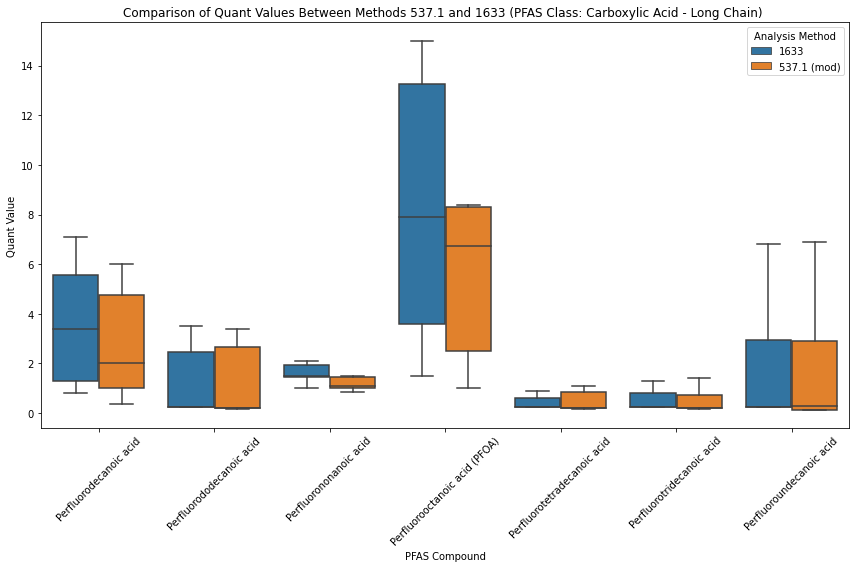

In [46]:
CarboxylicAcid_Long_df=all_df[all_df['PFAS Compound'].isin(pfas_compounds_CarboxylicAcid_Long)]
plt.figure(figsize=(12, 8))  # Set the figure size as desired
sns.boxplot(x='PFAS Compound', y='All (w BDL= MDL/2) Incl Qual Flags', hue='Analysis Method', data=CarboxylicAcid_Long_df, showfliers=False)
plt.xticks(rotation=45)  # Rotate the x labels if they overlap
plt.title('Comparison of Quant Values Between Methods 537.1 and 1633 (PFAS Class: Carboxylic Acid - Long Chain) ')
plt.ylabel('Quant Value')
plt.xlabel('PFAS Compound')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [95]:
temp_1633=CarboxylicAcid_Long_df[CarboxylicAcid_Long_df['Analysis Method']==1633].groupby('PFAS Compound')
temp_537=CarboxylicAcid_Long_df[CarboxylicAcid_Long_df['Analysis Method']=='537.1 (mod)'].groupby('PFAS Compound')
stats_1633 = temp_1633['All (w BDL= MDL/2) Incl Qual Flags'].describe()
stats_5371 = temp_537['All (w BDL= MDL/2) Incl Qual Flags'].describe()


comparison_df = pd.concat([stats_5371,stats_1633], axis=1, keys=['Stats_1633', 'Stats_5371'])
comparison_df

Stats_1633                                      \
                                   count       mean        std    min    25%   
PFAS Compound                                                                  
Perfluorodecanoic acid               7.0   3.692857   4.142933  0.360  0.995   
Perfluorododecanoic acid             7.0   1.348571   1.486407  0.180  0.185   
Perfluorononanoic acid               7.0   3.832857   7.133154  0.850  0.990   
Perfluorooctanoic acid (PFOA)        6.0  10.900000  15.074482  1.000  2.500   
Perfluorotetradecanoic acid          7.0   0.500000   0.404094  0.180  0.185   
Perfluorotridecanoic acid            7.0   0.511429   0.466554  0.180  0.185   
Perfluoroundecanoic acid             7.0   1.913571   2.599793  0.135  0.140   

                                                Stats_5371             \
                                50%   75%   max      count       mean   
PFAS Compound                                                           
Perfluorodecanoic acid         2.00  4.75  12.0        7.0   4.414286   
Perfluorododecanoic acid       0.19  2.65   3.4        7.0   1.336429   
Perfluorononanoic acid         1.10  1.45  20.0        7.0   5.471429   
Perfluorooctanoic acid (PFOA)  6.75  8.30  41.0        6.0  14.583333   
Perfluorotetradecanoic acid    0.19  0.83   1.1        7.0   0.436429   
Perfluorotridecanoic acid      0.19  0.72   1.4        7.0   0.547857   
Perfluoroundecanoic acid       0.28  2.90   6.9        7.0   1.950714   

                                                                            
                                     std    min   25%   50%     75%    max  
PFAS Compound                                                               
Perfluorodecanoic acid          4.370518  0.800  1.30  3.40   5.550  13.00  
Perfluorododecanoic acid        1.495869  0.235  0.24  0.24   2.450   3.50  
Perfluorononanoic acid         10.380706  1.000  1.45  1.50   1.950  29.00  
Perfluorooctanoic acid (PFOA)  19.441648  1.500  3.60  7.90  13.250  53.00  
Perfluorotetradecanoic acid     0.277650  0.235  0.24  0.24   0.615   0.87  
Perfluorotridecanoic acid       0.457783  0.235  0.24  0.24   0.790   1.30  
Perfluoroundecanoic acid        2.578146  0.235  0.24  0.24   2.950   6.80

In [34]:
FluorotelomerSulfonicAcid_df=all_df[all_df['PFAS Compound'].isin(pfas_compounds_CarboxylicAcid_Long)]
FluorotelomerSulfonicAcid_df

temp=FluorotelomerSulfonicAcid_df.groupby('PFAS Compound')
temp['All (w BDL= MDL/2) Incl Qual Flags'].describe()

all_df[all_df['PFAS Compound'].isin(pfas_compounds_CarboxylicAcid_Long)]

Result Analysis Method          Sample Location                 Type  \
23417      4            1633         Durham Biosolids            Biosolids   
23419    1.6            1633         Durham Biosolids            Biosolids   
23425      1            1633         Durham Biosolids            Biosolids   
23428    1.5            1633         Durham Biosolids            Biosolids   
23431   0.45            1633         Durham Biosolids            Biosolids   
...      ...             ...                      ...                  ...   
24435     20     537.1 (mod)  Jireh Semiconductor Inc  Outfall of Industry   
24439     41     537.1 (mod)  Jireh Semiconductor Inc  Outfall of Industry   
24442   0.78     537.1 (mod)  Jireh Semiconductor Inc  Outfall of Industry   
24443    1.4     537.1 (mod)  Jireh Semiconductor Inc  Outfall of Industry   
24444    6.9     537.1 (mod)  Jireh Semiconductor Inc  Outfall of Industry   

      Sample Date                  PFAS Compound  MDL Detection Class  \
23417  2023-12-05         Perfluorodecanoic acid  NaN           Quant   
23419  2023-12-05       Perfluorododecanoic acid  NaN           Quant   
23425  2023-12-05         Perfluorononanoic acid  NaN           Quant   
23428  2023-12-05  Perfluorooctanoic acid (PFOA)  NaN             BQL   
23431  2023-12-05    Perfluorotetradecanoic acid  NaN             BQL   
...           ...                            ...  ...             ...   
24435  2023-12-06         Perfluorononanoic acid  NaN           Quant   
24439  2023-12-06  Perfluorooctanoic acid (PFOA)  NaN           Quant   
24442  2023-12-06    Perfluorotetradecanoic acid  NaN             BQL   
24443  2023-12-06      Perfluorotridecanoic acid  NaN             BQL   
24444  2023-12-06       Perfluoroundecanoic acid  NaN           Quant   

       Quant Only Incl Qual Flags  Quant Incl Estimates Incl Qual Flags  \
23417                         4.0                                  4.00   
23419                         1.6                                  1.60   
23425                         1.0                                  1.00   
23428                         0.0                                  1.50   
23431                         0.0                                  0.45   
...                           ...                                   ...   
24435                        20.0                                 20.00   
24439                        41.0                                 41.00   
24442                         0.0                                  0.78   
24443                         0.0                                  1.40   
24444                         6.9                                  6.90   

       All (w BDL= MDL/2) Incl Qual Flags     Units  ChainLength  \
23417                                4.00    ppb_wt         10.0   
23419                                1.60    ppb_wt         12.0   
23425                                1.00    ppb_wt          9.0   
23428                                1.50    ppb_wt          8.0   
23431                                0.45    ppb_wt         14.0   
...                                   ...       ...          ...   
24435                               20.00  ppt_wt_v          9.0   
24439                               41.00  ppt_wt_v          8.0   
24442                                0.78  ppt_wt_v         14.0   
24443                                1.40  ppt_wt_v         13.0   
24444                                6.90  ppt_wt_v         11.0   

      Dominant Contributor                                Sector  \
23417                  NaN                                   NaN   
23419                  NaN                                   NaN   
23425                  NaN                                   NaN   
23428                  NaN                                   NaN   
23431                  NaN                                   NaN   
...                    ...                                   ...  

In [35]:
FluorotelomerSulfonicAcid_df

Result Analysis Method          Sample Location                 Type  \
23417      4            1633         Durham Biosolids            Biosolids   
23419    1.6            1633         Durham Biosolids            Biosolids   
23425      1            1633         Durham Biosolids            Biosolids   
23428    1.5            1633         Durham Biosolids            Biosolids   
23431   0.45            1633         Durham Biosolids            Biosolids   
...      ...             ...                      ...                  ...   
24435     20     537.1 (mod)  Jireh Semiconductor Inc  Outfall of Industry   
24439     41     537.1 (mod)  Jireh Semiconductor Inc  Outfall of Industry   
24442   0.78     537.1 (mod)  Jireh Semiconductor Inc  Outfall of Industry   
24443    1.4     537.1 (mod)  Jireh Semiconductor Inc  Outfall of Industry   
24444    6.9     537.1 (mod)  Jireh Semiconductor Inc  Outfall of Industry   

      Sample Date                  PFAS Compound  MDL Detection Class  \
23417  2023-12-05         Perfluorodecanoic acid  NaN           Quant   
23419  2023-12-05       Perfluorododecanoic acid  NaN           Quant   
23425  2023-12-05         Perfluorononanoic acid  NaN           Quant   
23428  2023-12-05  Perfluorooctanoic acid (PFOA)  NaN             BQL   
23431  2023-12-05    Perfluorotetradecanoic acid  NaN             BQL   
...           ...                            ...  ...             ...   
24435  2023-12-06         Perfluorononanoic acid  NaN           Quant   
24439  2023-12-06  Perfluorooctanoic acid (PFOA)  NaN           Quant   
24442  2023-12-06    Perfluorotetradecanoic acid  NaN             BQL   
24443  2023-12-06      Perfluorotridecanoic acid  NaN             BQL   
24444  2023-12-06       Perfluoroundecanoic acid  NaN           Quant   

       Quant Only Incl Qual Flags  Quant Incl Estimates Incl Qual Flags  \
23417                         4.0                                  4.00   
23419                         1.6                                  1.60   
23425                         1.0                                  1.00   
23428                         0.0                                  1.50   
23431                         0.0                                  0.45   
...                           ...                                   ...   
24435                        20.0                                 20.00   
24439                        41.0                                 41.00   
24442                         0.0                                  0.78   
24443                         0.0                                  1.40   
24444                         6.9                                  6.90   

       All (w BDL= MDL/2) Incl Qual Flags     Units  ChainLength  \
23417                                4.00    ppb_wt         10.0   
23419                                1.60    ppb_wt         12.0   
23425                                1.00    ppb_wt          9.0   
23428                                1.50    ppb_wt          8.0   
23431                                0.45    ppb_wt         14.0   
...                                   ...       ...          ...   
24435                               20.00  ppt_wt_v          9.0   
24439                               41.00  ppt_wt_v          8.0   
24442                                0.78  ppt_wt_v         14.0   
24443                                1.40  ppt_wt_v         13.0   
24444                                6.90  ppt_wt_v         11.0   

      Dominant Contributor                                Sector  \
23417                  NaN                                   NaN   
23419                  NaN                                   NaN   
23425                  NaN                                   NaN   
23428                  NaN                                   NaN   
23431                  NaN                                   NaN   
...                    ...                                   ...  

In [47]:
# Assuming your DataFrame is named df
grouped_counts = CarboxylicAcid_Long_df.groupby('PFAS Compound').size()

# Display the counts for each PFAS Compound
print(grouped_counts)

PFAS Compound
Perfluorodecanoic acid           14
Perfluorododecanoic acid         14
Perfluorononanoic acid           14
Perfluorooctanoic acid (PFOA)    12
Perfluorotetradecanoic acid      14
Perfluorotridecanoic acid        14
Perfluoroundecanoic acid         14
dtype: int64


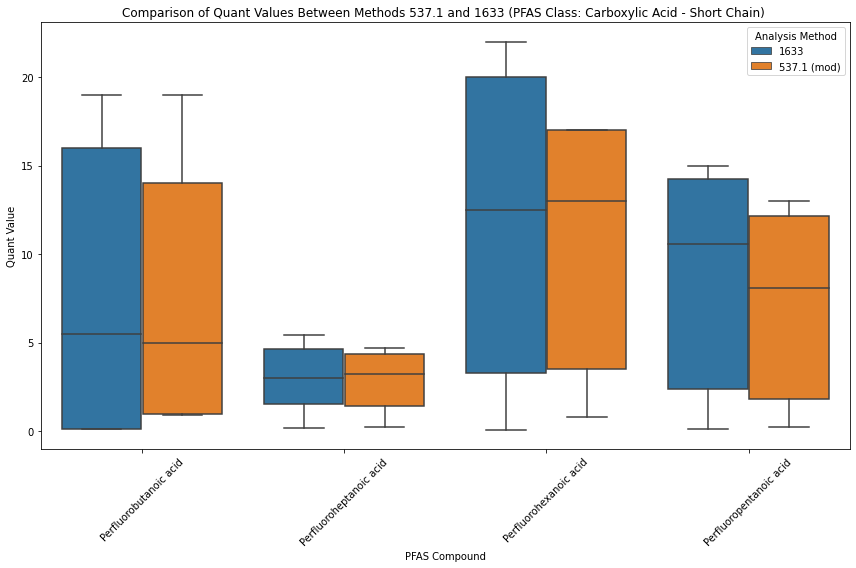

In [50]:
CarboxylicAcid_Short_df=all_df[all_df['PFAS Compound'].isin(pfas_compounds_CarboxylicAcid_Short)]
plt.figure(figsize=(12, 8))  # Set the figure size as desired
sns.boxplot(x='PFAS Compound', y='All (w BDL= MDL/2) Incl Qual Flags', hue='Analysis Method', data=CarboxylicAcid_Short_df, showfliers=False)
plt.xticks(rotation=45)  # Rotate the x labels if they overlap
plt.title('Comparison of Quant Values Between Methods 537.1 and 1633 (PFAS Class: Carboxylic Acid - Short Chain) ')
plt.ylabel('Quant Value')
plt.xlabel('PFAS Compound')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [51]:
# Assuming your DataFrame is named df
grouped_counts = CarboxylicAcid_Short_df.groupby('PFAS Compound').size()

# Display the counts for each PFAS Compound
print(grouped_counts)

PFAS Compound
Perfluorobutanoic acid     10
Perfluoroheptanoic acid    14
Perfluorohexanoic acid     12
Perfluoropentanoic acid    12
dtype: int64


In [94]:
temp_1633=CarboxylicAcid_Short_df[CarboxylicAcid_Short_df['Analysis Method']==1633].groupby('PFAS Compound')
temp_537=CarboxylicAcid_Short_df[CarboxylicAcid_Short_df['Analysis Method']=='537.1 (mod)'].groupby('PFAS Compound')
stats_1633 = temp_1633['All (w BDL= MDL/2) Incl Qual Flags'].describe()
stats_5371 = temp_537['All (w BDL= MDL/2) Incl Qual Flags'].describe()


comparison_df = pd.concat([stats_5371,stats_1633], axis=1, keys=['Stats_1633', 'Stats_5371'])
comparison_df

Stats_1633                                             \
                             count       mean        std   min      25%   50%   
PFAS Compound                                                                   
Perfluorobutanoic acid         5.0   7.970000   8.156409  0.90  0.95000   5.0   
Perfluoroheptanoic acid        7.0   9.423571  18.414542  0.23  1.41750   3.2   
Perfluorohexanoic acid         6.0  23.416667  35.770067  0.80  3.52500  13.0   
Perfluoropentanoic acid        6.0  31.610833  63.102075  0.23  1.82625   8.1   

                                      Stats_5371                               \
                           75%    max      count       mean        std    min   
PFAS Compound                                                                   
Perfluorobutanoic acid   14.00   19.0        5.0   8.147000   8.879887  0.115   
Perfluoroheptanoic acid   4.35   51.0        7.0  12.080000  25.170618  0.180   
Perfluorohexanoic acid   17.00   95.0        6.0  26.300000  41.836343  0.070   
Perfluoropentanoic acid  12.15  160.0        6.0  34.389167  66.717537  0.115   

                                                      
                            25%    50%    75%    max  
PFAS Compound                                         
Perfluorobutanoic acid   0.1200   5.50  16.00   19.0  
Perfluoroheptanoic acid  1.5400   3.00   4.65   69.0  
Perfluorohexanoic acid   3.2975  12.50  20.00  110.0  
Perfluoropentanoic acid  2.3650  10.55  14.25  170.0

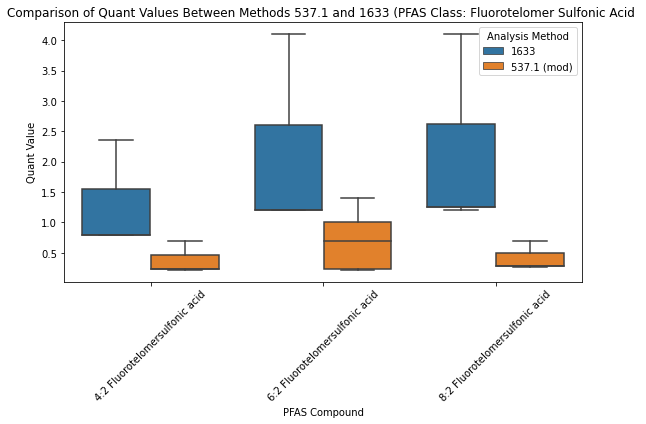

In [54]:
FluorotelomerSulfonicAcid_df=all_df[all_df['PFAS Compound'].isin(pfas_compounds_FluorotelomerSulfonicAcid)]
plt.figure(figsize=(8, 6))  # Set the figure size as desired
sns.boxplot(x='PFAS Compound', y='All (w BDL= MDL/2) Incl Qual Flags', hue='Analysis Method', data=FluorotelomerSulfonicAcid_df, showfliers=False)
plt.xticks(rotation=45)  # Rotate the x labels if they overlap
plt.title('Comparison of Quant Values Between Methods 537.1 and 1633 (PFAS Class: Fluorotelomer Sulfonic Acid ')
plt.ylabel('Quant Value')
plt.xlabel('PFAS Compound')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

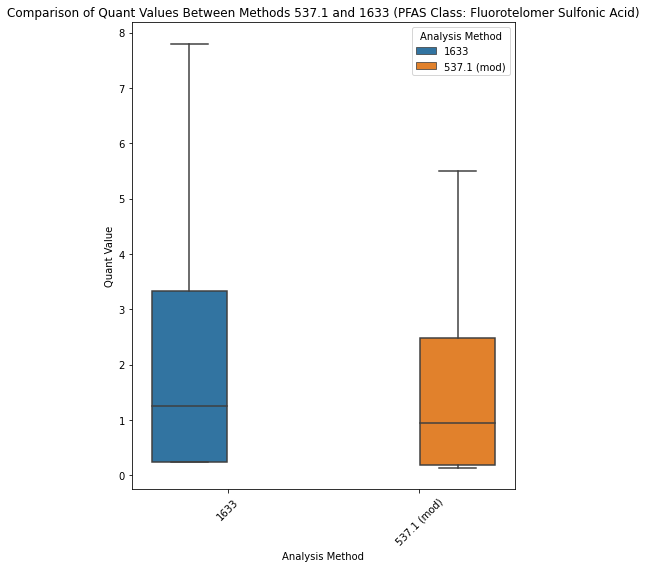

In [43]:
plt.figure(figsize=(6, 8))  # Adjust the figure size as needed
sns.boxplot(x='Analysis Method', y='All (w BDL= MDL/2) Incl Qual Flags', hue='Analysis Method', data=FluorotelomerSulfonicAcid_df, showfliers=False)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.title('Comparison of Quant Values Between Methods 537.1 and 1633 (PFAS Class: Fluorotelomer Sulfonic Acid)')
plt.ylabel('Quant Value')
plt.xlabel('Analysis Method')
plt.tight_layout()  # Adjust the layout to make room for the x-axis labels
plt.legend(title='Analysis Method')
plt.show()

In [57]:
PerPolyfluorotherCarboxylicAcid_df=all_df[all_df['PFAS Compound'].isin(pfas_compounds_PerPolyfluorotherCarboxylicAcid)]
PerPolyfluorotherCarboxylicAcid_df.head()

Result Analysis Method   Sample Location       Type Sample Date  \
23405  <0.470            1633  Durham Biosolids  Biosolids  2023-12-05   
23406  <0.120            1633  Durham Biosolids  Biosolids  2023-12-05   
23481   <1.40            1633   Durham Effluent   Effluent  2023-12-05   
23482   <1.90            1633   Durham Effluent   Effluent  2023-12-05   
23597   <1.40            1633   Durham Influent   Influent  2023-12-05   

      PFAS Compound   MDL Detection Class  Quant Only Incl Qual Flags  \
23405         ADONA  0.47             BDL                         0.0   
23406       HFPO-DA  0.12             BDL                         0.0   
23481         ADONA  1.40             BDL                         0.0   
23482       HFPO-DA  1.90             BDL                         0.0   
23597         ADONA  1.40             BDL                         0.0   

       Quant Incl Estimates Incl Qual Flags  \
23405                                   0.0   
23406                                   0.0   
23481                                   0.0   
23482                                   0.0   
23597                                   0.0   

       All (w BDL= MDL/2) Incl Qual Flags     Units  ChainLength  \
23405                               0.235    ppb_wt          7.0   
23406                               0.060    ppb_wt          5.0   
23481                               0.700  ppt_wt_v          7.0   
23482                               0.950  ppt_wt_v          5.0   
23597                               0.700  ppt_wt_v          7.0   

      Dominant Contributor Sector  \
23405                  NaN    NaN   
23406                  NaN    NaN   
23481                  NaN    NaN   
23482                  NaN    NaN   
23597                  NaN    NaN   

                                          unique_key  
23405    Durham Biosolids_Biosolids_2023-12-05_ADONA  
23406  Durham Biosolids_Biosolids_2023-12-05_HFPO-DA  
23481      Durham Effluent_Effluent_2023-12-05_ADONA  
23482    Durham Effluent_Effluent_2023-12-05_HFPO-DA  
23597      Durham Influent_Influent_2023-12-05_ADONA

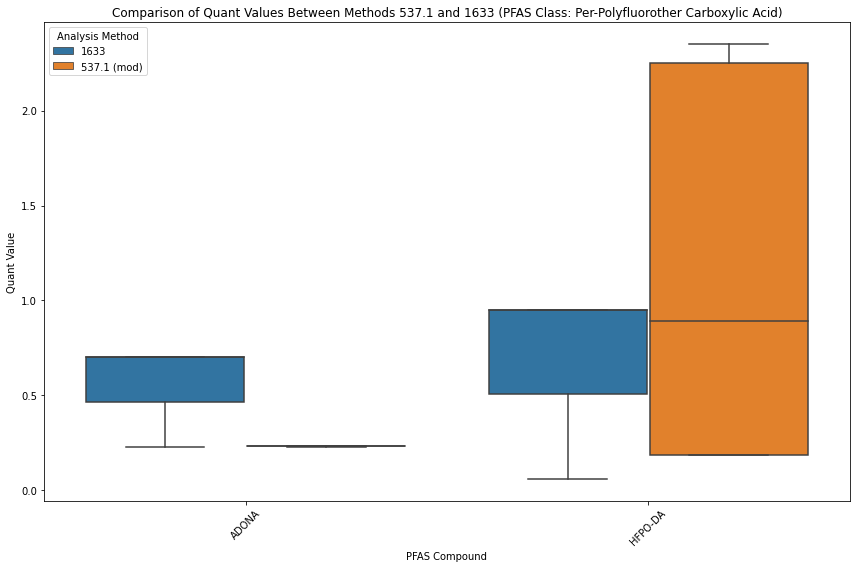

In [60]:
PerPolyfluorotherCarboxylicAcid_df=all_df[all_df['PFAS Compound'].isin(pfas_compounds_PerPolyfluorotherCarboxylicAcid)]
plt.figure(figsize=(12, 8))  # Set the figure size as desired
sns.boxplot(x='PFAS Compound', y='All (w BDL= MDL/2) Incl Qual Flags', hue='Analysis Method', data=PerPolyfluorotherCarboxylicAcid_df, showfliers=False)
plt.xticks(rotation=45)  # Rotate the x labels if they overlap
plt.title('Comparison of Quant Values Between Methods 537.1 and 1633 (PFAS Class: Per-Polyfluorother Carboxylic Acid)')
plt.ylabel('Quant Value')
plt.xlabel('PFAS Compound')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()


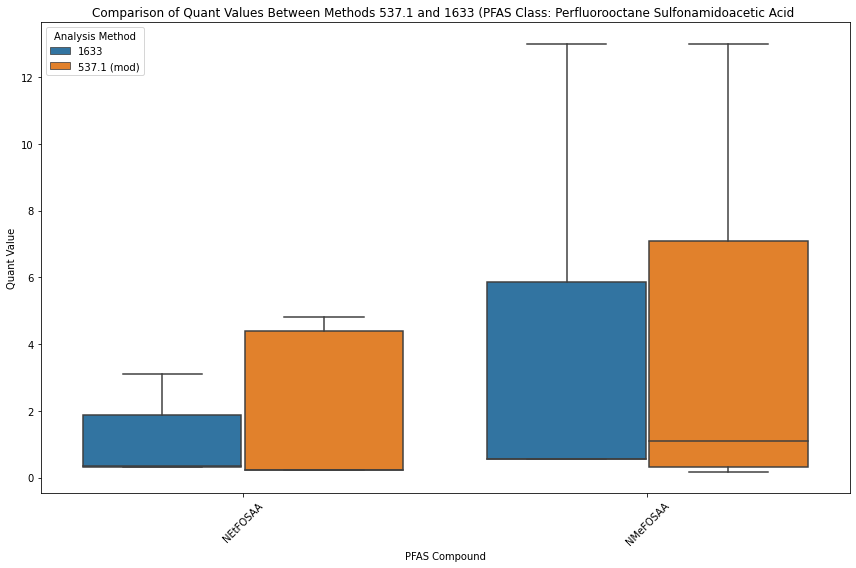

In [61]:
PerfluorooctaneSulfonamidoaceticAcid_df=all_df[all_df['PFAS Compound'].isin(pfas_compounds_PerfluorooctaneSulfonamidoaceticAcid)]
plt.figure(figsize=(12, 8))  # Set the figure size as desired
sns.boxplot(x='PFAS Compound', y='All (w BDL= MDL/2) Incl Qual Flags', hue='Analysis Method', data=PerfluorooctaneSulfonamidoaceticAcid_df, showfliers=False)
plt.xticks(rotation=45)  # Rotate the x labels if they overlap
plt.title('Comparison of Quant Values Between Methods 537.1 and 1633 (PFAS Class: Perfluorooctane Sulfonamidoacetic Acid ')
plt.ylabel('Quant Value')
plt.xlabel('PFAS Compound')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [62]:
# Assuming your DataFrame is named df
grouped_counts = PerfluorooctaneSulfonamidoaceticAcid_df.groupby('PFAS Compound').size()

# Display the counts for each PFAS Compound
print(grouped_counts)

PFAS Compound
NEtFOSAA    14
NMeFOSAA    14
dtype: int64


In [49]:
all_df[all_df['PFAS Compound'].isin(pfas_compounds_PerfluorooctaneSulfonamideEthanol)]

Empty DataFrame
Columns: [Result, Analysis Method, Sample Location, Type, Sample Date, PFAS Compound, MDL, Detection Class, Quant Only Incl Qual Flags, Quant Incl Estimates Incl Qual Flags, All (w BDL= MDL/2) Incl Qual Flags, Units, ChainLength, Dominant Contributor, Sector, unique_key]
Index: []

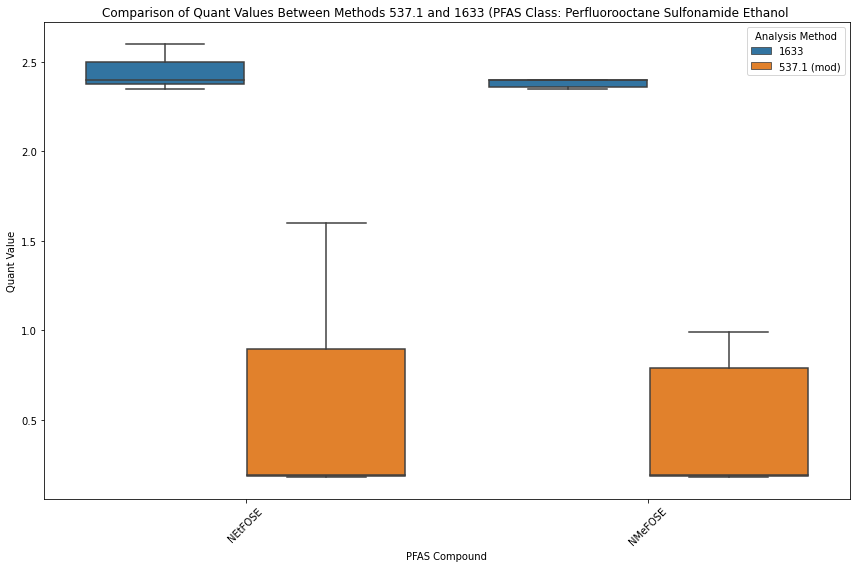

In [63]:
PerfluorooctaneSulfonamideEthanol=all_df[all_df['PFAS Compound'].isin(pfas_compounds_PerfluorooctaneSulfonamideEthanol)]
plt.figure(figsize=(12, 8))  # Set the figure size as desired
sns.boxplot(x='PFAS Compound', y='All (w BDL= MDL/2) Incl Qual Flags', hue='Analysis Method', data=PerfluorooctaneSulfonamideEthanol, showfliers=False)
plt.xticks(rotation=45)  # Rotate the x labels if they overlap
plt.title('Comparison of Quant Values Between Methods 537.1 and 1633 (PFAS Class: Perfluorooctane Sulfonamide Ethanol ')
plt.ylabel('Quant Value')
plt.xlabel('PFAS Compound')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

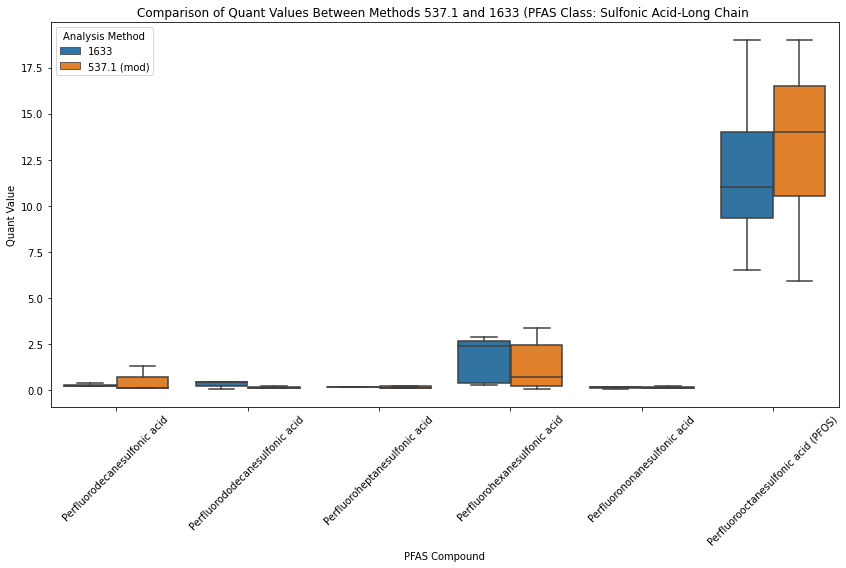

In [71]:
SulfonicAcid_Long=all_df[all_df['PFAS Compound'].isin(pfas_compounds_SulfonicAcid_Long)]
plt.figure(figsize=(12, 8))  # Set the figure size as desired
sns.boxplot(x='PFAS Compound', y='All (w BDL= MDL/2) Incl Qual Flags', hue='Analysis Method', data=SulfonicAcid_Long, showfliers=False)
plt.xticks(rotation=45)  # Rotate the x labels if they overlap
plt.title('Comparison of Quant Values Between Methods 537.1 and 1633 (PFAS Class: Sulfonic Acid-Long Chain ')
plt.ylabel('Quant Value')
plt.xlabel('PFAS Compound')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [52]:
# Assuming your DataFrame is named df
grouped_counts = SulfonicAcid_Long.groupby('PFAS Compound').size()

# Display the counts for each PFAS Compound
print(grouped_counts)

PFAS Compound
Perfluorohexanesulfonic acid            6
Perfluorooctanesulfonic acid (PFOS)    14
dtype: int64


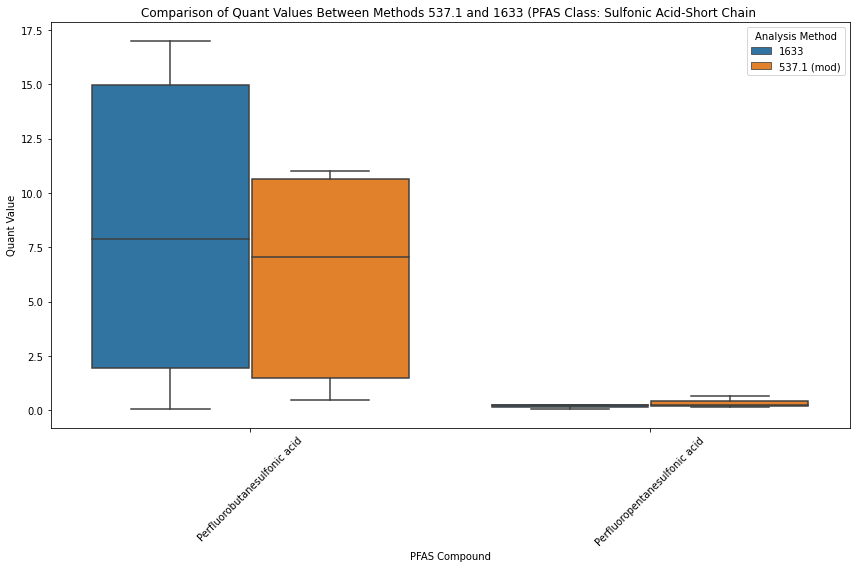

In [72]:
SulfonicAcid_Short=all_df[all_df['PFAS Compound'].isin(pfas_compounds_SulfonicAcid_Short)]
plt.figure(figsize=(12, 8))  # Set the figure size as desired
sns.boxplot(x='PFAS Compound', y='All (w BDL= MDL/2) Incl Qual Flags', hue='Analysis Method', data=SulfonicAcid_Short, showfliers=False)
plt.xticks(rotation=45)  # Rotate the x labels if they overlap
plt.title('Comparison of Quant Values Between Methods 537.1 and 1633 (PFAS Class: Sulfonic Acid-Short Chain ')
plt.ylabel('Quant Value')
plt.xlabel('PFAS Compound')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [54]:
# Assuming your DataFrame is named df
grouped_counts = SulfonicAcid_Short.groupby('PFAS Compound').size()

# Display the counts for each PFAS Compound
print(grouped_counts)

PFAS Compound
Perfluorobutanesulfonic acid    8
dtype: int64


### By Type

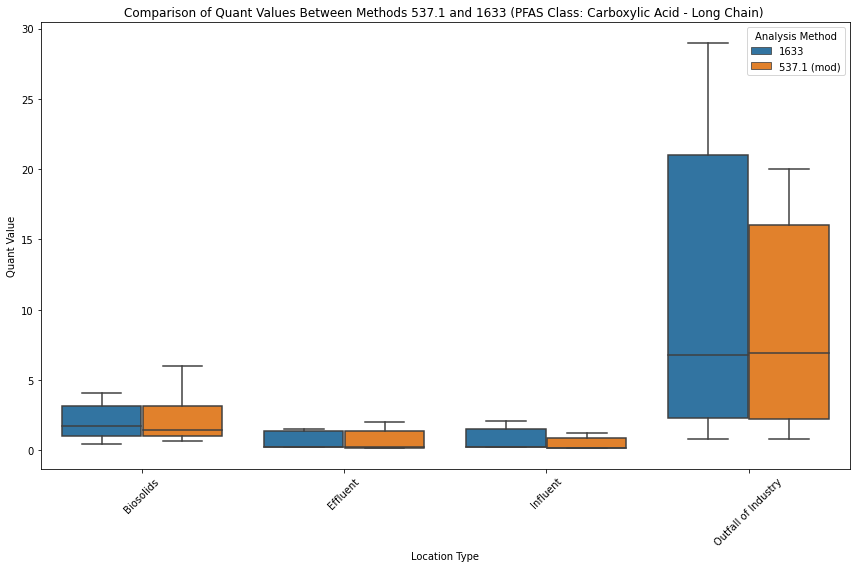

In [73]:
CarboxylicAcid_Long_df=all_df[all_df['PFAS Compound'].isin(pfas_compounds_CarboxylicAcid_Long)]
plt.figure(figsize=(12, 8))  # Set the figure size as desired
sns.boxplot(x='Type', y='All (w BDL= MDL/2) Incl Qual Flags', hue='Analysis Method', data=CarboxylicAcid_Long_df, showfliers=False)
plt.xticks(rotation=45)  # Rotate the x labels if they overlap
plt.title('Comparison of Quant Values Between Methods 537.1 and 1633 (PFAS Class: Carboxylic Acid - Long Chain) ')
plt.ylabel('Quant Value')
plt.xlabel('Location Type')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [114]:
# Assuming your DataFrame is named df
grouped_counts = CarboxylicAcid_Long_df.groupby('Type').size()

# Display the counts for each Type
print(grouped_counts)

Type
Biosolids              14
Effluent                4
Influent                2
Outfall of Industry    10
dtype: int64


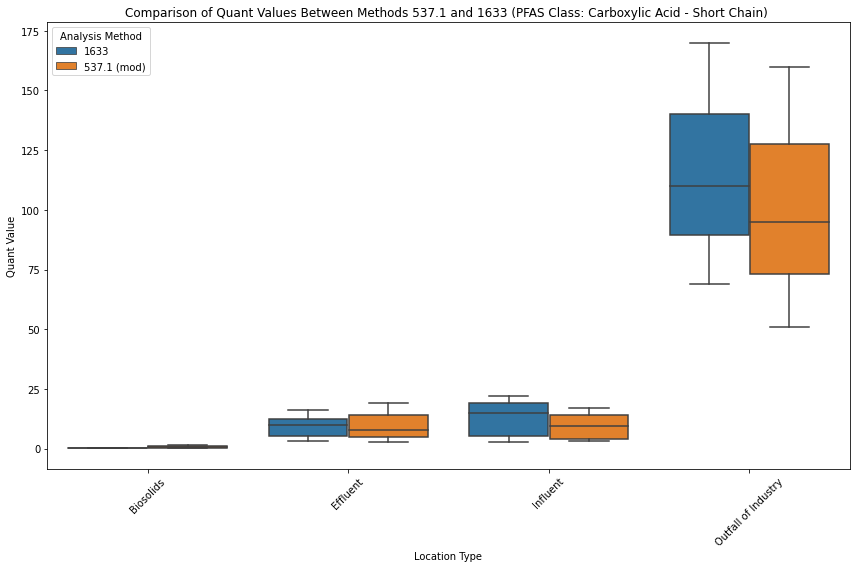

In [74]:
CarboxylicAcid_Short_df=all_df[all_df['PFAS Compound'].isin(pfas_compounds_CarboxylicAcid_Short)]
plt.figure(figsize=(12, 8))  # Set the figure size as desired
sns.boxplot(x='Type', y='All (w BDL= MDL/2) Incl Qual Flags', hue='Analysis Method', data=CarboxylicAcid_Short_df, showfliers=False)
plt.xticks(rotation=45)  # Rotate the x labels if they overlap
plt.title('Comparison of Quant Values Between Methods 537.1 and 1633 (PFAS Class: Carboxylic Acid - Short Chain) ')
plt.ylabel('Quant Value')
plt.xlabel('Location Type')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [131]:
# Assuming your DataFrame is named df
grouped_counts = CarboxylicAcid_Short_df.groupby('Type').size()

# Display the counts for each Type
print(grouped_counts)

Type
Effluent               14
Influent               10
Outfall of Industry     6
dtype: int64


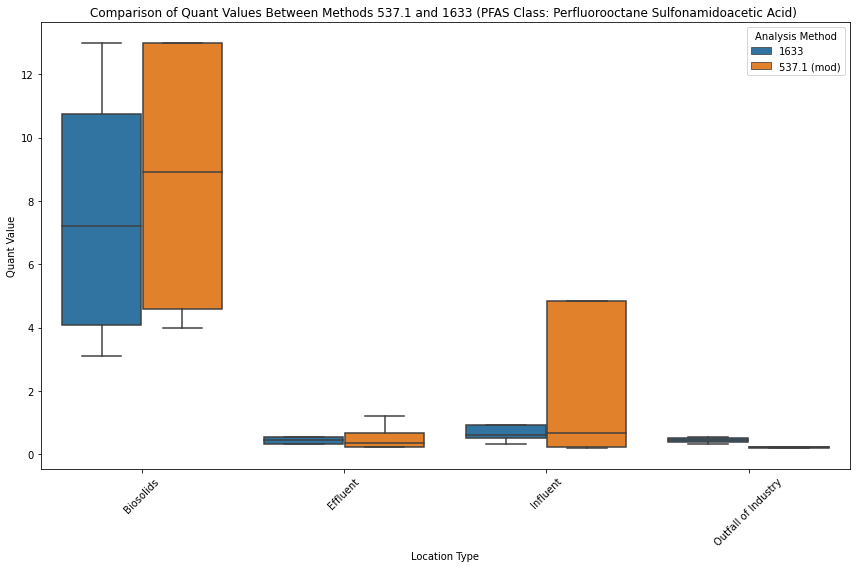

In [75]:
PerfluorooctaneSulfonamidoaceticAcid_df=all_df[all_df['PFAS Compound'].isin(pfas_compounds_PerfluorooctaneSulfonamidoaceticAcid)]
plt.figure(figsize=(12, 8))  # Set the figure size as desired
sns.boxplot(x='Type', y='All (w BDL= MDL/2) Incl Qual Flags', hue='Analysis Method', data=PerfluorooctaneSulfonamidoaceticAcid_df, showfliers=False)
plt.xticks(rotation=45)  # Rotate the x labels if they overlap
plt.title('Comparison of Quant Values Between Methods 537.1 and 1633 (PFAS Class: Perfluorooctane Sulfonamidoacetic Acid) ')
plt.ylabel('Quant Value')
plt.xlabel('Location Type')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [119]:
# Assuming your DataFrame is named df
grouped_counts = PerfluorooctaneSulfonamidoaceticAcid_df.groupby('Type').size()

# Display the counts for each Type
print(grouped_counts)

Type
Biosolids    6
dtype: int64


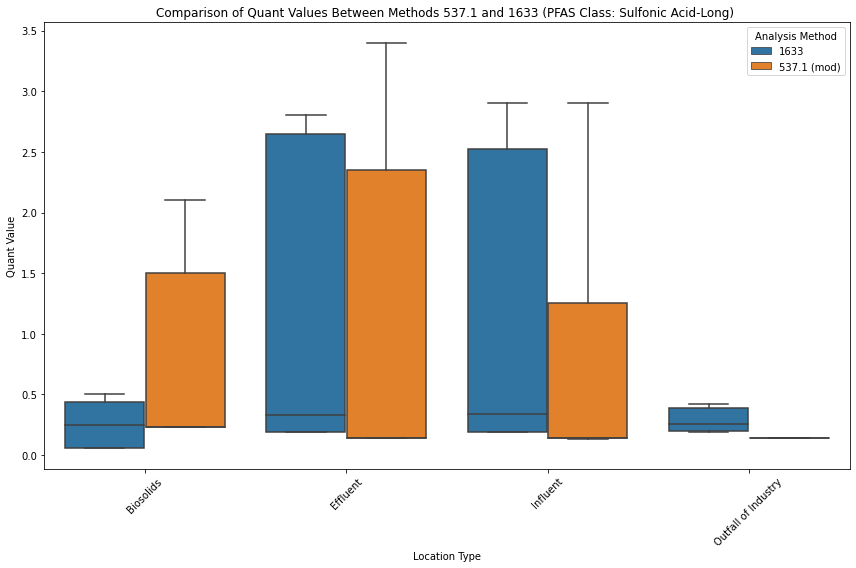

In [76]:
SulfonicAcid_Long=all_df[all_df['PFAS Compound'].isin(pfas_compounds_SulfonicAcid_Long)]
plt.figure(figsize=(12, 8))  # Set the figure size as desired
sns.boxplot(x='Type', y='All (w BDL= MDL/2) Incl Qual Flags', hue='Analysis Method', data=SulfonicAcid_Long, showfliers=False)
plt.xticks(rotation=45)  # Rotate the x labels if they overlap
plt.title('Comparison of Quant Values Between Methods 537.1 and 1633 (PFAS Class: Sulfonic Acid-Long) ')
plt.ylabel('Quant Value')
plt.xlabel('Location Type')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [123]:
# Assuming your DataFrame is named df
grouped_counts = SulfonicAcid_Long.groupby('Type').size()

# Display the counts for each Type
print(grouped_counts)

Type
Biosolids              4
Effluent               8
Influent               6
Outfall of Industry    2
dtype: int64


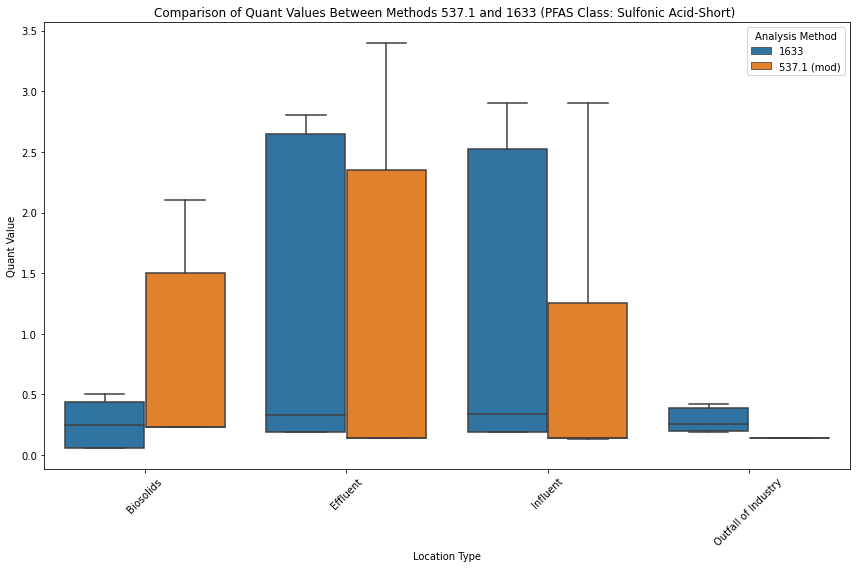

In [77]:
SulfonicAcid_Short=all_df[all_df['PFAS Compound'].isin(pfas_compounds_SulfonicAcid_Short)]
plt.figure(figsize=(12, 8))  # Set the figure size as desired
sns.boxplot(x='Type', y='All (w BDL= MDL/2) Incl Qual Flags', hue='Analysis Method', data=SulfonicAcid_Long, showfliers=False)
plt.xticks(rotation=45)  # Rotate the x labels if they overlap
plt.title('Comparison of Quant Values Between Methods 537.1 and 1633 (PFAS Class: Sulfonic Acid-Short) ')
plt.ylabel('Quant Value')
plt.xlabel('Location Type')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [125]:
# Assuming your DataFrame is named df
grouped_counts = SulfonicAcid_Short.groupby('Type').size()

# Display the counts for each Type
print(grouped_counts)

Type
Effluent               4
Influent               2
Outfall of Industry    2
dtype: int64


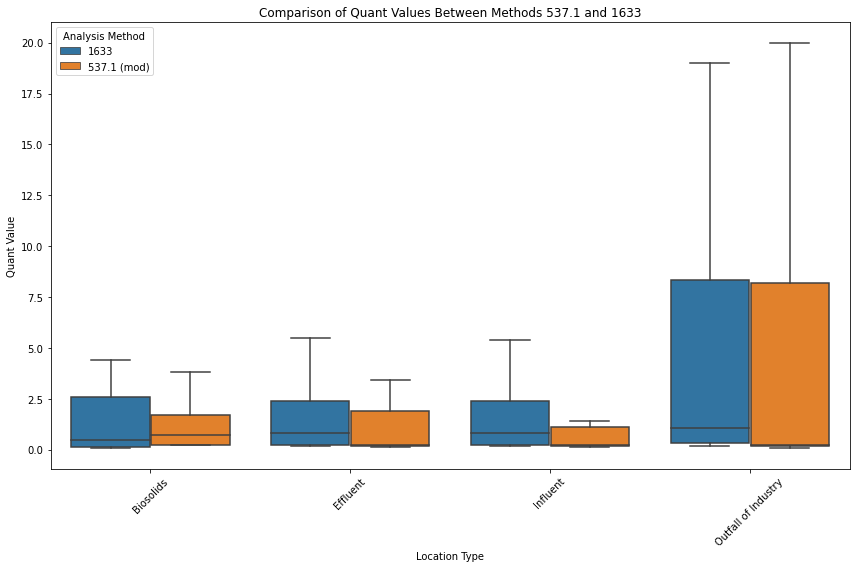

In [79]:
plt.figure(figsize=(12, 8))  # Set the figure size as desired
sns.boxplot(x='Type', y='All (w BDL= MDL/2) Incl Qual Flags', hue='Analysis Method', data=all_df, showfliers=False)
plt.xticks(rotation=45)  # Rotate the x labels if they overlap
plt.title('Comparison of Quant Values Between Methods 537.1 and 1633')
plt.ylabel('Quant Value')
plt.xlabel('Location Type')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

### By Location:

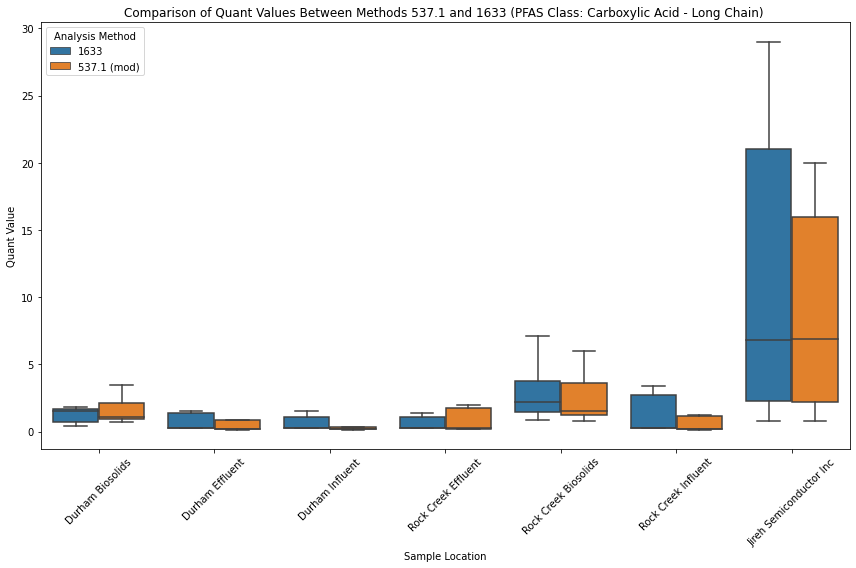

In [96]:
CarboxylicAcid_Long_df=all_df[all_df['PFAS Compound'].isin(pfas_compounds_CarboxylicAcid_Long)]
plt.figure(figsize=(12, 8))  # Set the figure size as desired
sns.boxplot(x='Sample Location', y='All (w BDL= MDL/2) Incl Qual Flags', hue='Analysis Method', data=CarboxylicAcid_Long_df, showfliers=False)
plt.xticks(rotation=45)  # Rotate the x labels if they overlap
plt.title('Comparison of Quant Values Between Methods 537.1 and 1633 (PFAS Class: Carboxylic Acid - Long Chain) ')
plt.ylabel('Quant Value')
plt.xlabel('Sample Location')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [97]:
# Assuming your DataFrame is named df
grouped_counts = CarboxylicAcid_Long_df.groupby('Sample Location').size()

# Display the counts for each Type
print(grouped_counts)

Sample Location
Durham Biosolids           14
Durham Effluent            14
Durham Influent            12
Jireh Semiconductor Inc    14
Rock Creek Biosolids       14
Rock Creek Effluent        14
Rock Creek Influent        14
dtype: int64


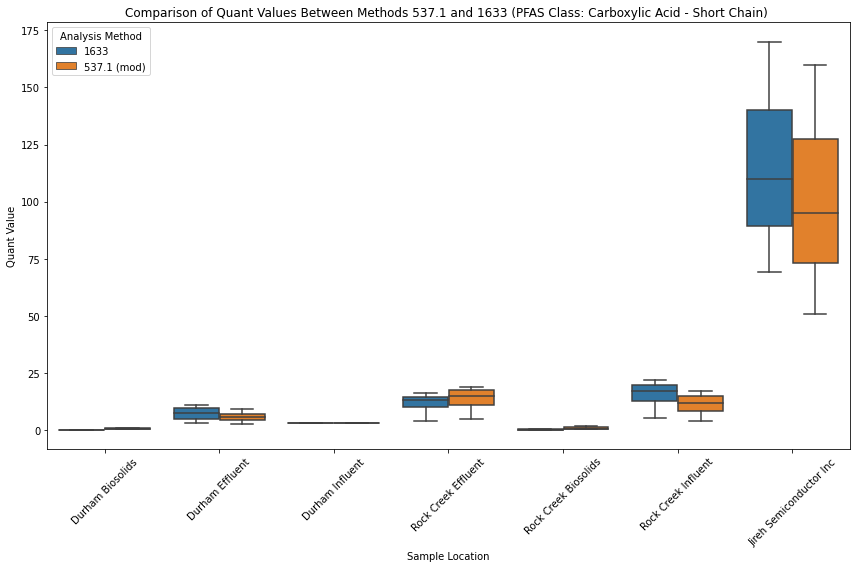

In [98]:
CarboxylicAcid_Short_df=all_df[all_df['PFAS Compound'].isin(pfas_compounds_CarboxylicAcid_Short)]
plt.figure(figsize=(12, 8))  # Set the figure size as desired
sns.boxplot(x='Sample Location', y='All (w BDL= MDL/2) Incl Qual Flags', hue='Analysis Method', data=CarboxylicAcid_Short_df, showfliers=False)
plt.xticks(rotation=45)  # Rotate the x labels if they overlap
plt.title('Comparison of Quant Values Between Methods 537.1 and 1633 (PFAS Class: Carboxylic Acid - Short Chain) ')
plt.ylabel('Quant Value')
plt.xlabel('Sample Location')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [58]:
# Assuming your DataFrame is named df
grouped_counts = CarboxylicAcid_Short_df.groupby('Sample Location').size()

# Display the counts for each Type
print(grouped_counts)

Sample Location
Durham Effluent            6
Durham Influent            2
Jireh Semiconductor Inc    6
Rock Creek Effluent        8
Rock Creek Influent        8
dtype: int64


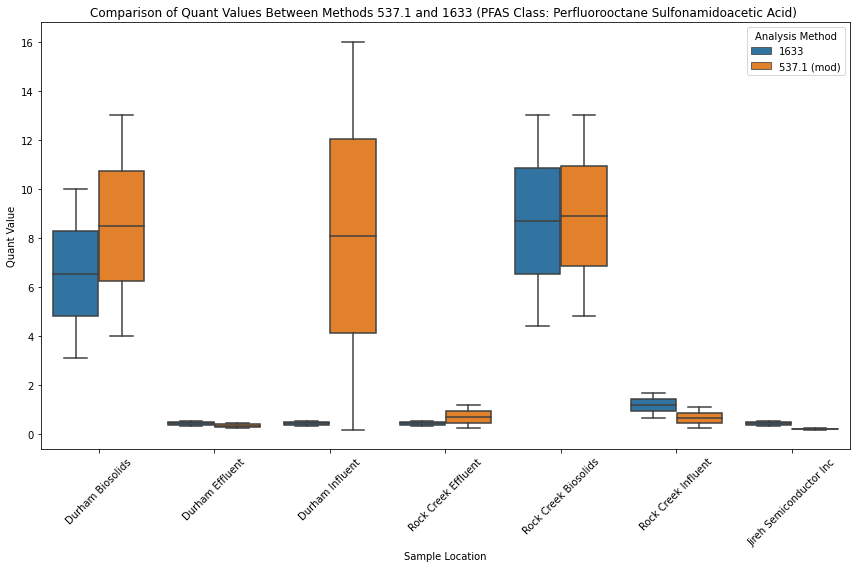

In [99]:
PerfluorooctaneSulfonamidoaceticAcid_df=all_df[all_df['PFAS Compound'].isin(pfas_compounds_PerfluorooctaneSulfonamidoaceticAcid)]
plt.figure(figsize=(12, 8))  # Set the figure size as desired
sns.boxplot(x='Sample Location', y='All (w BDL= MDL/2) Incl Qual Flags', hue='Analysis Method', data=PerfluorooctaneSulfonamidoaceticAcid_df, showfliers=False)
plt.xticks(rotation=45)  # Rotate the x labels if they overlap
plt.title('Comparison of Quant Values Between Methods 537.1 and 1633 (PFAS Class: Perfluorooctane Sulfonamidoacetic Acid) ')
plt.ylabel('Quant Value')
plt.xlabel('Sample Location')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [60]:
# Assuming your DataFrame is named df
grouped_counts = PerfluorooctaneSulfonamidoaceticAcid_df.groupby('Sample Location').size()

# Display the counts for each Type
print(grouped_counts)

Sample Location
Durham Biosolids        2
Rock Creek Biosolids    4
dtype: int64


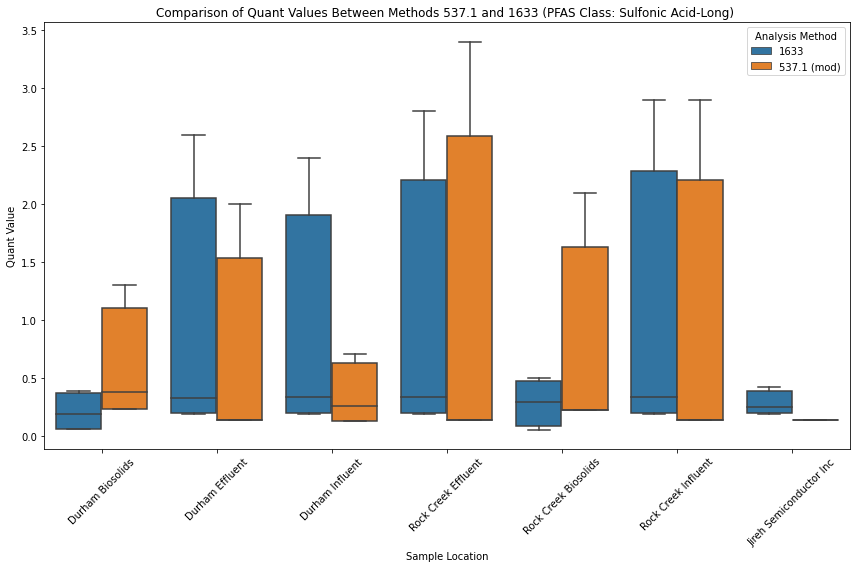

In [100]:
SulfonicAcid_Long=all_df[all_df['PFAS Compound'].isin(pfas_compounds_SulfonicAcid_Long)]
plt.figure(figsize=(12, 8))  # Set the figure size as desired
sns.boxplot(x='Sample Location', y='All (w BDL= MDL/2) Incl Qual Flags', hue='Analysis Method', data=SulfonicAcid_Long, showfliers=False)
plt.xticks(rotation=45)  # Rotate the x labels if they overlap
plt.title('Comparison of Quant Values Between Methods 537.1 and 1633 (PFAS Class: Sulfonic Acid-Long) ')
plt.ylabel('Quant Value')
plt.xlabel('Sample Location')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [62]:
# Assuming your DataFrame is named df
grouped_counts = SulfonicAcid_Long.groupby('Sample Location').size()

# Display the counts for each Type
print(grouped_counts)

Sample Location
Durham Biosolids           2
Durham Effluent            4
Durham Influent            2
Jireh Semiconductor Inc    2
Rock Creek Biosolids       2
Rock Creek Effluent        4
Rock Creek Influent        4
dtype: int64


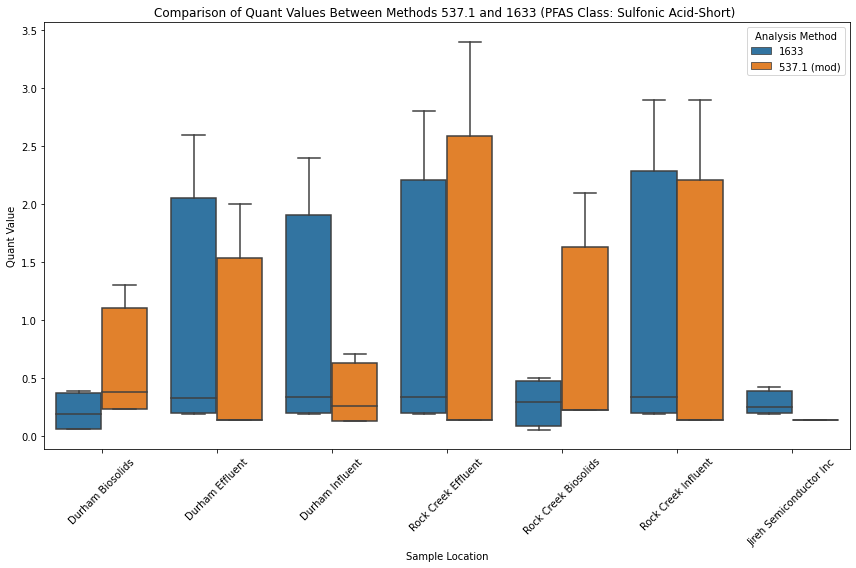

In [101]:
SulfonicAcid_Short=all_df[all_df['PFAS Compound'].isin(pfas_compounds_SulfonicAcid_Short)]
plt.figure(figsize=(12, 8))  # Set the figure size as desired
sns.boxplot(x='Sample Location', y='All (w BDL= MDL/2) Incl Qual Flags', hue='Analysis Method', data=SulfonicAcid_Long, showfliers=False)
plt.xticks(rotation=45)  # Rotate the x labels if they overlap
plt.title('Comparison of Quant Values Between Methods 537.1 and 1633 (PFAS Class: Sulfonic Acid-Short) ')
plt.ylabel('Quant Value')
plt.xlabel('Sample Location')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [64]:
# Assuming your DataFrame is named df
grouped_counts = SulfonicAcid_Short.groupby('Sample Location').size()

# Display the counts for each Type
print(grouped_counts)

Sample Location
Durham Effluent            2
Jireh Semiconductor Inc    2
Rock Creek Effluent        2
Rock Creek Influent        2
dtype: int64


## 1633 vs 537.1 PFAS Concentration Plots

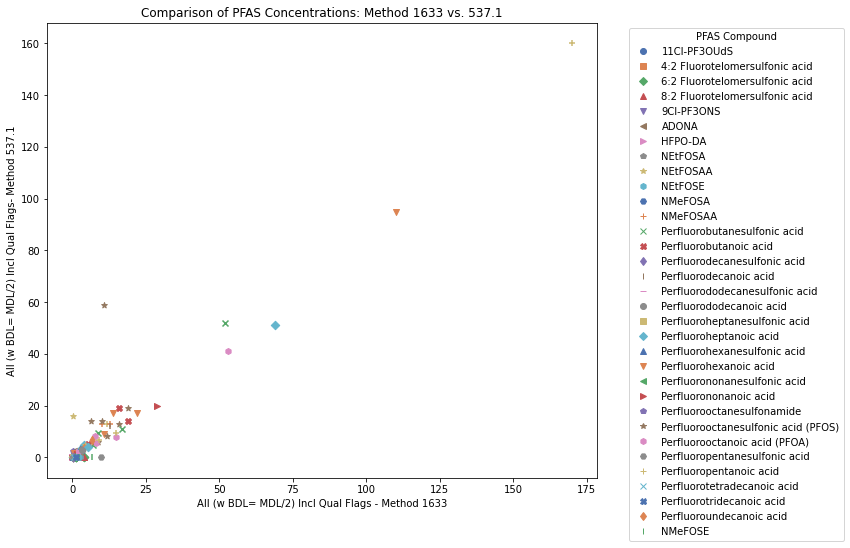

In [103]:
# Example list of markers and colors
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', '+', 'x', 'X', 'd', '|', '_']
colors = sns.color_palette("deep", n_colors=len(merged_df['PFAS Compound_1633'].unique()))

# Get unique PFAS compounds
unique_compounds = merged_df['PFAS Compound_1633'].unique()

# Create a dictionary mapping each compound to a marker and color
compound_style_map = {compound: (marker, color) for compound, marker, color in zip(unique_compounds, itertools.cycle(markers), itertools.cycle(colors))}

plt.figure(figsize=(12, 8))

# Create a legend map to handle duplicate labels
legend_map = {}

# Iterate over DataFrame rows
for _, row in merged_df.iterrows():
    marker, color = compound_style_map[row['PFAS Compound_1633']]
    plt.scatter(row['All (w BDL= MDL/2) Incl Qual Flags_1633'], row['Quant Only Incl Qual Flags_5371'], 
                marker=marker, color=color, label=row['PFAS Compound_1633'])
    
    # Update legend map
    if row['PFAS Compound_1633'] not in legend_map:
        legend_map[row['PFAS Compound_1633']] = (marker, color)

# Create custom legend
legend_elements = [plt.Line2D([0], [0], marker=style[0], color=style[1], label=compound, linestyle='None') 
                   for compound, style in legend_map.items()]
plt.legend(handles=legend_elements, title='PFAS Compound', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Comparison of PFAS Concentrations: Method 1633 vs. 537.1')
plt.xlabel('All (w BDL= MDL/2) Incl Qual Flags - Method 1633')
plt.ylabel('All (w BDL= MDL/2) Incl Qual Flags- Method 537.1')
plt.tight_layout()
plt.show()


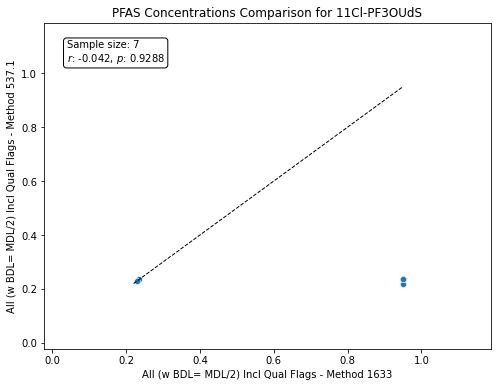

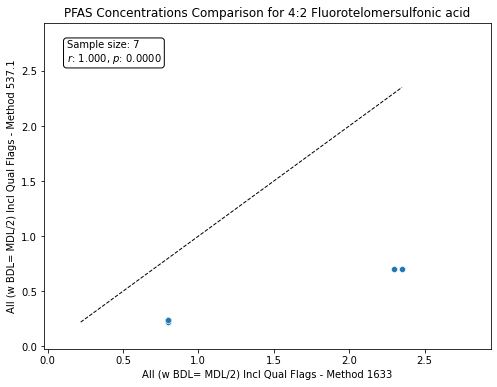

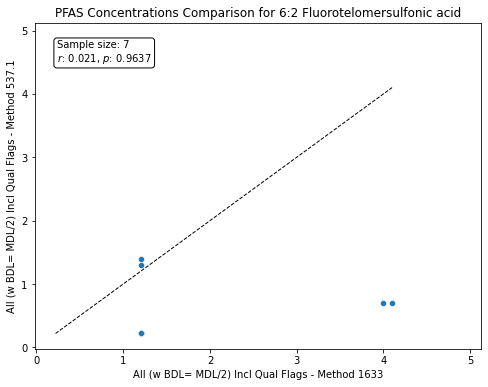

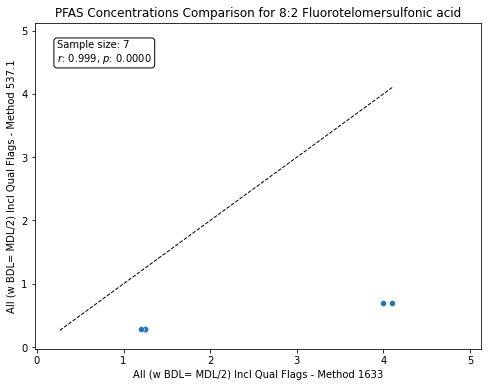

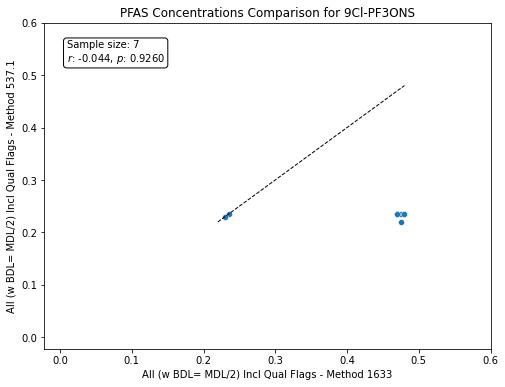

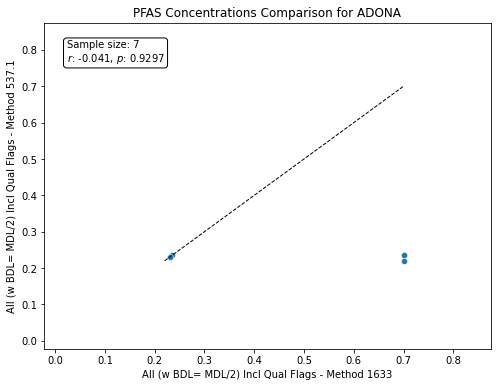

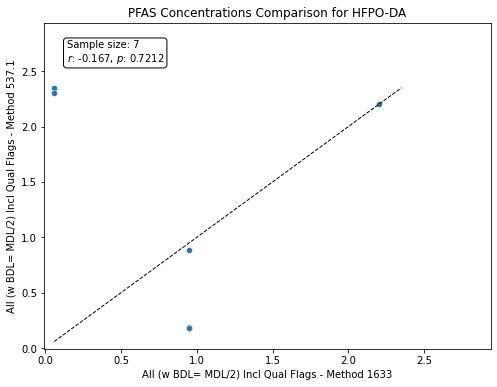

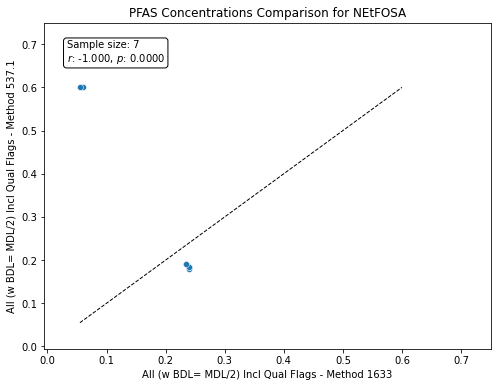

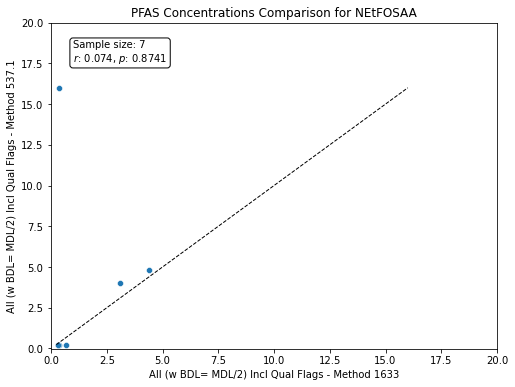

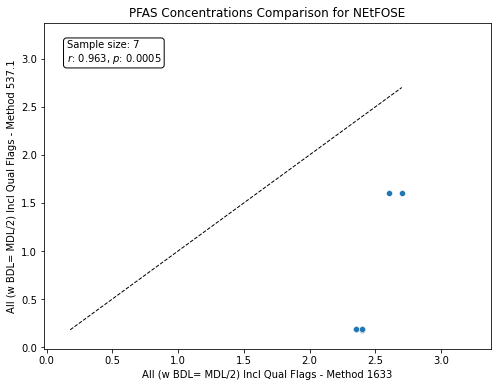

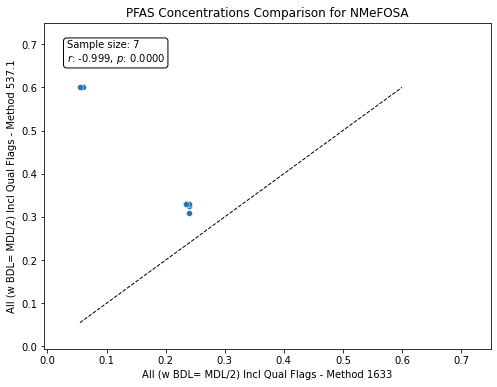

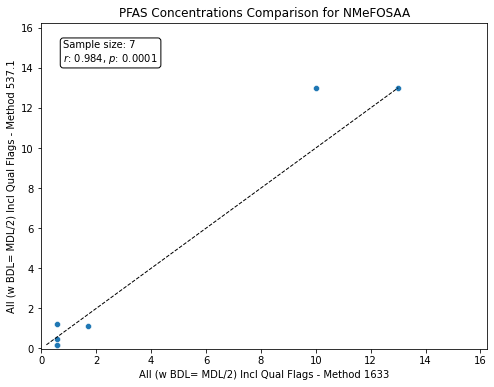

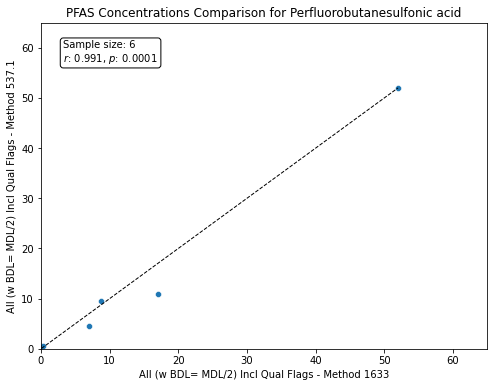

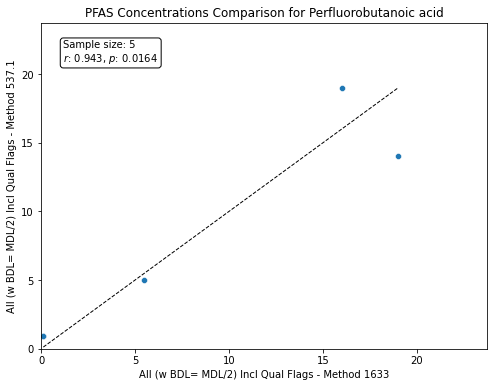

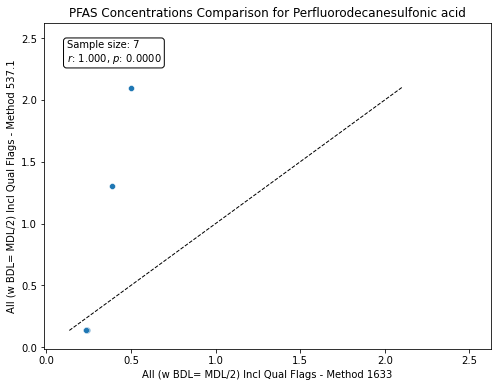

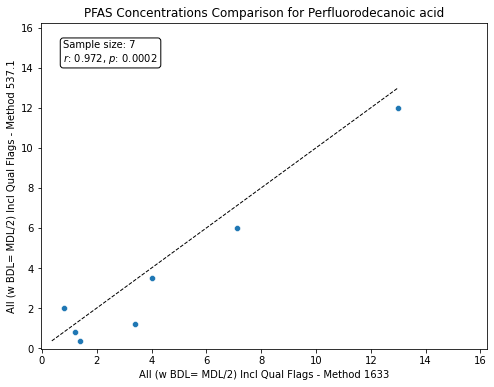

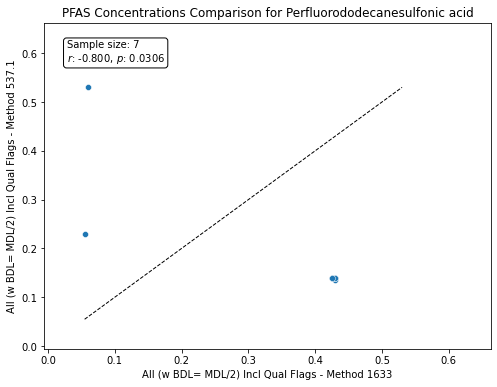

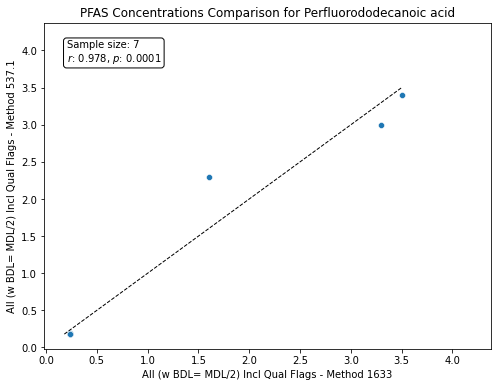

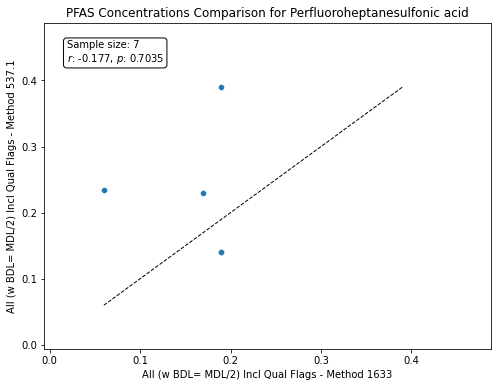

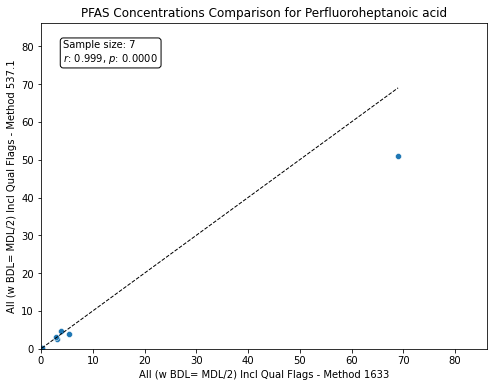

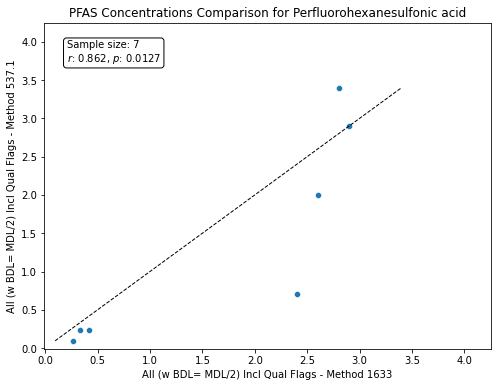

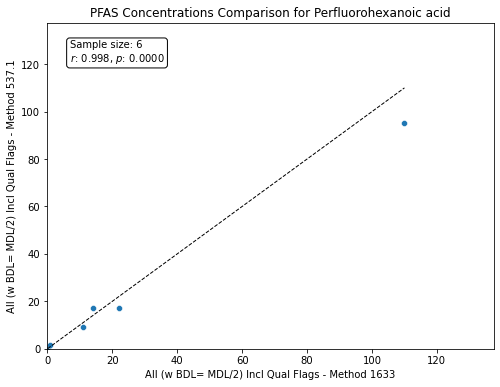

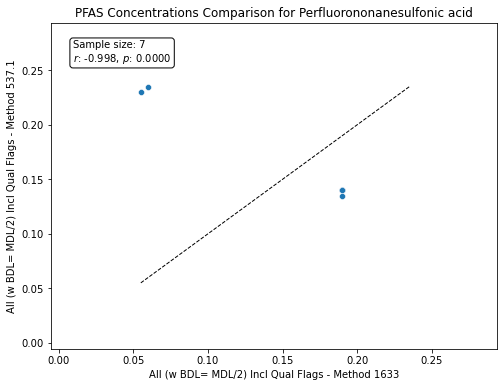

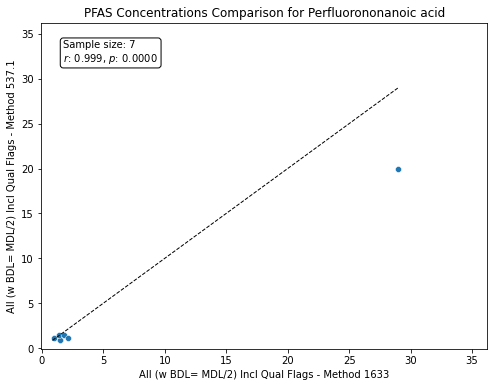

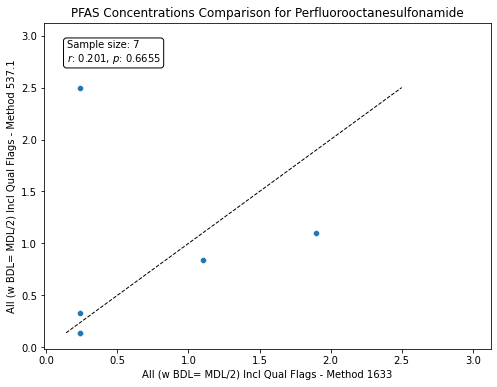

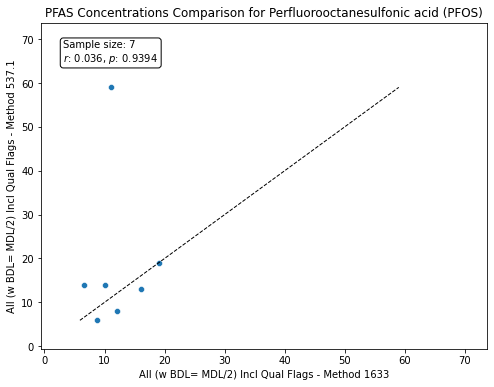

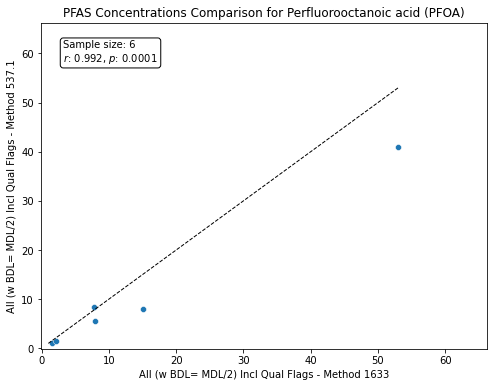

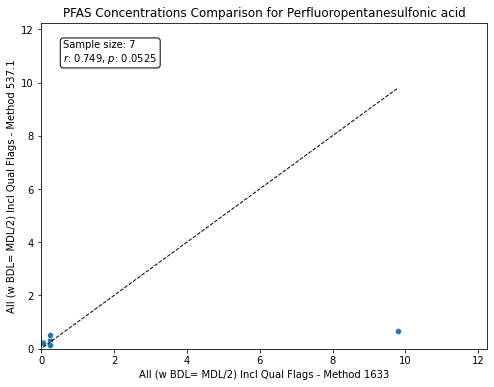

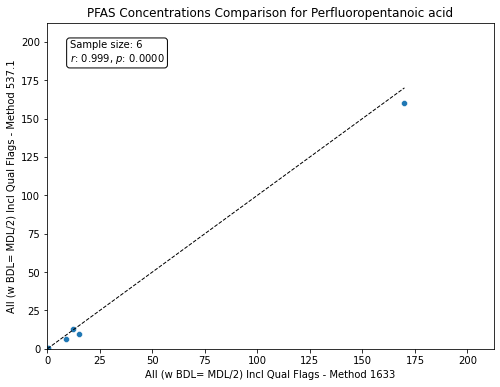

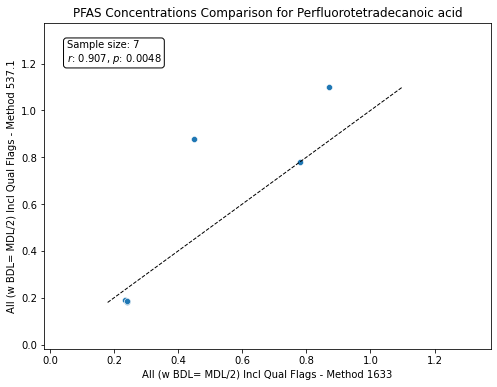

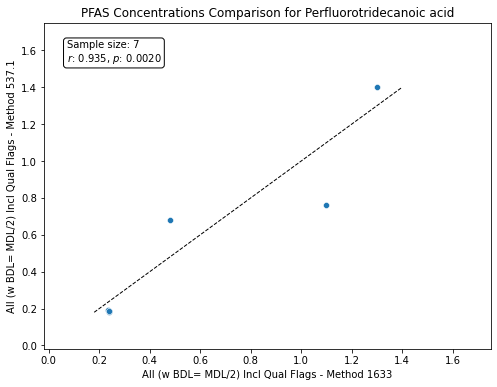

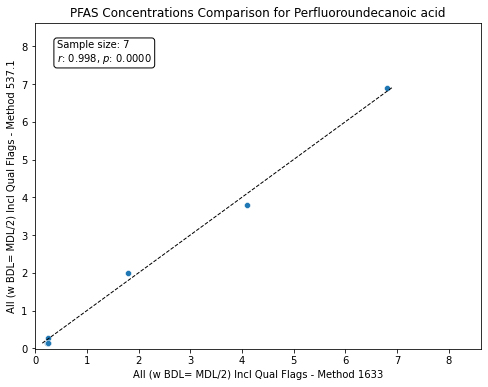

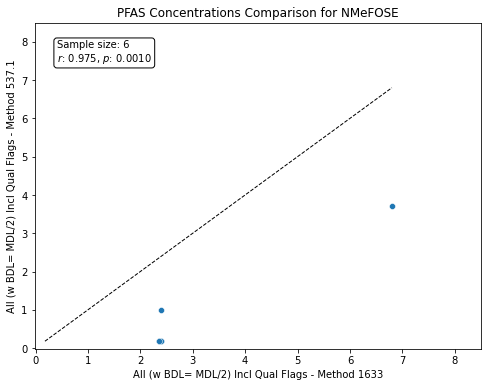

In [104]:
# Get unique PFAS compounds
unique_compounds = merged_df['PFAS Compound_1633'].unique()

# Iterate through each unique compound and create a scatter plot
for compound in unique_compounds:
    # Filter the DataFrame for the current compound
    compound_df = merged_df[merged_df['PFAS Compound_1633'] == compound].dropna(subset=['All (w BDL= MDL/2) Incl Qual Flags_1633', 'All (w BDL= MDL/2) Incl Qual Flags_5371'])
    
    # Ensure there are at least two data points
    if len(compound_df) >= 2:
        # Calculate local min and max for the current compound's data
        local_min = min(compound_df['All (w BDL= MDL/2) Incl Qual Flags_1633'].min(), compound_df['All (w BDL= MDL/2) Incl Qual Flags_5371'].min())
        local_max = max(compound_df['All (w BDL= MDL/2) Incl Qual Flags_1633'].max(), compound_df['All (w BDL= MDL/2) Incl Qual Flags_5371'].max())
        
        # Calculate Pearson correlation coefficient and p-value
        r_value, p_value = scipy.stats.pearsonr(compound_df['All (w BDL= MDL/2) Incl Qual Flags_1633'], compound_df['All (w BDL= MDL/2) Incl Qual Flags_5371'])
        sample_size = len(compound_df)
        
        # Create the scatter plot
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=compound_df, x='All (w BDL= MDL/2) Incl Qual Flags_1633', y='All (w BDL= MDL/2) Incl Qual Flags_5371')
        
        # Set the same limits for both axes based on local min and max
        plt.xlim(local_min*-.1, local_max*1.25)
        plt.ylim(local_min*-.1, local_max*1.25)
        
        # Adding plot titles and labels
        plt.title(f'PFAS Concentrations Comparison for {compound}')
        plt.xlabel('All (w BDL= MDL/2) Incl Qual Flags - Method 1633')
        plt.ylabel('All (w BDL= MDL/2) Incl Qual Flags - Method 537.1')
        
        # Adding a diagonal line to indicate where x = y
        plt.plot([local_min, local_max], [local_min, local_max], 'k--', linewidth=1)
        
        # Annotate plot with statistics
        plt.annotate(f'Sample size: {sample_size}\n$r$: {r_value:.3f}, $p$: {p_value:.4f}', 
                    xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top',
                    bbox=dict(boxstyle='round', fc='w'))
        
        # Show plot
        plt.show()


### Scatter Plots for PFAS Class

In [105]:
def calculate_confidence_interval(r, sample_size, confidence_level=0.95):
    """
    Calculate the confidence interval for a Pearson correlation coefficient using Fisher's z-transformation.
    
    Args:
        r (float): The Pearson correlation coefficient.
        sample_size (int): The number of observations.
        confidence_level (float): The confidence level for the interval.
        
    Returns:
        tuple: The lower and upper bounds of the confidence interval for the correlation coefficient.
    """
    z = np.arctanh(r)
    se = 1 / np.sqrt(sample_size - 3)
    z_critical = scipy.stats.norm.ppf(1 - (1 - confidence_level) / 2)
    z_ci_lower, z_ci_upper = z - z_critical * se, z + z_critical * se
    r_ci_lower, r_ci_upper = np.tanh(z_ci_lower), np.tanh(z_ci_upper)
    
    return r_ci_lower, r_ci_upper


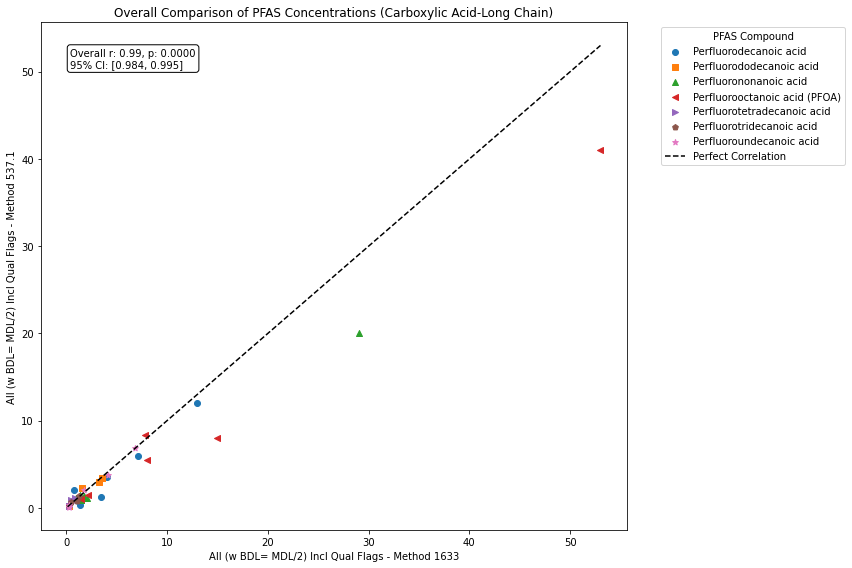

In [107]:
# Filter the DataFrame to include only the specified compounds
filtered_df =merged_df[merged_df['PFAS Compound_1633'].isin(pfas_compounds_CarboxylicAcid_Long)].dropna(subset=['All (w BDL= MDL/2) Incl Qual Flags_1633', 'All (w BDL= MDL/2) Incl Qual Flags_5371'])

# Calculate Pearson correlation coefficient and p-value for the filtered dataset
r_value, p_value = scipy.stats.pearsonr(filtered_df['All (w BDL= MDL/2) Incl Qual Flags_1633'], filtered_df['All (w BDL= MDL/2) Incl Qual Flags_5371'])

# Calculate the 95% confidence interval for the Pearson correlation coefficient
ci_lower, ci_upper = calculate_confidence_interval(r_value, len(filtered_df))

# Define markers and a color palette
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', '+', 'x', 'X', 'd', '|', '_']
colors = sns.color_palette("hsv", n_colors=len(pfas_compounds_CarboxylicAcid_Long))

# Create a mapping for compounds to markers
compound_marker_map = {compound: marker for compound, marker in zip(pfas_compounds_CarboxylicAcid_Long, markers)}

plt.figure(figsize=(12, 8))

# Plot each compound with its assigned marker
for compound, group_data in filtered_df.groupby('PFAS Compound_1633'):
    plt.scatter(group_data['All (w BDL= MDL/2) Incl Qual Flags_1633'], group_data['All (w BDL= MDL/2) Incl Qual Flags_5371'], 
                marker=compound_marker_map[compound], label=compound)

# Calculate the overall min and max values for both variables to ensure the line covers the entire data range
overall_min = min(filtered_df['All (w BDL= MDL/2) Incl Qual Flags_1633'].min(), filtered_df['All (w BDL= MDL/2) Incl Qual Flags_5371'].min())
overall_max = max(filtered_df['All (w BDL= MDL/2) Incl Qual Flags_1633'].max(), filtered_df['All (w BDL= MDL/2) Incl Qual Flags_5371'].max())

# Add a dashed diagonal line to indicate perfect correlation
plt.plot([overall_min, overall_max], [overall_min, overall_max], 'k--', label='Perfect Correlation')

# Annotate the plot with the overall r-value, p-value, and confidence interval
plt.annotate(f'Overall r: {r_value:.2f}, p: {p_value:.4f}\n95% CI: [{ci_lower:.3f}, {ci_upper:.3f}]', 
             xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top', 
             bbox=dict(boxstyle='round', fc='w'))

plt.title('Overall Comparison of PFAS Concentrations (Carboxylic Acid-Long Chain)')
plt.xlabel('All (w BDL= MDL/2) Incl Qual Flags - Method 1633')
plt.ylabel('All (w BDL= MDL/2) Incl Qual Flags - Method 537.1')
plt.legend(title='PFAS Compound', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




In [59]:
len(filtered_df)

15

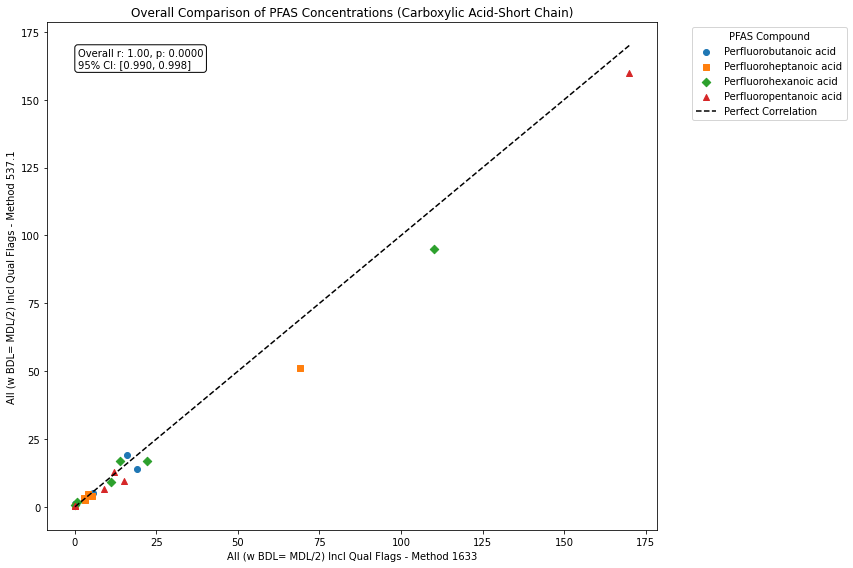

In [110]:
# Filter the DataFrame to include only the specified compounds
filtered_df = merged_df[merged_df['PFAS Compound_1633'].isin(pfas_compounds_CarboxylicAcid_Short)].dropna(subset=['All (w BDL= MDL/2) Incl Qual Flags_1633', 'All (w BDL= MDL/2) Incl Qual Flags_5371'])

# Calculate Pearson correlation coefficient and p-value for the filtered dataset
r_value, p_value = scipy.stats.pearsonr(filtered_df['All (w BDL= MDL/2) Incl Qual Flags_1633'], filtered_df['All (w BDL= MDL/2) Incl Qual Flags_5371'])

# Calculate the 95% confidence interval for the Pearson correlation coefficient
ci_lower, ci_upper = calculate_confidence_interval(r_value, len(filtered_df))

# Define markers and a color palette
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', '+', 'x', 'X', 'd', '|', '_']
colors = sns.color_palette("hsv", n_colors=len(pfas_compounds_CarboxylicAcid_Short))

# Create a mapping for compounds to markers
compound_marker_map = {compound: marker for compound, marker in zip(pfas_compounds_CarboxylicAcid_Short, markers)}

plt.figure(figsize=(12, 8))

# Plot each compound with its assigned marker
for compound, group_data in filtered_df.groupby('PFAS Compound_1633'):
    plt.scatter(group_data['All (w BDL= MDL/2) Incl Qual Flags_1633'], group_data['All (w BDL= MDL/2) Incl Qual Flags_5371'], 
                marker=compound_marker_map[compound], label=compound)

# Calculate the overall min and max values for both variables to ensure the line covers the entire data range
overall_min = min(filtered_df['All (w BDL= MDL/2) Incl Qual Flags_1633'].min(), filtered_df['All (w BDL= MDL/2) Incl Qual Flags_5371'].min())
overall_max = max(filtered_df['All (w BDL= MDL/2) Incl Qual Flags_1633'].max(), filtered_df['All (w BDL= MDL/2) Incl Qual Flags_5371'].max())

# Add a dashed diagonal line to indicate perfect correlation
plt.plot([overall_min, overall_max], [overall_min, overall_max], 'k--', label='Perfect Correlation')

# Annotate the plot with the overall r-value, p-value, and confidence interval
plt.annotate(f'Overall r: {r_value:.2f}, p: {p_value:.4f}\n95% CI: [{ci_lower:.3f}, {ci_upper:.3f}]', 
             xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top', 
             bbox=dict(boxstyle='round', fc='w'))

plt.title('Overall Comparison of PFAS Concentrations (Carboxylic Acid-Short Chain)')
plt.xlabel('All (w BDL= MDL/2) Incl Qual Flags - Method 1633')
plt.ylabel('All (w BDL= MDL/2) Incl Qual Flags - Method 537.1')
plt.legend(title='PFAS Compound', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [61]:
len(filtered_df)

15

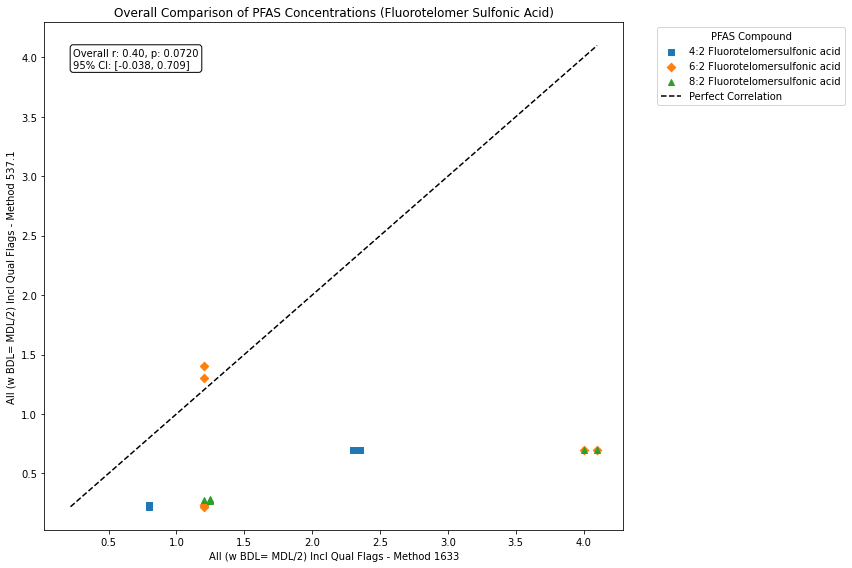

In [111]:
# Filter the DataFrame to include only the specified compounds
filtered_df = merged_df[merged_df['PFAS Compound_1633'].isin(pfas_compounds_FluorotelomerSulfonicAcid)].dropna(subset=['All (w BDL= MDL/2) Incl Qual Flags_1633', 'All (w BDL= MDL/2) Incl Qual Flags_5371'])

# Calculate Pearson correlation coefficient and p-value for the filtered dataset
r_value, p_value = scipy.stats.pearsonr(filtered_df['All (w BDL= MDL/2) Incl Qual Flags_1633'], filtered_df['All (w BDL= MDL/2) Incl Qual Flags_5371'])

# Calculate the 95% confidence interval for the Pearson correlation coefficient
ci_lower, ci_upper = calculate_confidence_interval(r_value, len(filtered_df))

# Define markers and a color palette
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', '+', 'x', 'X', 'd', '|', '_']
colors = sns.color_palette("hsv", n_colors=len(pfas_compounds_FluorotelomerSulfonicAcid))

# Create a mapping for compounds to markers
compound_marker_map = {compound: marker for compound, marker in zip(pfas_compounds_FluorotelomerSulfonicAcid, markers)}

plt.figure(figsize=(12, 8))

# Plot each compound with its assigned marker
for compound, group_data in filtered_df.groupby('PFAS Compound_1633'):
    plt.scatter(group_data['All (w BDL= MDL/2) Incl Qual Flags_1633'], group_data['All (w BDL= MDL/2) Incl Qual Flags_5371'], 
                marker=compound_marker_map[compound], label=compound)

# Calculate the overall min and max values for both variables to ensure the line covers the entire data range
overall_min = min(filtered_df['All (w BDL= MDL/2) Incl Qual Flags_1633'].min(), filtered_df['All (w BDL= MDL/2) Incl Qual Flags_5371'].min())
overall_max = max(filtered_df['All (w BDL= MDL/2) Incl Qual Flags_1633'].max(), filtered_df['All (w BDL= MDL/2) Incl Qual Flags_5371'].max())

# Add a dashed diagonal line to indicate perfect correlation
plt.plot([overall_min, overall_max], [overall_min, overall_max], 'k--', label='Perfect Correlation')

# Annotate the plot with the overall r-value, p-value, and confidence interval
plt.annotate(f'Overall r: {r_value:.2f}, p: {p_value:.4f}\n95% CI: [{ci_lower:.3f}, {ci_upper:.3f}]', 
             xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top', 
             bbox=dict(boxstyle='round', fc='w'))

plt.title('Overall Comparison of PFAS Concentrations (Fluorotelomer Sulfonic Acid)')
plt.xlabel('All (w BDL= MDL/2) Incl Qual Flags - Method 1633')
plt.ylabel('All (w BDL= MDL/2) Incl Qual Flags - Method 537.1')
plt.legend(title='PFAS Compound', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [63]:
len(filtered_df)

0

In [64]:
filtered_df

Empty DataFrame
Columns: [Result_1633, Analysis Method_1633, Sample Location_1633, Type_1633, Sample Date_1633, PFAS Compound_1633, MDL_1633, Detection Class_1633, Quant Only Incl Qual Flags_1633, Quant Incl Estimates Incl Qual Flags_1633, All (w BDL= MDL/2) Incl Qual Flags_1633, Units_1633, ChainLength_1633, Dominant Contributor_1633, Sector_1633, unique_key, Result_5371, Analysis Method_5371, Sample Location_5371, Type_5371, Sample Date_5371, PFAS Compound_5371, MDL_5371, Detection Class_5371, Quant Only Incl Qual Flags_5371, Quant Incl Estimates Incl Qual Flags_5371, All (w BDL= MDL/2) Incl Qual Flags_5371, Units_5371, ChainLength_5371, Dominant Contributor_5371, Sector_5371]
Index: []

[0 rows x 31 columns]

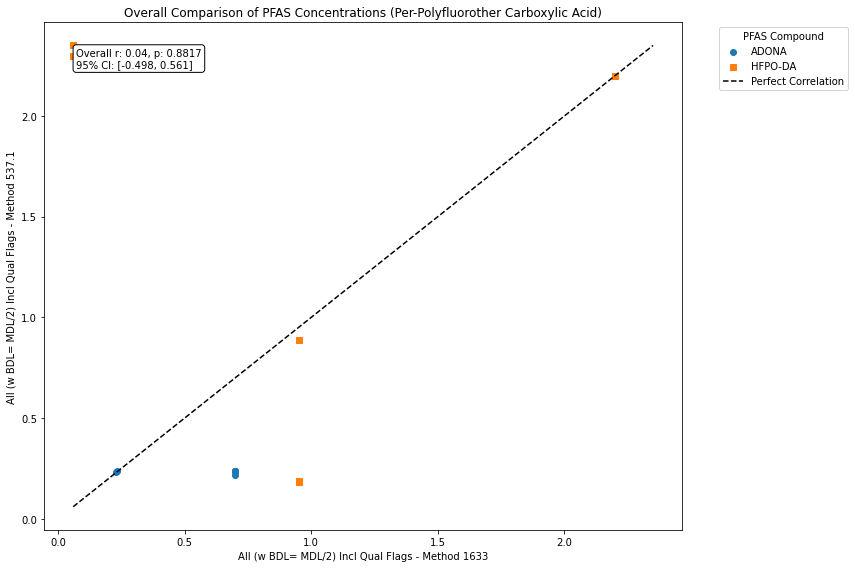

In [112]:
# Filter the DataFrame to include only the specified compounds
filtered_df = merged_df[merged_df['PFAS Compound_1633'].isin(pfas_compounds_PerPolyfluorotherCarboxylicAcid)].dropna(subset=['All (w BDL= MDL/2) Incl Qual Flags_1633', 'All (w BDL= MDL/2) Incl Qual Flags_5371'])

# Calculate Pearson correlation coefficient and p-value for the filtered dataset
r_value, p_value = scipy.stats.pearsonr(filtered_df['All (w BDL= MDL/2) Incl Qual Flags_1633'], filtered_df['All (w BDL= MDL/2) Incl Qual Flags_5371'])

# Calculate the 95% confidence interval for the Pearson correlation coefficient
ci_lower, ci_upper = calculate_confidence_interval(r_value, len(filtered_df))

# Define markers and a color palette
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', '+', 'x', 'X', 'd', '|', '_']
colors = sns.color_palette("hsv", n_colors=len(pfas_compounds_PerPolyfluorotherCarboxylicAcid))

# Create a mapping for compounds to markers
compound_marker_map = {compound: marker for compound, marker in zip(pfas_compounds_PerPolyfluorotherCarboxylicAcid, markers)}

plt.figure(figsize=(12, 8))

# Plot each compound with its assigned marker
for compound, group_data in filtered_df.groupby('PFAS Compound_1633'):
    plt.scatter(group_data['All (w BDL= MDL/2) Incl Qual Flags_1633'], group_data['All (w BDL= MDL/2) Incl Qual Flags_5371'], 
                marker=compound_marker_map[compound], label=compound)

# Calculate the overall min and max values for both variables to ensure the line covers the entire data range
overall_min = min(filtered_df['All (w BDL= MDL/2) Incl Qual Flags_1633'].min(), filtered_df['All (w BDL= MDL/2) Incl Qual Flags_5371'].min())
overall_max = max(filtered_df['All (w BDL= MDL/2) Incl Qual Flags_1633'].max(), filtered_df['All (w BDL= MDL/2) Incl Qual Flags_5371'].max())

# Add a dashed diagonal line to indicate perfect correlation
plt.plot([overall_min, overall_max], [overall_min, overall_max], 'k--', label='Perfect Correlation')

# Annotate the plot with the overall r-value, p-value, and confidence interval
plt.annotate(f'Overall r: {r_value:.2f}, p: {p_value:.4f}\n95% CI: [{ci_lower:.3f}, {ci_upper:.3f}]', 
             xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top', 
             bbox=dict(boxstyle='round', fc='w'))

plt.title('Overall Comparison of PFAS Concentrations (Per-Polyfluorother Carboxylic Acid)')
plt.xlabel('All (w BDL= MDL/2) Incl Qual Flags - Method 1633')
plt.ylabel('All (w BDL= MDL/2) Incl Qual Flags - Method 537.1')
plt.legend(title='PFAS Compound', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [66]:
filtered_df

Empty DataFrame
Columns: [Result_1633, Analysis Method_1633, Sample Location_1633, Type_1633, Sample Date_1633, PFAS Compound_1633, MDL_1633, Detection Class_1633, Quant Only Incl Qual Flags_1633, Quant Incl Estimates Incl Qual Flags_1633, All (w BDL= MDL/2) Incl Qual Flags_1633, Units_1633, ChainLength_1633, Dominant Contributor_1633, Sector_1633, unique_key, Result_5371, Analysis Method_5371, Sample Location_5371, Type_5371, Sample Date_5371, PFAS Compound_5371, MDL_5371, Detection Class_5371, Quant Only Incl Qual Flags_5371, Quant Incl Estimates Incl Qual Flags_5371, All (w BDL= MDL/2) Incl Qual Flags_5371, Units_5371, ChainLength_5371, Dominant Contributor_5371, Sector_5371]
Index: []

[0 rows x 31 columns]

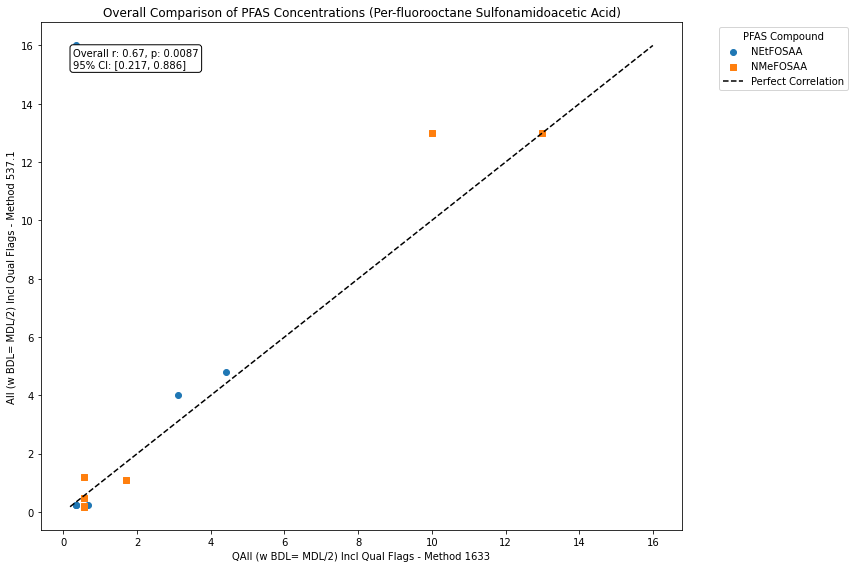

In [113]:

# Filter the DataFrame to include only the specified compounds
filtered_df = merged_df[merged_df['PFAS Compound_1633'].isin(pfas_compounds_PerfluorooctaneSulfonamidoaceticAcid)].dropna(subset=['All (w BDL= MDL/2) Incl Qual Flags_1633', 'All (w BDL= MDL/2) Incl Qual Flags_5371'])

# Calculate Pearson correlation coefficient and p-value for the filtered dataset
r_value, p_value = scipy.stats.pearsonr(filtered_df['All (w BDL= MDL/2) Incl Qual Flags_1633'], filtered_df['All (w BDL= MDL/2) Incl Qual Flags_5371'])

# Calculate the 95% confidence interval for the Pearson correlation coefficient
ci_lower, ci_upper = calculate_confidence_interval(r_value, len(filtered_df))

# Define markers and a color palette
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', '+', 'x', 'X', 'd', '|', '_']
colors = sns.color_palette("hsv", n_colors=len(pfas_compounds_PerfluorooctaneSulfonamidoaceticAcid))

# Create a mapping for compounds to markers
compound_marker_map = {compound: marker for compound, marker in zip(pfas_compounds_PerfluorooctaneSulfonamidoaceticAcid, markers)}

plt.figure(figsize=(12, 8))

# Plot each compound with its assigned marker
for compound, group_data in filtered_df.groupby('PFAS Compound_1633'):
    plt.scatter(group_data['All (w BDL= MDL/2) Incl Qual Flags_1633'], group_data['All (w BDL= MDL/2) Incl Qual Flags_5371'], 
                marker=compound_marker_map[compound], label=compound)

# Calculate the overall min and max values for both variables to ensure the line covers the entire data range
overall_min = min(filtered_df['All (w BDL= MDL/2) Incl Qual Flags_1633'].min(), filtered_df['All (w BDL= MDL/2) Incl Qual Flags_5371'].min())
overall_max = max(filtered_df['All (w BDL= MDL/2) Incl Qual Flags_1633'].max(), filtered_df['All (w BDL= MDL/2) Incl Qual Flags_5371'].max())

# Add a dashed diagonal line to indicate perfect correlation
plt.plot([overall_min, overall_max], [overall_min, overall_max], 'k--', label='Perfect Correlation')

# Annotate the plot with the overall r-value, p-value, and confidence interval
plt.annotate(f'Overall r: {r_value:.2f}, p: {p_value:.4f}\n95% CI: [{ci_lower:.3f}, {ci_upper:.3f}]', 
             xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top', 
             bbox=dict(boxstyle='round', fc='w'))

plt.title('Overall Comparison of PFAS Concentrations (Per-fluorooctane Sulfonamidoacetic Acid)')
plt.xlabel('QAll (w BDL= MDL/2) Incl Qual Flags - Method 1633')
plt.ylabel('All (w BDL= MDL/2) Incl Qual Flags - Method 537.1')
plt.legend(title='PFAS Compound', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [68]:
len(filtered_df)

3

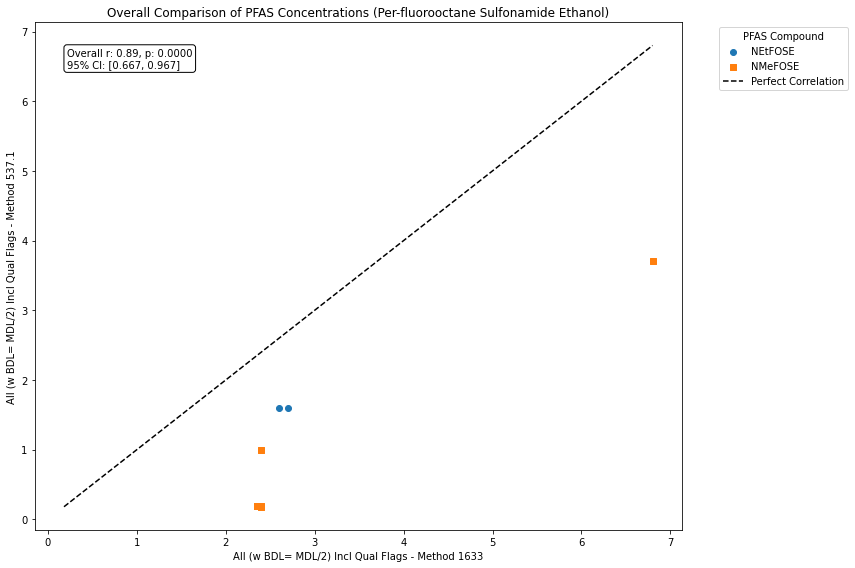

In [115]:
# Filter the DataFrame to include only the specified compounds
filtered_df = merged_df[merged_df['PFAS Compound_1633'].isin(pfas_compounds_PerfluorooctaneSulfonamideEthanol)].dropna(subset=['All (w BDL= MDL/2) Incl Qual Flags_1633', 'All (w BDL= MDL/2) Incl Qual Flags_5371'])

# Calculate Pearson correlation coefficient and p-value for the filtered dataset
r_value, p_value = scipy.stats.pearsonr(filtered_df['All (w BDL= MDL/2) Incl Qual Flags_1633'], filtered_df['All (w BDL= MDL/2) Incl Qual Flags_5371'])

# Calculate the 95% confidence interval for the Pearson correlation coefficient
ci_lower, ci_upper = calculate_confidence_interval(r_value, len(filtered_df))

# Define markers and a color palette
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', '+', 'x', 'X', 'd', '|', '_']
colors = sns.color_palette("hsv", n_colors=len(pfas_compounds_PerfluorooctaneSulfonamideEthanol))

# Create a mapping for compounds to markers
compound_marker_map = {compound: marker for compound, marker in zip(pfas_compounds_PerfluorooctaneSulfonamideEthanol, markers)}

plt.figure(figsize=(12, 8))

# Plot each compound with its assigned marker
for compound, group_data in filtered_df.groupby('PFAS Compound_1633'):
    plt.scatter(group_data['All (w BDL= MDL/2) Incl Qual Flags_1633'], group_data['All (w BDL= MDL/2) Incl Qual Flags_5371'], 
                marker=compound_marker_map[compound], label=compound)

# Calculate the overall min and max values for both variables to ensure the line covers the entire data range
overall_min = min(filtered_df['All (w BDL= MDL/2) Incl Qual Flags_1633'].min(), filtered_df['All (w BDL= MDL/2) Incl Qual Flags_5371'].min())
overall_max = max(filtered_df['All (w BDL= MDL/2) Incl Qual Flags_1633'].max(), filtered_df['All (w BDL= MDL/2) Incl Qual Flags_5371'].max())

# Add a dashed diagonal line to indicate perfect correlation
plt.plot([overall_min, overall_max], [overall_min, overall_max], 'k--', label='Perfect Correlation')

# Annotate the plot with the overall r-value, p-value, and confidence interval
plt.annotate(f'Overall r: {r_value:.2f}, p: {p_value:.4f}\n95% CI: [{ci_lower:.3f}, {ci_upper:.3f}]', 
             xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top', 
             bbox=dict(boxstyle='round', fc='w'))

plt.title('Overall Comparison of PFAS Concentrations (Per-fluorooctane Sulfonamide Ethanol)')
plt.xlabel('All (w BDL= MDL/2) Incl Qual Flags - Method 1633')
plt.ylabel('All (w BDL= MDL/2) Incl Qual Flags - Method 537.1')
plt.legend(title='PFAS Compound', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [70]:
len(filtered_df)

0

In [71]:
filtered_df

Empty DataFrame
Columns: [Result_1633, Analysis Method_1633, Sample Location_1633, Type_1633, Sample Date_1633, PFAS Compound_1633, MDL_1633, Detection Class_1633, Quant Only Incl Qual Flags_1633, Quant Incl Estimates Incl Qual Flags_1633, All (w BDL= MDL/2) Incl Qual Flags_1633, Units_1633, ChainLength_1633, Dominant Contributor_1633, Sector_1633, unique_key, Result_5371, Analysis Method_5371, Sample Location_5371, Type_5371, Sample Date_5371, PFAS Compound_5371, MDL_5371, Detection Class_5371, Quant Only Incl Qual Flags_5371, Quant Incl Estimates Incl Qual Flags_5371, All (w BDL= MDL/2) Incl Qual Flags_5371, Units_5371, ChainLength_5371, Dominant Contributor_5371, Sector_5371]
Index: []

[0 rows x 31 columns]

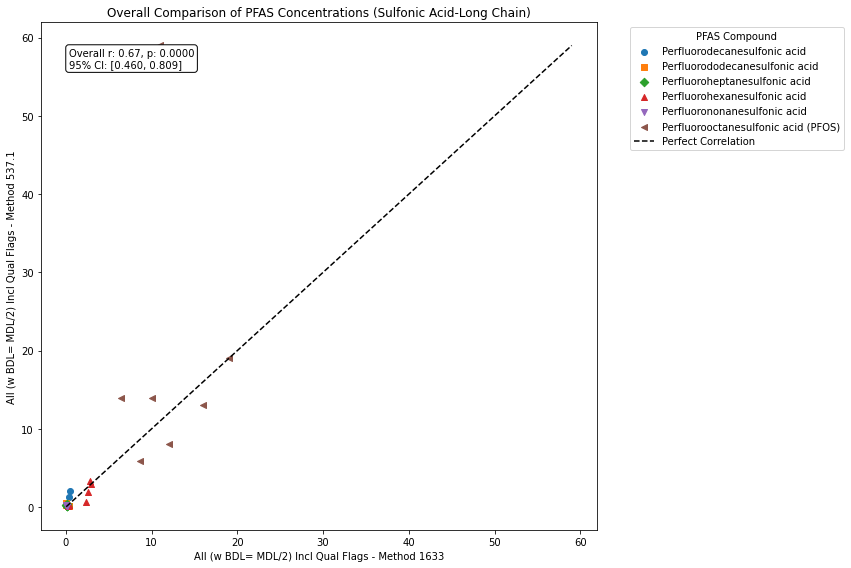

In [117]:
# Filter the DataFrame to include only the specified compounds
filtered_df = merged_df[merged_df['PFAS Compound_1633'].isin(pfas_compounds_SulfonicAcid_Long)].dropna(subset=['All (w BDL= MDL/2) Incl Qual Flags_1633', 'All (w BDL= MDL/2) Incl Qual Flags_5371'])

# Calculate Pearson correlation coefficient and p-value for the filtered dataset
r_value, p_value = scipy.stats.pearsonr(filtered_df['All (w BDL= MDL/2) Incl Qual Flags_1633'], filtered_df['All (w BDL= MDL/2) Incl Qual Flags_5371'])

# Calculate the 95% confidence interval for the Pearson correlation coefficient
ci_lower, ci_upper = calculate_confidence_interval(r_value, len(filtered_df))

# Define markers and a color palette
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', '+', 'x', 'X', 'd', '|', '_']
colors = sns.color_palette("hsv", n_colors=len(pfas_compounds_SulfonicAcid_Long))

# Create a mapping for compounds to markers
compound_marker_map = {compound: marker for compound, marker in zip(pfas_compounds_SulfonicAcid_Long, markers)}

plt.figure(figsize=(12, 8))

# Plot each compound with its assigned marker
for compound, group_data in filtered_df.groupby('PFAS Compound_1633'):
    plt.scatter(group_data['All (w BDL= MDL/2) Incl Qual Flags_1633'], group_data['All (w BDL= MDL/2) Incl Qual Flags_5371'], 
                marker=compound_marker_map[compound], label=compound)

# Calculate the overall min and max values for both variables to ensure the line covers the entire data range
overall_min = min(filtered_df['All (w BDL= MDL/2) Incl Qual Flags_1633'].min(), filtered_df['All (w BDL= MDL/2) Incl Qual Flags_5371'].min())
overall_max = max(filtered_df['All (w BDL= MDL/2) Incl Qual Flags_1633'].max(), filtered_df['All (w BDL= MDL/2) Incl Qual Flags_5371'].max())

# Add a dashed diagonal line to indicate perfect correlation
plt.plot([overall_min, overall_max], [overall_min, overall_max], 'k--', label='Perfect Correlation')

# Annotate the plot with the overall r-value, p-value, and confidence interval
plt.annotate(f'Overall r: {r_value:.2f}, p: {p_value:.4f}\n95% CI: [{ci_lower:.3f}, {ci_upper:.3f}]', 
             xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top', 
             bbox=dict(boxstyle='round', fc='w'))

plt.title('Overall Comparison of PFAS Concentrations (Sulfonic Acid-Long Chain)')
plt.xlabel('All (w BDL= MDL/2) Incl Qual Flags - Method 1633')
plt.ylabel('All (w BDL= MDL/2) Incl Qual Flags - Method 537.1')
plt.legend(title='PFAS Compound', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [73]:
len(filtered_df)

10

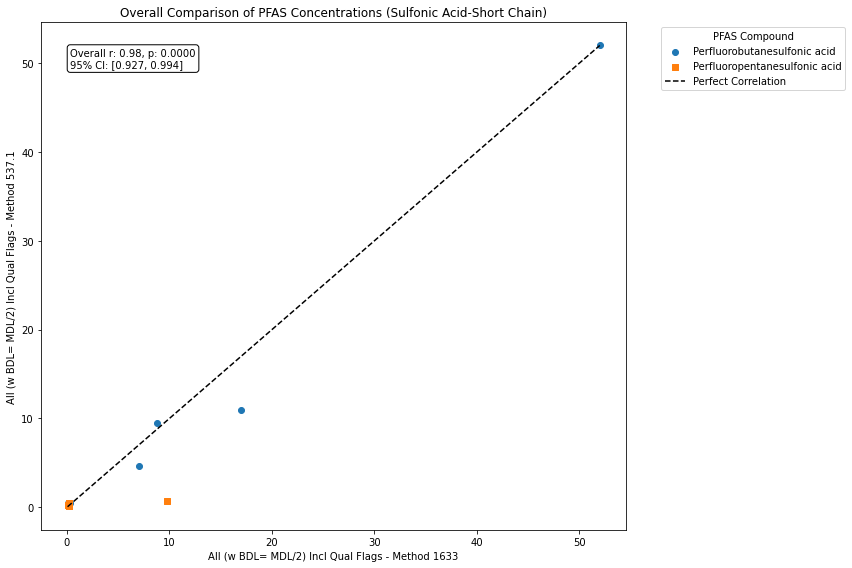

In [118]:
# Filter the DataFrame to include only the specified compounds
filtered_df = merged_df[merged_df['PFAS Compound_1633'].isin(pfas_compounds_SulfonicAcid_Short)].dropna(subset=['All (w BDL= MDL/2) Incl Qual Flags_1633', 'All (w BDL= MDL/2) Incl Qual Flags_5371'])

# Calculate Pearson correlation coefficient and p-value for the filtered dataset
r_value, p_value = scipy.stats.pearsonr(filtered_df['All (w BDL= MDL/2) Incl Qual Flags_1633'], filtered_df['All (w BDL= MDL/2) Incl Qual Flags_5371'])

# Calculate the 95% confidence interval for the Pearson correlation coefficient
ci_lower, ci_upper = calculate_confidence_interval(r_value, len(filtered_df))

# Define markers and a color palette
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', '+', 'x', 'X', 'd', '|', '_']
colors = sns.color_palette("hsv", n_colors=len(pfas_compounds_SulfonicAcid_Short))

# Create a mapping for compounds to markers
compound_marker_map = {compound: marker for compound, marker in zip(pfas_compounds_SulfonicAcid_Short, markers)}

plt.figure(figsize=(12, 8))

# Plot each compound with its assigned marker
for compound, group_data in filtered_df.groupby('PFAS Compound_1633'):
    plt.scatter(group_data['All (w BDL= MDL/2) Incl Qual Flags_1633'], group_data['All (w BDL= MDL/2) Incl Qual Flags_5371'], 
                marker=compound_marker_map[compound], label=compound)

# Calculate the overall min and max values for both variables to ensure the line covers the entire data range
overall_min = min(filtered_df['All (w BDL= MDL/2) Incl Qual Flags_1633'].min(), filtered_df['All (w BDL= MDL/2) Incl Qual Flags_5371'].min())
overall_max = max(filtered_df['All (w BDL= MDL/2) Incl Qual Flags_1633'].max(), filtered_df['All (w BDL= MDL/2) Incl Qual Flags_5371'].max())

# Add a dashed diagonal line to indicate perfect correlation
plt.plot([overall_min, overall_max], [overall_min, overall_max], 'k--', label='Perfect Correlation')

# Annotate the plot with the overall r-value, p-value, and confidence interval
plt.annotate(f'Overall r: {r_value:.2f}, p: {p_value:.4f}\n95% CI: [{ci_lower:.3f}, {ci_upper:.3f}]', 
             xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top', 
             bbox=dict(boxstyle='round', fc='w'))

plt.title('Overall Comparison of PFAS Concentrations (Sulfonic Acid-Short Chain)')
plt.xlabel('All (w BDL= MDL/2) Incl Qual Flags - Method 1633')
plt.ylabel('All (w BDL= MDL/2) Incl Qual Flags - Method 537.1')
plt.legend(title='PFAS Compound', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [75]:
len(filtered_df)

4

In [76]:
quant_df['PFAS Compound_1633'].unique()

array(['NMeFOSAA', 'Perfluorodecanoic acid', 'Perfluorododecanoic acid',
       'Perfluorooctanesulfonic acid (PFOS)', 'Perfluoroundecanoic acid',
       'Perfluorobutanesulfonic acid', 'Perfluoroheptanoic acid',
       'Perfluorohexanesulfonic acid', 'Perfluorohexanoic acid',
       'Perfluorooctanoic acid (PFOA)', 'Perfluoropentanoic acid',
       'Perfluorobutanoic acid', 'NEtFOSAA', 'Perfluorononanoic acid'],
      dtype=object)

### By Type

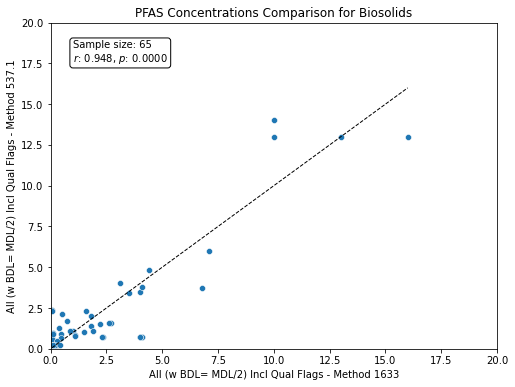

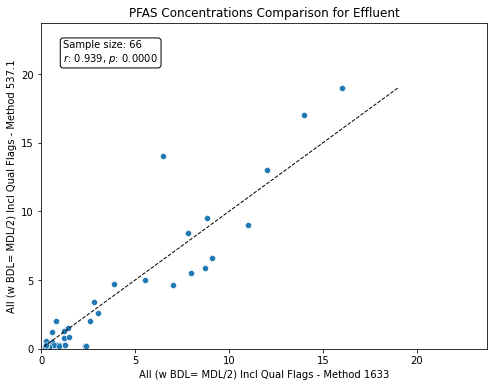

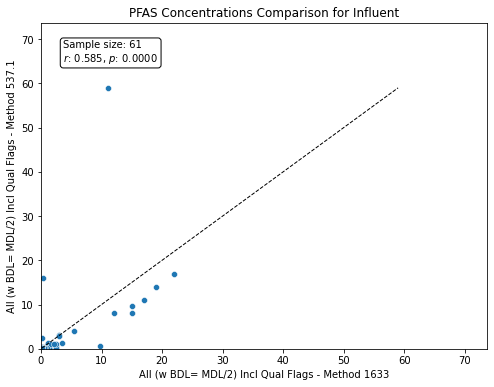

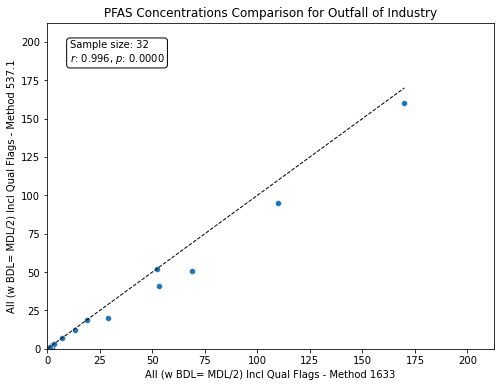

In [33]:
# Get unique PFAS compounds
unique_Types = merged_df['Type_1633'].unique()

# Iterate through each unique compound and creaTypete a scatter plot
for Type in unique_Types:
    # Filter the DataFrame for the current compound
    Type_df = merged_df[merged_df['Type_1633'] == Type].dropna(subset=['All (w BDL= MDL/2) Incl Qual Flags_1633', 'All (w BDL= MDL/2) Incl Qual Flags_5371'])
    
    # Ensure there are at least two data points
    if len(Type_df) >= 2:
        # Calculate local min and max for the current compound's data
        local_min = min(Type_df['All (w BDL= MDL/2) Incl Qual Flags_1633'].min(), Type_df['All (w BDL= MDL/2) Incl Qual Flags_5371'].min())
        local_max = max(Type_df['All (w BDL= MDL/2) Incl Qual Flags_1633'].max(), Type_df['All (w BDL= MDL/2) Incl Qual Flags_5371'].max())
        
        # Calculate Pearson correlation coefficient and p-value
        r_value, p_value = scipy.stats.pearsonr(Type_df['Quant Only Incl Qual Flags_1633'], Type_df['All (w BDL= MDL/2) Incl Qual Flags_5371'])
        sample_size = len(Type_df)
        
        # Create the scatter plot
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=Type_df, x='All (w BDL= MDL/2) Incl Qual Flags_1633', y='All (w BDL= MDL/2) Incl Qual Flags_5371')
        
        # Set the same limits for both axes based on local min and max
        plt.xlim(local_min*-.1, local_max*1.25)
        plt.ylim(local_min*-.1, local_max*1.25)
        
        # Adding plot titles and labels
        plt.title(f'PFAS Concentrations Comparison for {Type}')
        plt.xlabel('All (w BDL= MDL/2) Incl Qual Flags - Method 1633')
        plt.ylabel('All (w BDL= MDL/2) Incl Qual Flags - Method 537.1')
        
        # Adding a diagonal line to indicate where x = y
        plt.plot([local_min, local_max], [local_min, local_max], 'k--', linewidth=1)
        
        # Annotate plot with statistics
        plt.annotate(f'Sample size: {sample_size}\n$r$: {r_value:.3f}, $p$: {p_value:.4f}', 
                    xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top',
                    bbox=dict(boxstyle='round', fc='w'))
        
        # Show plot
        plt.show()


### By Sample Location

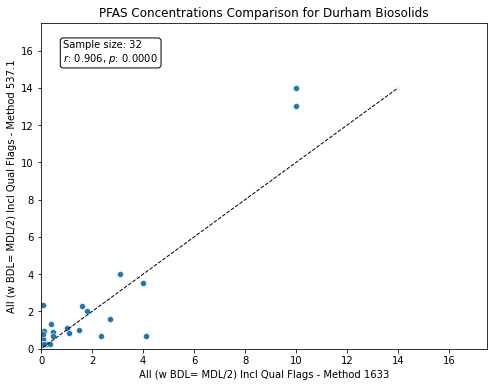

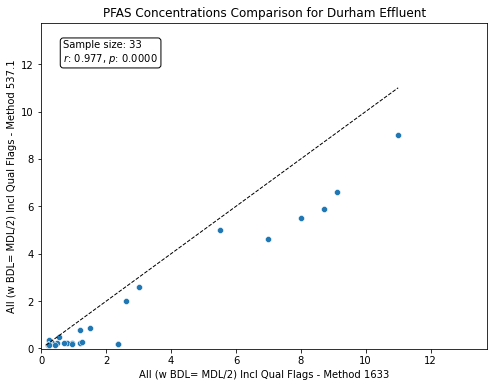

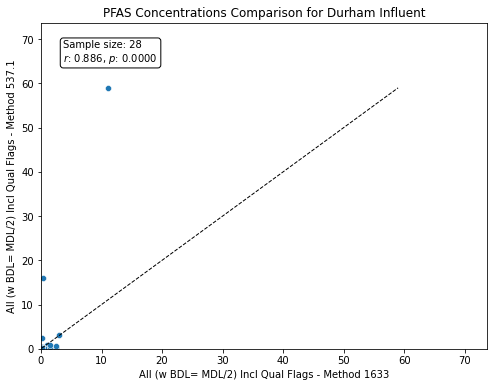

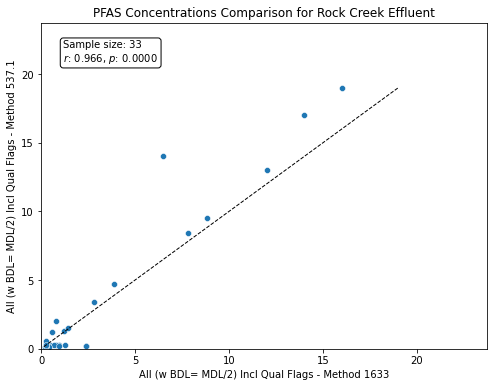

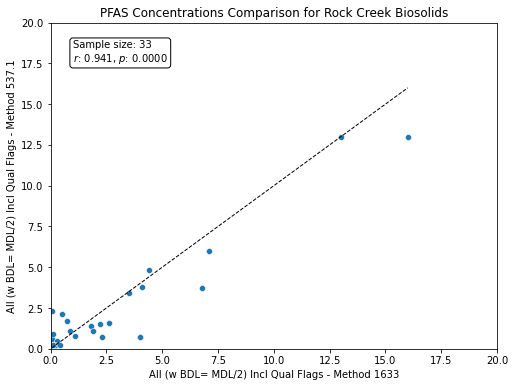

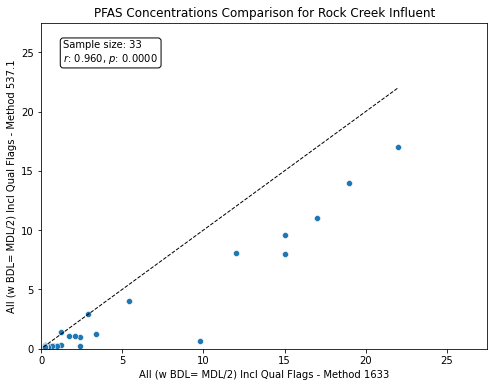

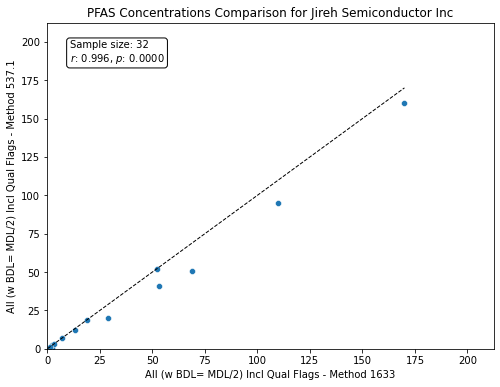

In [35]:
# Get unique PFAS compounds
unique_Locations = merged_df['Sample Location_1633'].unique()

# Iterate through each unique compound and creaTypete a scatter plot
for Location in unique_Locations:
    # Filter the DataFrame for the current compound
    Location_df = merged_df[merged_df['Sample Location_1633'] == Location].dropna(subset=['All (w BDL= MDL/2) Incl Qual Flags_1633', 'All (w BDL= MDL/2) Incl Qual Flags_5371'])
    
    # Ensure there are at least two data points
    if len(Location_df) >= 2:
        # Calculate local min and max for the current compound's data
        local_min = min(Location_df['All (w BDL= MDL/2) Incl Qual Flags_1633'].min(), Location_df['All (w BDL= MDL/2) Incl Qual Flags_5371'].min())
        local_max = max(Location_df['All (w BDL= MDL/2) Incl Qual Flags_1633'].max(), Location_df['All (w BDL= MDL/2) Incl Qual Flags_5371'].max())
        
        # Calculate Pearson correlation coefficient and p-value
        r_value, p_value = scipy.stats.pearsonr(Location_df['All (w BDL= MDL/2) Incl Qual Flags_1633'], Location_df['All (w BDL= MDL/2) Incl Qual Flags_5371'])
        sample_size = len(Location_df)
        
        # Create the scatter plot
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=Location_df, x='All (w BDL= MDL/2) Incl Qual Flags_1633', y='All (w BDL= MDL/2) Incl Qual Flags_5371')
        
        # Set the same limits for both axes based on local min and max
        plt.xlim(local_min*-.1, local_max*1.25)
        plt.ylim(local_min*-.1, local_max*1.25)
        
        # Adding plot titles and labels
        plt.title(f'PFAS Concentrations Comparison for {Location}')
        plt.xlabel('All (w BDL= MDL/2) Incl Qual Flags - Method 1633')
        plt.ylabel('All (w BDL= MDL/2) Incl Qual Flags - Method 537.1')
        
        # Adding a diagonal line to indicate where x = y
        plt.plot([local_min, local_max], [local_min, local_max], 'k--', linewidth=1)
        
        # Annotate plot with statistics
        plt.annotate(f'Sample size: {sample_size}\n$r$: {r_value:.3f}, $p$: {p_value:.4f}', 
                    xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top',
                    bbox=dict(boxstyle='round', fc='w'))
        
        # Show plot
        plt.show()

## Bland-Altman plot

### All Quant

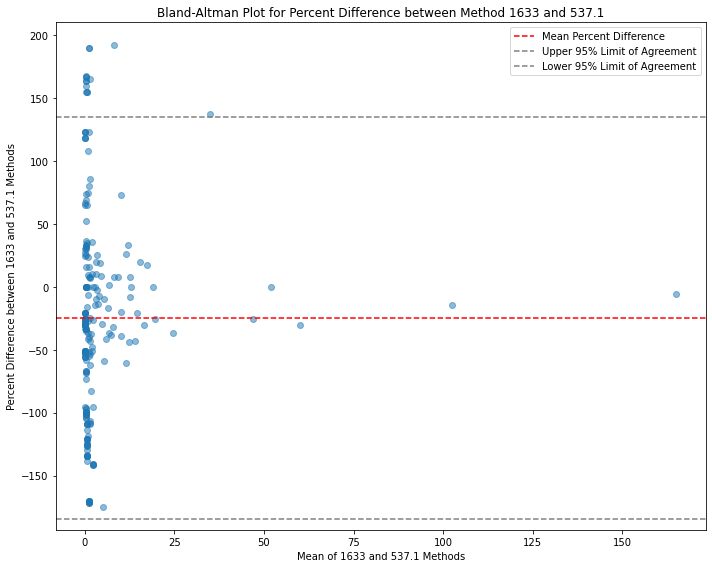

In [37]:
# Assuming method1 and method2 are your data series from the DataFrame
method1 = merged_df['All (w BDL= MDL/2) Incl Qual Flags_1633']
method2 = merged_df['All (w BDL= MDL/2) Incl Qual Flags_5371']

# Calculate the mean of the measurements and the percent difference
means = (method1 + method2) / 2
percent_diff = ((method2 - method1) / means) * 100

# Generate the Bland-Altman plot for percent difference
plt.figure(figsize=(10, 8))
plt.scatter(means, percent_diff, alpha=0.5)
plt.axhline(percent_diff.mean(), color='red', linestyle='--', label='Mean Percent Difference')
plt.axhline(percent_diff.mean() + 1.96*percent_diff.std(), color='gray', linestyle='--', label='Upper 95% Limit of Agreement')
plt.axhline(percent_diff.mean() - 1.96*percent_diff.std(), color='gray', linestyle='--', label='Lower 95% Limit of Agreement')

# Adding labels and title
plt.title('Bland-Altman Plot for Percent Difference between Method 1633 and 537.1')
plt.xlabel('Mean of 1633 and 537.1 Methods')
plt.ylabel('Percent Difference between 1633 and 537.1 Methods')

# Adding a legend
plt.legend()

plt.tight_layout()
plt.show()


In [38]:
percent_diff.mean()

-24.574273953492526

### By PFAS Compound

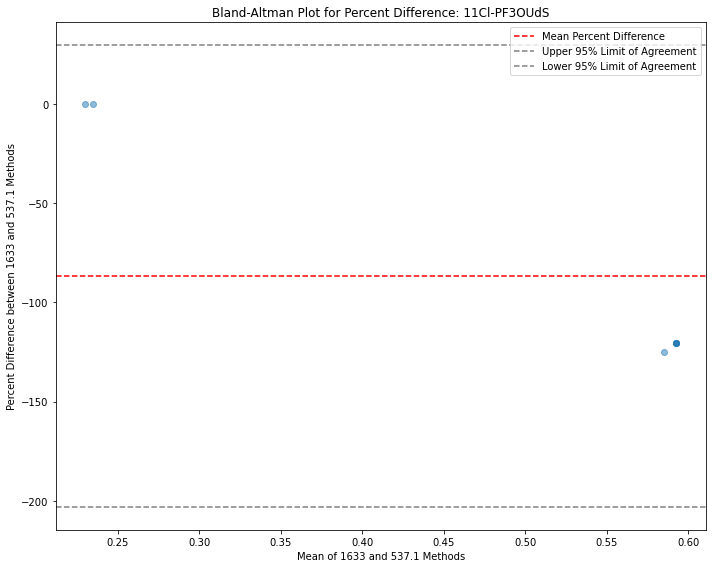

-86.78382096103613


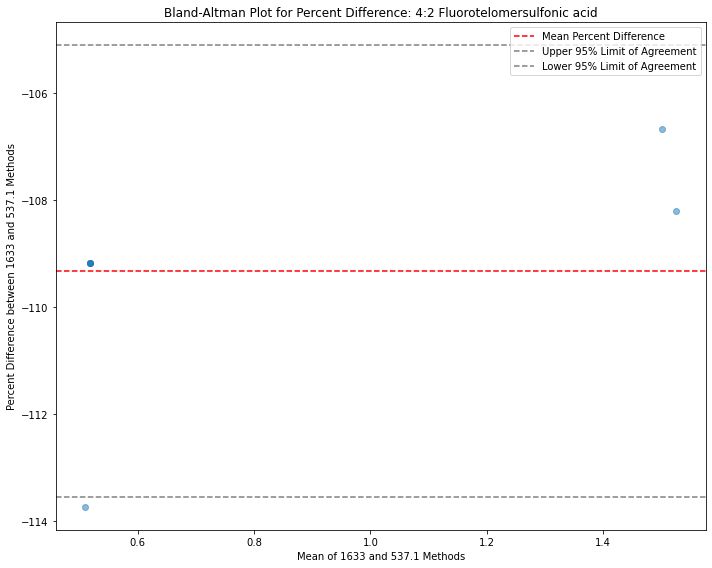

-109.32912200280445


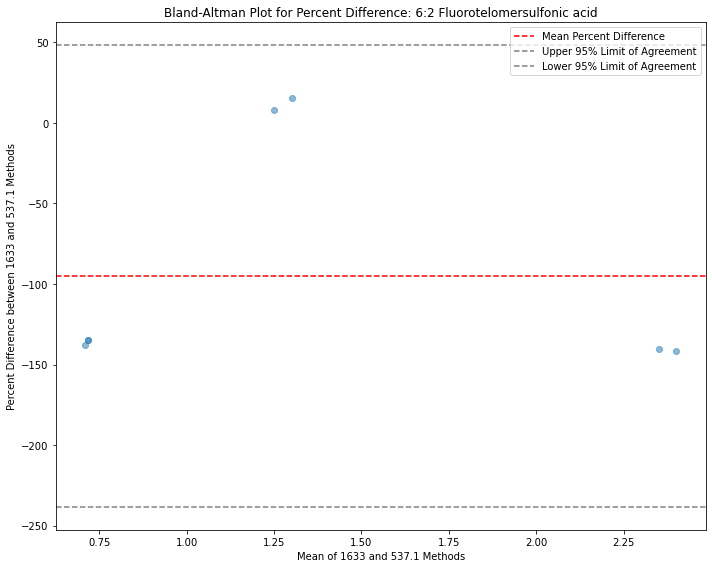

-95.10361417847955


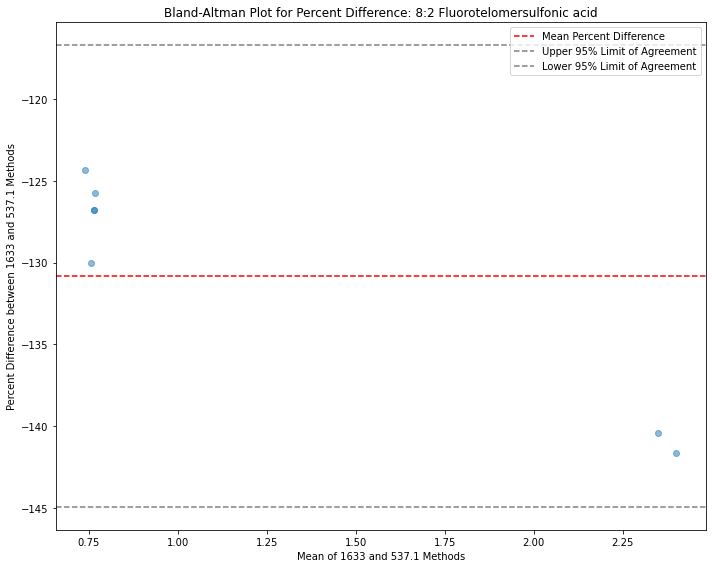

-130.82531378154945


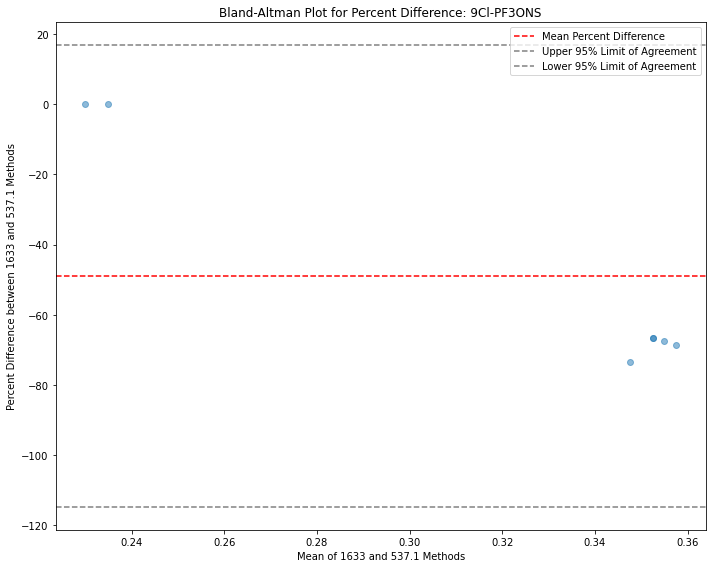

-48.97881866166394


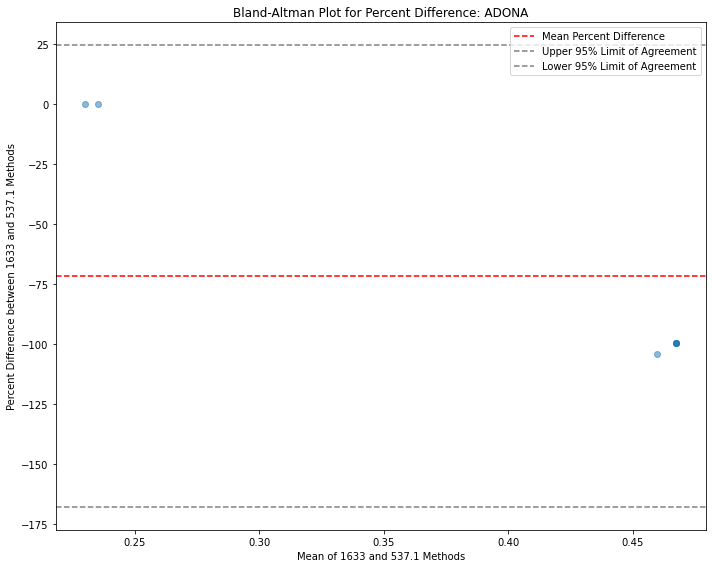

-71.74411266482879


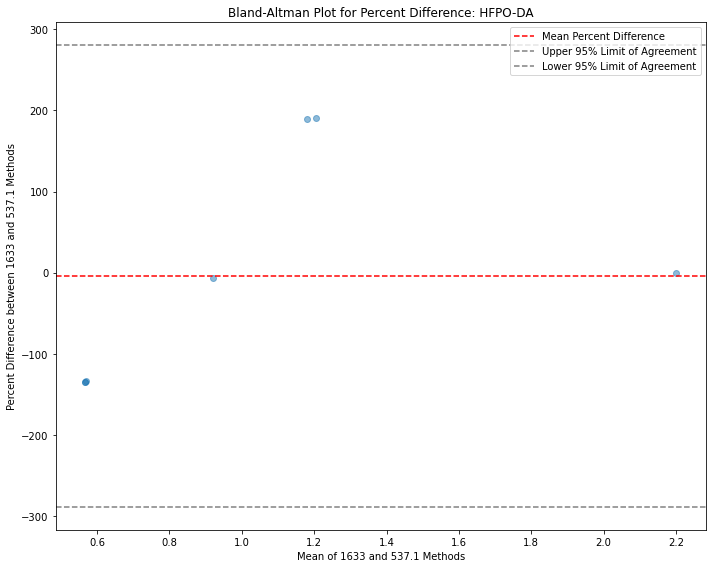

-4.226656348904738


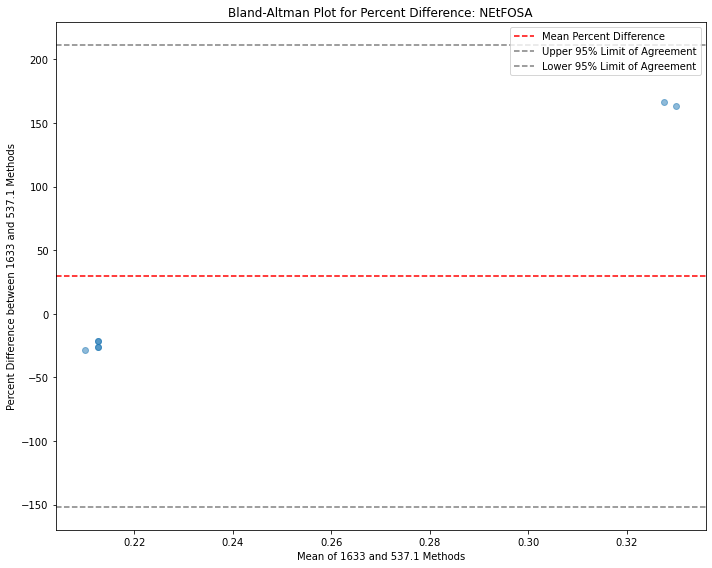

29.62278596379565


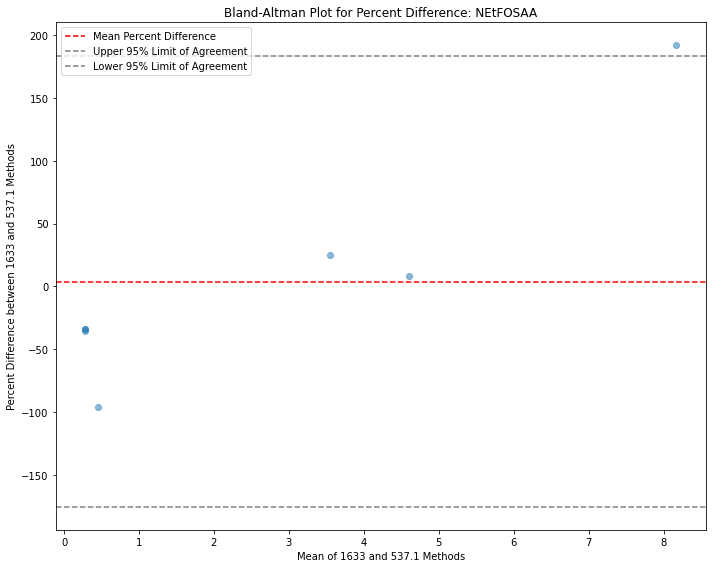

3.909652447374041


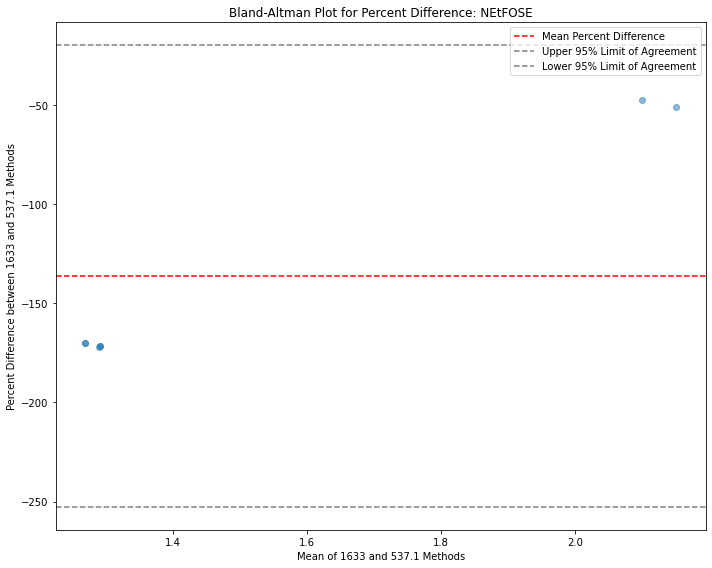

-136.25413671064817


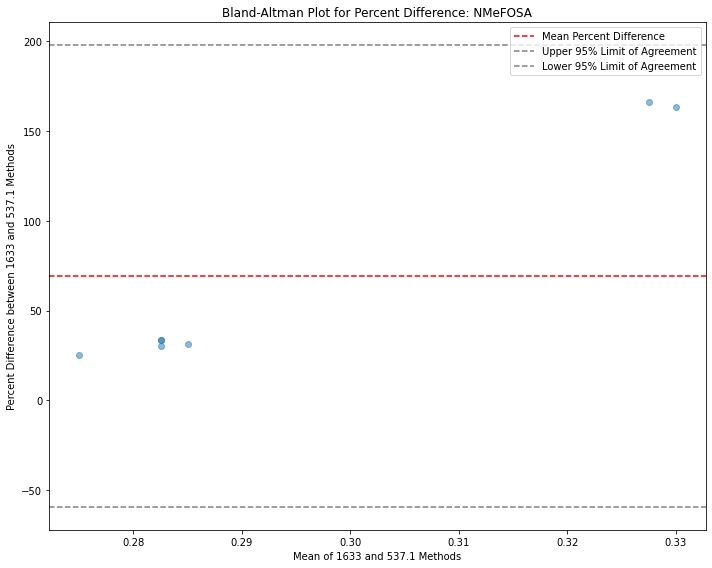

69.20388613473587


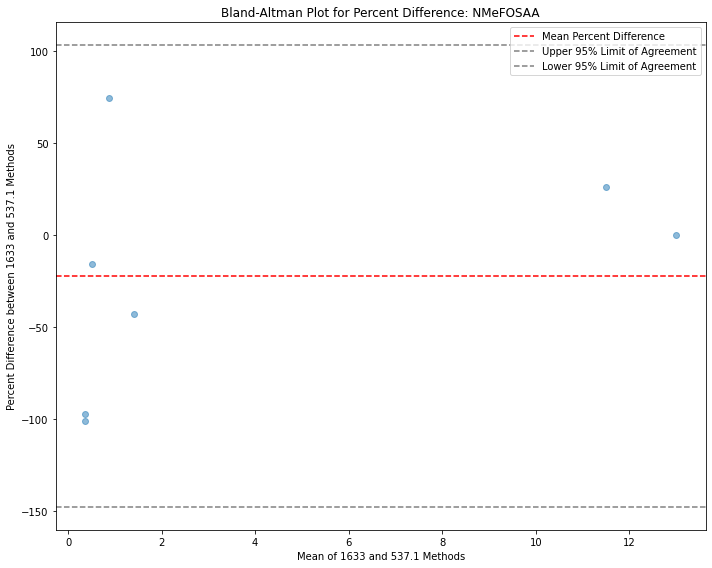

-22.405415267212764


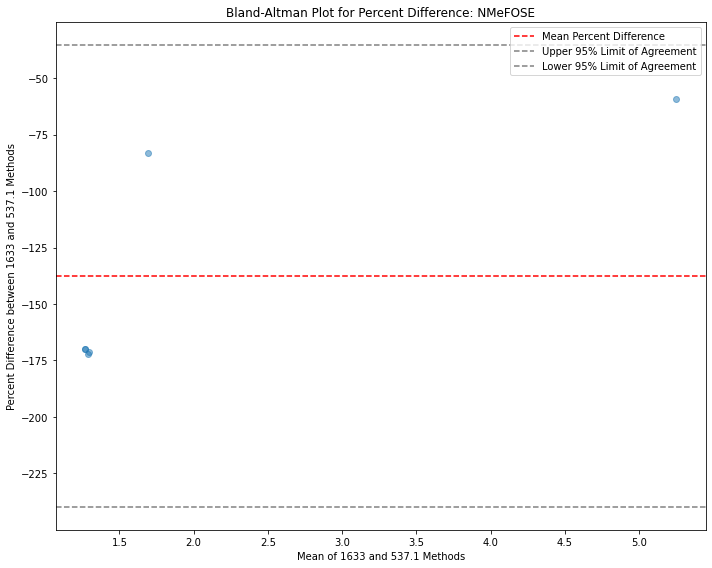

-137.64287847831307


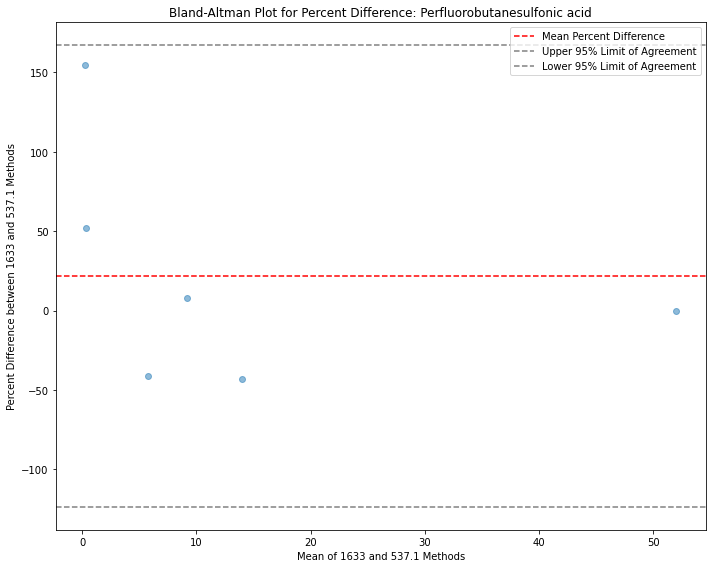

21.69759927911611


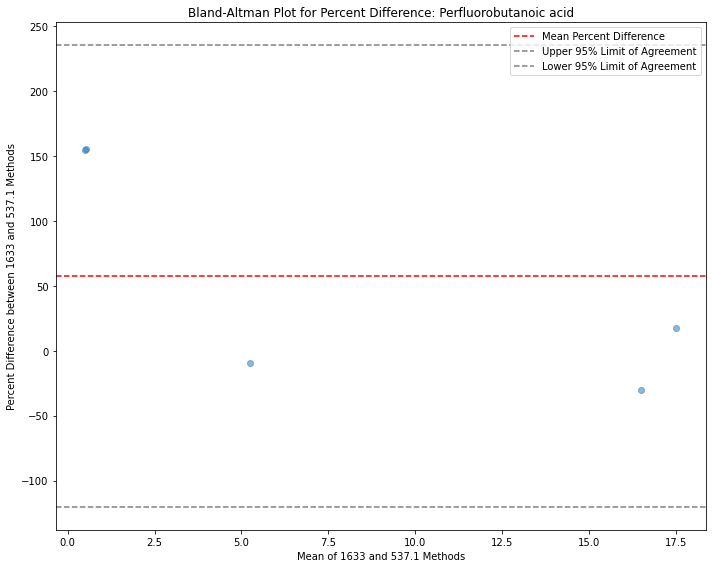

57.42720143751404


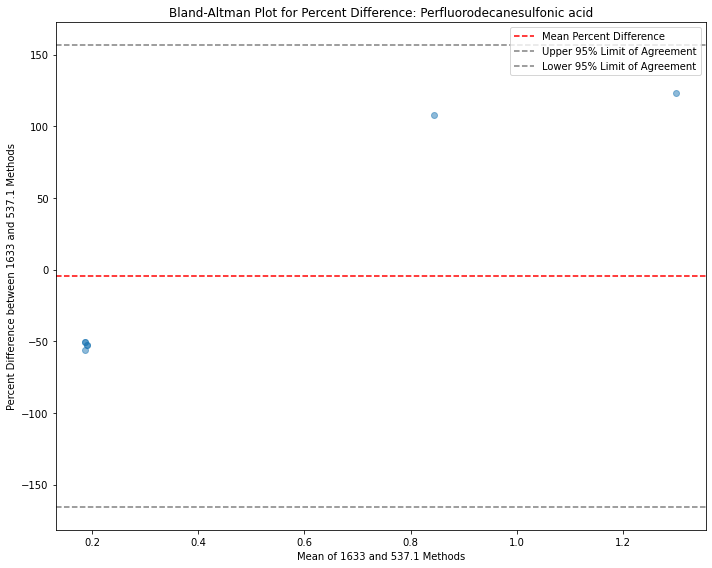

-4.546751494119904


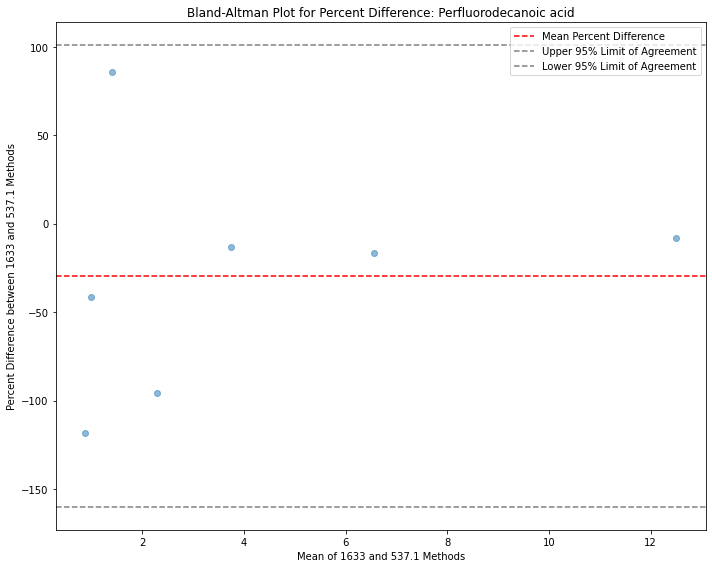

-29.63613757063344


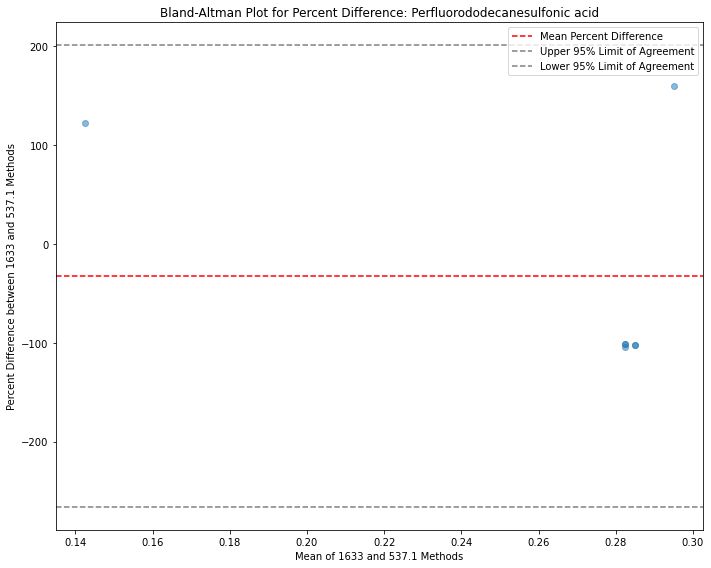

-32.510630107592355


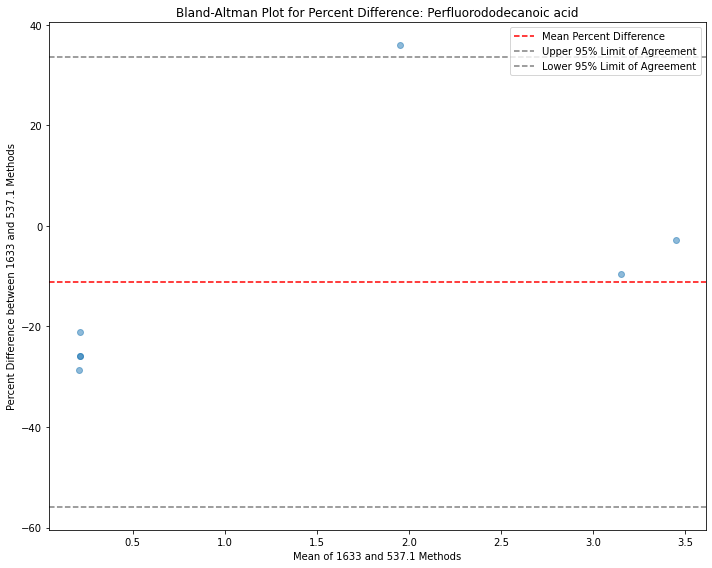

-11.148218484718301


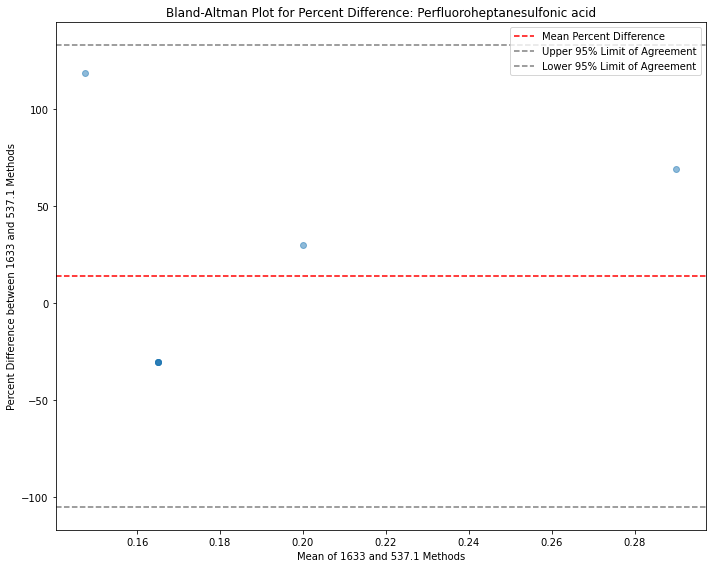

13.771066260838321


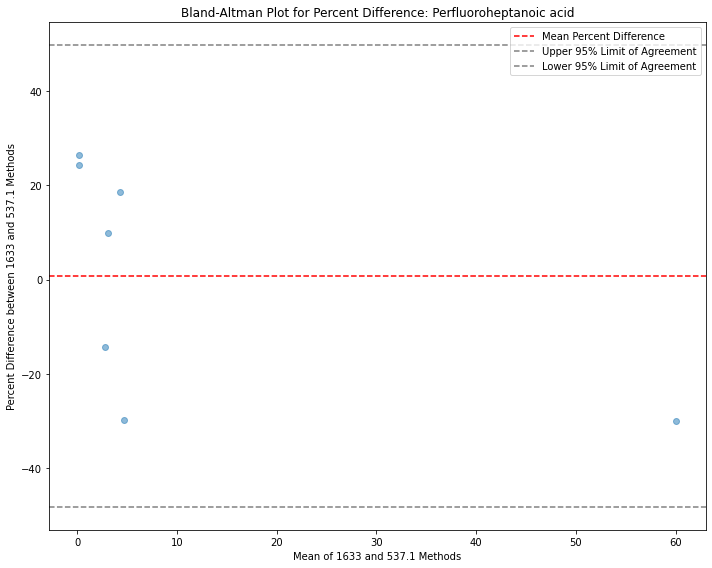

0.7520052010168996


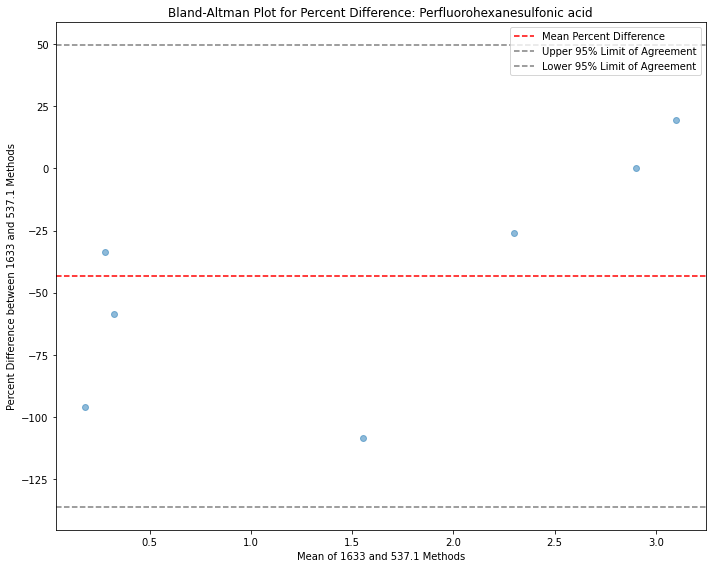

-43.342008263185505


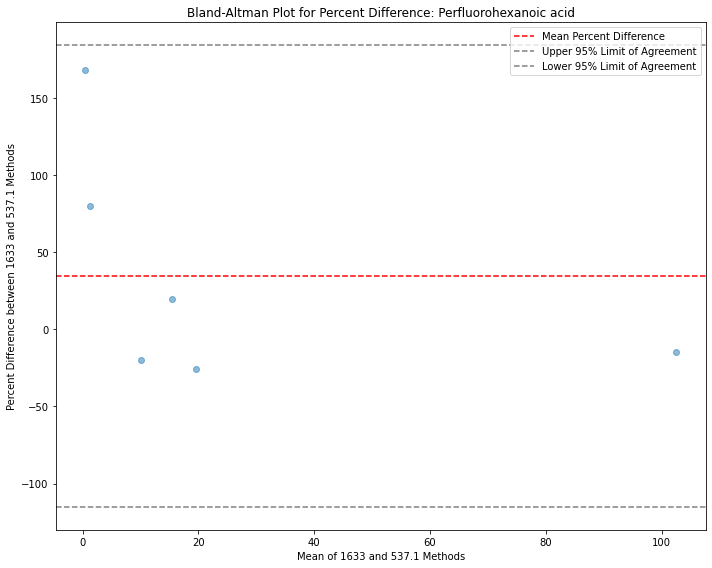

34.455191604618896


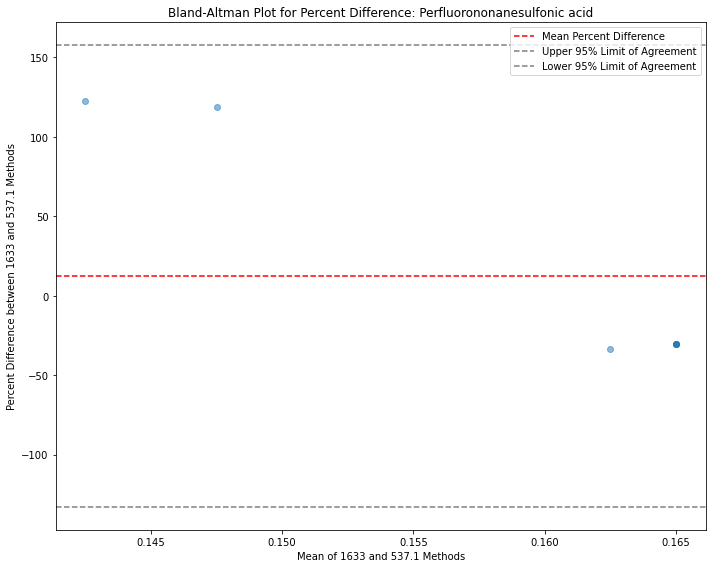

12.341830040313543


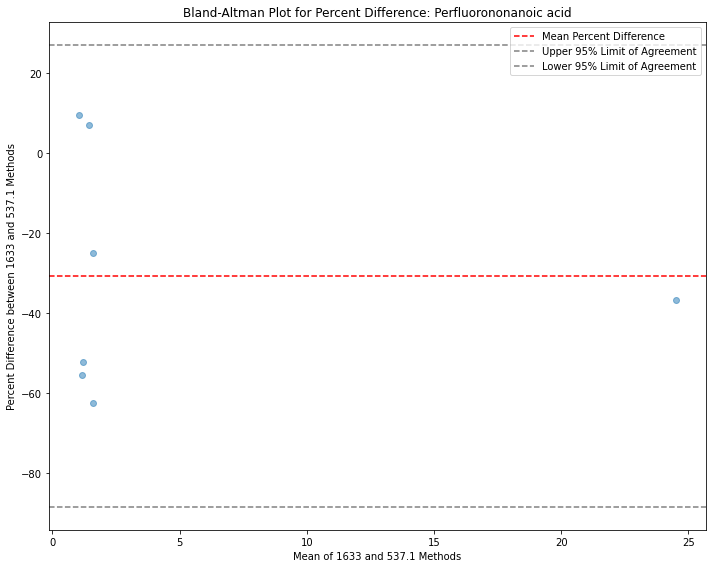

-30.747760271701175


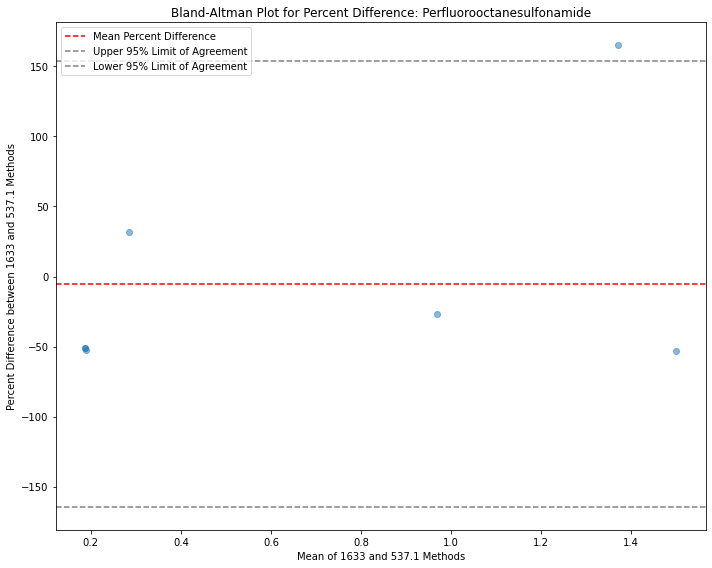

-5.36570261533131


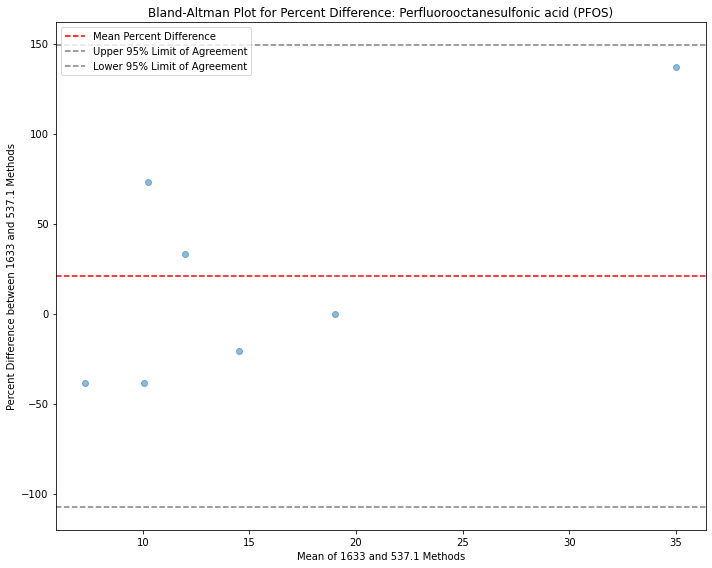

20.827876068325487


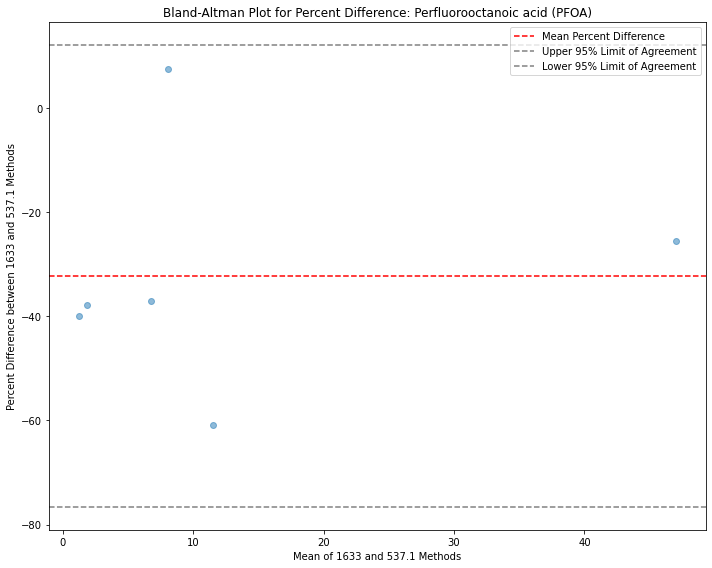

-32.3114912630793


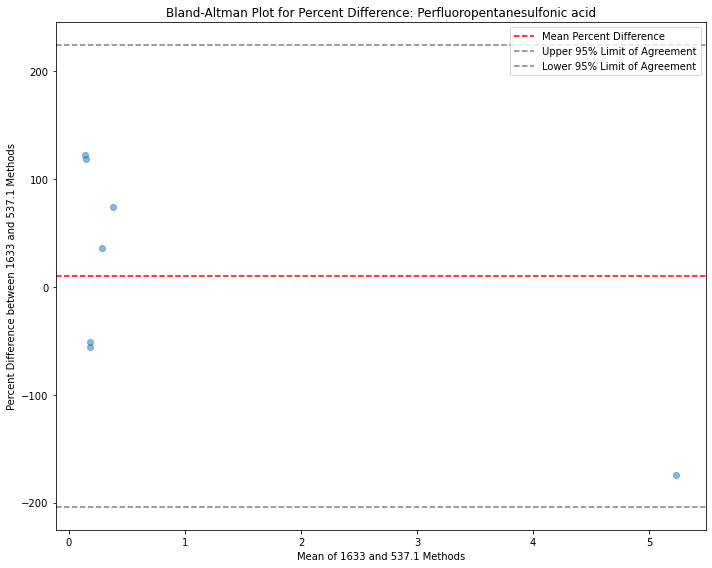

10.032767723813063


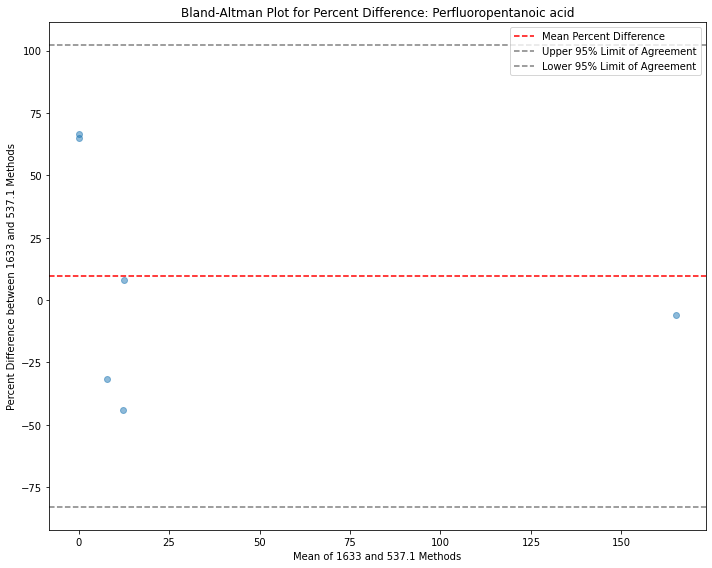

9.607536703012462


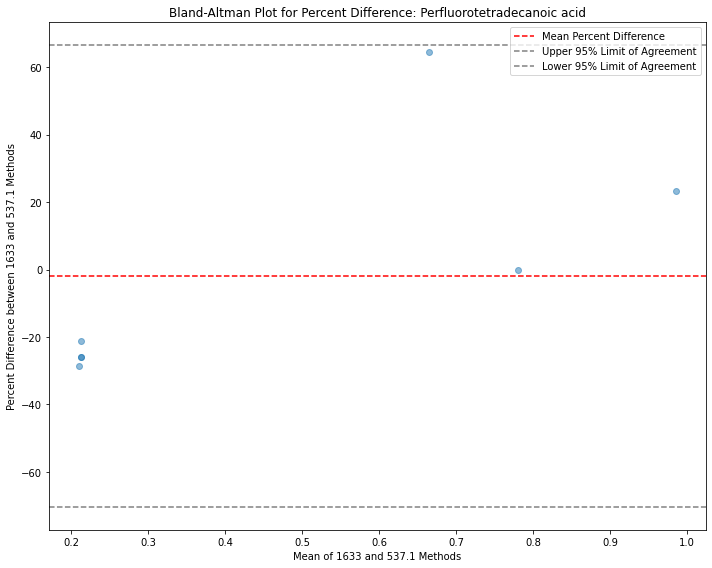

-1.9286710142245502


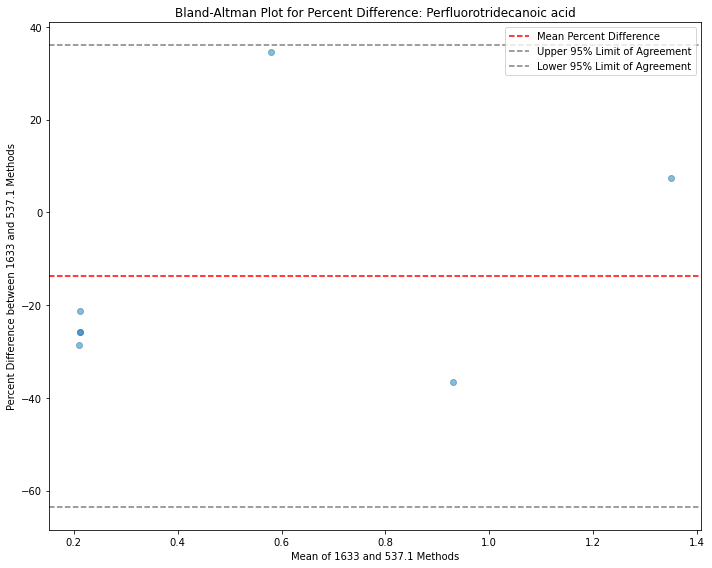

-13.740225542695137


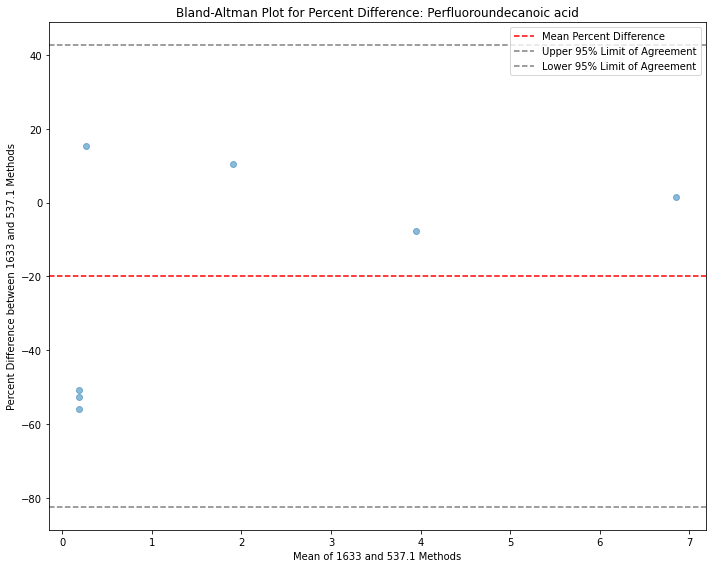

-19.931771019172597


In [39]:
# Assuming quant_df is your DataFrame
groups = merged_df.groupby('PFAS Compound_1633')

for compound, group in groups:
    # Extract the two methods' measurements for the current group
    method1 = group['All (w BDL= MDL/2) Incl Qual Flags_1633'].dropna()
    method2 = group['All (w BDL= MDL/2) Incl Qual Flags_5371'].dropna()
    
    # Ensure there are enough data points for a meaningful plot
    if len(method1) > 1 and len(method2) > 1:
        # Calculate the mean of the measurements and the percent difference
        means = (method1 + method2) / 2
        percent_diff = ((method2 - method1) / means) * 100

        # Generate the Bland-Altman plot for percent difference
        plt.figure(figsize=(10, 8))
        plt.scatter(means, percent_diff, alpha=0.5)
        plt.axhline(percent_diff.mean(), color='red', linestyle='--', label='Mean Percent Difference')
        plt.axhline(percent_diff.mean() + 1.96*percent_diff.std(), color='gray', linestyle='--', label='Upper 95% Limit of Agreement')
        plt.axhline(percent_diff.mean() - 1.96*percent_diff.std(), color='gray', linestyle='--', label='Lower 95% Limit of Agreement')

        # Adding labels and title
        plt.title(f'Bland-Altman Plot for Percent Difference: {compound}')
        plt.xlabel('Mean of 1633 and 537.1 Methods')
        plt.ylabel('Percent Difference between 1633 and 537.1 Methods')

        # Adding a legend
        plt.legend()

        plt.tight_layout()
        plt.show()
        print(percent_diff.mean())
    else:
        print(f"Not enough data for {compound} to generate a Bland-Altman plot.")



### By PFAS Class

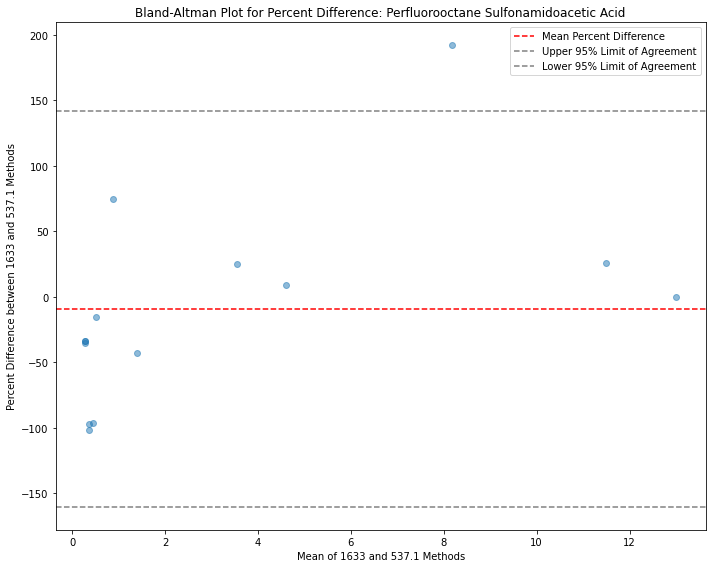

-9.24788140991936


In [40]:
# Assuming pfas_compounds_PerfluorooctaneSulfonamidoaceticAcid is a list of specific compounds you're interested in
# Filter the DataFrame to include only the specified compounds
filtered_df = merged_df[merged_df['PFAS Compound_1633'].isin(pfas_compounds_PerfluorooctaneSulfonamidoaceticAcid)].dropna(subset=['All (w BDL= MDL/2) Incl Qual Flags_1633', 'All (w BDL= MDL/2) Incl Qual Flags_5371'])

# Extract the two methods' measurements from the dataframe
method1 = filtered_df['All (w BDL= MDL/2) Incl Qual Flags_1633']
method2 = filtered_df['All (w BDL= MDL/2) Incl Qual Flags_5371']

# Calculate the mean of the measurements and the percent difference
means = (method1 + method2) / 2
percent_diff = ((method2 - method1) / means) * 100

# Check if there are enough data points for a meaningful plot
if len(method1) > 1:
    # Generate the Bland-Altman plot for percent difference
    plt.figure(figsize=(10, 8))
    plt.scatter(means, percent_diff, alpha=0.5)
    plt.axhline(percent_diff.mean(), color='red', linestyle='--', label='Mean Percent Difference')
    plt.axhline(percent_diff.mean() + 1.96*percent_diff.std(), color='gray', linestyle='--', label='Upper 95% Limit of Agreement')
    plt.axhline(percent_diff.mean() - 1.96*percent_diff.std(), color='gray', linestyle='--', label='Lower 95% Limit of Agreement')

    # Adding labels and title
    plt.title('Bland-Altman Plot for Percent Difference: Perfluorooctane Sulfonamidoacetic Acid')
    plt.xlabel('Mean of 1633 and 537.1 Methods')
    plt.ylabel('Percent Difference between 1633 and 537.1 Methods')

    # Adding a legend
    plt.legend()

    plt.tight_layout()
    plt.show()
    print(percent_diff.mean())
else:
    print("Not enough data to generate a Bland-Altman plot.")



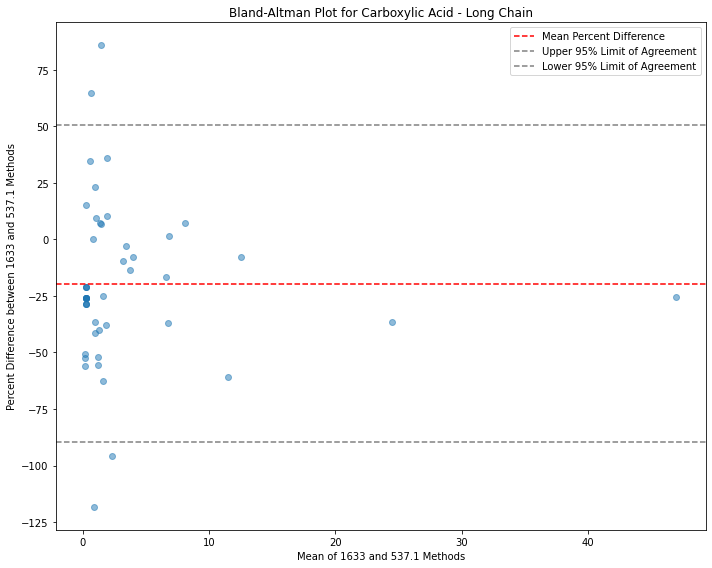

-19.662467393760252


In [41]:
# Assuming pfas_compounds_PerfluorooctaneSulfonamidoaceticAcid is a list of specific compounds you're interested in
# Filter the DataFrame to include only the specified compounds
filtered_df = merged_df[merged_df['PFAS Compound_1633'].isin(pfas_compounds_CarboxylicAcid_Long)].dropna(subset=['All (w BDL= MDL/2) Incl Qual Flags_1633', 'All (w BDL= MDL/2) Incl Qual Flags_5371'])

# Extract the two methods' measurements from the dataframe
method1 = filtered_df['All (w BDL= MDL/2) Incl Qual Flags_1633']
method2 = filtered_df['All (w BDL= MDL/2) Incl Qual Flags_5371']

# Calculate the mean of the measurements and the percent difference
means = (method1 + method2) / 2
percent_diff = ((method2 - method1) / means) * 100

# Check if there are enough data points for a meaningful plot
if len(method1) > 1:
    # Generate the Bland-Altman plot for percent difference
    plt.figure(figsize=(10, 8))
    plt.scatter(means, percent_diff, alpha=0.5)
    plt.axhline(percent_diff.mean(), color='red', linestyle='--', label='Mean Percent Difference')
    plt.axhline(percent_diff.mean() + 1.96*percent_diff.std(), color='gray', linestyle='--', label='Upper 95% Limit of Agreement')
    plt.axhline(percent_diff.mean() - 1.96*percent_diff.std(), color='gray', linestyle='--', label='Lower 95% Limit of Agreement')

    # Adding labels and title
    plt.title('Bland-Altman Plot for Carboxylic Acid - Long Chain')
    plt.xlabel('Mean of 1633 and 537.1 Methods')
    plt.ylabel('Percent Difference between 1633 and 537.1 Methods')

    # Adding a legend
    plt.legend()

    plt.tight_layout()
    plt.show()
    print(percent_diff.mean())
else:
    print("Not enough data to generate a Bland-Altman plot.")


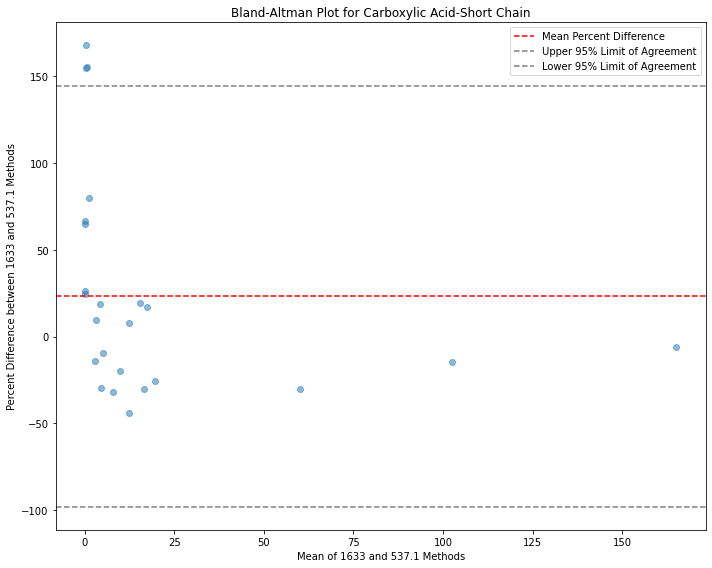

23.19901722668654


In [43]:
# Assuming pfas_compounds_PerfluorooctaneSulfonamidoaceticAcid is a list of specific compounds you're interested in
# Filter the DataFrame to include only the specified compounds
filtered_df = merged_df[merged_df['PFAS Compound_1633'].isin(pfas_compounds_CarboxylicAcid_Short)].dropna(subset=['All (w BDL= MDL/2) Incl Qual Flags_1633', 'All (w BDL= MDL/2) Incl Qual Flags_5371'])

# Extract the two methods' measurements from the dataframe
method1 = filtered_df['All (w BDL= MDL/2) Incl Qual Flags_1633']
method2 = filtered_df['All (w BDL= MDL/2) Incl Qual Flags_5371']

# Calculate the mean of the measurements and the percent difference
means = (method1 + method2) / 2
percent_diff = ((method2 - method1) / means) * 100

# Check if there are enough data points for a meaningful plot
if len(method1) > 1:
    # Generate the Bland-Altman plot for percent difference
    plt.figure(figsize=(10, 8))
    plt.scatter(means, percent_diff, alpha=0.5)
    plt.axhline(percent_diff.mean(), color='red', linestyle='--', label='Mean Percent Difference')
    plt.axhline(percent_diff.mean() + 1.96*percent_diff.std(), color='gray', linestyle='--', label='Upper 95% Limit of Agreement')
    plt.axhline(percent_diff.mean() - 1.96*percent_diff.std(), color='gray', linestyle='--', label='Lower 95% Limit of Agreement')

    # Adding labels and title
    plt.title('Bland-Altman Plot for Carboxylic Acid-Short Chain')
    plt.xlabel('Mean of 1633 and 537.1 Methods')
    plt.ylabel('Percent Difference between 1633 and 537.1 Methods')

    # Adding a legend
    plt.legend()

    plt.tight_layout()
    plt.show()
    print(percent_diff.mean())
else:
    print("Not enough data to generate a Bland-Altman plot.")


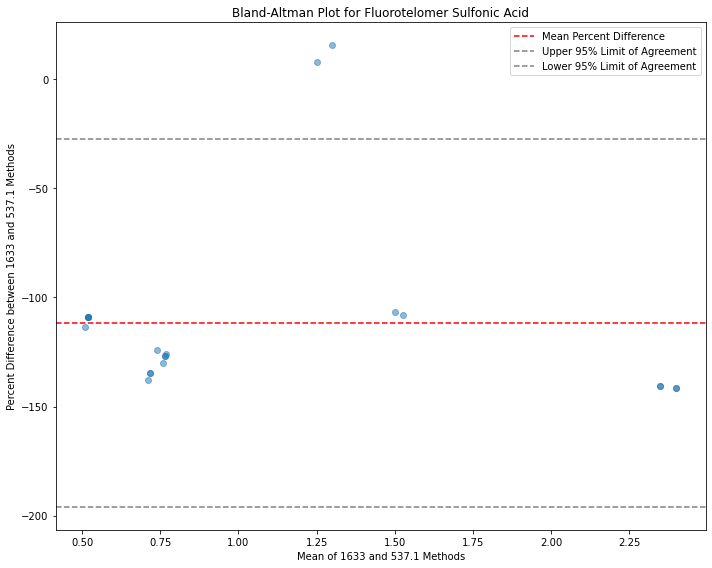

-111.75268332094444


In [44]:
# Assuming pfas_compounds_PerfluorooctaneSulfonamidoaceticAcid is a list of specific compounds you're interested in
# Filter the DataFrame to include only the specified compounds
filtered_df = merged_df[merged_df['PFAS Compound_1633'].isin(pfas_compounds_FluorotelomerSulfonicAcid)].dropna(subset=['All (w BDL= MDL/2) Incl Qual Flags_1633', 'All (w BDL= MDL/2) Incl Qual Flags_5371'])

# Extract the two methods' measurements from the dataframe
method1 = filtered_df['All (w BDL= MDL/2) Incl Qual Flags_1633']
method2 = filtered_df['All (w BDL= MDL/2) Incl Qual Flags_5371']

# Calculate the mean of the measurements and the percent difference
means = (method1 + method2) / 2
percent_diff = ((method2 - method1) / means) * 100

# Check if there are enough data points for a meaningful plot
if len(method1) > 1:
    # Generate the Bland-Altman plot for percent difference
    plt.figure(figsize=(10, 8))
    plt.scatter(means, percent_diff, alpha=0.5)
    plt.axhline(percent_diff.mean(), color='red', linestyle='--', label='Mean Percent Difference')
    plt.axhline(percent_diff.mean() + 1.96*percent_diff.std(), color='gray', linestyle='--', label='Upper 95% Limit of Agreement')
    plt.axhline(percent_diff.mean() - 1.96*percent_diff.std(), color='gray', linestyle='--', label='Lower 95% Limit of Agreement')

    # Adding labels and title
    plt.title('Bland-Altman Plot for Fluorotelomer Sulfonic Acid')
    plt.xlabel('Mean of 1633 and 537.1 Methods')
    plt.ylabel('Percent Difference between 1633 and 537.1 Methods')

    # Adding a legend
    plt.legend()

    plt.tight_layout()
    plt.show()
    print(percent_diff.mean())
else:
    print("Not enough data to generate a Bland-Altman plot.")


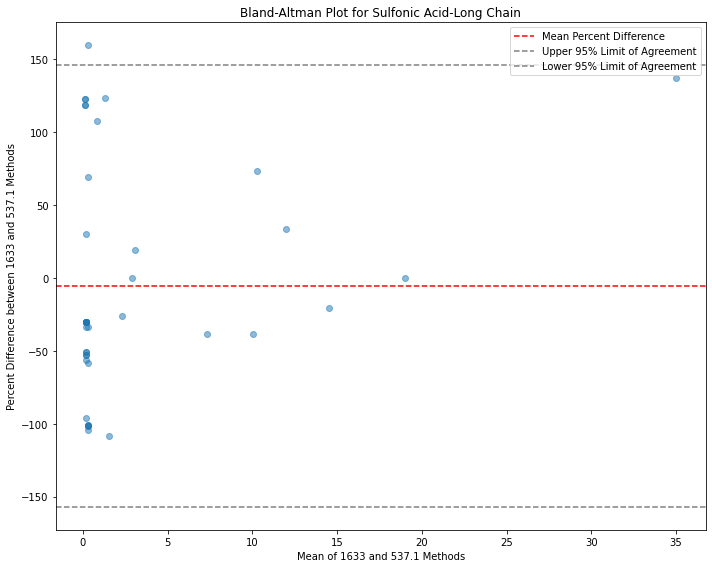

-5.576436249236738


In [45]:
# Assuming pfas_compounds_PerfluorooctaneSulfonamidoaceticAcid is a list of specific compounds you're interested in
# Filter the DataFrame to include only the specified compounds
filtered_df = merged_df[merged_df['PFAS Compound_1633'].isin(pfas_compounds_SulfonicAcid_Long)].dropna(subset=['All (w BDL= MDL/2) Incl Qual Flags_1633', 'All (w BDL= MDL/2) Incl Qual Flags_5371'])

# Extract the two methods' measurements from the dataframe
method1 = filtered_df['All (w BDL= MDL/2) Incl Qual Flags_1633']
method2 = filtered_df['All (w BDL= MDL/2) Incl Qual Flags_5371']

# Calculate the mean of the measurements and the percent difference
means = (method1 + method2) / 2
percent_diff = ((method2 - method1) / means) * 100

# Check if there are enough data points for a meaningful plot
if len(method1) > 1:
    # Generate the Bland-Altman plot for percent difference
    plt.figure(figsize=(10, 8))
    plt.scatter(means, percent_diff, alpha=0.5)
    plt.axhline(percent_diff.mean(), color='red', linestyle='--', label='Mean Percent Difference')
    plt.axhline(percent_diff.mean() + 1.96*percent_diff.std(), color='gray', linestyle='--', label='Upper 95% Limit of Agreement')
    plt.axhline(percent_diff.mean() - 1.96*percent_diff.std(), color='gray', linestyle='--', label='Lower 95% Limit of Agreement')

    # Adding labels and title
    plt.title('Bland-Altman Plot for Sulfonic Acid-Long Chain')
    plt.xlabel('Mean of 1633 and 537.1 Methods')
    plt.ylabel('Percent Difference between 1633 and 537.1 Methods')

    # Adding a legend
    plt.legend()

    plt.tight_layout()
    plt.show()
    print(percent_diff.mean())
else:
    print("Not enough data to generate a Bland-Altman plot.")


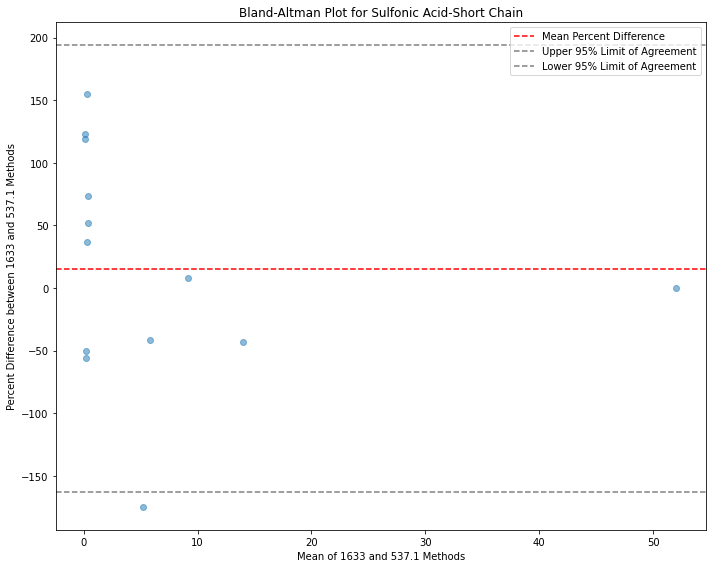

15.416536133952928


In [32]:
# Assuming pfas_compounds_PerfluorooctaneSulfonamidoaceticAcid is a list of specific compounds you're interested in
# Filter the DataFrame to include only the specified compounds
filtered_df = merged_df[merged_df['PFAS Compound_1633'].isin(pfas_compounds_SulfonicAcid_Short)].dropna(subset=['All (w BDL= MDL/2) Incl Qual Flags_1633', 'All (w BDL= MDL/2) Incl Qual Flags_5371'])

# Extract the two methods' measurements from the dataframe
method1 = filtered_df['All (w BDL= MDL/2) Incl Qual Flags_1633']
method2 = filtered_df['All (w BDL= MDL/2) Incl Qual Flags_5371']

# Calculate the mean of the measurements and the percent difference
means = (method1 + method2) / 2
percent_diff = ((method2 - method1) / means) * 100

# Check if there are enough data points for a meaningful plot
if len(method1) > 1:
    # Generate the Bland-Altman plot for percent difference
    plt.figure(figsize=(10, 8))
    plt.scatter(means, percent_diff, alpha=0.5)
    plt.axhline(percent_diff.mean(), color='red', linestyle='--', label='Mean Percent Difference')
    plt.axhline(percent_diff.mean() + 1.96*percent_diff.std(), color='gray', linestyle='--', label='Upper 95% Limit of Agreement')
    plt.axhline(percent_diff.mean() - 1.96*percent_diff.std(), color='gray', linestyle='--', label='Lower 95% Limit of Agreement')

    # Adding labels and title
    plt.title('Bland-Altman Plot for Sulfonic Acid-Short Chain')
    plt.xlabel('Mean of 1633 and 537.1 Methods')
    plt.ylabel('Percent Difference between 1633 and 537.1 Methods')

    # Adding a legend
    plt.legend()

    plt.tight_layout()
    plt.show()
    print(percent_diff.mean())
else:
    print("Not enough data to generate a Bland-Altman plot.")


In [33]:
PerPolyfluorotherCarboxylicAcid_df=all_df[all_df['PFAS Compound'].isin(pfas_compounds_PerPolyfluorotherCarboxylicAcid)]
# Filter the DataFrame to include only the specified compounds
filtered_df = merged_df[merged_df['PFAS Compound_1633'].isin(PerPolyfluorotherCarboxylicAcid_df)].dropna(subset=['All (w BDL= MDL/2) Incl Qual Flags_1633', 'All (w BDL= MDL/2) Incl Qual Flags_5371'])

# Extract the two methods' measurements from the dataframe
method1 = filtered_df['All (w BDL= MDL/2) Incl Qual Flags_1633']
method2 = filtered_df['All (w BDL= MDL/2) Incl Qual Flags_5371']

# Calculate the mean of the measurements and the percent difference
means = (method1 + method2) / 2
percent_diff = ((method2 - method1) / means) * 100

# Check if there are enough data points for a meaningful plot
if len(method1) > 1:
    # Generate the Bland-Altman plot for percent difference
    plt.figure(figsize=(10, 8))
    plt.scatter(means, percent_diff, alpha=0.5)
    plt.axhline(percent_diff.mean(), color='red', linestyle='--', label='Mean Percent Difference')
    plt.axhline(percent_diff.mean() + 1.96*percent_diff.std(), color='gray', linestyle='--', label='Upper 95% Limit of Agreement')
    plt.axhline(percent_diff.mean() - 1.96*percent_diff.std(), color='gray', linestyle='--', label='Lower 95% Limit of Agreement')

    # Adding labels and title
    plt.title('Bland-Altman Plot for Per-Polyfluorother Carboxylic Acid')
    plt.xlabel('Mean of 1633 and 537.1 Methods')
    plt.ylabel('Percent Difference between 1633 and 537.1 Methods')

    # Adding a legend
    plt.legend()

    plt.tight_layout()
    plt.show()
    print(percent_diff.mean())
else:
    print("Not enough data to generate a Bland-Altman plot.")

Not enough data to generate a Bland-Altman plot.


In [31]:
all_df[all_df['PFAS Compound'].isin(pfas_compounds_PerPolyfluorotherCarboxylicAcid)]

Result Analysis Method          Sample Location                 Type  \
23405  <0.470            1633         Durham Biosolids            Biosolids   
23406  <0.120            1633         Durham Biosolids            Biosolids   
23481   <1.40            1633          Durham Effluent             Effluent   
23482   <1.90            1633          Durham Effluent             Effluent   
23597   <1.40            1633          Durham Influent             Influent   
23598   <1.90            1633          Durham Influent             Influent   
23913   <1.40            1633      Rock Creek Effluent             Effluent   
23914   <1.90            1633      Rock Creek Effluent             Effluent   
23989  <0.460            1633     Rock Creek Biosolids            Biosolids   
23990  <0.120            1633     Rock Creek Biosolids            Biosolids   
24105   <1.40            1633      Rock Creek Influent             Influent   
24106   <1.90            1633      Rock Creek Influent             Influent   
24377   <1.40            1633  Jireh Semiconductor Inc  Outfall of Industry   
24378     2.2            1633  Jireh Semiconductor Inc  Outfall of Industry   
23443  <0.470     537.1 (mod)         Durham Biosolids            Biosolids   
23444   <4.70     537.1 (mod)         Durham Biosolids            Biosolids   
23519  <0.470     537.1 (mod)          Durham Effluent             Effluent   
23520  <0.380     537.1 (mod)          Durham Effluent             Effluent   
23635  <0.440     537.1 (mod)          Durham Influent             Influent   
23636    0.89     537.1 (mod)          Durham Influent             Influent   
23951  <0.470     537.1 (mod)      Rock Creek Effluent             Effluent   
23952  <0.370     537.1 (mod)      Rock Creek Effluent             Effluent   
24027  <0.460     537.1 (mod)     Rock Creek Biosolids            Biosolids   
24028   <4.60     537.1 (mod)     Rock Creek Biosolids            Biosolids   
24143  <0.470     537.1 (mod)      Rock Creek Influent             Influent   
24144  <0.370     537.1 (mod)      Rock Creek Influent             Influent   
24415  <0.470     537.1 (mod)  Jireh Semiconductor Inc  Outfall of Industry   
24416     2.2     537.1 (mod)  Jireh Semiconductor Inc  Outfall of Industry   

      Sample Date PFAS Compound   MDL Detection Class  \
23405  2023-12-05         ADONA  0.47             BDL   
23406  2023-12-05       HFPO-DA  0.12             BDL   
23481  2023-12-05         ADONA  1.40             BDL   
23482  2023-12-05       HFPO-DA  1.90             BDL   
23597  2023-12-05         ADONA  1.40             BDL   
23598  2023-12-05       HFPO-DA  1.90             BDL   
23913  2023-12-05         ADONA  1.40             BDL   
23914  2023-12-05       HFPO-DA  1.90             BDL   
23989  2023-12-05         ADONA  0.46             BDL   
23990  2023-12-05       HFPO-DA  0.12             BDL   
24105  2023-12-05         ADONA  1.40             BDL   
24106  2023-12-05       HFPO-DA  1.90             BDL   
24377  2023-12-06         ADONA  1.40             BDL   
24378  2023-12-06       HFPO-DA   NaN             BQL   
23443  2023-12-05         ADONA  0.47             BDL   
23444  2023-12-05       HFPO-DA  4.70             BDL   
23519  2023-12-05         ADONA  0.47             BDL   
23520  2023-12-05       HFPO-DA  0.38             BDL   
23635  2023-12-05         ADONA  0.44             BDL   
23636  2023-12-05       HFPO-DA   NaN             BQL   
23951  2023-12-05         ADONA  0.47             BDL   
23952  2023-12-05       HFPO-DA  0.37             BDL   
24027  2023-12-05         ADONA  0.46             BDL   
24028  2023-12-05       HFPO-DA  4.60             BDL   
24143  2023-12-05         ADONA  0.47             BDL   
24144  2023-12-05       HFPO-DA  0.37             BDL   
24415  2023-12-06         ADONA  0.47             BDL   
24416  2023-12-06       HFPO-DA   NaN           Quant   

       Quant Only Incl Qual Flags  Quant Incl Estimates Incl 

### By Type

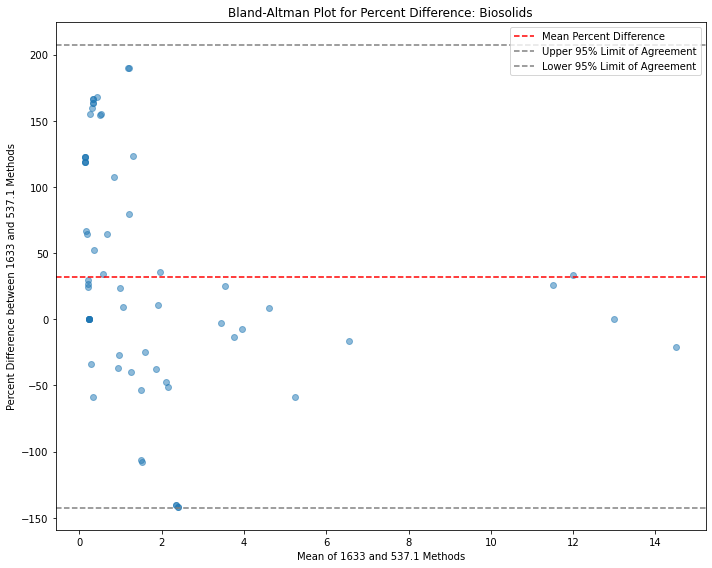

32.20164572875178


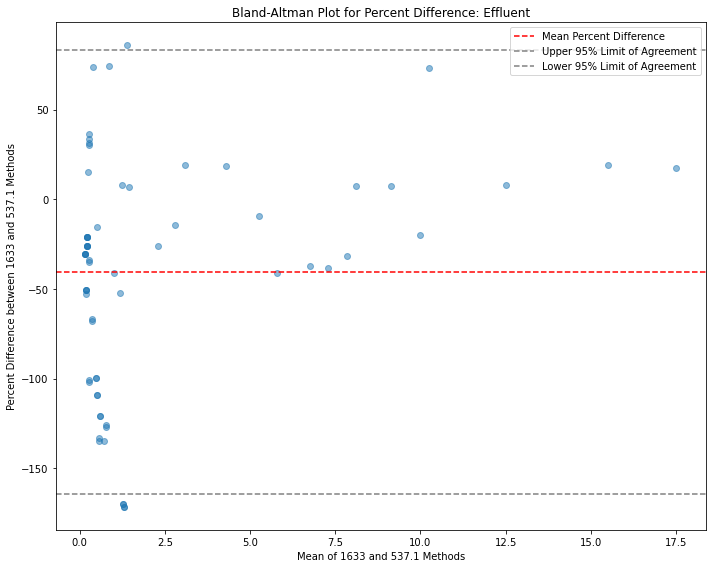

-40.567422697420625


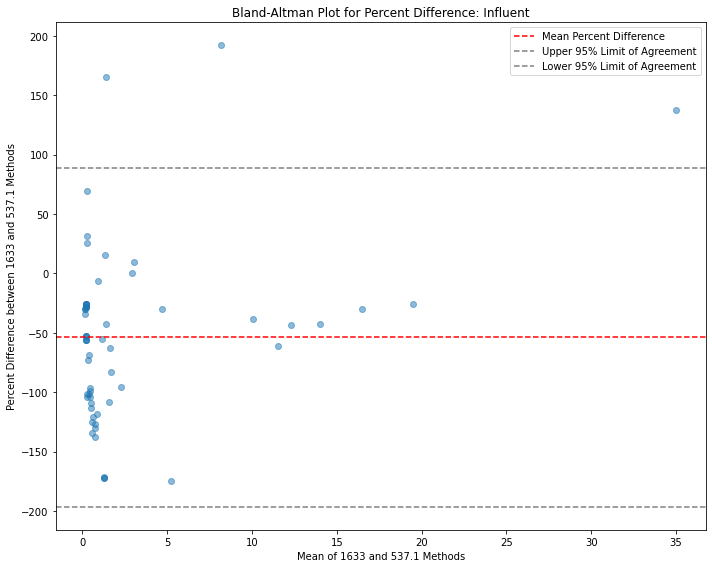

-53.70260656606998


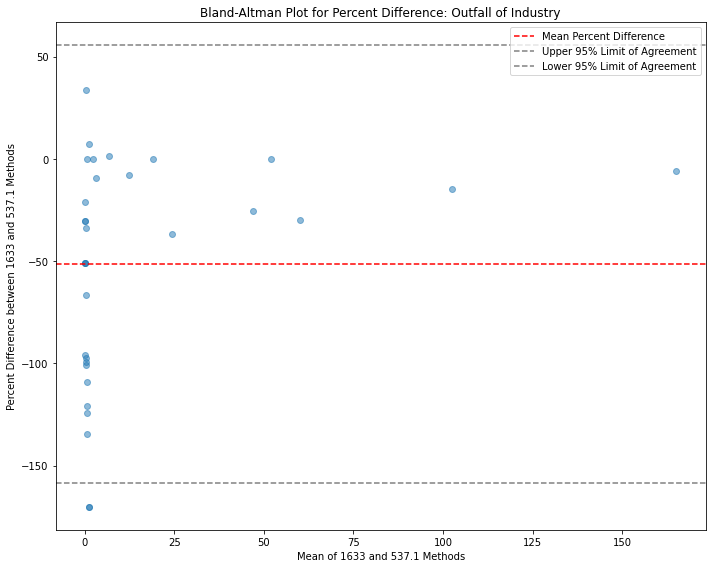

-51.38860748097383


In [48]:
# Assuming quant_df is your DataFrame
groups = merged_df.groupby('Type_1633')

for Type, group in groups:
    # Extract the two methods' measurements for the current group
    method1 = group['All (w BDL= MDL/2) Incl Qual Flags_1633'].dropna()
    method2 = group['All (w BDL= MDL/2) Incl Qual Flags_5371'].dropna()
    
    # Ensure there are enough data points for a meaningful plot
    if len(method1) > 1 and len(method2) > 1:
        # Calculate the mean of the measurements and the percent difference
        means = (method1 + method2) / 2
        percent_diff = ((method2 - method1) / means) * 100

        # Generate the Bland-Altman plot for percent difference
        plt.figure(figsize=(10, 8))
        plt.scatter(means, percent_diff, alpha=0.5)
        plt.axhline(percent_diff.mean(), color='red', linestyle='--', label='Mean Percent Difference')
        plt.axhline(percent_diff.mean() + 1.96*percent_diff.std(), color='gray', linestyle='--', label='Upper 95% Limit of Agreement')
        plt.axhline(percent_diff.mean() - 1.96*percent_diff.std(), color='gray', linestyle='--', label='Lower 95% Limit of Agreement')

        # Adding labels and title
        plt.title(f'Bland-Altman Plot for Percent Difference: {Type}')
        plt.xlabel('Mean of 1633 and 537.1 Methods')
        plt.ylabel('Percent Difference between 1633 and 537.1 Methods')

        # Adding a legend
        plt.legend()

        plt.tight_layout()
        plt.show()
        print(percent_diff.mean())
    else:
        print(f"Not enough data for {compound} to generate a Bland-Altman plot.")

### By Sample Locations

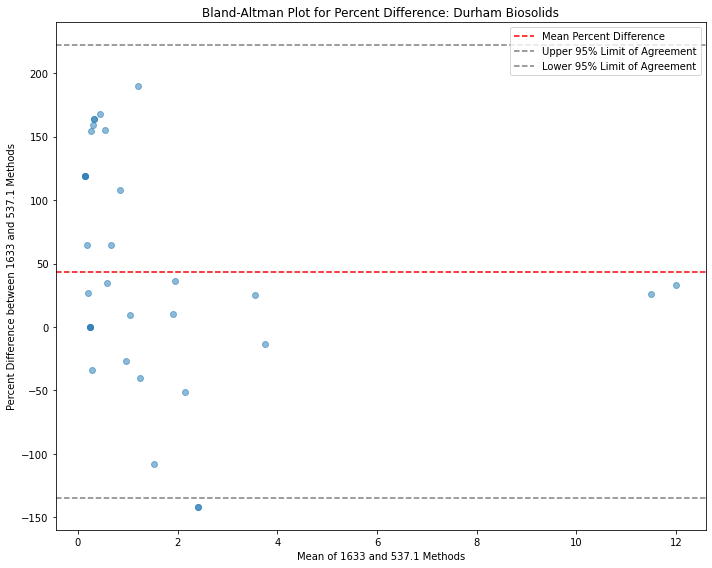

43.51982931401534


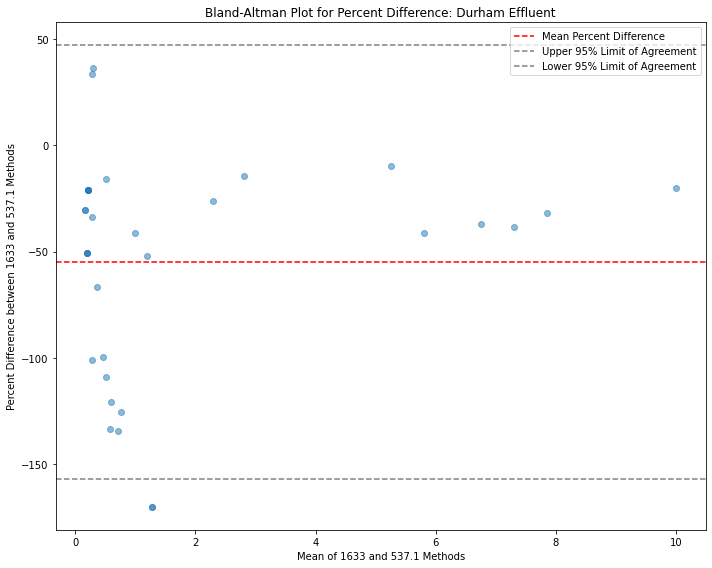

-55.11783858719227


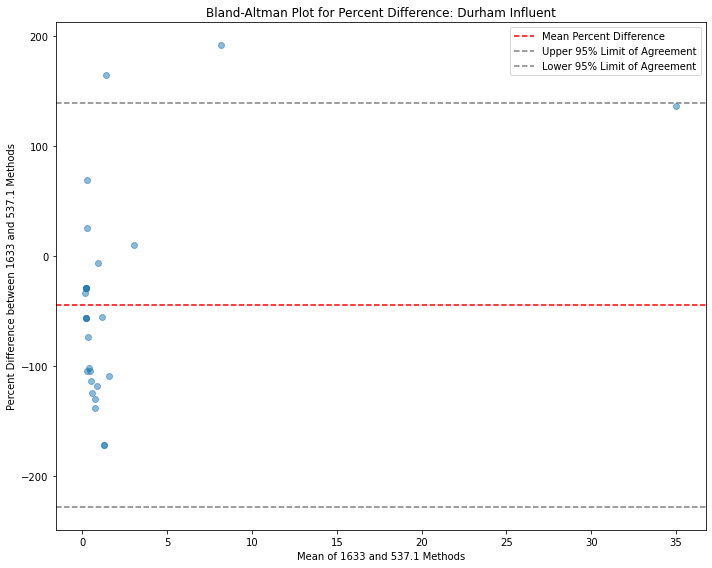

-44.319992805175


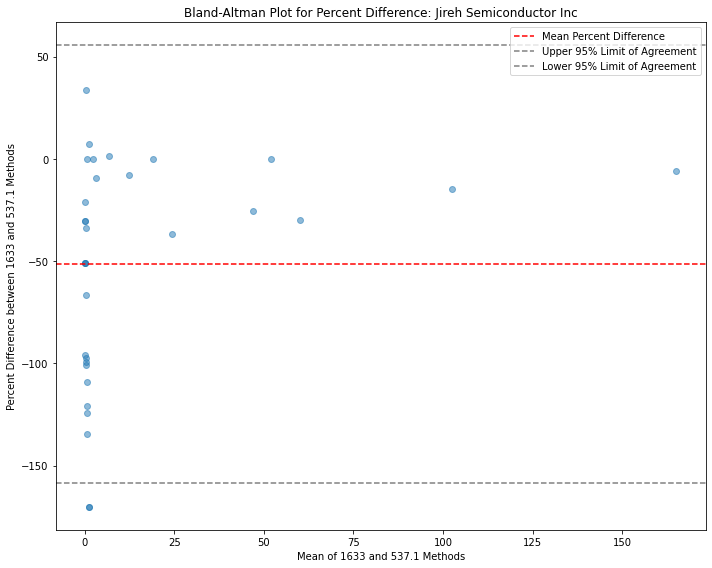

-51.38860748097383


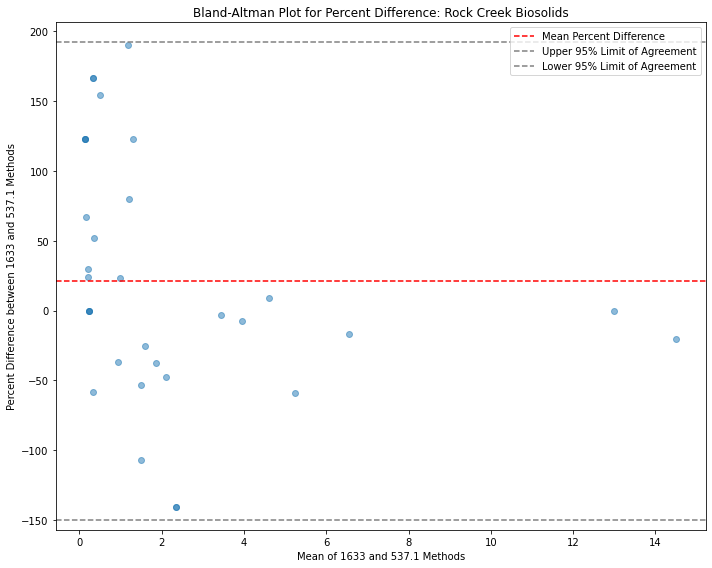

21.226437403647722


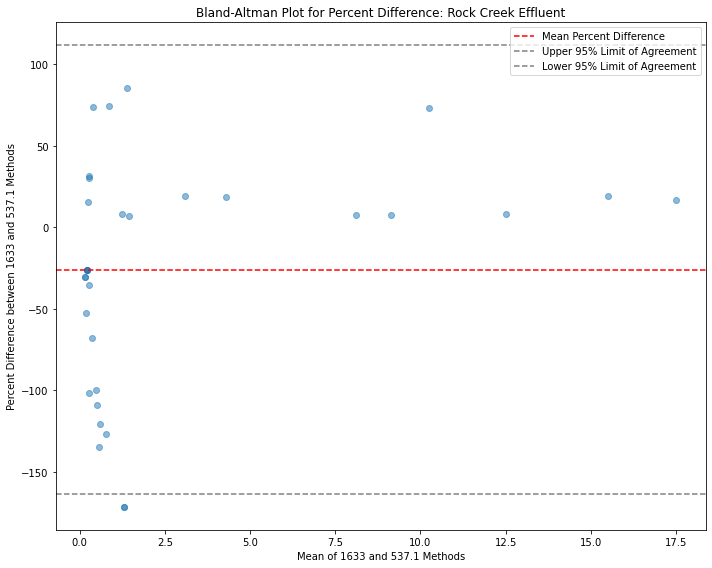

-26.01700680764898


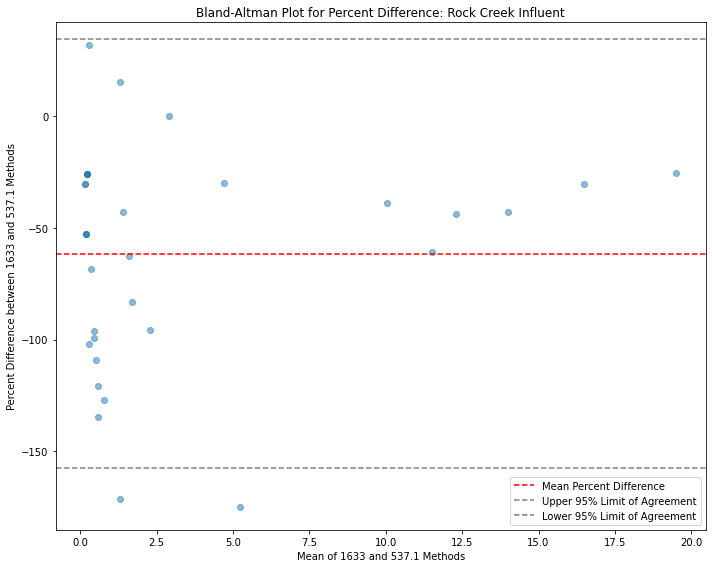

-61.66361218137479


In [49]:
# Assuming quant_df is your DataFrame
groups = merged_df.groupby('Sample Location_1633')

for Type, group in groups:
    # Extract the two methods' measurements for the current group
    method1 = group['All (w BDL= MDL/2) Incl Qual Flags_1633'].dropna()
    method2 = group['All (w BDL= MDL/2) Incl Qual Flags_5371'].dropna()
    
    # Ensure there are enough data points for a meaningful plot
    if len(method1) > 1 and len(method2) > 1:
        # Calculate the mean of the measurements and the percent difference
        means = (method1 + method2) / 2
        percent_diff = ((method2 - method1) / means) * 100

        # Generate the Bland-Altman plot for percent difference
        plt.figure(figsize=(10, 8))
        plt.scatter(means, percent_diff, alpha=0.5)
        plt.axhline(percent_diff.mean(), color='red', linestyle='--', label='Mean Percent Difference')
        plt.axhline(percent_diff.mean() + 1.96*percent_diff.std(), color='gray', linestyle='--', label='Upper 95% Limit of Agreement')
        plt.axhline(percent_diff.mean() - 1.96*percent_diff.std(), color='gray', linestyle='--', label='Lower 95% Limit of Agreement')

        # Adding labels and title
        plt.title(f'Bland-Altman Plot for Percent Difference: {Type}')
        plt.xlabel('Mean of 1633 and 537.1 Methods')
        plt.ylabel('Percent Difference between 1633 and 537.1 Methods')

        # Adding a legend
        plt.legend()

        plt.tight_layout()
        plt.show()
        print(percent_diff.mean())
    else:
        print(f"Not enough data for {compound} to generate a Bland-Altman plot.")

## Histograms

In [50]:
merged_df.columns

Index(['Result_1633', 'Analysis Method_1633', 'Sample Location_1633',
       'Type_1633', 'Sample Date_1633', 'PFAS Compound_1633', 'MDL_1633',
       'Detection Class_1633', 'Quant Only Incl Qual Flags_1633',
       'Quant Incl Estimates Incl Qual Flags_1633',
       'All (w BDL= MDL/2) Incl Qual Flags_1633', 'Units_1633',
       'ChainLength_1633', 'Dominant Contributor_1633', 'Sector_1633',
       'unique_key', 'Result_5371', 'Analysis Method_5371',
       'Sample Location_5371', 'Type_5371', 'Sample Date_5371',
       'PFAS Compound_5371', 'MDL_5371', 'Detection Class_5371',
       'Quant Only Incl Qual Flags_5371',
       'Quant Incl Estimates Incl Qual Flags_5371',
       'All (w BDL= MDL/2) Incl Qual Flags_5371', 'Units_5371',
       'ChainLength_5371', 'Dominant Contributor_5371', 'Sector_5371'],
      dtype='object')

### All Quant

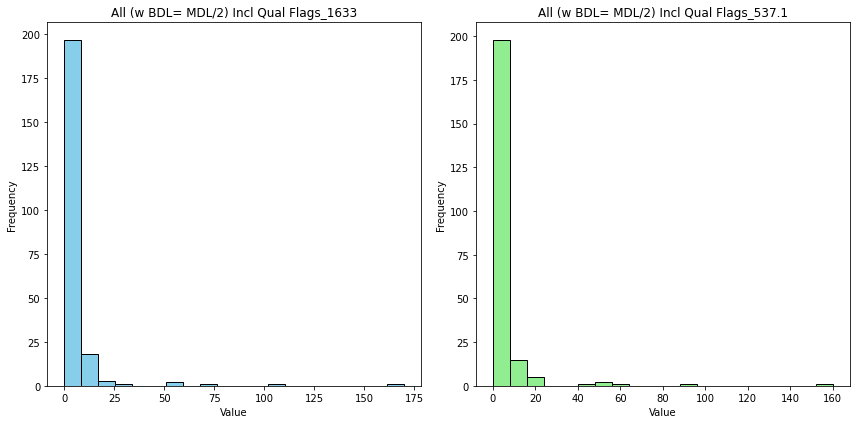

In [51]:
# Set up the matplotlib figure and axes for side-by-side histograms
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Histogram for 'Quant Only Incl Qual Flags_1633'
axes[0].hist(merged_df['All (w BDL= MDL/2) Incl Qual Flags_1633'].dropna(), bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('All (w BDL= MDL/2) Incl Qual Flags_1633')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# Histogram for 'Quant Only Incl Qual Flags_537.1'
# Note: Ensure the column name matches exactly, including spaces and punctuation.
axes[1].hist(merged_df['All (w BDL= MDL/2) Incl Qual Flags_5371'].dropna(), bins=20, color='lightgreen', edgecolor='black')  # Adjust column name if necessary
axes[1].set_title('All (w BDL= MDL/2) Incl Qual Flags_537.1')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()

# Display the histograms
plt.show()


### By PFAS Compound

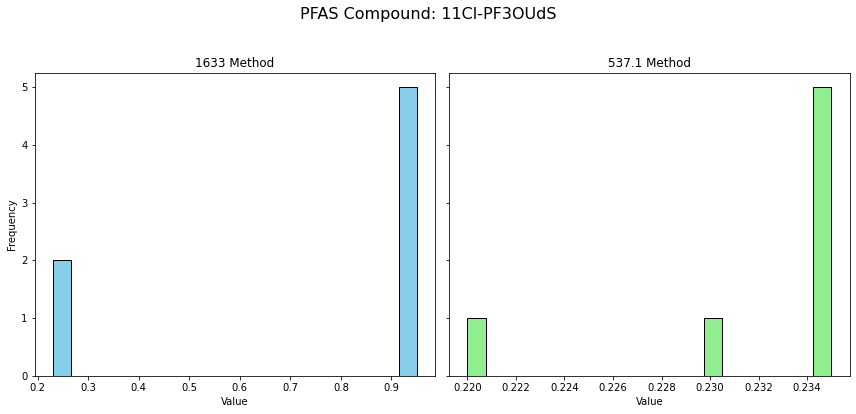

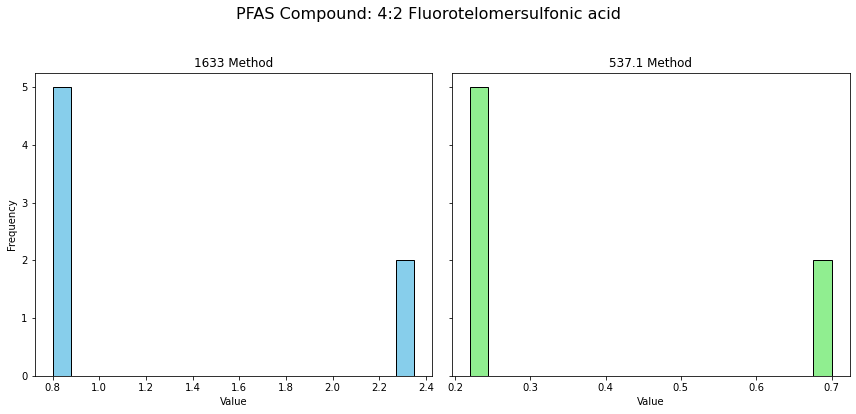

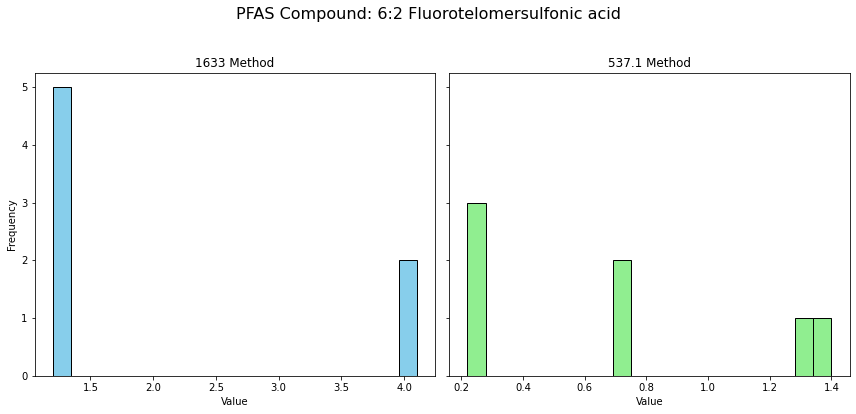

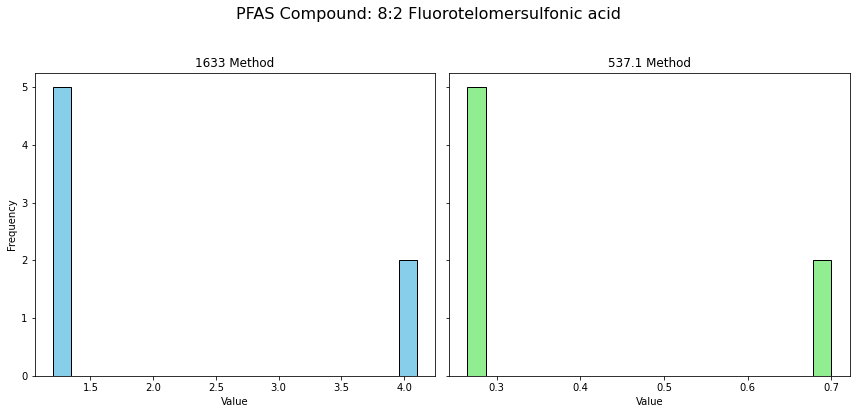

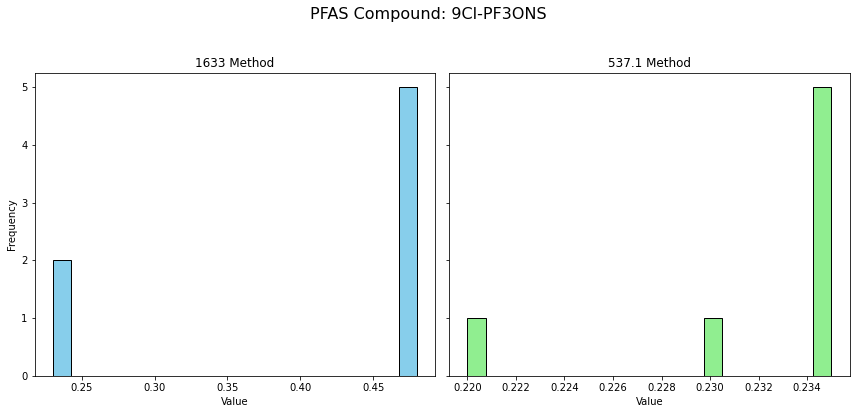

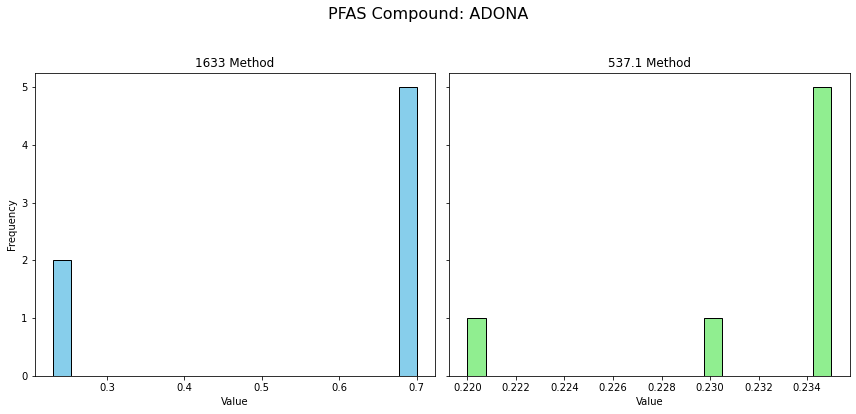

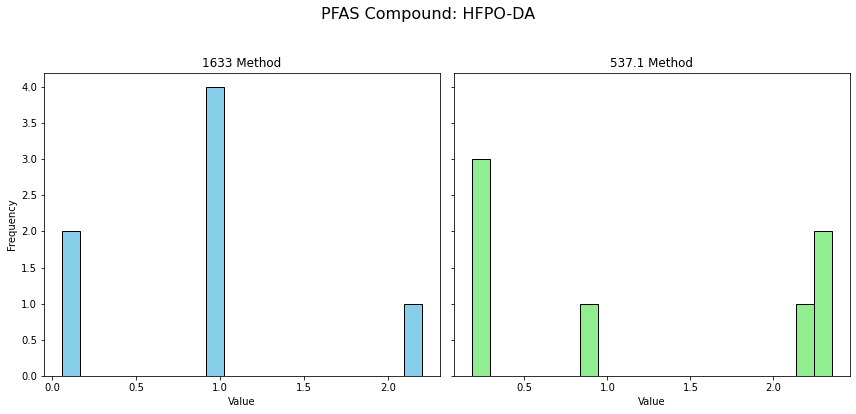

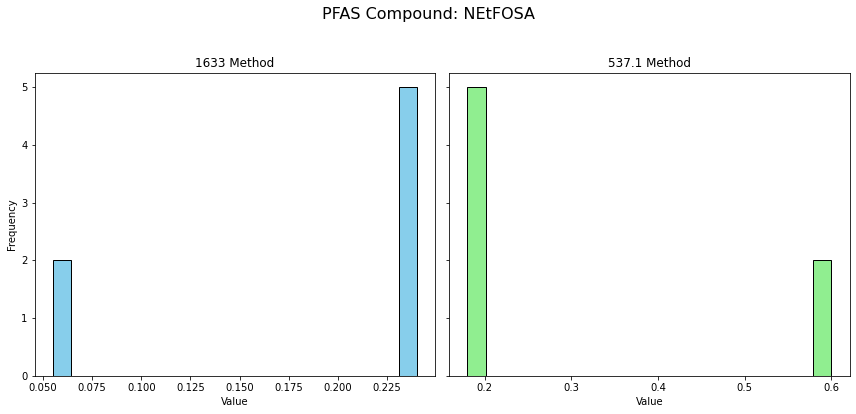

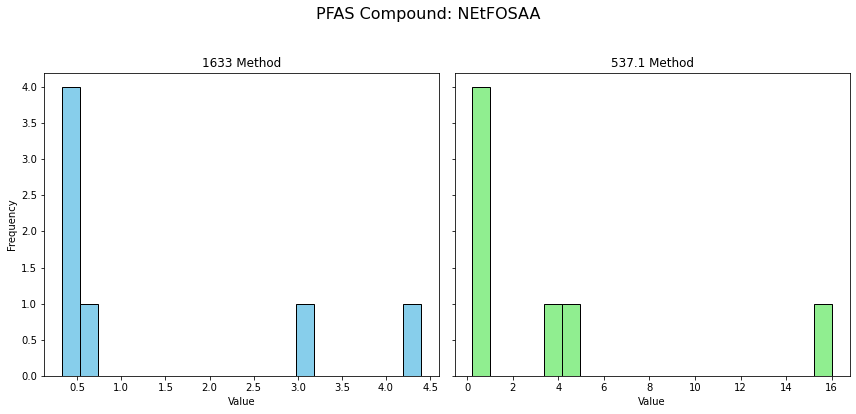

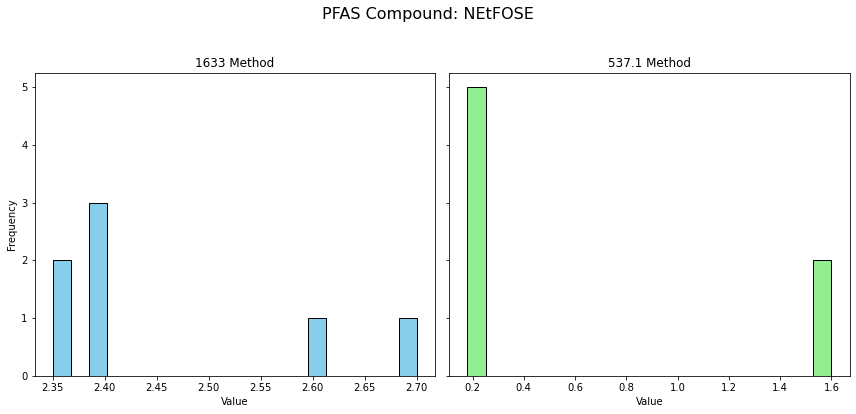

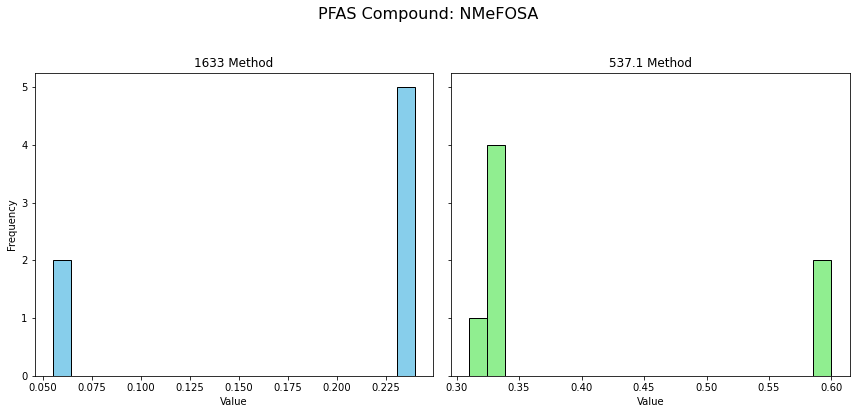

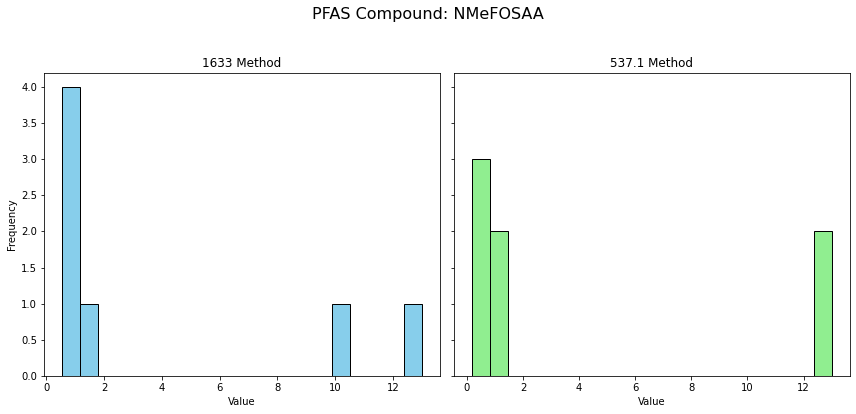

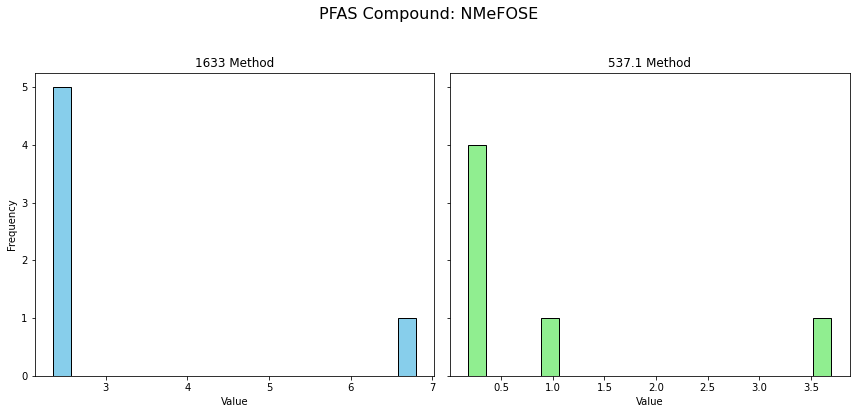

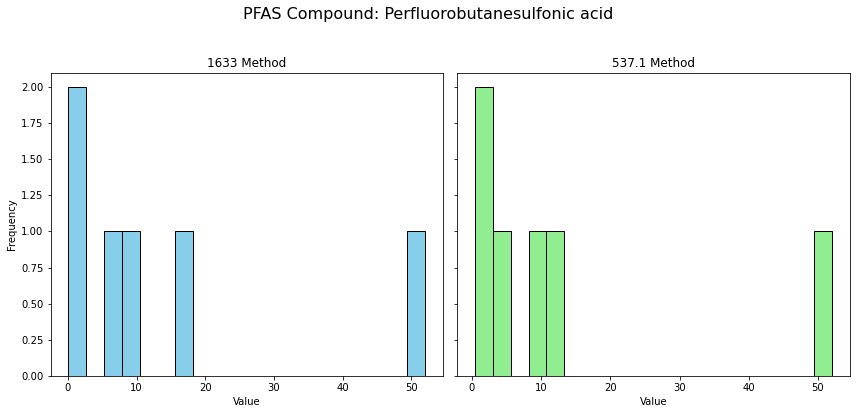

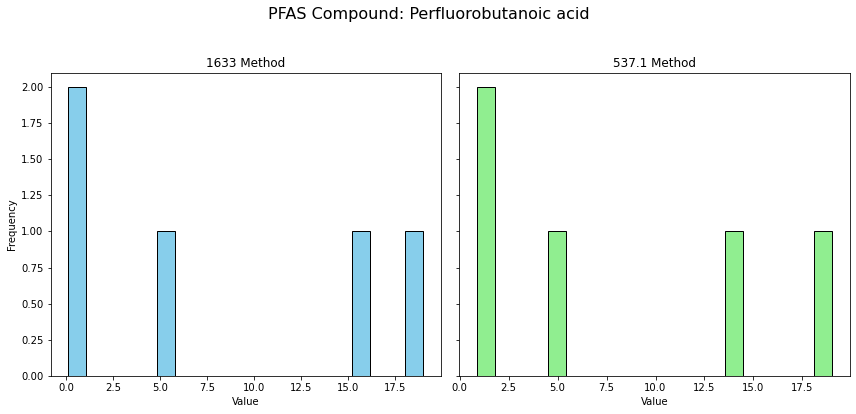

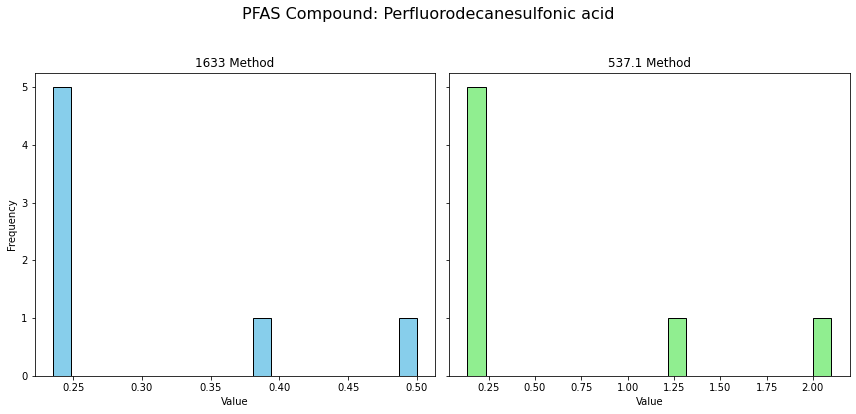

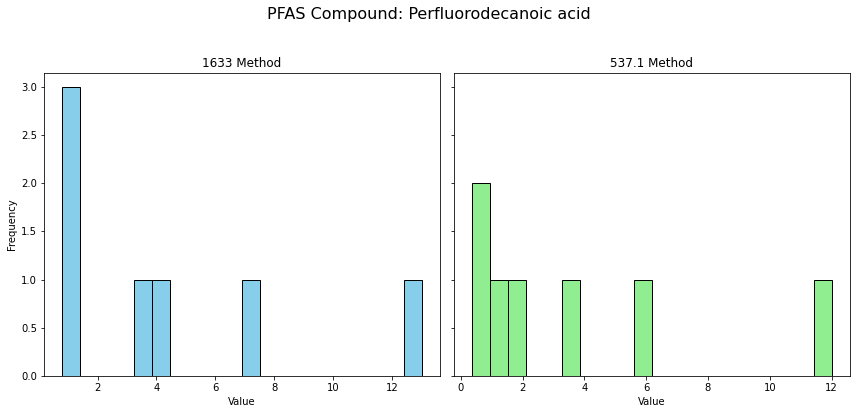

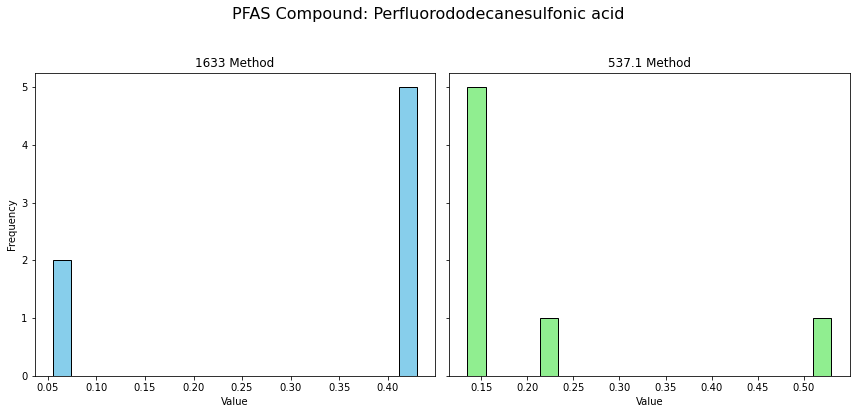

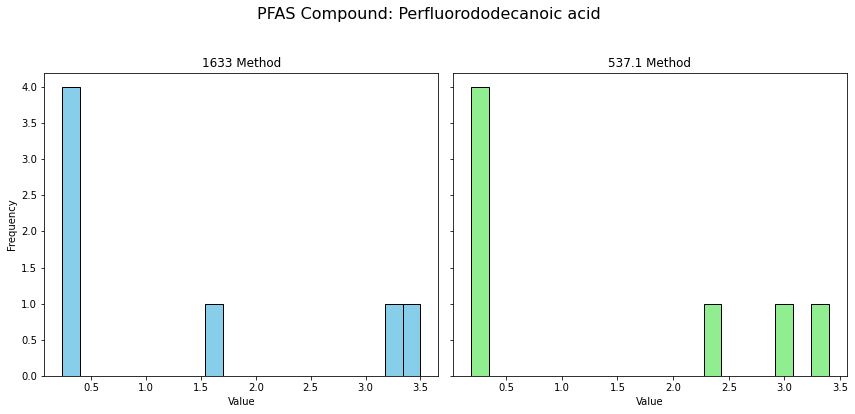

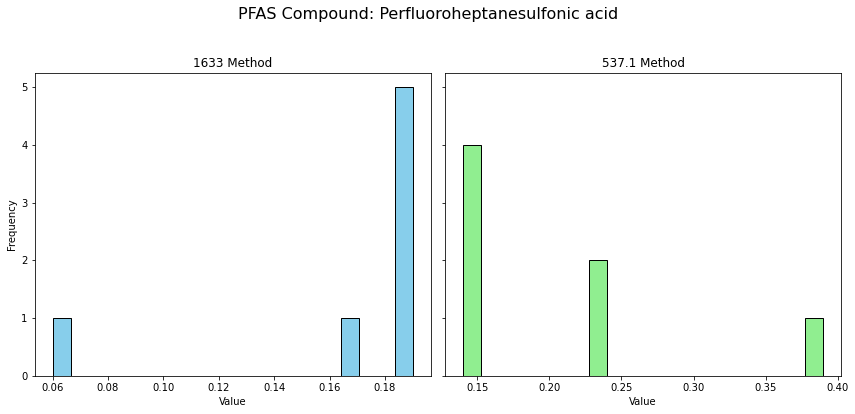

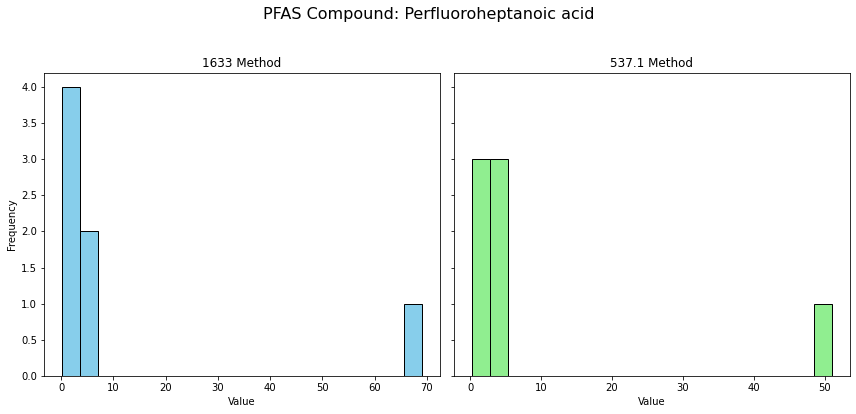

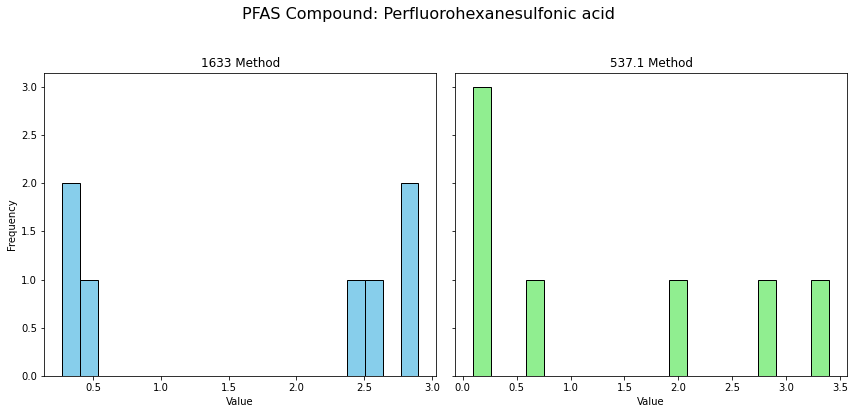

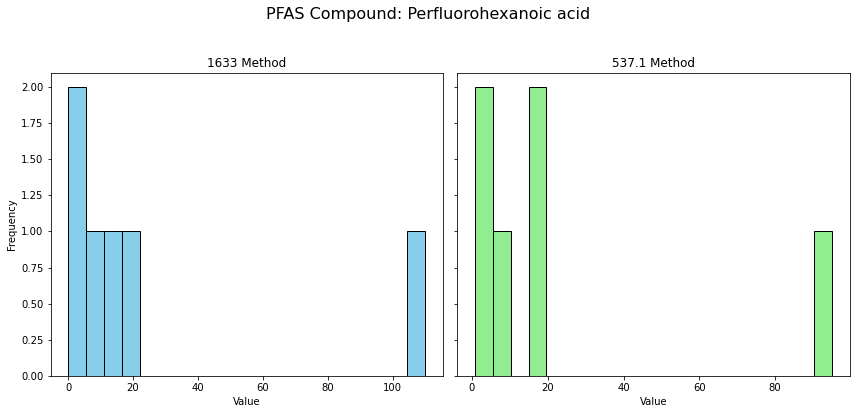

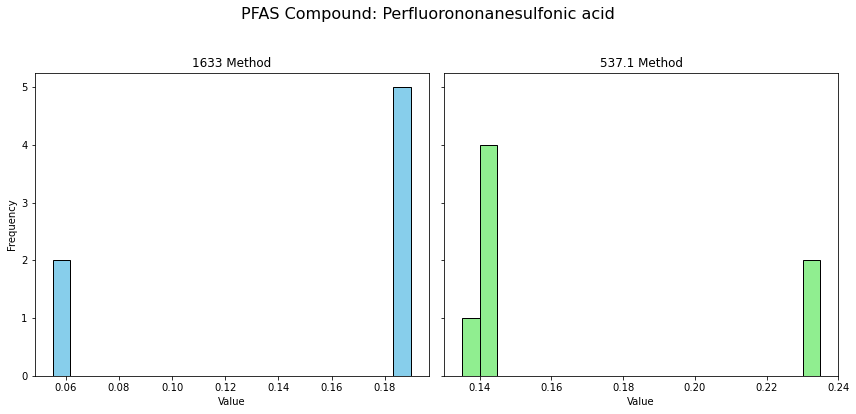

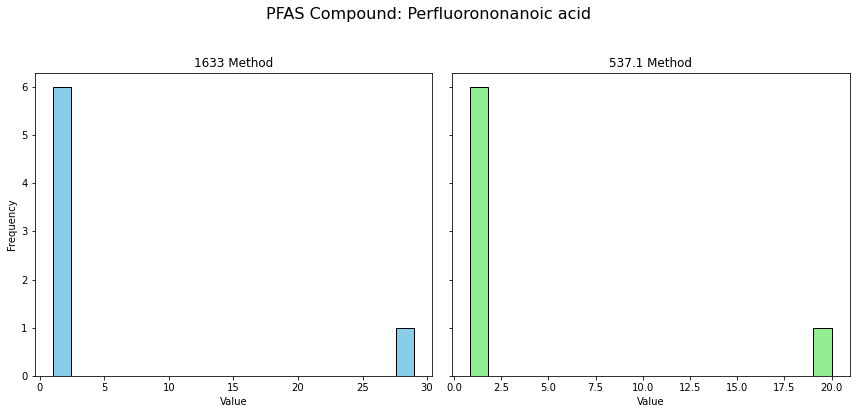

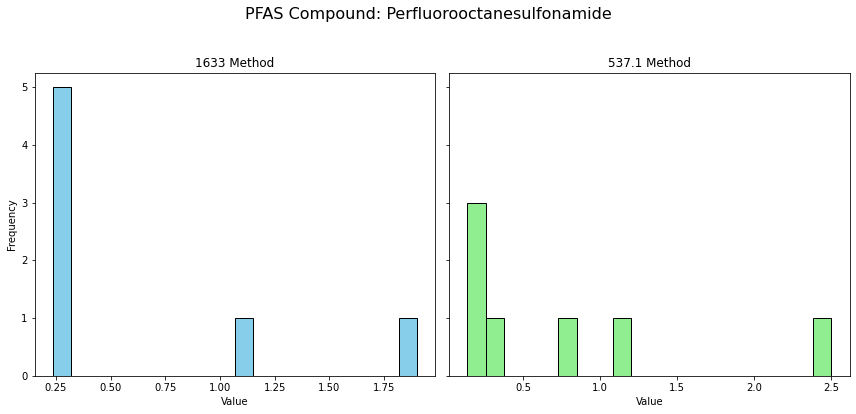

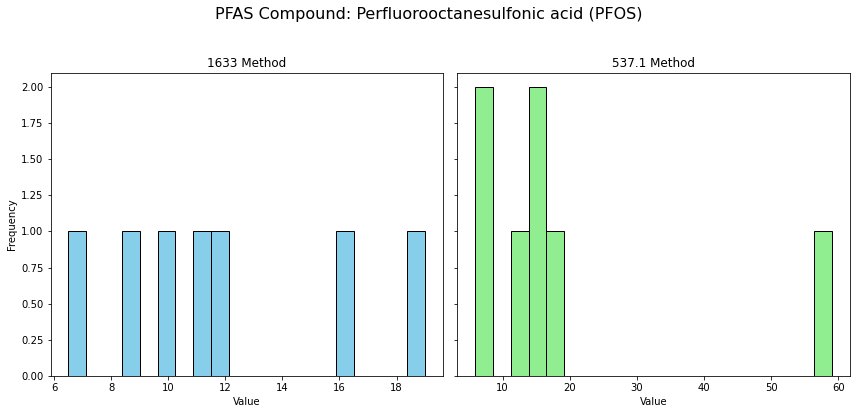

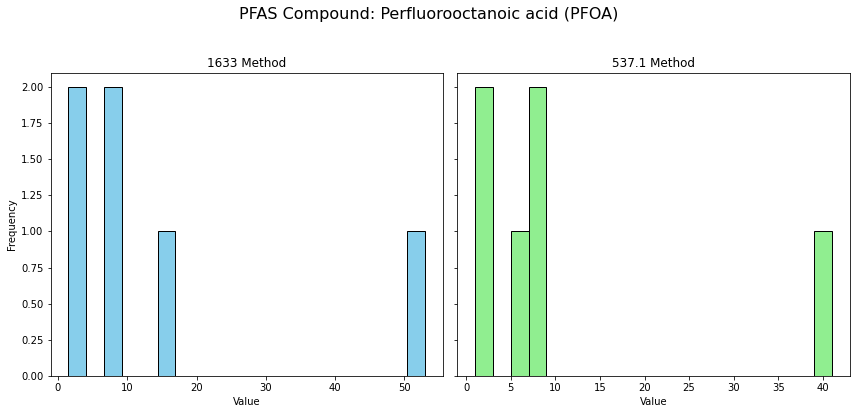

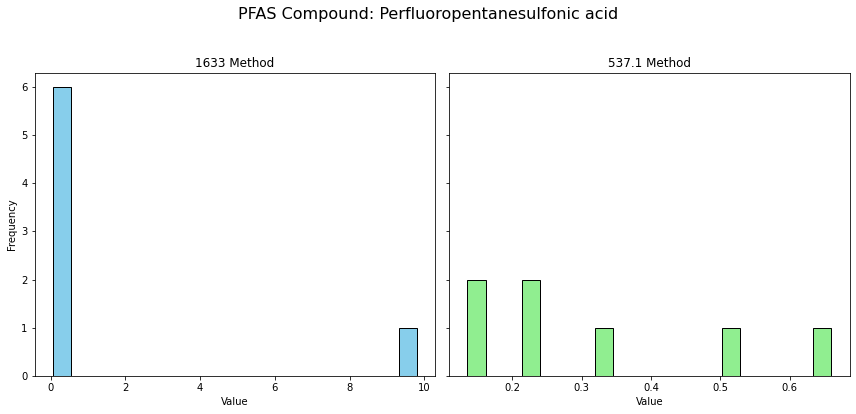

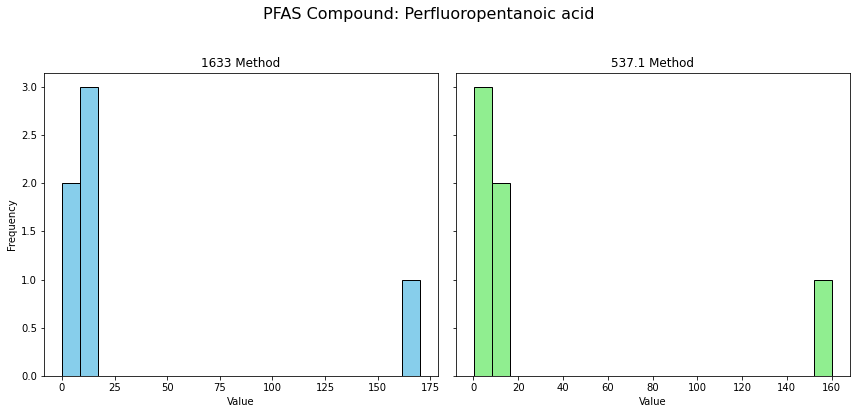

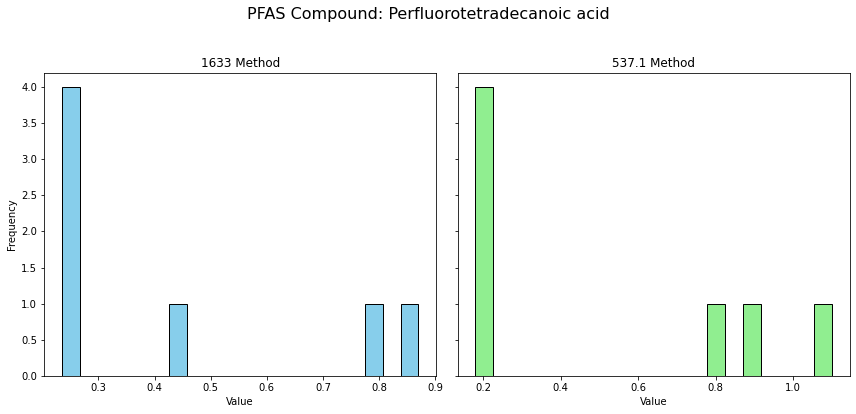

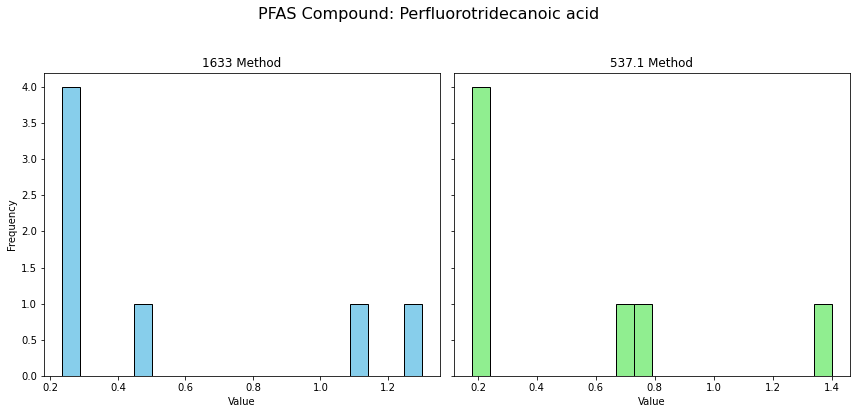

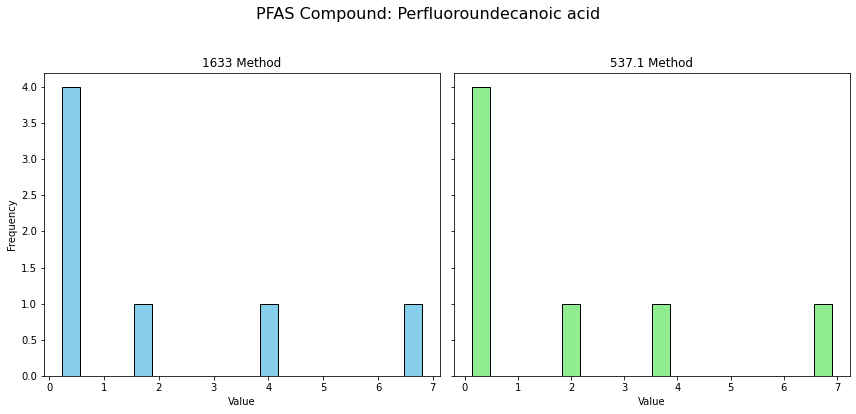

In [52]:
# Group the DataFrame by 'PFAS Compound_1633'
groups = merged_df.groupby('PFAS Compound_1633')

for compound, group in groups:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)
    fig.suptitle(f'PFAS Compound: {compound}', fontsize=16)
    
    # Histogram for 'Quant Only Incl Qual Flags_1633'
    axes[0].hist(group['All (w BDL= MDL/2) Incl Qual Flags_1633'].dropna(), bins=20, color='skyblue', edgecolor='black')
    axes[0].set_title('1633 Method')
    axes[0].set_xlabel('Value')
    axes[0].set_ylabel('Frequency')
    
    # Histogram for 'Quant Only Incl Qual Flags_537.1'
    # Ensure the column name matches exactly, including spaces and punctuation.
    axes[1].hist(group['All (w BDL= MDL/2) Incl Qual Flags_5371'].dropna(), bins=20, color='lightgreen', edgecolor='black')  # Adjust column name if necessary
    axes[1].set_title('537.1 Method')
    axes[1].set_xlabel('Value')
    # The Y-axis label is shared, set by the first histogram
    
    # Adjust layout for better spacing and display the plot
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the rect to make space for the suptitle
    plt.show()


### By PFAS Compound Class

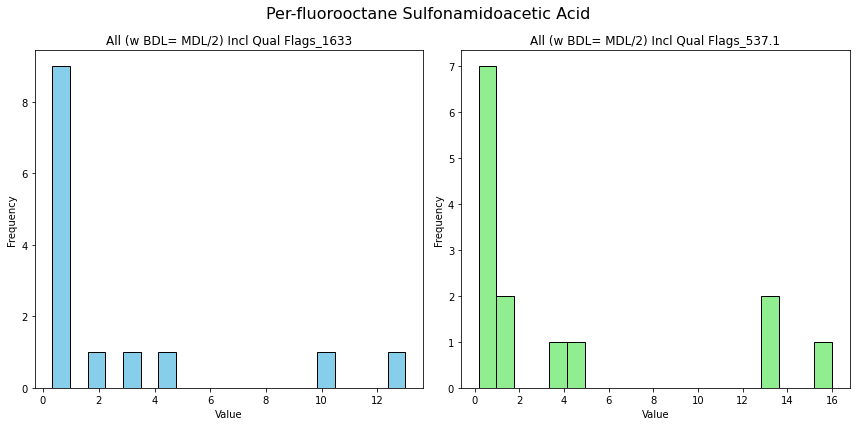

In [53]:
# Filter the DataFrame to include only the specified compounds
filtered_df = merged_df[merged_df['PFAS Compound_1633'].isin(pfas_compounds_PerfluorooctaneSulfonamidoaceticAcid)].dropna(subset=['All (w BDL= MDL/2) Incl Qual Flags_1633', 'All (w BDL= MDL/2) Incl Qual Flags_5371'])
# Set up the matplotlib figure and axes for side-by-side histograms
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.suptitle('Per-fluorooctane Sulfonamidoacetic Acid', fontsize=16)

# Histogram for 'Quant Only Incl Qual Flags_1633'
axes[0].hist(filtered_df['All (w BDL= MDL/2) Incl Qual Flags_1633'].dropna(), bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('All (w BDL= MDL/2) Incl Qual Flags_1633')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# Histogram for 'Quant Only Incl Qual Flags_537.1'
# Note: Ensure the column name matches exactly, including spaces and punctuation.
axes[1].hist(filtered_df['All (w BDL= MDL/2) Incl Qual Flags_5371'].dropna(), bins=20, color='lightgreen', edgecolor='black')  # Adjust column name if necessary
axes[1].set_title('All (w BDL= MDL/2) Incl Qual Flags_537.1')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()

# Display the histograms
plt.show()

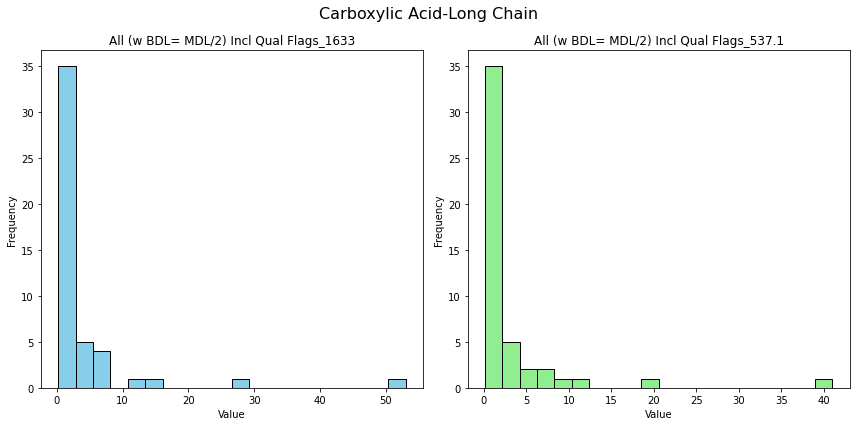

In [54]:
# Filter the DataFrame to include only the specified compounds
filtered_df = merged_df[merged_df['PFAS Compound_1633'].isin(pfas_compounds_CarboxylicAcid_Long)].dropna(subset=['All (w BDL= MDL/2) Incl Qual Flags_1633', 'All (w BDL= MDL/2) Incl Qual Flags_5371'])
# Set up the matplotlib figure and axes for side-by-side histograms
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.suptitle('Carboxylic Acid-Long Chain', fontsize=16)

# Histogram for 'Quant Only Incl Qual Flags_1633'
axes[0].hist(filtered_df['All (w BDL= MDL/2) Incl Qual Flags_1633'].dropna(), bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('All (w BDL= MDL/2) Incl Qual Flags_1633')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# Histogram for 'Quant Only Incl Qual Flags_537.1'
# Note: Ensure the column name matches exactly, including spaces and punctuation.
axes[1].hist(filtered_df['All (w BDL= MDL/2) Incl Qual Flags_5371'].dropna(), bins=20, color='lightgreen', edgecolor='black')  # Adjust column name if necessary
axes[1].set_title('All (w BDL= MDL/2) Incl Qual Flags_537.1')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()

# Display the histograms
plt.show()

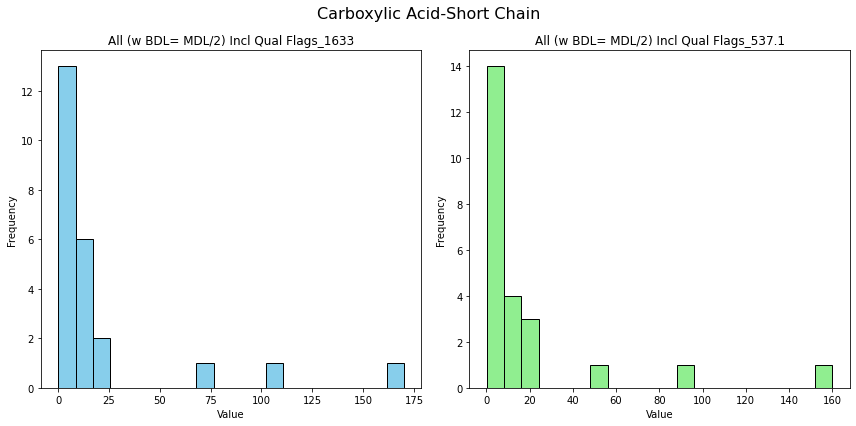

In [55]:
# Filter the DataFrame to include only the specified compounds
filtered_df = merged_df[merged_df['PFAS Compound_1633'].isin(pfas_compounds_CarboxylicAcid_Short)].dropna(subset=['All (w BDL= MDL/2) Incl Qual Flags_1633', 'All (w BDL= MDL/2) Incl Qual Flags_5371'])
# Set up the matplotlib figure and axes for side-by-side histograms
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.suptitle('Carboxylic Acid-Short Chain', fontsize=16)

# Histogram for 'Quant Only Incl Qual Flags_1633'
axes[0].hist(filtered_df['All (w BDL= MDL/2) Incl Qual Flags_1633'].dropna(), bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('All (w BDL= MDL/2) Incl Qual Flags_1633')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# Histogram for 'Quant Only Incl Qual Flags_537.1'
# Note: Ensure the column name matches exactly, including spaces and punctuation.
axes[1].hist(filtered_df['All (w BDL= MDL/2) Incl Qual Flags_5371'].dropna(), bins=20, color='lightgreen', edgecolor='black')  # Adjust column name if necessary
axes[1].set_title('All (w BDL= MDL/2) Incl Qual Flags_537.1')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()

# Display the histograms
plt.show()

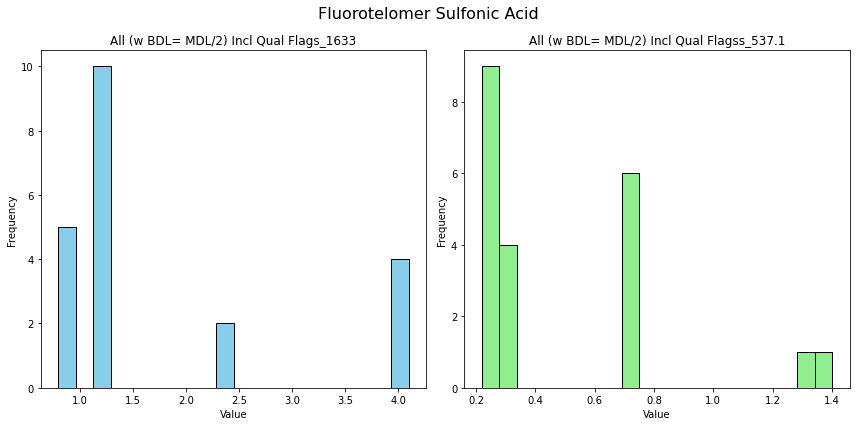

In [56]:
# Filter the DataFrame to include only the specified compounds
filtered_df = merged_df[merged_df['PFAS Compound_1633'].isin(pfas_compounds_FluorotelomerSulfonicAcid)].dropna(subset=['All (w BDL= MDL/2) Incl Qual Flags_1633', 'All (w BDL= MDL/2) Incl Qual Flags_5371'])
# Set up the matplotlib figure and axes for side-by-side histograms
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.suptitle('Fluorotelomer Sulfonic Acid', fontsize=16)

# Histogram for 'Quant Only Incl Qual Flags_1633'
axes[0].hist(filtered_df['All (w BDL= MDL/2) Incl Qual Flags_1633'].dropna(), bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('All (w BDL= MDL/2) Incl Qual Flags_1633')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# Histogram for 'Quant Only Incl Qual Flags_537.1'
# Note: Ensure the column name matches exactly, including spaces and punctuation.
axes[1].hist(filtered_df['All (w BDL= MDL/2) Incl Qual Flags_5371'].dropna(), bins=20, color='lightgreen', edgecolor='black')  # Adjust column name if necessary
axes[1].set_title('All (w BDL= MDL/2) Incl Qual Flagss_537.1')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()

# Display the histograms
plt.show()

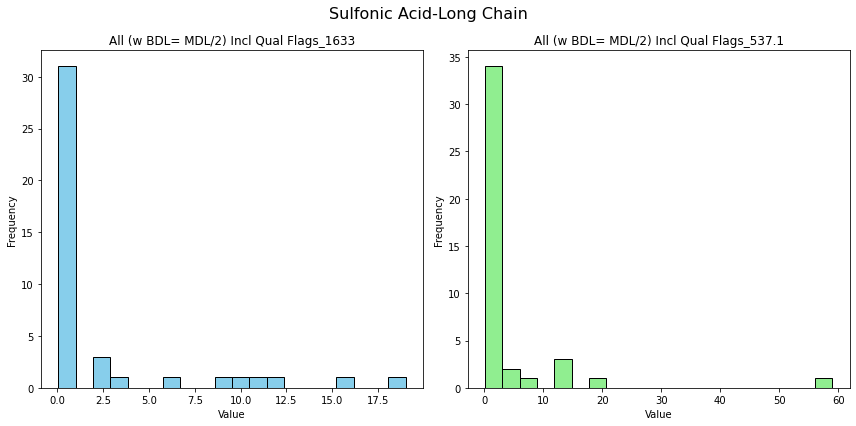

In [57]:
# Filter the DataFrame to include only the specified compounds
filtered_df = merged_df[merged_df['PFAS Compound_1633'].isin(pfas_compounds_SulfonicAcid_Long)].dropna(subset=['All (w BDL= MDL/2) Incl Qual Flags_1633', 'All (w BDL= MDL/2) Incl Qual Flags_5371'])
# Set up the matplotlib figure and axes for side-by-side histograms
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.suptitle('Sulfonic Acid-Long Chain', fontsize=16)

# Histogram for 'Quant Only Incl Qual Flags_1633'
axes[0].hist(filtered_df['All (w BDL= MDL/2) Incl Qual Flags_1633'].dropna(), bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('All (w BDL= MDL/2) Incl Qual Flags_1633')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# Histogram for 'Quant Only Incl Qual Flags_537.1'
# Note: Ensure the column name matches exactly, including spaces and punctuation.
axes[1].hist(filtered_df['All (w BDL= MDL/2) Incl Qual Flags_5371'].dropna(), bins=20, color='lightgreen', edgecolor='black')  # Adjust column name if necessary
axes[1].set_title('All (w BDL= MDL/2) Incl Qual Flags_537.1')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()

# Display the histograms
plt.show()

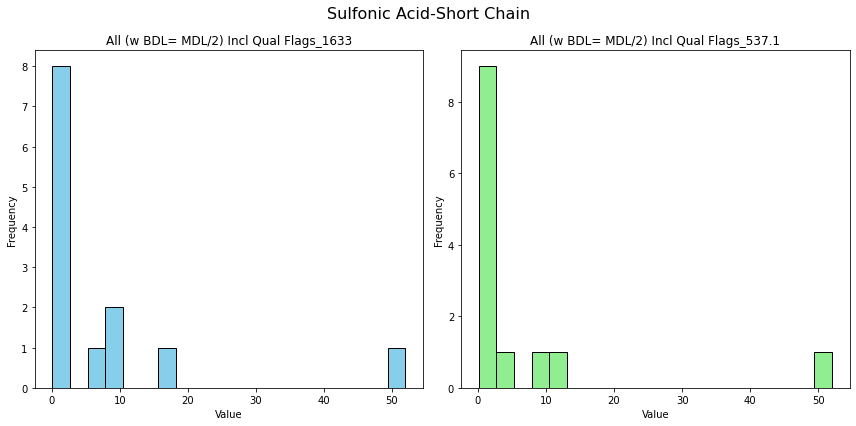

In [58]:
# Filter the DataFrame to include only the specified compounds
filtered_df = merged_df[merged_df['PFAS Compound_1633'].isin(pfas_compounds_SulfonicAcid_Short)].dropna(subset=['All (w BDL= MDL/2) Incl Qual Flags_1633', 'All (w BDL= MDL/2) Incl Qual Flags_5371'])
# Set up the matplotlib figure and axes for side-by-side histograms
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.suptitle('Sulfonic Acid-Short Chain', fontsize=16)

# Histogram for 'Quant Only Incl Qual Flags_1633'
axes[0].hist(filtered_df['All (w BDL= MDL/2) Incl Qual Flags_1633'].dropna(), bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('All (w BDL= MDL/2) Incl Qual Flags_1633')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# Histogram for 'Quant Only Incl Qual Flags_537.1'
# Note: Ensure the column name matches exactly, including spaces and punctuation.
axes[1].hist(filtered_df['All (w BDL= MDL/2) Incl Qual Flags_5371'].dropna(), bins=20, color='lightgreen', edgecolor='black')  # Adjust column name if necessary
axes[1].set_title('All (w BDL= MDL/2) Incl Qual Flags_537.1')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()

# Display the histograms
plt.show()

### By Type

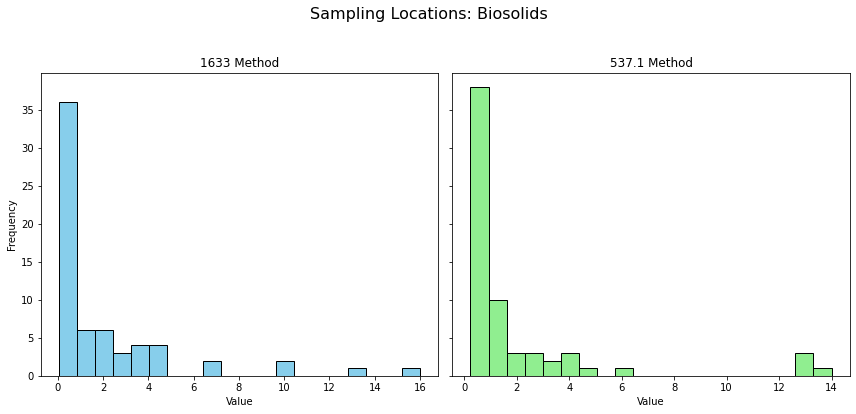

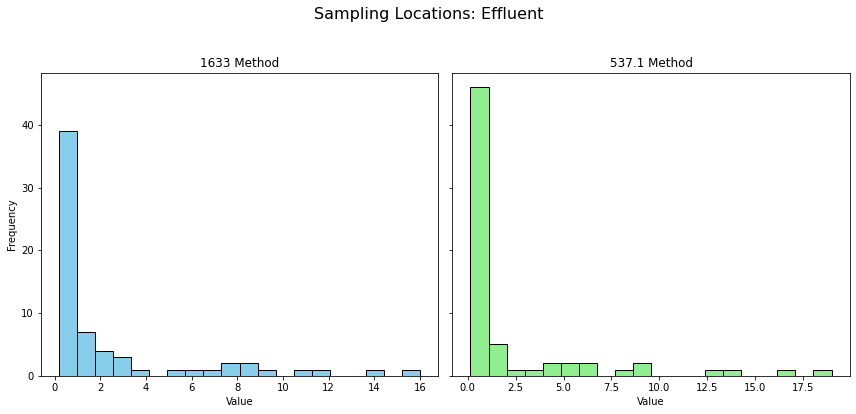

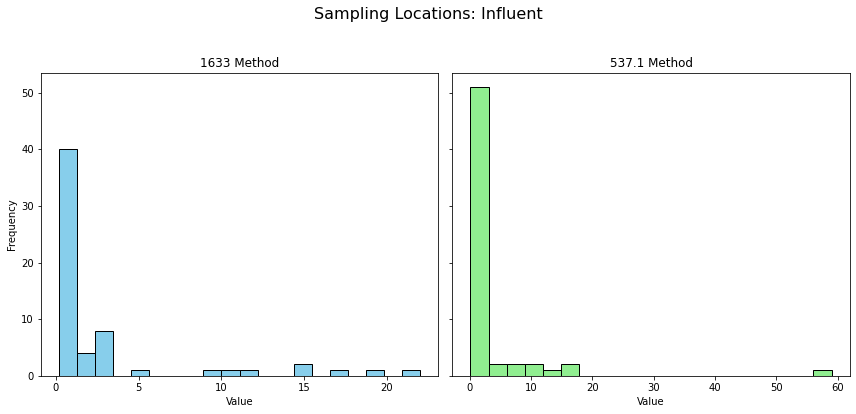

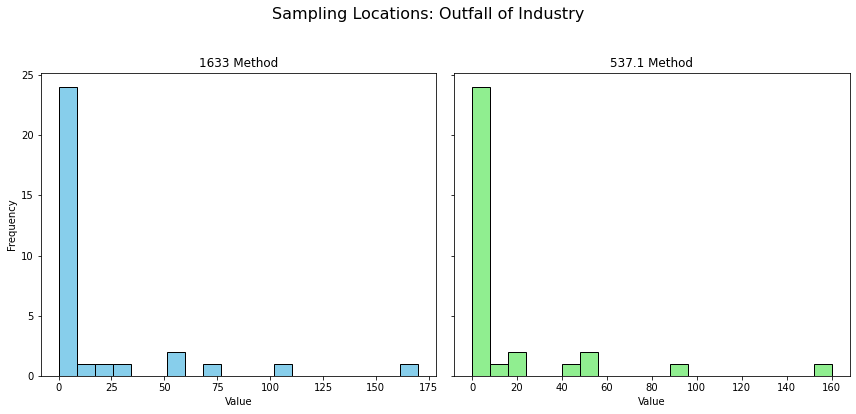

In [26]:
# Group the DataFrame by 'PFAS Compound_1633'
groups = merged_df.groupby('Type_1633')

for Type, group in groups:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)
    fig.suptitle(f'Sampling Locations: {Type}', fontsize=16)
    
    # Histogram for 'Quant Only Incl Qual Flags_1633'
    axes[0].hist(group['All (w BDL= MDL/2) Incl Qual Flags_1633'].dropna(), bins=20, color='skyblue', edgecolor='black')
    axes[0].set_title('1633 Method')
    axes[0].set_xlabel('Value')
    axes[0].set_ylabel('Frequency')
    
    # Histogram for 'Quant Only Incl Qual Flags_537.1'
    # Ensure the column name matches exactly, including spaces and punctuation.
    axes[1].hist(group['All (w BDL= MDL/2) Incl Qual Flags_5371'].dropna(), bins=20, color='lightgreen', edgecolor='black')  # Adjust column name if necessary
    axes[1].set_title('537.1 Method')
    axes[1].set_xlabel('Value')
    # The Y-axis label is shared, set by the first histogram
    
    # Adjust layout for better spacing and display the plot
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the rect to make space for the suptitle
    plt.show()

## Histogram for Differences

### All quant

In [27]:
# Calculate the percent difference
merged_df['Percent_Diff_1633-5371'] = ((merged_df['All (w BDL= MDL/2) Incl Qual Flags_1633'] - merged_df['All (w BDL= MDL/2) Incl Qual Flags_5371']) / ((merged_df['All (w BDL= MDL/2) Incl Qual Flags_5371']) / 2)) * 100


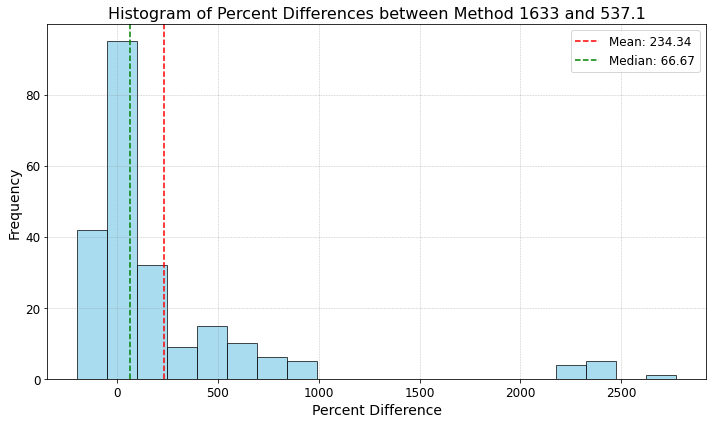

In [28]:
# Step 1: Create the histogram for percent differences
plt.figure(figsize=(10, 6))  # Set the figure size (width, height) in inches
n, bins, patches = plt.hist(merged_df['Percent_Diff_1633-5371'].dropna(), bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Step 2: Format the plot
plt.title('Histogram of Percent Differences between Method 1633 and 537.1', fontsize=16)  # Title of the histogram
plt.xlabel('Percent Difference', fontsize=14)  # X-axis label
plt.ylabel('Frequency', fontsize=14)  # Y-axis label

# Optional: Adding a grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)

# Optional: Customizing ticks
plt.xticks(fontsize=12)  # Font size for X-axis ticks
plt.yticks(fontsize=12)  # Font size for Y-axis ticks

# Optional: Adding vertical lines for mean and median of percent differences
mean_val = np.mean(merged_df['Percent_Diff_1633-5371'])
median_val = np.median(merged_df['Percent_Diff_1633-5371'])
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1.5, label=f'Median: {median_val:.2f}')

# Optional: Adding a legend
plt.legend(loc='upper right', fontsize=12)

# Step 3: Show the plot
plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()


### By PFAS Compound

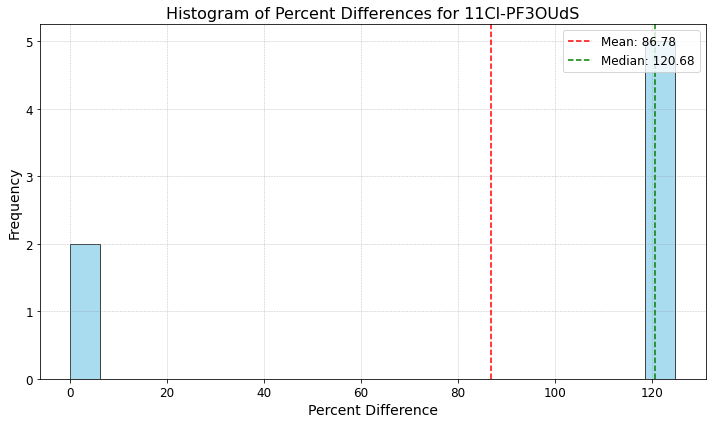

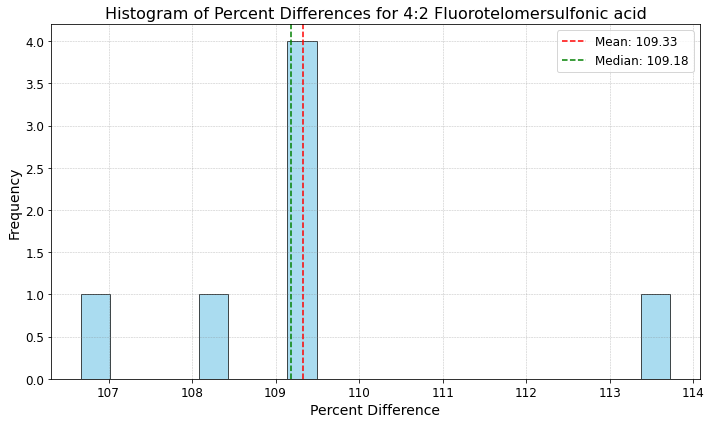

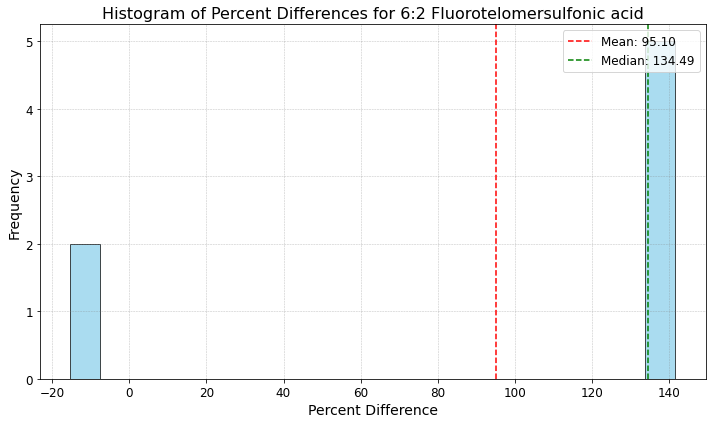

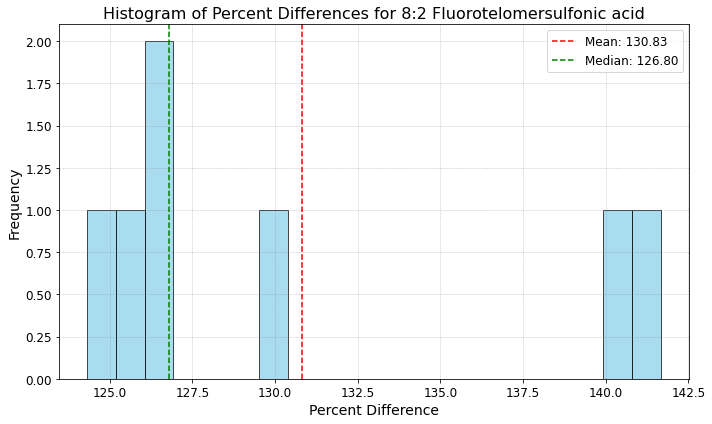

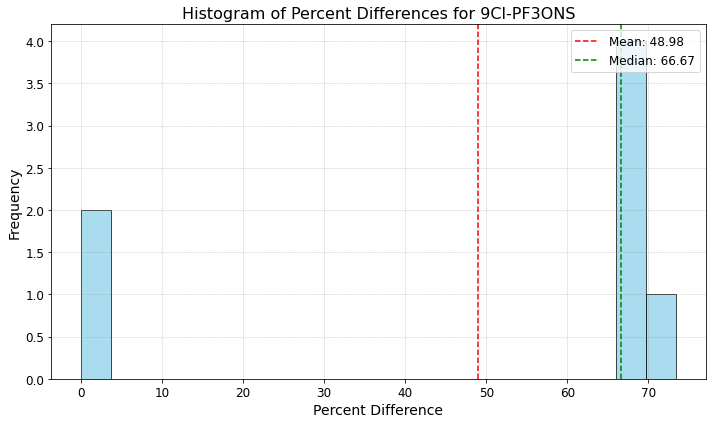

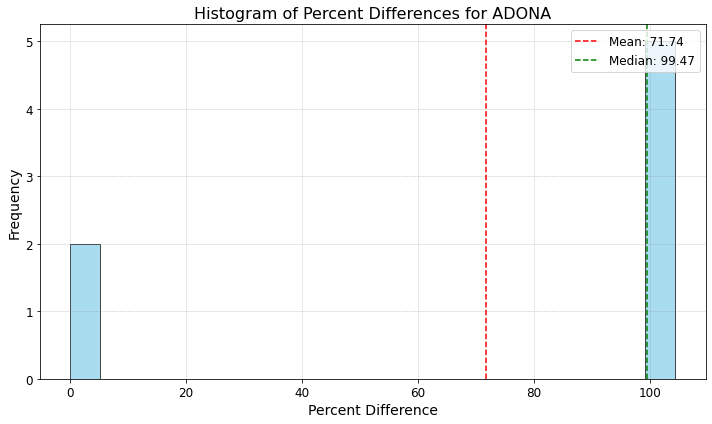

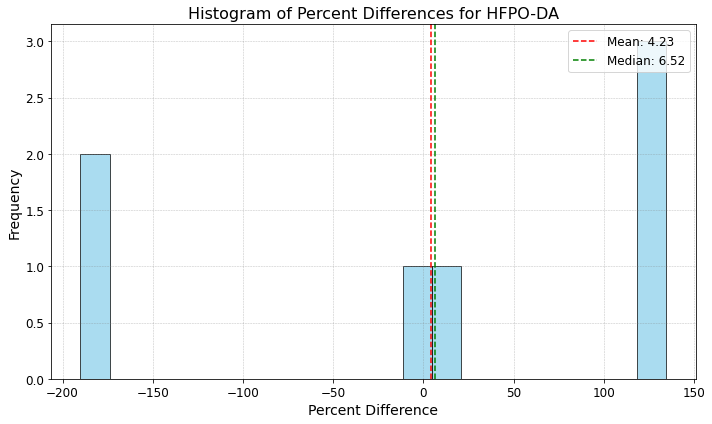

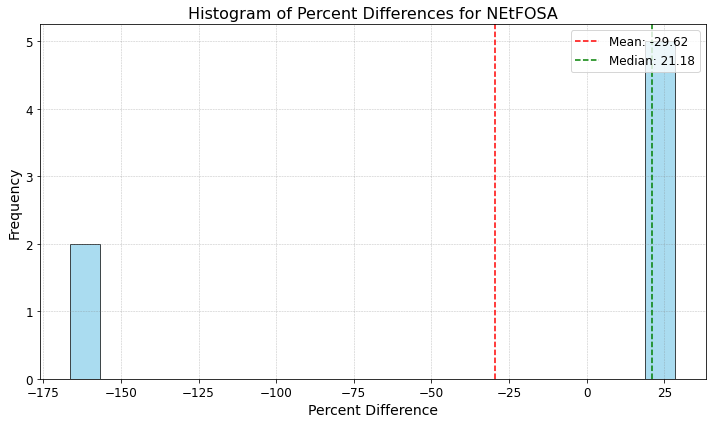

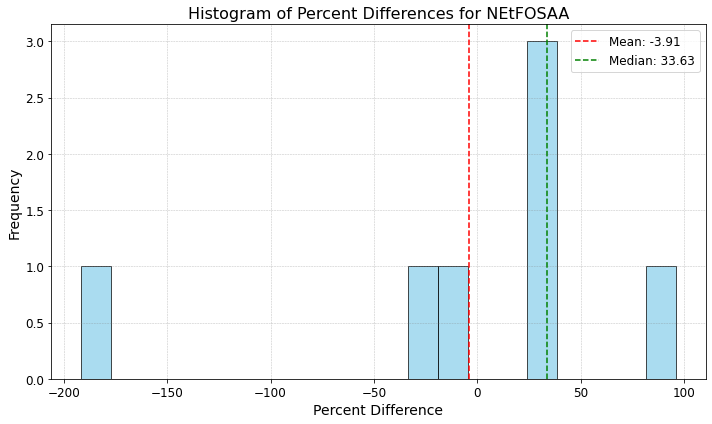

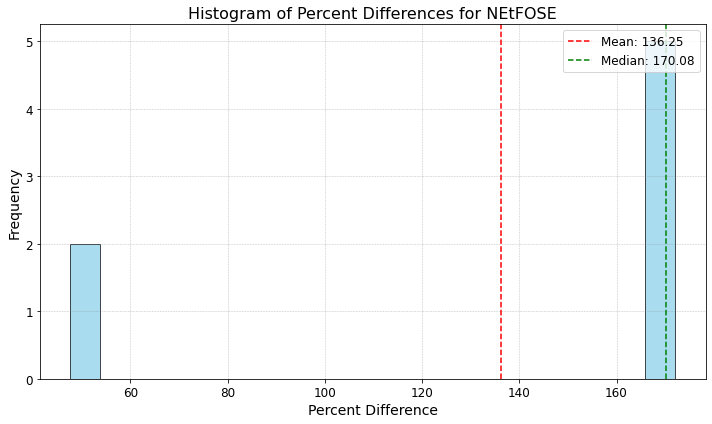

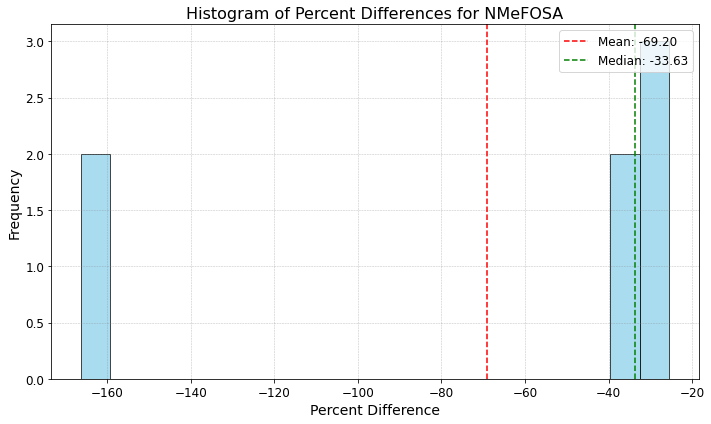

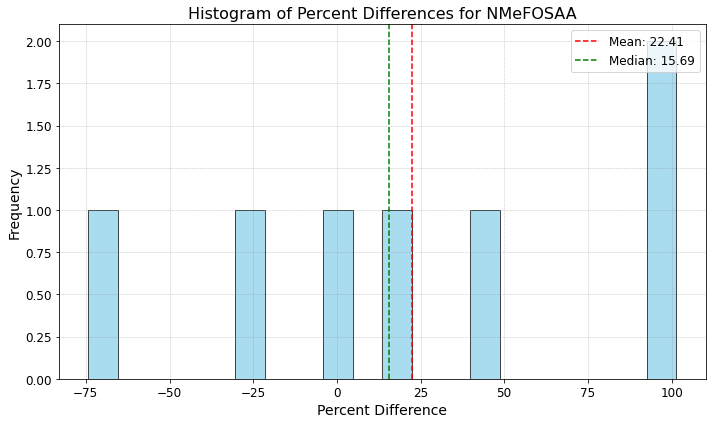

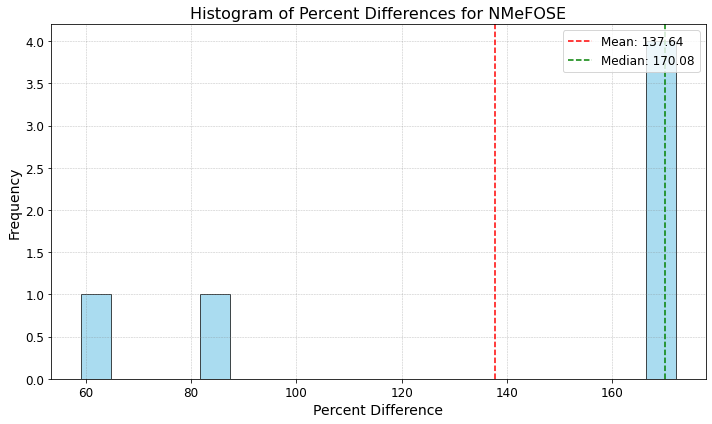

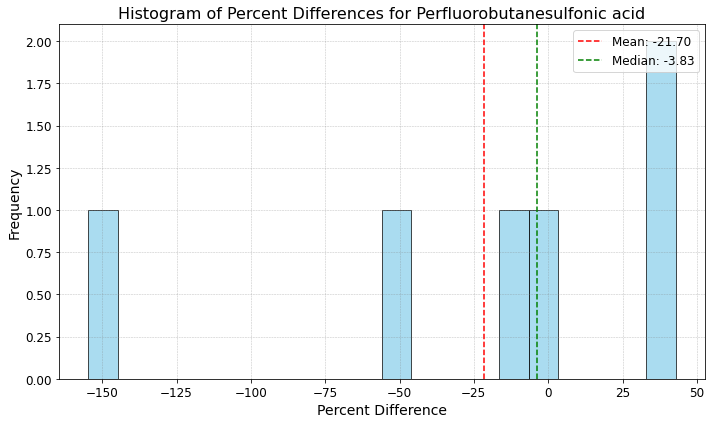

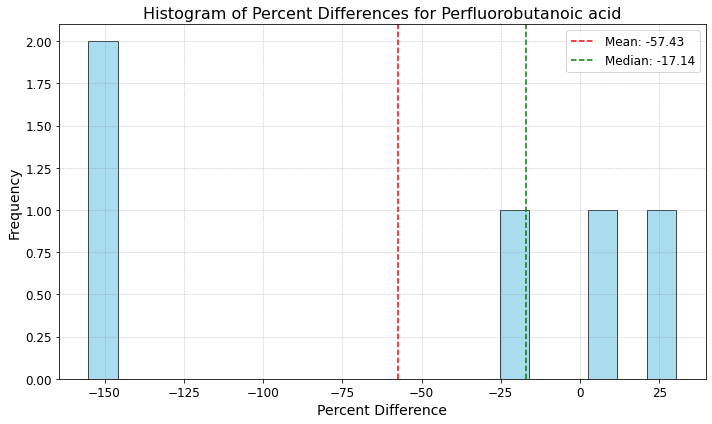

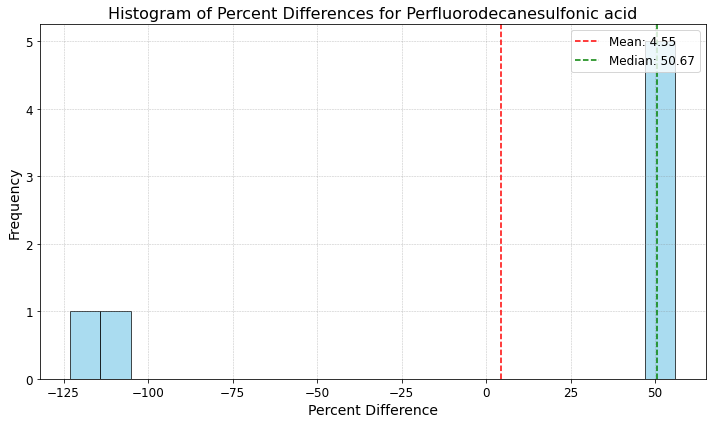

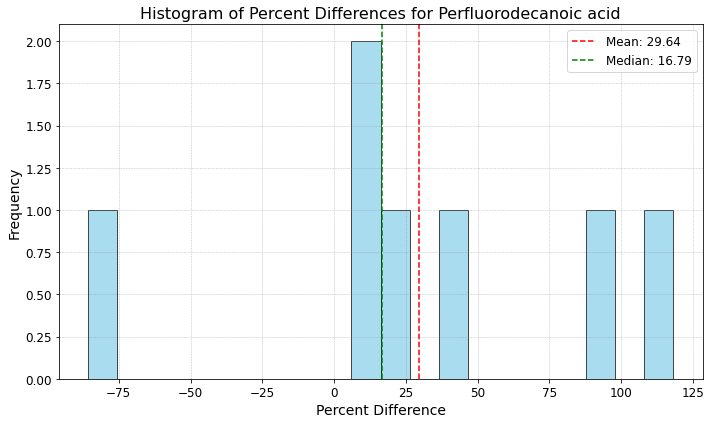

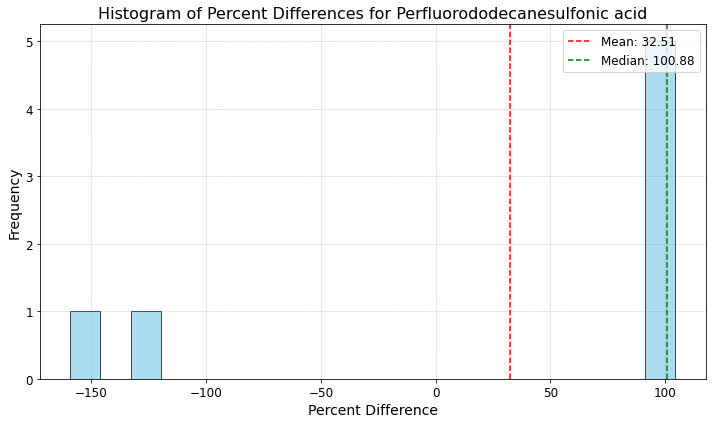

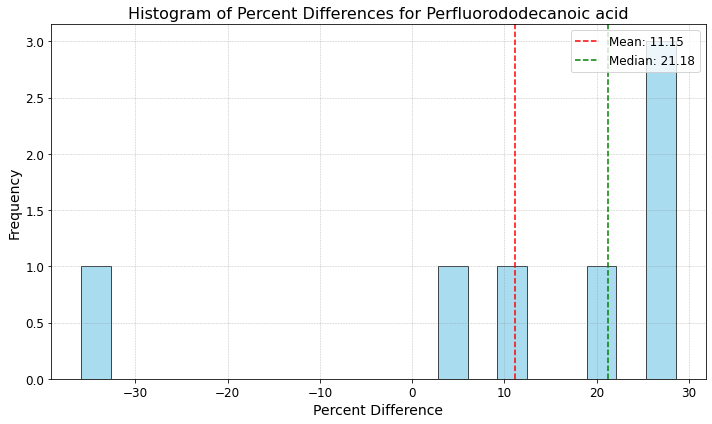

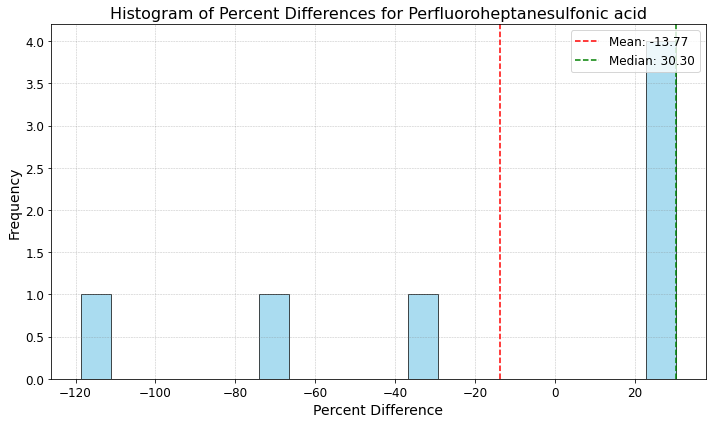

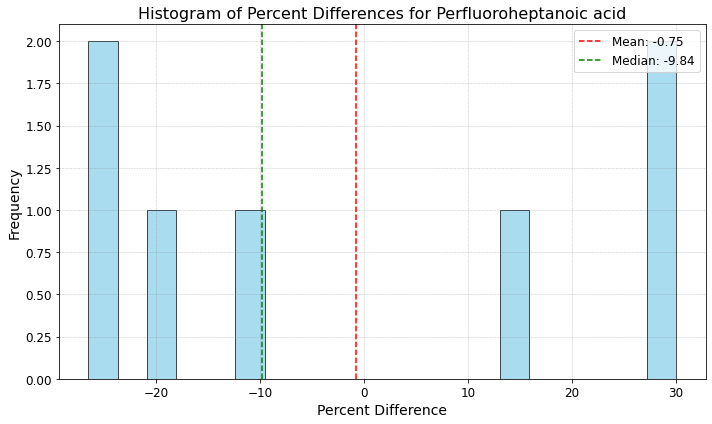

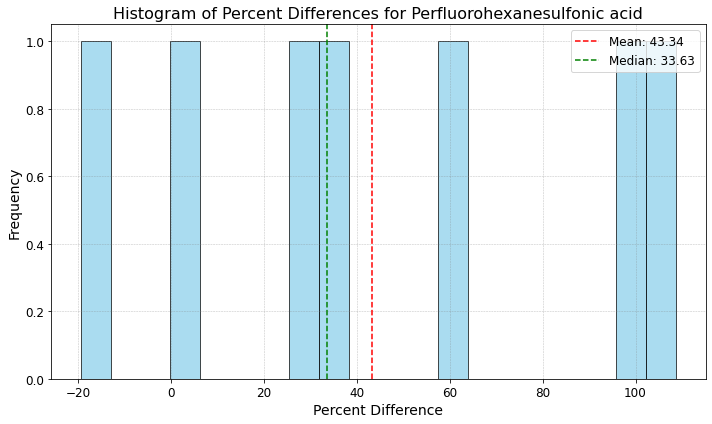

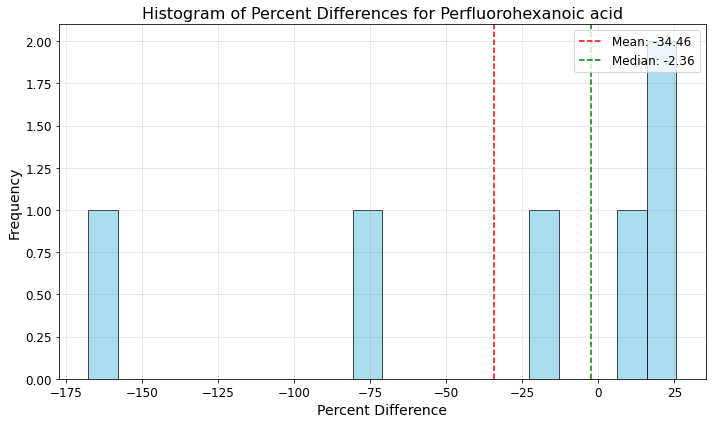

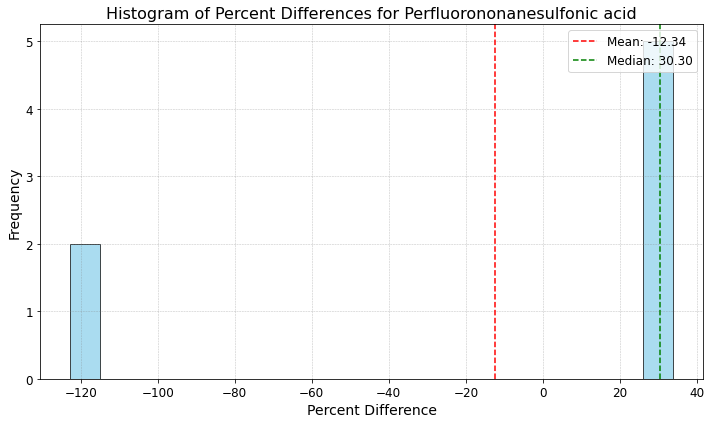

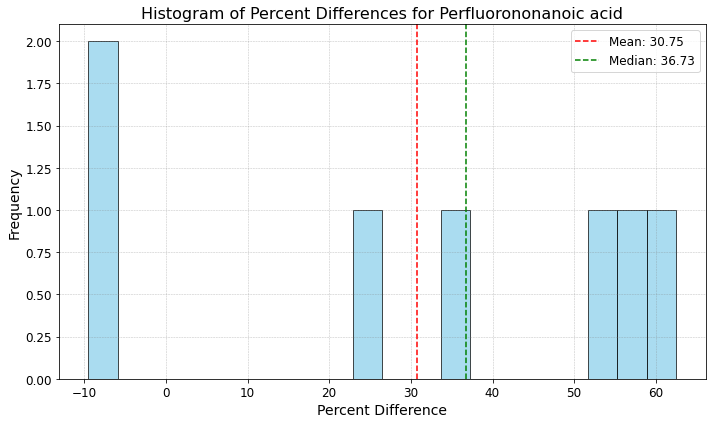

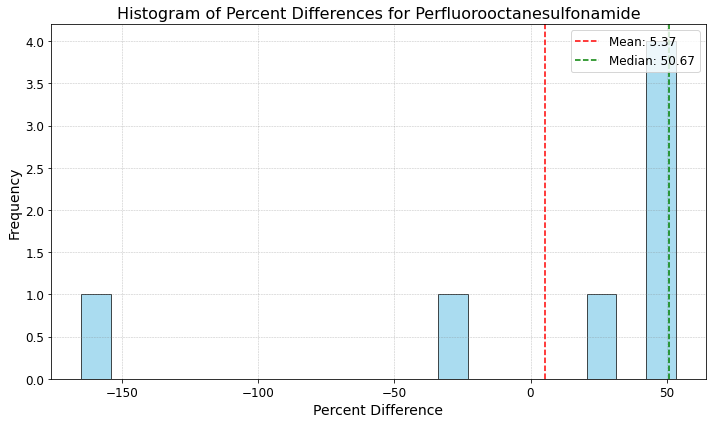

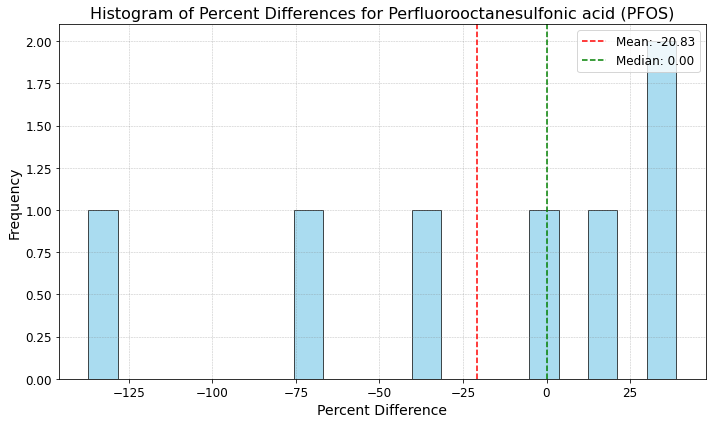

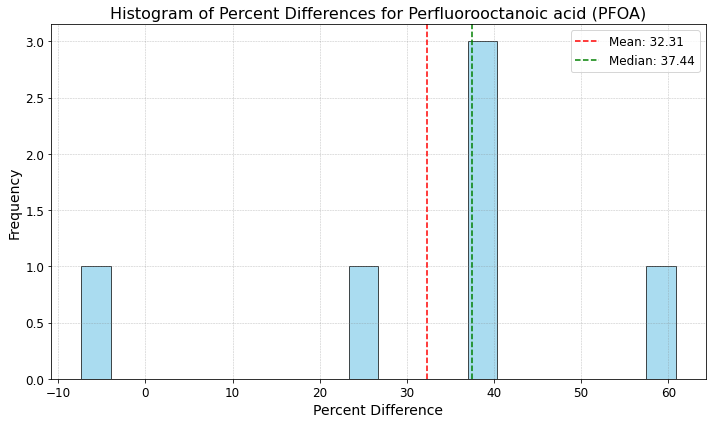

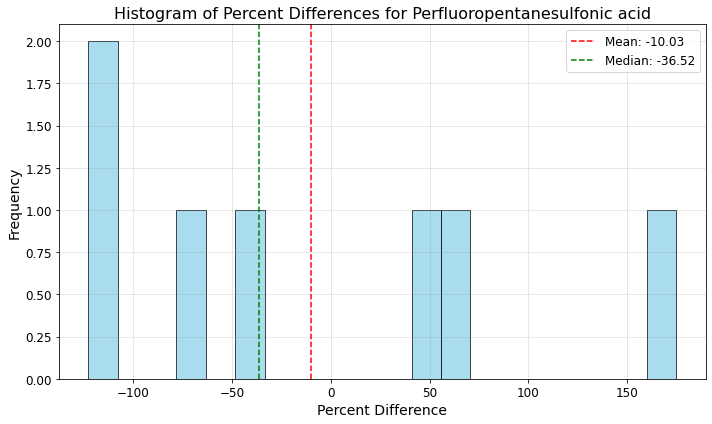

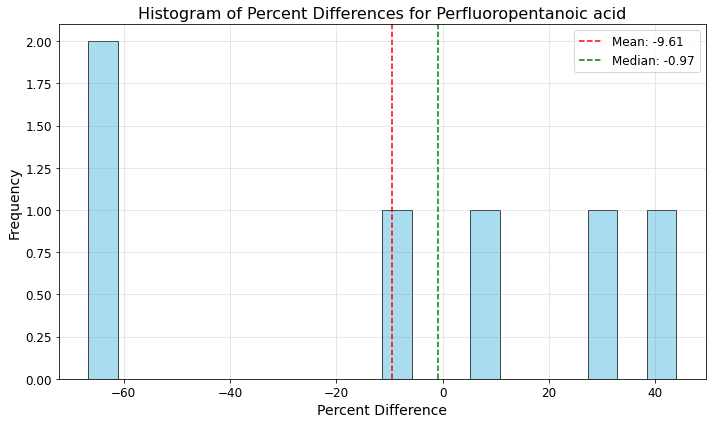

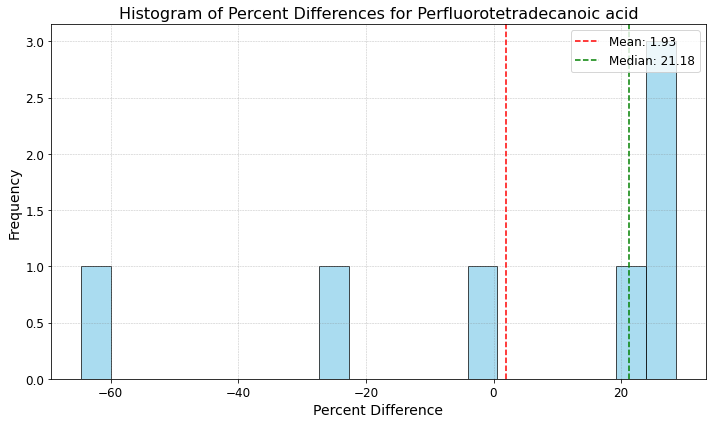

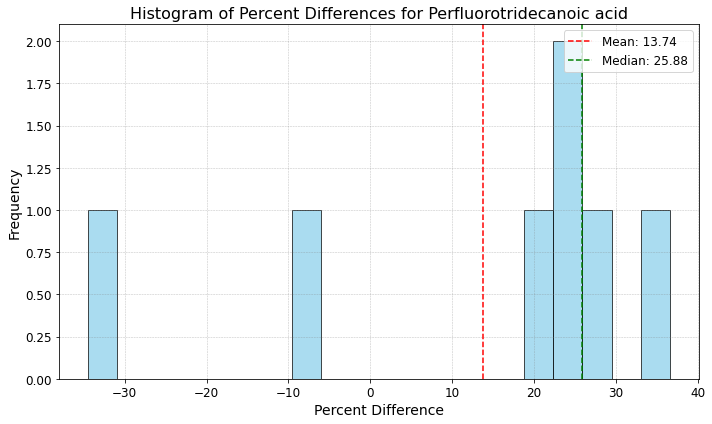

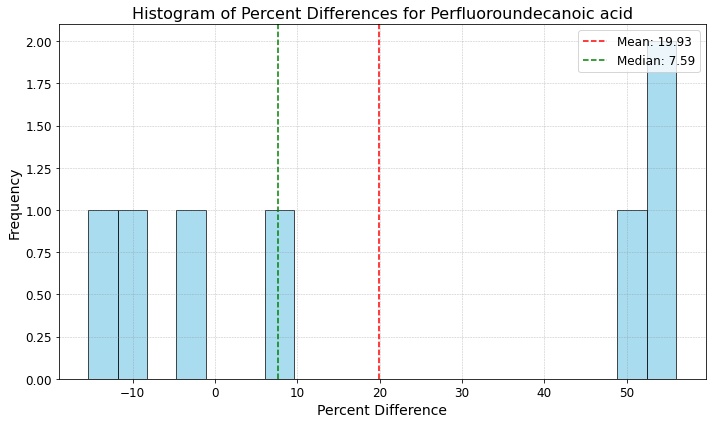

In [31]:
# Group the DataFrame by 'PFAS Compound_1633'
groups = merged_df.groupby('PFAS Compound_1633')

for compound, group in groups:
    # Calculate the percent difference for the current group
    group['Percent_Diff_1633-5371'] = ((group['All (w BDL= MDL/2) Incl Qual Flags_1633'] - group['All (w BDL= MDL/2) Incl Qual Flags_5371']) / ((group['All (w BDL= MDL/2) Incl Qual Flags_1633'] + group['All (w BDL= MDL/2) Incl Qual Flags_5371']) / 2)) * 100
    
    # Ensure there are enough data points for a meaningful histogram
    if len(group) > 1:
        plt.figure(figsize=(10, 6))
        n, bins, patches = plt.hist(group['Percent_Diff_1633-5371'].dropna(), bins=20, color='skyblue', edgecolor='black', alpha=0.7)

        # Formatting the plot
        plt.title(f'Histogram of Percent Differences for {compound}', fontsize=16)
        plt.xlabel('Percent Difference', fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
        plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)

        # Adding vertical lines for mean and median of the percent differences
        mean_val = np.mean(group['Percent_Diff_1633-5371'])
        median_val = np.median(group['Percent_Diff_1633-5371'])
        plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
        plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1.5, label=f'Median: {median_val:.2f}')

        # Adding a legend
        plt.legend(loc='upper right', fontsize=12)

        plt.tight_layout()
        plt.show()
    else:
        print(f"Not enough data for {compound} to generate a histogram.")



### By PFAS Class

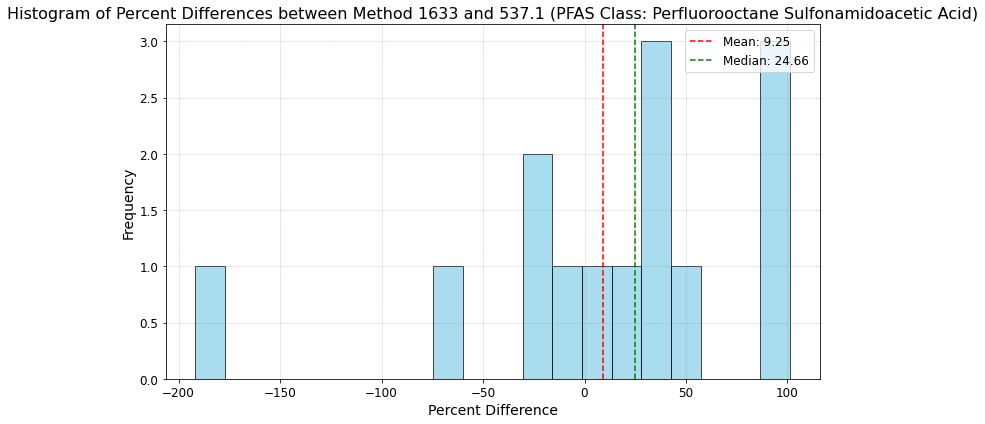

In [32]:
# Assuming 'pfas_compounds_PerfluorooctaneSulfonamidoaceticAcid' is defined and 'quant_df' is your DataFrame
# Filter the DataFrame to include only the specified compounds
filtered_df = merged_df[merged_df['PFAS Compound_1633'].isin(pfas_compounds_PerfluorooctaneSulfonamidoaceticAcid)].dropna(subset=['All (w BDL= MDL/2) Incl Qual Flags_1633', 'All (w BDL= MDL/2) Incl Qual Flags_5371'])

# Calculate the percent difference
filtered_df['Percent_Diff_1633-5371'] = ((filtered_df['All (w BDL= MDL/2) Incl Qual Flags_1633'] - filtered_df['All (w BDL= MDL/2) Incl Qual Flags_5371']) / ((filtered_df['All (w BDL= MDL/2) Incl Qual Flags_1633'] + filtered_df['All (w BDL= MDL/2) Incl Qual Flags_5371']) / 2)) * 100

# Step 1: Create the histogram for percent differences
plt.figure(figsize=(10, 6))  # Set the figure size (width, height) in inches
n, bins, patches = plt.hist(filtered_df['Percent_Diff_1633-5371'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Step 2: Format the plot
plt.title('Histogram of Percent Differences between Method 1633 and 537.1 (PFAS Class: Perfluorooctane Sulfonamidoacetic Acid)', fontsize=16)  # Title of the histogram
plt.xlabel('Percent Difference', fontsize=14)  # X-axis label
plt.ylabel('Frequency', fontsize=14)  # Y-axis label

# Optional: Adding a grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)

# Optional: Customizing ticks
plt.xticks(fontsize=12)  # Font size for X-axis ticks
plt.yticks(fontsize=12)  # Font size for Y-axis ticks

# Optional: Adding vertical lines for mean and median of percent differences
mean_val = np.mean(filtered_df['Percent_Diff_1633-5371'])
median_val = np.median(filtered_df['Percent_Diff_1633-5371'])
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1.5, label=f'Median: {median_val:.2f}')

# Optional: Adding a legend
plt.legend(loc='upper right', fontsize=12)

# Step 3: Show the plot
plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()


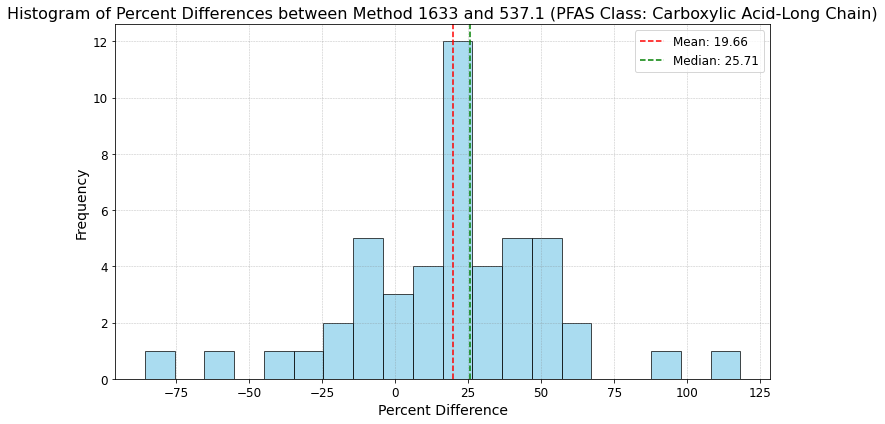

In [33]:
# Assuming 'pfas_compounds_PerfluorooctaneSulfonamidoaceticAcid' is defined and 'quant_df' is your DataFrame
# Filter the DataFrame to include only the specified compounds
filtered_df = merged_df[merged_df['PFAS Compound_1633'].isin(pfas_compounds_CarboxylicAcid_Long)].dropna(subset=['All (w BDL= MDL/2) Incl Qual Flags_1633', 'All (w BDL= MDL/2) Incl Qual Flags_5371'])

# Calculate the percent difference
filtered_df['Percent_Diff_1633-5371'] = ((filtered_df['All (w BDL= MDL/2) Incl Qual Flags_1633'] - filtered_df['All (w BDL= MDL/2) Incl Qual Flags_5371']) / ((filtered_df['All (w BDL= MDL/2) Incl Qual Flags_1633'] + filtered_df['All (w BDL= MDL/2) Incl Qual Flags_5371']) / 2)) * 100

# Step 1: Create the histogram for percent differences
plt.figure(figsize=(10, 6))  # Set the figure size (width, height) in inches
n, bins, patches = plt.hist(filtered_df['Percent_Diff_1633-5371'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Step 2: Format the plot
plt.title('Histogram of Percent Differences between Method 1633 and 537.1 (PFAS Class: Carboxylic Acid-Long Chain)', fontsize=16)  # Title of the histogram
plt.xlabel('Percent Difference', fontsize=14)  # X-axis label
plt.ylabel('Frequency', fontsize=14)  # Y-axis label

# Optional: Adding a grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)

# Optional: Customizing ticks
plt.xticks(fontsize=12)  # Font size for X-axis ticks
plt.yticks(fontsize=12)  # Font size for Y-axis ticks

# Optional: Adding vertical lines for mean and median of percent differences
mean_val = np.mean(filtered_df['Percent_Diff_1633-5371'])
median_val = np.median(filtered_df['Percent_Diff_1633-5371'])
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1.5, label=f'Median: {median_val:.2f}')

# Optional: Adding a legend
plt.legend(loc='upper right', fontsize=12)

# Step 3: Show the plot
plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()


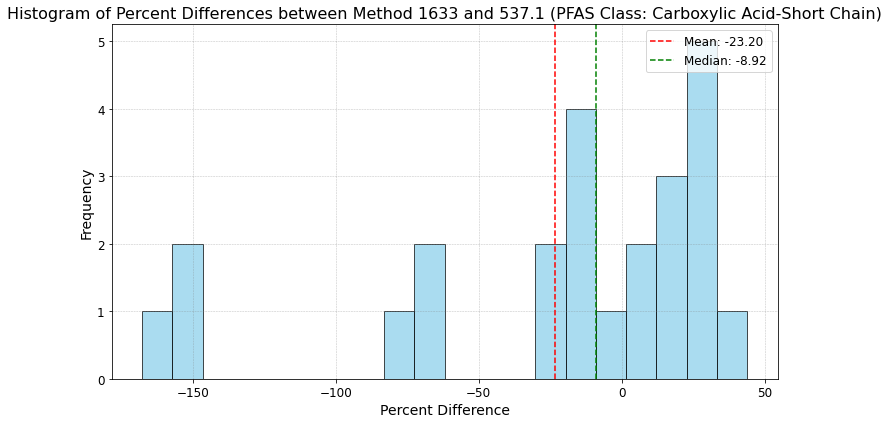

In [34]:
# Assuming 'pfas_compounds_PerfluorooctaneSulfonamidoaceticAcid' is defined and 'quant_df' is your DataFrame
# Filter the DataFrame to include only the specified compounds
filtered_df = merged_df[merged_df['PFAS Compound_1633'].isin(pfas_compounds_CarboxylicAcid_Short)].dropna(subset=['All (w BDL= MDL/2) Incl Qual Flags_1633', 'All (w BDL= MDL/2) Incl Qual Flags_5371'])

# Calculate the percent difference
filtered_df['Percent_Diff_1633-5371'] = ((filtered_df['All (w BDL= MDL/2) Incl Qual Flags_1633'] - filtered_df['All (w BDL= MDL/2) Incl Qual Flags_5371']) / ((filtered_df['All (w BDL= MDL/2) Incl Qual Flags_1633'] + filtered_df['All (w BDL= MDL/2) Incl Qual Flags_5371']) / 2)) * 100

# Step 1: Create the histogram for percent differences
plt.figure(figsize=(10, 6))  # Set the figure size (width, height) in inches
n, bins, patches = plt.hist(filtered_df['Percent_Diff_1633-5371'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Step 2: Format the plot
plt.title('Histogram of Percent Differences between Method 1633 and 537.1 (PFAS Class: Carboxylic Acid-Short Chain)', fontsize=16)  # Title of the histogram
plt.xlabel('Percent Difference', fontsize=14)  # X-axis label
plt.ylabel('Frequency', fontsize=14)  # Y-axis label

# Optional: Adding a grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)

# Optional: Customizing ticks
plt.xticks(fontsize=12)  # Font size for X-axis ticks
plt.yticks(fontsize=12)  # Font size for Y-axis ticks

# Optional: Adding vertical lines for mean and median of percent differences
mean_val = np.mean(filtered_df['Percent_Diff_1633-5371'])
median_val = np.median(filtered_df['Percent_Diff_1633-5371'])
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1.5, label=f'Median: {median_val:.2f}')

# Optional: Adding a legend
plt.legend(loc='upper right', fontsize=12)

# Step 3: Show the plot
plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()


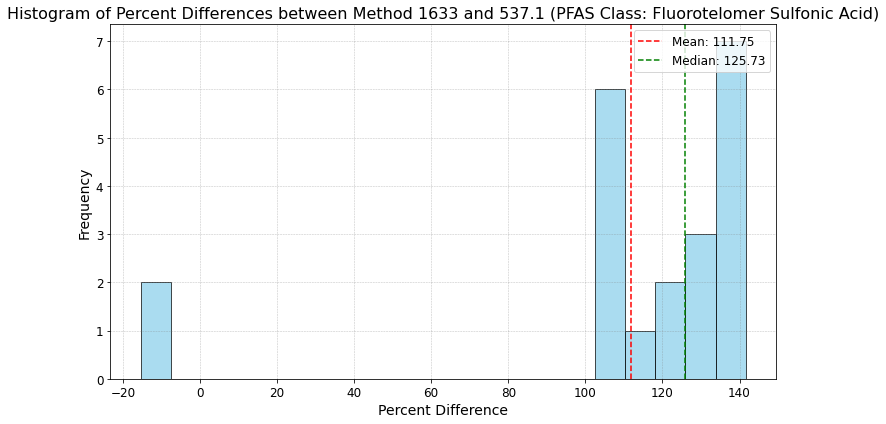

In [36]:
# Assuming 'pfas_compounds_PerfluorooctaneSulfonamidoaceticAcid' is defined and 'quant_df' is your DataFrame
# Filter the DataFrame to include only the specified compounds
filtered_df = merged_df[merged_df['PFAS Compound_1633'].isin(pfas_compounds_FluorotelomerSulfonicAcid)].dropna(subset=['All (w BDL= MDL/2) Incl Qual Flags_1633', 'All (w BDL= MDL/2) Incl Qual Flags_5371'])

# Calculate the percent difference
filtered_df['Percent_Diff_1633-5371'] = ((filtered_df['All (w BDL= MDL/2) Incl Qual Flags_1633'] - filtered_df['All (w BDL= MDL/2) Incl Qual Flags_5371']) / ((filtered_df['All (w BDL= MDL/2) Incl Qual Flags_1633'] + filtered_df['All (w BDL= MDL/2) Incl Qual Flags_5371']) / 2)) * 100

# Step 1: Create the histogram for percent differences
plt.figure(figsize=(10, 6))  # Set the figure size (width, height) in inches
n, bins, patches = plt.hist(filtered_df['Percent_Diff_1633-5371'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Step 2: Format the plot
plt.title('Histogram of Percent Differences between Method 1633 and 537.1 (PFAS Class: Fluorotelomer Sulfonic Acid)', fontsize=16)  # Title of the histogram
plt.xlabel('Percent Difference', fontsize=14)  # X-axis label
plt.ylabel('Frequency', fontsize=14)  # Y-axis label

# Optional: Adding a grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)

# Optional: Customizing ticks
plt.xticks(fontsize=12)  # Font size for X-axis ticks
plt.yticks(fontsize=12)  # Font size for Y-axis ticks

# Optional: Adding vertical lines for mean and median of percent differences
mean_val = np.mean(filtered_df['Percent_Diff_1633-5371'])
median_val = np.median(filtered_df['Percent_Diff_1633-5371'])
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1.5, label=f'Median: {median_val:.2f}')

# Optional: Adding a legend
plt.legend(loc='upper right', fontsize=12)

# Step 3: Show the plot
plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()


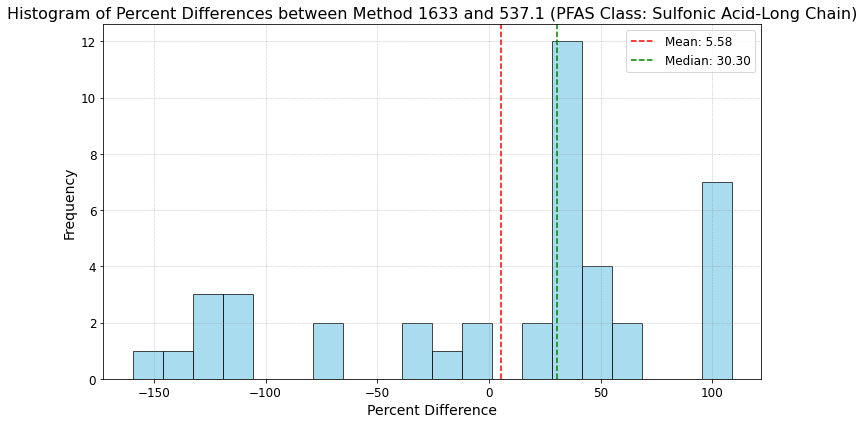

In [37]:
# Assuming 'pfas_compounds_PerfluorooctaneSulfonamidoaceticAcid' is defined and 'quant_df' is your DataFrame
# Filter the DataFrame to include only the specified compounds
filtered_df = merged_df[merged_df['PFAS Compound_1633'].isin(pfas_compounds_SulfonicAcid_Long)].dropna(subset=['All (w BDL= MDL/2) Incl Qual Flags_1633', 'All (w BDL= MDL/2) Incl Qual Flags_5371'])

# Calculate the percent difference
filtered_df['Percent_Diff_1633-5371'] = ((filtered_df['All (w BDL= MDL/2) Incl Qual Flags_1633'] - filtered_df['All (w BDL= MDL/2) Incl Qual Flags_5371']) / ((filtered_df['All (w BDL= MDL/2) Incl Qual Flags_1633'] + filtered_df['All (w BDL= MDL/2) Incl Qual Flags_5371']) / 2)) * 100

# Step 1: Create the histogram for percent differences
plt.figure(figsize=(10, 6))  # Set the figure size (width, height) in inches
n, bins, patches = plt.hist(filtered_df['Percent_Diff_1633-5371'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Step 2: Format the plot
plt.title('Histogram of Percent Differences between Method 1633 and 537.1 (PFAS Class: Sulfonic Acid-Long Chain)', fontsize=16)  # Title of the histogram
plt.xlabel('Percent Difference', fontsize=14)  # X-axis label
plt.ylabel('Frequency', fontsize=14)  # Y-axis label

# Optional: Adding a grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)

# Optional: Customizing ticks
plt.xticks(fontsize=12)  # Font size for X-axis ticks
plt.yticks(fontsize=12)  # Font size for Y-axis ticks

# Optional: Adding vertical lines for mean and median of percent differences
mean_val = np.mean(filtered_df['Percent_Diff_1633-5371'])
median_val = np.median(filtered_df['Percent_Diff_1633-5371'])
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1.5, label=f'Median: {median_val:.2f}')

# Optional: Adding a legend
plt.legend(loc='upper right', fontsize=12)

# Step 3: Show the plot
plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()


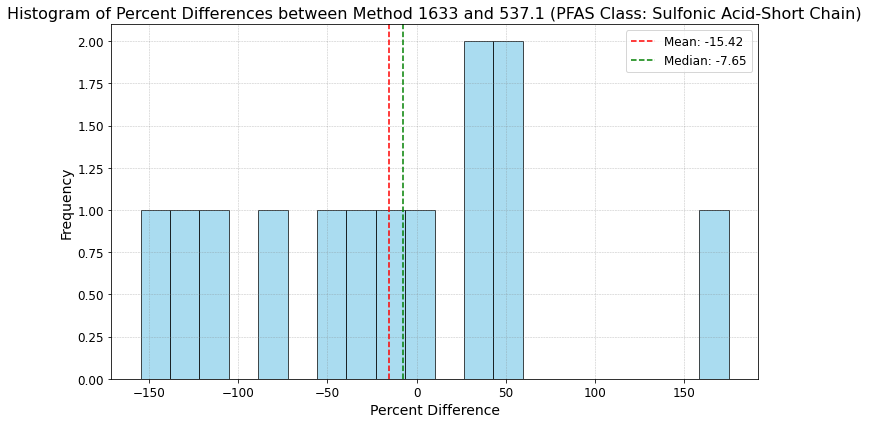

In [38]:
# Assuming 'pfas_compounds_PerfluorooctaneSulfonamidoaceticAcid' is defined and 'quant_df' is your DataFrame
# Filter the DataFrame to include only the specified compounds
filtered_df = merged_df[merged_df['PFAS Compound_1633'].isin(pfas_compounds_SulfonicAcid_Short)].dropna(subset=['All (w BDL= MDL/2) Incl Qual Flags_1633', 'All (w BDL= MDL/2) Incl Qual Flags_5371'])

# Calculate the percent difference
filtered_df['Percent_Diff_1633-5371'] = ((filtered_df['All (w BDL= MDL/2) Incl Qual Flags_1633'] - filtered_df['All (w BDL= MDL/2) Incl Qual Flags_5371']) / ((filtered_df['All (w BDL= MDL/2) Incl Qual Flags_1633'] + filtered_df['All (w BDL= MDL/2) Incl Qual Flags_5371']) / 2)) * 100

# Step 1: Create the histogram for percent differences
plt.figure(figsize=(10, 6))  # Set the figure size (width, height) in inches
n, bins, patches = plt.hist(filtered_df['Percent_Diff_1633-5371'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Step 2: Format the plot
plt.title('Histogram of Percent Differences between Method 1633 and 537.1 (PFAS Class: Sulfonic Acid-Short Chain)', fontsize=16)  # Title of the histogram
plt.xlabel('Percent Difference', fontsize=14)  # X-axis label
plt.ylabel('Frequency', fontsize=14)  # Y-axis label

# Optional: Adding a grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)

# Optional: Customizing ticks
plt.xticks(fontsize=12)  # Font size for X-axis ticks
plt.yticks(fontsize=12)  # Font size for Y-axis ticks

# Optional: Adding vertical lines for mean and median of percent differences
mean_val = np.mean(filtered_df['Percent_Diff_1633-5371'])
median_val = np.median(filtered_df['Percent_Diff_1633-5371'])
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1.5, label=f'Median: {median_val:.2f}')

# Optional: Adding a legend
plt.legend(loc='upper right', fontsize=12)

# Step 3: Show the plot
plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()


### By Type

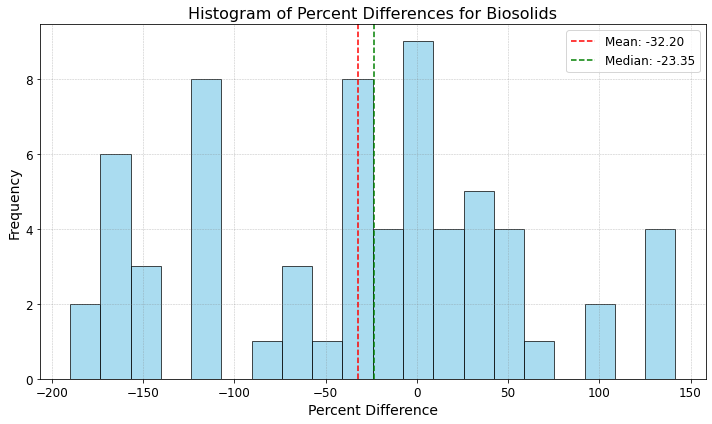

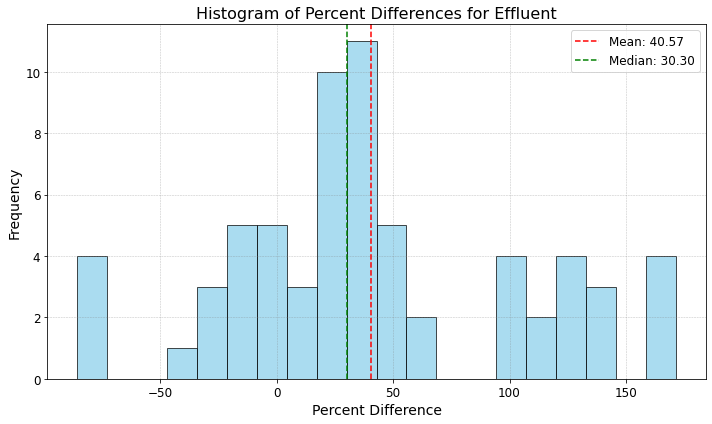

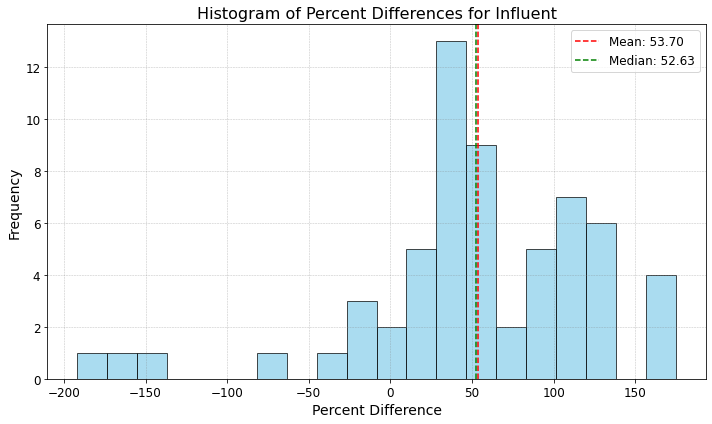

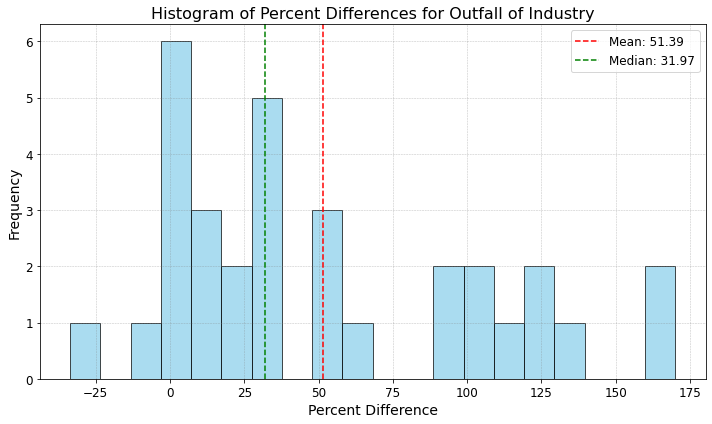

In [39]:
# Group the DataFrame by 'PFAS Compound_1633'
groups = merged_df.groupby('Type_1633')

for Type, group in groups:
    # Calculate the percent difference for the current group
    group['Percent_Diff_1633-5371'] = ((group['All (w BDL= MDL/2) Incl Qual Flags_1633'] - group['All (w BDL= MDL/2) Incl Qual Flags_5371']) / ((group['All (w BDL= MDL/2) Incl Qual Flags_1633'] + group['All (w BDL= MDL/2) Incl Qual Flags_5371']) / 2)) * 100
    
    # Ensure there are enough data points for a meaningful histogram
    if len(group) > 1:
        plt.figure(figsize=(10, 6))
        n, bins, patches = plt.hist(group['Percent_Diff_1633-5371'].dropna(), bins=20, color='skyblue', edgecolor='black', alpha=0.7)

        # Formatting the plot
        plt.title(f'Histogram of Percent Differences for {Type}', fontsize=16)
        plt.xlabel('Percent Difference', fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
        plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)

        # Adding vertical lines for mean and median of the percent differences
        mean_val = np.mean(group['Percent_Diff_1633-5371'])
        median_val = np.median(group['Percent_Diff_1633-5371'])
        plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
        plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1.5, label=f'Median: {median_val:.2f}')

        # Adding a legend
        plt.legend(loc='upper right', fontsize=12)

        plt.tight_layout()
        plt.show()
    else:
        print(f"Not enough data for {Type} to generate a histogram.")

### By Sample Location

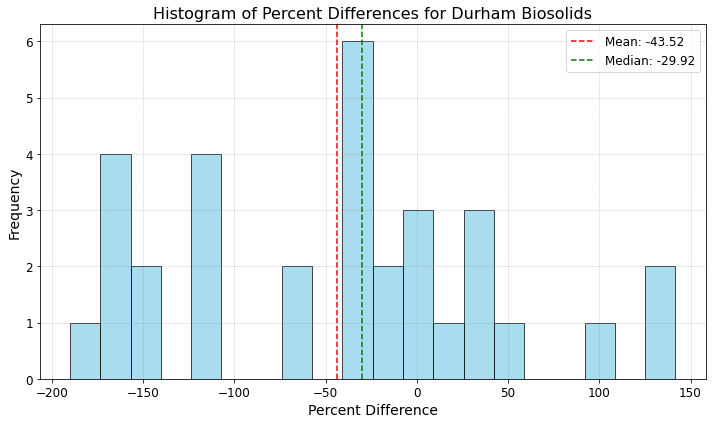

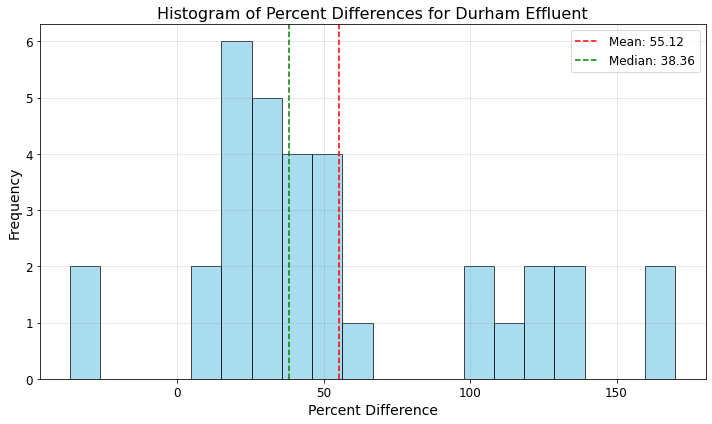

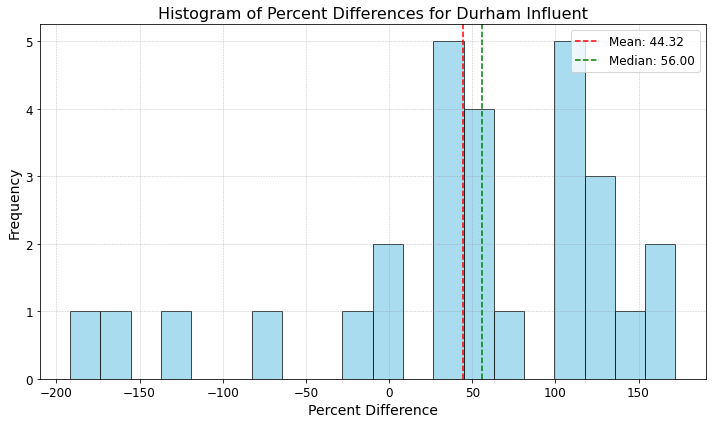

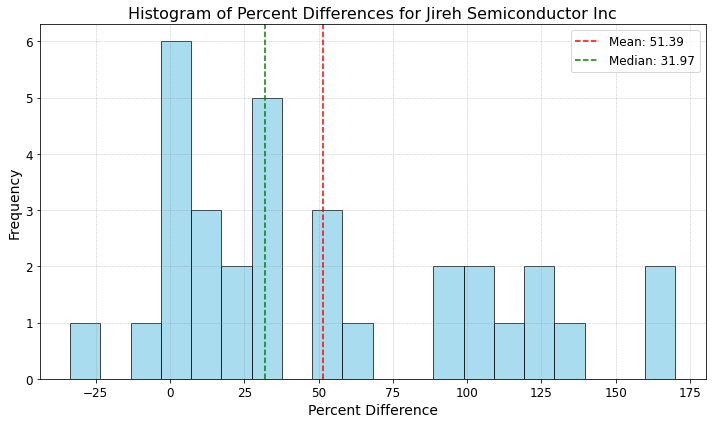

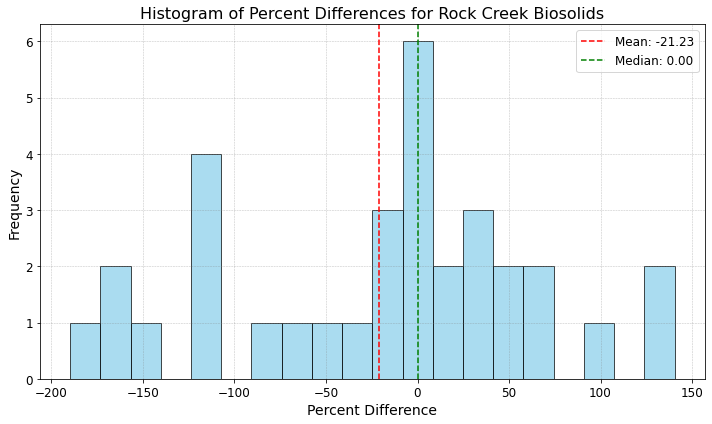

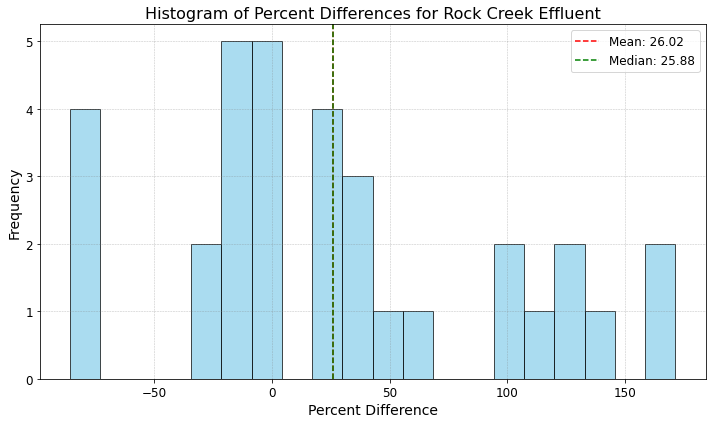

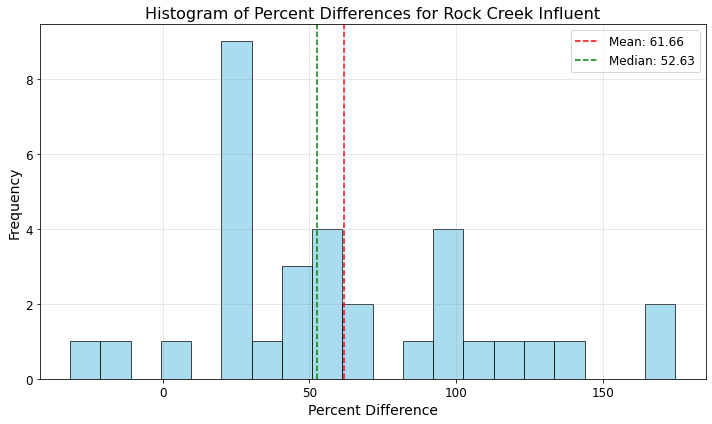

In [40]:
# Group the DataFrame by 'PFAS Compound_1633'
groups = merged_df.groupby('Sample Location_1633')

for Type, group in groups:
    # Calculate the percent difference for the current group
    group['Percent_Diff_1633-5371'] = ((group['All (w BDL= MDL/2) Incl Qual Flags_1633'] - group['All (w BDL= MDL/2) Incl Qual Flags_5371']) / ((group['All (w BDL= MDL/2) Incl Qual Flags_1633'] + group['All (w BDL= MDL/2) Incl Qual Flags_5371']) / 2)) * 100
    
    # Ensure there are enough data points for a meaningful histogram
    if len(group) > 1:
        plt.figure(figsize=(10, 6))
        n, bins, patches = plt.hist(group['Percent_Diff_1633-5371'].dropna(), bins=20, color='skyblue', edgecolor='black', alpha=0.7)

        # Formatting the plot
        plt.title(f'Histogram of Percent Differences for {Type}', fontsize=16)
        plt.xlabel('Percent Difference', fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
        plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)

        # Adding vertical lines for mean and median of the percent differences
        mean_val = np.mean(group['Percent_Diff_1633-5371'])
        median_val = np.median(group['Percent_Diff_1633-5371'])
        plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
        plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1.5, label=f'Median: {median_val:.2f}')

        # Adding a legend
        plt.legend(loc='upper right', fontsize=12)

        plt.tight_layout()
        plt.show()
    else:
        print(f"Not enough data for {Type} to generate a histogram.")

## Kolmogorov-Smirnov test 

In [41]:
#Prepare data
#The test assumes that the samples are independent. Measurements within each method and between methods should not be paired or matched.
#This means we want to compare all quant results for both methods but they don't necessarily need to both be quant detection class.
subset_df_1633
subset_df_537

### All Results

In [43]:
# Perform the two-sample K-S test
statistic, p_value = ks_2samp(subset_df_1633['All (w BDL= MDL/2) Incl Qual Flags'], subset_df_537['All (w BDL= MDL/2) Incl Qual Flags'])

print(f"K-S statistic: {statistic}")
print(f"P-value: {p_value}")


K-S statistic: 0.2523778195488722
P-value: 2.4182322810872847e-11


### By PFAS Compound

In [44]:
# Identify common PFAS compounds in both dataframes
common_compounds = set(subset_df_1633['PFAS Compound']).intersection(set(subset_df_537['PFAS Compound']))
# Results container
ks_results = []

for compound in common_compounds:
    # Filter each dataframe for the current PFAS compound
    data_1633 = subset_df_1633[subset_df_1633['PFAS Compound'] == compound]['All (w BDL= MDL/2) Incl Qual Flags'].dropna()
    data_537 = subset_df_537[subset_df_537['PFAS Compound'] == compound]['All (w BDL= MDL/2) Incl Qual Flags'].dropna()
    
    # Ensure both groups have enough data points
    if len(data_1633) > 1 and len(data_537) > 1:
        # Perform the K-S test
        statistic, p_value = ks_2samp(data_1633, data_537)
        
        # Store the results
        ks_results.append((compound, statistic, p_value))
    else:
        print(f"Not enough data for {compound} to perform K-S test.")

# Optionally, convert the results list to a DataFrame for better visualization
ks_results_df = pd.DataFrame(ks_results, columns=['PFAS Compound', 'K-S Statistic', 'P-Value'])
print(ks_results_df)


                          PFAS Compound  K-S Statistic       P-Value
0                               NMeFOSE       0.666667  7.953709e-03
1                              NEtFOSAA       0.405844  2.040228e-01
2         Perfluoropentanesulfonic acid       0.383117  2.612394e-01
3            Perfluorooctanesulfonamide       0.501661  6.747016e-02
4                              NMeFOSAA       0.480519  8.292630e-02
5        Perfluorododecanesulfonic acid       0.493506  7.268403e-02
6        6:2 Fluorotelomersulfonic acid       0.404762  2.334497e-01
7   Perfluorooctanesulfonic acid (PFOS)       0.750000  6.694704e-04
8              Perfluoroundecanoic acid       0.338870  4.084127e-01
9           Perfluorotetradecanoic acid       0.360390  3.284213e-01
10        Perfluoroheptanesulfonic acid       0.340909  3.926843e-01
11               Perfluorodecanoic acid       0.704545  1.846286e-03
12                              HFPO-DA       0.383117  2.612394e-01
13                              NE

### By PFAS Class

In [45]:
# Filter the DataFrame to include only the specified compounds
filtered_df_1633 = subset_df_1633[subset_df_1633['PFAS Compound'].isin(pfas_compounds_PerfluorooctaneSulfonamidoaceticAcid)].dropna(subset=['All (w BDL= MDL/2) Incl Qual Flags'])
filtered_df_537 = subset_df_537[subset_df_537['PFAS Compound'].isin(pfas_compounds_PerfluorooctaneSulfonamidoaceticAcid)].dropna(subset=['All (w BDL= MDL/2) Incl Qual Flags'])

# Perform the two-sample K-S test
statistic, p_value = ks_2samp(filtered_df_1633['All (w BDL= MDL/2) Incl Qual Flags'], filtered_df_537['All (w BDL= MDL/2) Incl Qual Flags'])

print(f"K-S statistic: {statistic}")
print(f"P-value: {p_value}")


K-S statistic: 0.42045454545454547
P-value: 0.018903701830072284


In [46]:
# Filter the DataFrame to include only the specified compounds
filtered_df_1633 = subset_df_1633[subset_df_1633['PFAS Compound'].isin(pfas_compounds_CarboxylicAcid_Long)].dropna(subset=['All (w BDL= MDL/2) Incl Qual Flags'])
filtered_df_537 = subset_df_537[subset_df_537['PFAS Compound'].isin(pfas_compounds_CarboxylicAcid_Long)].dropna(subset=['All (w BDL= MDL/2) Incl Qual Flags'])

# Perform the two-sample K-S test
statistic, p_value = ks_2samp(filtered_df_1633['All (w BDL= MDL/2) Incl Qual Flags'], filtered_df_537['All (w BDL= MDL/2) Incl Qual Flags'])

print(f"K-S statistic: {statistic}")
print(f"P-value: {p_value}")

K-S statistic: 0.4265642303433001
P-value: 2.49774421923199e-07


In [47]:
# Filter the DataFrame to include only the specified compounds
filtered_df_1633 = subset_df_1633[subset_df_1633['PFAS Compound'].isin(pfas_compounds_CarboxylicAcid_Short)].dropna(subset=['All (w BDL= MDL/2) Incl Qual Flags'])
filtered_df_537 = subset_df_537[subset_df_537['PFAS Compound'].isin(pfas_compounds_CarboxylicAcid_Short)].dropna(subset=['All (w BDL= MDL/2) Incl Qual Flags'])

# Perform the two-sample K-S test
statistic, p_value = ks_2samp(filtered_df_1633['All (w BDL= MDL/2) Incl Qual Flags'], filtered_df_537['All (w BDL= MDL/2) Incl Qual Flags'])

print(f"K-S statistic: {statistic}")
print(f"P-value: {p_value}")

K-S statistic: 0.4652351738241309
P-value: 0.00011992716085862387


In [48]:
# Filter the DataFrame to include only the specified compounds
filtered_df_1633 = subset_df_1633[subset_df_1633['PFAS Compound'].isin(pfas_compounds_FluorotelomerSulfonicAcid)].dropna(subset=['All (w BDL= MDL/2) Incl Qual Flags'])
filtered_df_537 = subset_df_537[subset_df_537['PFAS Compound'].isin(pfas_compounds_FluorotelomerSulfonicAcid)].dropna(subset=['All (w BDL= MDL/2) Incl Qual Flags'])

# Perform the two-sample K-S test
statistic, p_value = ks_2samp(filtered_df_1633['All (w BDL= MDL/2) Incl Qual Flags'], filtered_df_537['All (w BDL= MDL/2) Incl Qual Flags'])

print(f"K-S statistic: {statistic}")
print(f"P-value: {p_value}")

K-S statistic: 0.6000744047619048
P-value: 1.1202369570861848e-06


In [50]:
# Filter the DataFrame to include only the specified compounds
filtered_df_1633 = subset_df_1633[subset_df_1633['PFAS Compound'].isin(pfas_compounds_PerfluorooctaneSulfonamideEthanol)].dropna(subset=['All (w BDL= MDL/2) Incl Qual Flags'])
filtered_df_537 = subset_df_537[subset_df_537['PFAS Compound'].isin(pfas_compounds_PerfluorooctaneSulfonamideEthanol)].dropna(subset=['All (w BDL= MDL/2) Incl Qual Flags'])

# Perform the two-sample K-S test
statistic, p_value = ks_2samp(filtered_df_1633['All (w BDL= MDL/2) Incl Qual Flags'], filtered_df_537['All (w BDL= MDL/2) Incl Qual Flags'])

print(f"K-S statistic: {statistic}")
print(f"P-value: {p_value}")

K-S statistic: 0.6923076923076923
P-value: 7.881958021815905e-06


In [51]:
# Filter the DataFrame to include only the specified compounds
filtered_df_1633 = subset_df_1633[subset_df_1633['PFAS Compound'].isin(pfas_compounds_SulfonicAcid_Long)].dropna(subset=['All (w BDL= MDL/2) Incl Qual Flags'])
filtered_df_537 = subset_df_537[subset_df_537['PFAS Compound'].isin(pfas_compounds_SulfonicAcid_Long)].dropna(subset=['All (w BDL= MDL/2) Incl Qual Flags'])

# Perform the two-sample K-S test
statistic, p_value = ks_2samp(filtered_df_1633['All (w BDL= MDL/2) Incl Qual Flags'], filtered_df_537['All (w BDL= MDL/2) Incl Qual Flags'])

print(f"K-S statistic: {statistic}")
print(f"P-value: {p_value}")

K-S statistic: 0.3269961977186312
P-value: 0.0005992072370831769


In [53]:
# Filter the DataFrame to include only the specified compounds
filtered_df_1633 = subset_df_1633[subset_df_1633['PFAS Compound'].isin(pfas_compounds_SulfonicAcid_Short)].dropna(subset=['All (w BDL= MDL/2) Incl Qual Flags'])
filtered_df_537 = subset_df_537[subset_df_537['PFAS Compound'].isin(pfas_compounds_SulfonicAcid_Short)].dropna(subset=['All (w BDL= MDL/2) Incl Qual Flags'])

# Perform the two-sample K-S test
statistic, p_value = ks_2samp(filtered_df_1633['All (w BDL= MDL/2) Incl Qual Flags'], filtered_df_537['All (w BDL= MDL/2) Incl Qual Flags'])

print(f"K-S statistic: {statistic}")
print(f"P-value: {p_value}")

K-S statistic: 0.5313881520778072
P-value: 0.0017588418654181925


### By Type

In [54]:
# Assuming quant_df_1633 and quant_df_537 are your DataFrames filtered by 'Detection Class' == 'Quant'
# Identify common Sample Locations in both dataframes
common_types = set(subset_df_1633['Type']).intersection(set(subset_df_537['Type']))

# Results container
ks_results = []

for Type in common_types:
    # Filter each dataframe for the current Sample Location
    data_1633 = subset_df_1633[subset_df_1633['Type'] == Type]['All (w BDL= MDL/2) Incl Qual Flags'].dropna()
    data_537 = subset_df_537[subset_df_537['Type'] == Type]['All (w BDL= MDL/2) Incl Qual Flags'].dropna()
    
    # Ensure both groups have enough data points
    if len(data_1633) > 1 and len(data_537) > 1:
        # Perform the K-S test
        statistic, p_value = ks_2samp(data_1633, data_537)
        
        # Store the results
        ks_results.append((Type, statistic, p_value))
    else:
        print(f"Not enough data for Sample Location '{Type}' to perform K-S test.")

# Optionally, convert the results list to a DataFrame for better visualization
ks_results_df = pd.DataFrame(ks_results, columns=['Type', 'K-S Statistic', 'P-Value'])
print(ks_results_df)

                  Type  K-S Statistic       P-Value
0            Biosolids       0.333333  8.013036e-04
1  Outfall of Industry       0.383250  2.967764e-04
2             Influent       0.496771  4.812039e-09
3             Effluent       0.401515  8.976356e-07


### By Sample Location

In [55]:
# Assuming quant_df_1633 and quant_df_537 are your DataFrames filtered by 'Detection Class' == 'Quant'
# Identify common Sample Locations in both dataframes
common_locations = set(subset_df_1633['Sample Location']).intersection(set(subset_df_537['Sample Location']))

# Results container
ks_results = []

for location in common_locations:
    # Filter each dataframe for the current Sample Location
    data_1633 = subset_df_1633[subset_df_1633['Sample Location'] == location]['All (w BDL= MDL/2) Incl Qual Flags'].dropna()
    data_537 = subset_df_537[subset_df_537['Sample Location'] == location]['All (w BDL= MDL/2) Incl Qual Flags'].dropna()
    
    # Ensure both groups have enough data points
    if len(data_1633) > 1 and len(data_537) > 1:
        # Perform the K-S test
        statistic, p_value = ks_2samp(data_1633, data_537)
        
        # Store the results
        ks_results.append((location, statistic, p_value))
    else:
        print(f"Not enough data for Sample Location '{location}' to perform K-S test.")

# Optionally, convert the results list to a DataFrame for better visualization
ks_results_df = pd.DataFrame(ks_results, columns=['Sample Location', 'K-S Statistic', 'P-Value'])
print(ks_results_df)


           Sample Location  K-S Statistic   P-Value
0          Durham Influent       0.546537  0.000102
1      Rock Creek Effluent       0.424242  0.004793
2         Durham Biosolids       0.363636  0.015766
3      Rock Creek Influent       0.454545  0.001897
4          Durham Effluent       0.333333  0.050470
5  Jireh Semiconductor Inc       0.321023  0.056139
6     Rock Creek Biosolids       0.303030  0.096546


## Bar Chart Visualization

### All Quant Pairs by PFAS Compound Separated by PFAS Groups Comparison between Method 1633 and 537.1

In [163]:
quant_df

Result_1633 Analysis Method_1633     Sample Location_1633  \
11           10                 1633         Durham Biosolids   
15            4                 1633         Durham Biosolids   
17          1.6                 1633         Durham Biosolids   
25           10                 1633         Durham Biosolids   
31          1.8                 1633         Durham Biosolids   
45            7                 1633          Durham Effluent   
52            3                 1633          Durham Effluent   
53          2.6                 1633          Durham Effluent   
54           11                 1633          Durham Effluent   
58          8.7                 1633          Durham Effluent   
59            8                 1633          Durham Effluent   
61          9.1                 1633          Durham Effluent   
83          2.9                 1633          Durham Influent   
88           11                 1633          Durham Influent   
106         8.8                 1633      Rock Creek Effluent   
107          16                 1633      Rock Creek Effluent   
113         3.9                 1633      Rock Creek Effluent   
114         2.8                 1633      Rock Creek Effluent   
115          14                 1633      Rock Creek Effluent   
119         6.5                 1633      Rock Creek Effluent   
120         7.8                 1633      Rock Creek Effluent   
122          12                 1633      Rock Creek Effluent   
134         4.4                 1633     Rock Creek Biosolids   
137          13                 1633     Rock Creek Biosolids   
142         7.1                 1633     Rock Creek Biosolids   
144         3.5                 1633     Rock Creek Biosolids   
150         1.8                 1633     Rock Creek Biosolids   
152          16                 1633     Rock Creek Biosolids   
158         4.1                 1633     Rock Creek Biosolids   
172          17                 1633      Rock Creek Influent   
173          19                 1633      Rock Creek Influent   
179         5.4                 1633      Rock Creek Influent   
180         2.9                 1633      Rock Creek Influent   
181          22                 1633      Rock Creek Influent   
185          12                 1633      Rock Creek Influent   
186          15                 1633      Rock Creek Influent   
188          15                 1633      Rock Creek Influent   
205          52                 1633  Jireh Semiconductor Inc   
207          13                 1633  Jireh Semiconductor Inc   
209         3.3                 1633  Jireh Semiconductor Inc   
211          69                 1633  Jireh Semiconductor Inc   
213         110                 1633  Jireh Semiconductor Inc   
215          29                 1633  Jireh Semiconductor Inc   
217          19                 1633  Jireh Semiconductor Inc   
218          53                 1633  Jireh Semiconductor Inc   
220         170                 1633  Jireh Semiconductor Inc   
223         6.8                 1633  Jireh Semiconductor Inc   

               Type_1633 Sample Date_1633  \
11             Biosolids       2023-12-05   
15             Biosolids       2023-12-05   
17             Biosolids       2023-12-05   
25             Biosolids       2023-12-05   
31             Biosolids       2023-12-05   
45              Effluent       2023-12-05   
52              Effluent       2023-12-05   
53              Effluent       2023-12-05   
54              Effluent       2023-12-05   
58              Effluent       2023-12-05   
59              Effluent       2023-12-05   
61              Effluent       2023-12-05   
83              Influent       2023-12-05   
88              Influent       2023-12-05   
106             Effluent       2023-12-05   
107             Effluent       2023-12-05   
113             Effluent       2023-12-05   
114             Effluent       2023-12-05   
115             Effluent    

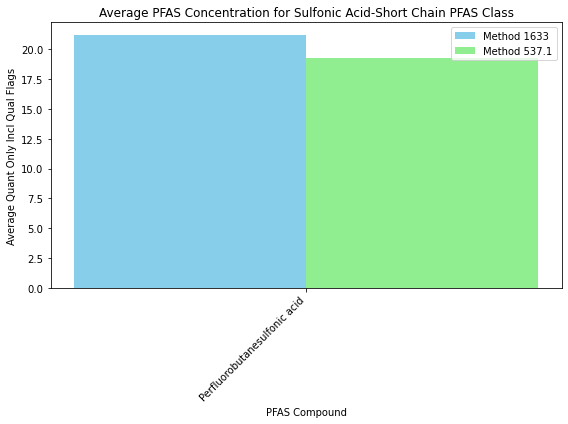

In [172]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_SulfonicAcid_Short)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])

# Calculate the mean for each PFAS Compound
average_df = filtered_df.groupby('PFAS Compound_1633').agg({
    'Quant Only Incl Qual Flags_1633': 'mean',
    'Quant Only Incl Qual Flags_5371': 'mean'
}).reset_index()

# Set the positions and width for the bars
positions = np.arange(len(average_df['PFAS Compound_1633']))
width = 0.35  # the width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot bars for each method
bars_1633 = ax.bar(positions - width/2, average_df['Quant Only Incl Qual Flags_1633'], width, label='Method 1633', color='skyblue')
bars_5371 = ax.bar(positions + width/2, average_df['Quant Only Incl Qual Flags_5371'], width, label='Method 537.1', color='lightgreen')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('PFAS Compound')
ax.set_ylabel('Average Quant Only Incl Qual Flags')
ax.set_title('Average PFAS Concentration for Sulfonic Acid-Short Chain PFAS Class')
ax.set_xticks(positions)
ax.set_xticklabels(average_df['PFAS Compound_1633'], rotation=45, ha="right")
ax.legend()

fig.tight_layout()

plt.show()

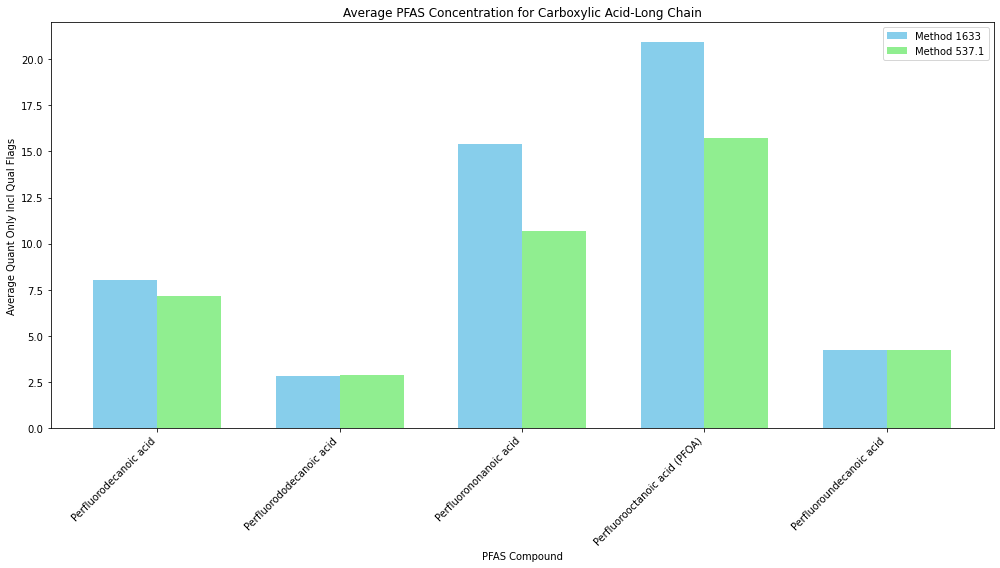

In [174]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_CarboxylicAcid_Long)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])

# Calculate the mean for each PFAS Compound
average_df = filtered_df.groupby('PFAS Compound_1633').agg({
    'Quant Only Incl Qual Flags_1633': 'mean',
    'Quant Only Incl Qual Flags_5371': 'mean'
}).reset_index()

# Set the positions and width for the bars
positions = np.arange(len(average_df['PFAS Compound_1633']))
width = 0.35  # the width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(14, 8))

# Plot bars for each method
bars_1633 = ax.bar(positions - width/2, average_df['Quant Only Incl Qual Flags_1633'], width, label='Method 1633', color='skyblue')
bars_5371 = ax.bar(positions + width/2, average_df['Quant Only Incl Qual Flags_5371'], width, label='Method 537.1', color='lightgreen')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('PFAS Compound')
ax.set_ylabel('Average Quant Only Incl Qual Flags')
ax.set_title('Average PFAS Concentration for Carboxylic Acid-Long Chain')
ax.set_xticks(positions)
ax.set_xticklabels(average_df['PFAS Compound_1633'], rotation=45, ha="right")
ax.legend()

fig.tight_layout()

plt.show()

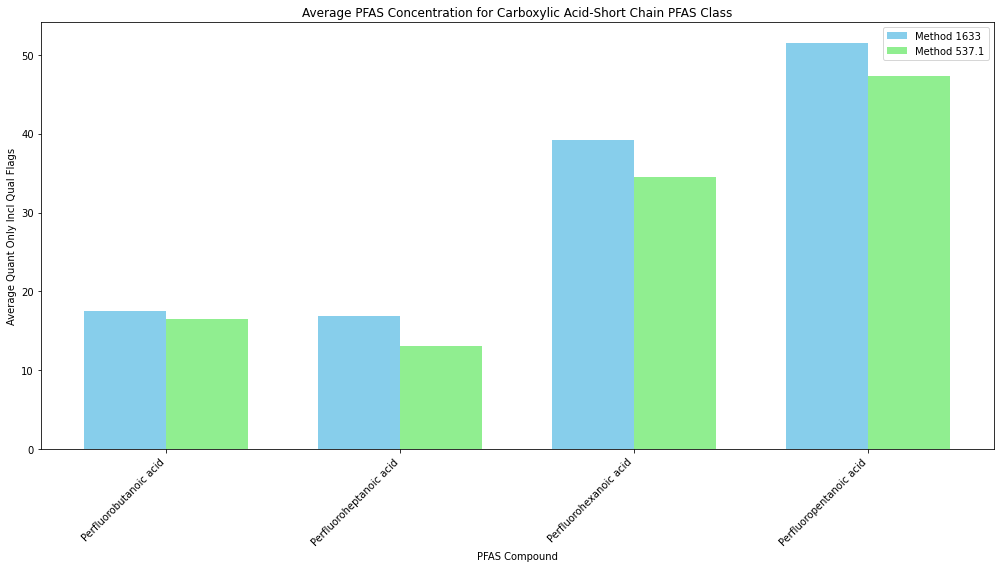

In [175]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_CarboxylicAcid_Short)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])

# Calculate the mean for each PFAS Compound
average_df = filtered_df.groupby('PFAS Compound_1633').agg({
    'Quant Only Incl Qual Flags_1633': 'mean',
    'Quant Only Incl Qual Flags_5371': 'mean'
}).reset_index()

# Set the positions and width for the bars
positions = np.arange(len(average_df['PFAS Compound_1633']))
width = 0.35  # the width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(14, 8))

# Plot bars for each method
bars_1633 = ax.bar(positions - width/2, average_df['Quant Only Incl Qual Flags_1633'], width, label='Method 1633', color='skyblue')
bars_5371 = ax.bar(positions + width/2, average_df['Quant Only Incl Qual Flags_5371'], width, label='Method 537.1', color='lightgreen')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('PFAS Compound')
ax.set_ylabel('Average Quant Only Incl Qual Flags')
ax.set_title('Average PFAS Concentration for Carboxylic Acid-Short Chain PFAS Class')
ax.set_xticks(positions)
ax.set_xticklabels(average_df['PFAS Compound_1633'], rotation=45, ha="right")
ax.legend()

fig.tight_layout()

plt.show()

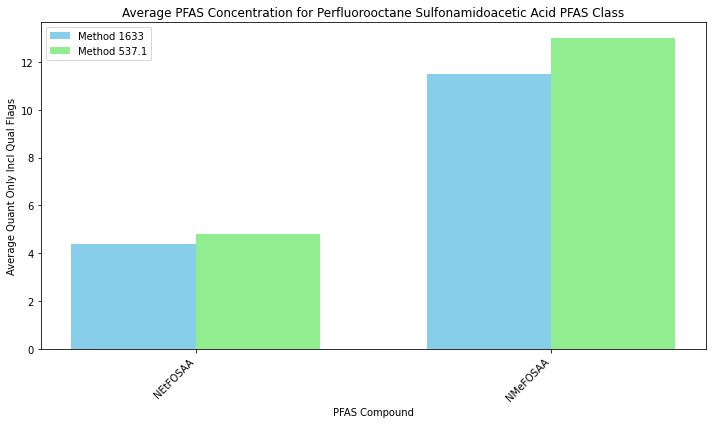

In [177]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_PerfluorooctaneSulfonamidoaceticAcid)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])

# Calculate the mean for each PFAS Compound
average_df = filtered_df.groupby('PFAS Compound_1633').agg({
    'Quant Only Incl Qual Flags_1633': 'mean',
    'Quant Only Incl Qual Flags_5371': 'mean'
}).reset_index()

# Set the positions and width for the bars
positions = np.arange(len(average_df['PFAS Compound_1633']))
width = 0.35  # the width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each method
bars_1633 = ax.bar(positions - width/2, average_df['Quant Only Incl Qual Flags_1633'], width, label='Method 1633', color='skyblue')
bars_5371 = ax.bar(positions + width/2, average_df['Quant Only Incl Qual Flags_5371'], width, label='Method 537.1', color='lightgreen')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('PFAS Compound')
ax.set_ylabel('Average Quant Only Incl Qual Flags')
ax.set_title('Average PFAS Concentration for Perfluorooctane Sulfonamidoacetic Acid PFAS Class')
ax.set_xticks(positions)
ax.set_xticklabels(average_df['PFAS Compound_1633'], rotation=45, ha="right")
ax.legend()

fig.tight_layout()

plt.show()

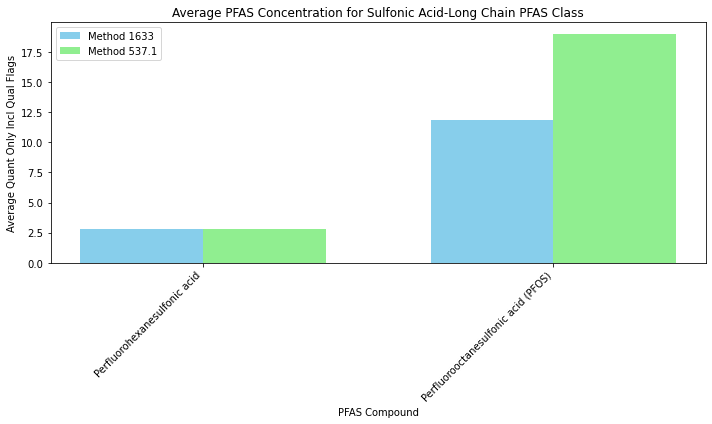

In [178]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_SulfonicAcid_Long)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])

# Calculate the mean for each PFAS Compound
average_df = filtered_df.groupby('PFAS Compound_1633').agg({
    'Quant Only Incl Qual Flags_1633': 'mean',
    'Quant Only Incl Qual Flags_5371': 'mean'
}).reset_index()

# Set the positions and width for the bars
positions = np.arange(len(average_df['PFAS Compound_1633']))
width = 0.35  # the width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each method
bars_1633 = ax.bar(positions - width/2, average_df['Quant Only Incl Qual Flags_1633'], width, label='Method 1633', color='skyblue')
bars_5371 = ax.bar(positions + width/2, average_df['Quant Only Incl Qual Flags_5371'], width, label='Method 537.1', color='lightgreen')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('PFAS Compound')
ax.set_ylabel('Average Quant Only Incl Qual Flags')
ax.set_title('Average PFAS Concentration for Sulfonic Acid-Long Chain PFAS Class')
ax.set_xticks(positions)
ax.set_xticklabels(average_df['PFAS Compound_1633'], rotation=45, ha="right")
ax.legend()

fig.tight_layout()

plt.show()

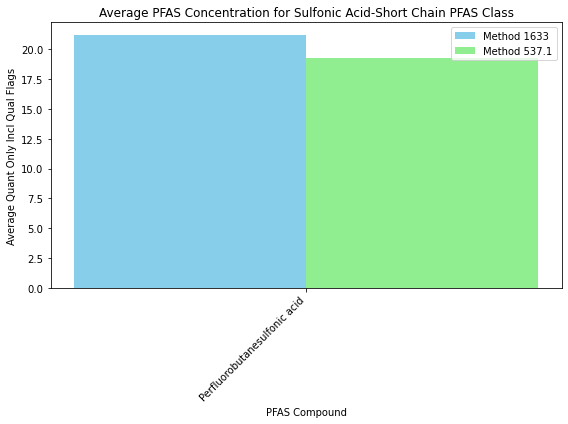

In [180]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_SulfonicAcid_Short)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])

# Calculate the mean for each PFAS Compound
average_df = filtered_df.groupby('PFAS Compound_1633').agg({
    'Quant Only Incl Qual Flags_1633': 'mean',
    'Quant Only Incl Qual Flags_5371': 'mean'
}).reset_index()

# Set the positions and width for the bars
positions = np.arange(len(average_df['PFAS Compound_1633']))
width = 0.35  # the width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot bars for each method
bars_1633 = ax.bar(positions - width/2, average_df['Quant Only Incl Qual Flags_1633'], width, label='Method 1633', color='skyblue')
bars_5371 = ax.bar(positions + width/2, average_df['Quant Only Incl Qual Flags_5371'], width, label='Method 537.1', color='lightgreen')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('PFAS Compound')
ax.set_ylabel('Average Quant Only Incl Qual Flags')
ax.set_title('Average PFAS Concentration for Sulfonic Acid-Short Chain PFAS Class')
ax.set_xticks(positions)
ax.set_xticklabels(average_df['PFAS Compound_1633'], rotation=45, ha="right")
ax.legend()

fig.tight_layout()

plt.show()

### By Type

### By Sample Location